In [1]:
import anndata as ad
import numpy as np
import pandas as pd
import gzip
import matplotlib.pyplot as plt
%load_ext jupyter_spaces

# Download Files

In [15]:
%%bash
set -e 
if ! [ -d "./downloads/10X-PacBio-processed/" ]; then 
    rm -rf "./downloads"
    mkdir -p "./downloads"
    cd "./downloads"
    wget -c "https://crc-atlas.s3.amazonaws.com/data.tar.gz"; 
    tar -xzvf "data.tar.gz"
fi

--2023-11-06 01:47:20--  https://crc-atlas.s3.amazonaws.com/data.tar.gz
Resolving crc-atlas.s3.amazonaws.com (crc-atlas.s3.amazonaws.com)... 52.217.229.153, 52.216.60.73, 16.182.32.209, ...
Connecting to crc-atlas.s3.amazonaws.com (crc-atlas.s3.amazonaws.com)|52.217.229.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4227492547 (3.9G) [application/x-gzip]
Saving to: ‘data.tar.gz’

     0K .......... .......... .......... .......... ..........  0%  323K 3h33m
    50K .......... .......... .......... .......... ..........  0%  323K 3h33m
   100K .......... .......... .......... .......... ..........  0%  324K 3h32m
   150K .......... .......... .......... .......... ..........  0% 53.2M 2h40m
   200K .......... .......... .......... .......... ..........  0% 68.1M 2h8m
   250K .......... .......... .......... .......... ..........  0%  327K 2h21m
   300K .......... .......... .......... .......... ..........  0% 51.7M 2h1m
   350K .......... .......... .....

  4900K .......... .......... .......... .......... ..........  0% 52.9M 17m12s
  4950K .......... .......... .......... .......... ..........  0% 64.3M 17m2s
  5000K .......... .......... .......... .......... ..........  0% 84.5M 16m53s
  5050K .......... .......... .......... .......... ..........  0% 87.9M 16m43s
  5100K .......... .......... .......... .......... ..........  0% 86.1M 16m34s
  5150K .......... .......... .......... .......... ..........  0% 80.5M 16m25s
  5200K .......... .......... .......... .......... ..........  0% 92.0M 16m16s
  5250K .......... .......... .......... .......... ..........  0% 91.0M 16m7s
  5300K .......... .......... .......... .......... ..........  0% 92.3M 15m59s
  5350K .......... .......... .......... .......... ..........  0% 77.0M 15m50s
  5400K .......... .......... .......... .......... ..........  0% 93.0M 15m42s
  5450K .......... .......... .......... .......... ..........  0% 90.4M 15m34s
  5500K .......... .......... .......... .

 10050K .......... .......... .......... .......... ..........  0%  160M 10m31s
 10100K .......... .......... .......... .......... ..........  0%  174M 10m28s
 10150K .......... .......... .......... .......... ..........  0%  156M 10m25s
 10200K .......... .......... .......... .......... ..........  0%  178M 10m22s
 10250K .......... .......... .......... .......... ..........  0%  178M 10m19s
 10300K .......... .......... .......... .......... ..........  0%  188M 10m16s
 10350K .......... .......... .......... .......... ..........  0%  157M 10m14s
 10400K .......... .......... .......... .......... ..........  0%  191M 10m11s
 10450K .......... .......... .......... .......... ..........  0%  173M 10m8s
 10500K .......... .......... .......... .......... ..........  0%  181M 10m5s
 10550K .......... .......... .......... .......... ..........  0%  150M 10m2s
 10600K .......... .......... .......... .......... ..........  0%  185M 10m0s
 10650K .......... .......... .......... ...

 15250K .......... .......... .......... .......... ..........  0%  184M 8m20s
 15300K .......... .......... .......... .......... ..........  0%  188M 8m18s
 15350K .......... .......... .......... .......... ..........  0%  152M 8m16s
 15400K .......... .......... .......... .......... ..........  0%  186M 8m15s
 15450K .......... .......... .......... .......... ..........  0%  186M 8m13s
 15500K .......... .......... .......... .......... ..........  0%  187M 8m12s
 15550K .......... .......... .......... .......... ..........  0%  161M 8m10s
 15600K .......... .......... .......... .......... ..........  0%  184M 8m9s
 15650K .......... .......... .......... .......... ..........  0%  180M 8m7s
 15700K .......... .......... .......... .......... ..........  0%  190M 8m6s
 15750K .......... .......... .......... .......... ..........  0%  162M 8m4s
 15800K .......... .......... .......... .......... ..........  0%  184M 8m3s
 15850K .......... .......... .......... .......... .....

 20450K .......... .......... .......... .......... ..........  0%  177M 7m15s
 20500K .......... .......... .......... .......... ..........  0%  182M 7m14s
 20550K .......... .......... .......... .......... ..........  0%  155M 7m13s
 20600K .......... .......... .......... .......... ..........  0%  186M 7m12s
 20650K .......... .......... .......... .......... ..........  0%  178M 7m11s
 20700K .......... .......... .......... .......... ..........  0%  180M 7m10s
 20750K .......... .......... .......... .......... ..........  0%  161M 7m9s
 20800K .......... .......... .......... .......... ..........  0%  192M 7m8s
 20850K .......... .......... .......... .......... ..........  0%  179M 7m7s
 20900K .......... .......... .......... .......... ..........  0%  184M 7m6s
 20950K .......... .......... .......... .......... ..........  0%  153M 7m5s
 21000K .......... .......... .......... .......... ..........  0%  172M 7m4s
 21050K .......... .......... .......... .......... ......

 25700K .......... .......... .......... .......... ..........  0%  189M 6m35s
 25750K .......... .......... .......... .......... ..........  0%  155M 6m34s
 25800K .......... .......... .......... .......... ..........  0%  188M 6m34s
 25850K .......... .......... .......... .......... ..........  0%  192M 6m33s
 25900K .......... .......... .......... .......... ..........  0%  181M 6m32s
 25950K .......... .......... .......... .......... ..........  0%  167M 6m32s
 26000K .......... .......... .......... .......... ..........  0%  189M 6m31s
 26050K .......... .......... .......... .......... ..........  0%  180M 6m30s
 26100K .......... .......... .......... .......... ..........  0%  189M 6m29s
 26150K .......... .......... .......... .......... ..........  0%  379K 6m49s
 26200K .......... .......... .......... .......... ..........  0% 79.4M 6m49s
 26250K .......... .......... .......... .......... ..........  0% 89.2M 6m48s
 26300K .......... .......... .......... .......... 

 30900K .......... .......... .......... .......... ..........  0%  193M 6m10s
 30950K .......... .......... .......... .......... ..........  0%  164M 6m9s
 31000K .......... .......... .......... .......... ..........  0%  187M 6m8s
 31050K .......... .......... .......... .......... ..........  0%  192M 6m8s
 31100K .......... .......... .......... .......... ..........  0%  381K 6m24s
 31150K .......... .......... .......... .......... ..........  0% 62.6M 6m24s
 31200K .......... .......... .......... .......... ..........  0% 87.5M 6m23s
 31250K .......... .......... .......... .......... ..........  0% 88.0M 6m23s
 31300K .......... .......... .......... .......... ..........  0% 84.7M 6m22s
 31350K .......... .......... .......... .......... ..........  0% 76.4M 6m22s
 31400K .......... .......... .......... .......... ..........  0% 91.2M 6m21s
 31450K .......... .......... .......... .......... ..........  0% 90.2M 6m21s
 31500K .......... .......... .......... .......... ...

 36150K .......... .......... .......... .......... ..........  0%  164M 5m51s
 36200K .......... .......... .......... .......... ..........  0%  382K 6m5s
 36250K .......... .......... .......... .......... ..........  0% 69.7M 6m5s
 36300K .......... .......... .......... .......... ..........  0% 91.3M 6m4s
 36350K .......... .......... .......... .......... ..........  0% 76.4M 6m4s
 36400K .......... .......... .......... .......... ..........  0% 92.2M 6m3s
 36450K .......... .......... .......... .......... ..........  0% 89.1M 6m3s
 36500K .......... .......... .......... .......... ..........  0% 92.4M 6m2s
 36550K .......... .......... .......... .......... ..........  0% 78.9M 6m2s
 36600K .......... .......... .......... .......... ..........  0% 91.1M 6m1s
 36650K .......... .......... .......... .......... ..........  0% 92.9M 6m1s
 36700K .......... .......... .......... .......... ..........  0% 90.4M 6m1s
 36750K .......... .......... .......... .......... .......... 

 41350K .......... .......... .......... .......... ..........  1% 75.4M 5m50s
 41400K .......... .......... .......... .......... ..........  1% 85.0M 5m50s
 41450K .......... .......... .......... .......... ..........  1% 91.1M 5m49s
 41500K .......... .......... .......... .......... ..........  1% 90.6M 5m49s
 41550K .......... .......... .......... .......... ..........  1% 77.5M 5m48s
 41600K .......... .......... .......... .......... ..........  1% 90.6M 5m48s
 41650K .......... .......... .......... .......... ..........  1% 92.0M 5m48s
 41700K .......... .......... .......... .......... ..........  1% 91.3M 5m47s
 41750K .......... .......... .......... .......... ..........  1% 76.9M 5m47s
 41800K .......... .......... .......... .......... ..........  1% 89.5M 5m47s
 41850K .......... .......... .......... .......... ..........  1% 91.3M 5m46s
 41900K .......... .......... .......... .......... ..........  1% 92.1M 5m46s
 41950K .......... .......... .......... .......... 

 46550K .......... .......... .......... .......... ..........  1% 78.6M 5m38s
 46600K .......... .......... .......... .......... ..........  1% 91.7M 5m37s
 46650K .......... .......... .......... .......... ..........  1% 90.3M 5m37s
 46700K .......... .......... .......... .......... ..........  1% 89.9M 5m37s
 46750K .......... .......... .......... .......... ..........  1% 81.2M 5m37s
 46800K .......... .......... .......... .......... ..........  1% 92.8M 5m36s
 46850K .......... .......... .......... .......... ..........  1% 92.8M 5m36s
 46900K .......... .......... .......... .......... ..........  1% 91.9M 5m36s
 46950K .......... .......... .......... .......... ..........  1% 75.2M 5m35s
 47000K .......... .......... .......... .......... ..........  1% 78.1M 5m35s
 47050K .......... .......... .......... .......... ..........  1% 92.0M 5m35s
 47100K .......... .......... .......... .......... ..........  1% 87.3M 5m34s
 47150K .......... .......... .......... .......... 

 51750K .......... .......... .......... .......... ..........  1% 6.17M 5m29s
 51800K .......... .......... .......... .......... ..........  1%  142M 5m28s
 51850K .......... .......... .......... .......... ..........  1%  159M 5m28s
 51900K .......... .......... .......... .......... ..........  1%  188M 5m28s
 51950K .......... .......... .......... .......... ..........  1%  166M 5m27s
 52000K .......... .......... .......... .......... ..........  1%  132M 5m27s
 52050K .......... .......... .......... .......... ..........  1%  178M 5m27s
 52100K .......... .......... .......... .......... ..........  1%  174M 5m27s
 52150K .......... .......... .......... .......... ..........  1%  147M 5m26s
 52200K .......... .......... .......... .......... ..........  1%  170M 5m26s
 52250K .......... .......... .......... .......... ..........  1%  173M 5m26s
 52300K .......... .......... .......... .......... ..........  1%  174M 5m25s
 52350K .......... .......... .......... .......... 

 56950K .......... .......... .......... .......... ..........  1%  152M 5m20s
 57000K .......... .......... .......... .......... ..........  1%  178M 5m20s
 57050K .......... .......... .......... .......... ..........  1%  179M 5m20s
 57100K .......... .......... .......... .......... ..........  1%  173M 5m20s
 57150K .......... .......... .......... .......... ..........  1%  159M 5m19s
 57200K .......... .......... .......... .......... ..........  1%  151M 5m19s
 57250K .......... .......... .......... .......... ..........  1%  149M 5m19s
 57300K .......... .......... .......... .......... ..........  1%  183M 5m19s
 57350K .......... .......... .......... .......... ..........  1%  114M 5m18s
 57400K .......... .......... .......... .......... ..........  1%  179M 5m18s
 57450K .......... .......... .......... .......... ..........  1%  185M 5m18s
 57500K .......... .......... .......... .......... ..........  1%  188M 5m18s
 57550K .......... .......... .......... .......... 

 62150K .......... .......... .......... .......... ..........  1%  131M 5m14s
 62200K .......... .......... .......... .......... ..........  1%  164M 5m13s
 62250K .......... .......... .......... .......... ..........  1%  178M 5m13s
 62300K .......... .......... .......... .......... ..........  1%  176M 5m13s
 62350K .......... .......... .......... .......... ..........  1%  146M 5m13s
 62400K .......... .......... .......... .......... ..........  1%  176M 5m12s
 62450K .......... .......... .......... .......... ..........  1%  183M 5m12s
 62500K .......... .......... .......... .......... ..........  1%  179M 5m12s
 62550K .......... .......... .......... .......... ..........  1%  148M 5m12s
 62600K .......... .......... .......... .......... ..........  1%  176M 5m11s
 62650K .......... .......... .......... .......... ..........  1%  187M 5m11s
 62700K .......... .......... .......... .......... ..........  1%  190M 5m11s
 62750K .......... .......... .......... .......... 

 67400K .......... .......... .......... .......... ..........  1% 90.1M 5m8s
 67450K .......... .......... .......... .......... ..........  1% 89.9M 5m8s
 67500K .......... .......... .......... .......... ..........  1%  188M 5m7s
 67550K .......... .......... .......... .......... ..........  1%  166M 5m7s
 67600K .......... .......... .......... .......... ..........  1%  188M 5m7s
 67650K .......... .......... .......... .......... ..........  1%  190M 5m7s
 67700K .......... .......... .......... .......... ..........  1%  191M 5m7s
 67750K .......... .......... .......... .......... ..........  1%  161M 5m6s
 67800K .......... .......... .......... .......... ..........  1%  190M 5m6s
 67850K .......... .......... .......... .......... ..........  1%  192M 5m6s
 67900K .......... .......... .......... .......... ..........  1%  188M 5m6s
 67950K .......... .......... .......... .......... ..........  1%  162M 5m5s
 68000K .......... .......... .......... .......... ..........  

 72650K .......... .......... .......... .......... ..........  1%  183M 5m2s
 72700K .......... .......... .......... .......... ..........  1%  189M 5m2s
 72750K .......... .......... .......... .......... ..........  1%  164M 5m2s
 72800K .......... .......... .......... .......... ..........  1%  191M 5m2s
 72850K .......... .......... .......... .......... ..........  1%  189M 5m1s
 72900K .......... .......... .......... .......... ..........  1%  193M 5m1s
 72950K .......... .......... .......... .......... ..........  1%  373K 5m8s
 73000K .......... .......... .......... .......... ..........  1%  150M 5m8s
 73050K .......... .......... .......... .......... ..........  1%  166M 5m8s
 73100K .......... .......... .......... .......... ..........  1%  130M 5m8s
 73150K .......... .......... .......... .......... ..........  1%  114M 5m8s
 73200K .......... .......... .......... .......... ..........  1%  126M 5m8s
 73250K .......... .......... .......... .......... ..........  

 77900K .......... .......... .......... .......... ..........  1%  191M 4m58s
 77950K .......... .......... .......... .......... ..........  1%  158M 4m58s
 78000K .......... .......... .......... .......... ..........  1%  381K 5m4s
 78050K .......... .......... .......... .......... ..........  1%  118M 5m4s
 78100K .......... .......... .......... .......... ..........  1%  100M 5m4s
 78150K .......... .......... .......... .......... ..........  1% 93.7M 5m4s
 78200K .......... .......... .......... .......... ..........  1%  118M 5m4s
 78250K .......... .......... .......... .......... ..........  1%  116M 5m3s
 78300K .......... .......... .......... .......... ..........  1%  133M 5m3s
 78350K .......... .......... .......... .......... ..........  1%  110M 5m3s
 78400K .......... .......... .......... .......... ..........  1%  136M 5m3s
 78450K .......... .......... .......... .......... ..........  1%  109M 5m3s
 78500K .......... .......... .......... .......... ..........

 83150K .......... .......... .......... .......... ..........  2%  378K 5m0s
 83200K .......... .......... .......... .......... ..........  2%  158M 5m0s
 83250K .......... .......... .......... .......... ..........  2%  167M 5m0s
 83300K .......... .......... .......... .......... ..........  2%  178M 5m0s
 83350K .......... .......... .......... .......... ..........  2%  159M 4m59s
 83400K .......... .......... .......... .......... ..........  2%  153M 4m59s
 83450K .......... .......... .......... .......... ..........  2%  108M 4m59s
 83500K .......... .......... .......... .......... ..........  2%  130M 4m59s
 83550K .......... .......... .......... .......... ..........  2%  121M 4m59s
 83600K .......... .......... .......... .......... ..........  2%  136M 4m59s
 83650K .......... .......... .......... .......... ..........  2%  138M 4m58s
 83700K .......... .......... .......... .......... ..........  2%  135M 4m58s
 83750K .......... .......... .......... .......... ....

 88350K .......... .......... .......... .......... ..........  2% 97.1M 4m56s
 88400K .......... .......... .......... .......... ..........  2%  110M 4m56s
 88450K .......... .......... .......... .......... ..........  2%  110M 4m56s
 88500K .......... .......... .......... .......... ..........  2%  107M 4m56s
 88550K .......... .......... .......... .......... ..........  2% 93.0M 4m56s
 88600K .......... .......... .......... .......... ..........  2%  111M 4m56s
 88650K .......... .......... .......... .......... ..........  2%  110M 4m56s
 88700K .......... .......... .......... .......... ..........  2%  110M 4m55s
 88750K .......... .......... .......... .......... ..........  2% 89.8M 4m55s
 88800K .......... .......... .......... .......... ..........  2%  111M 4m55s
 88850K .......... .......... .......... .......... ..........  2%  106M 4m55s
 88900K .......... .......... .......... .......... ..........  2%  110M 4m55s
 88950K .......... .......... .......... .......... 

 93550K .......... .......... .......... .......... ..........  2%  162M 4m53s
 93600K .......... .......... .......... .......... ..........  2%  191M 4m53s
 93650K .......... .......... .......... .......... ..........  2%  132M 4m53s
 93700K .......... .......... .......... .......... ..........  2%  135M 4m52s
 93750K .......... .......... .......... .......... ..........  2%  113M 4m52s
 93800K .......... .......... .......... .......... ..........  2%  138M 4m52s
 93850K .......... .......... .......... .......... ..........  2%  138M 4m52s
 93900K .......... .......... .......... .......... ..........  2%  138M 4m52s
 93950K .......... .......... .......... .......... ..........  2%  122M 4m52s
 94000K .......... .......... .......... .......... ..........  2%  134M 4m52s
 94050K .......... .......... .......... .......... ..........  2%  137M 4m51s
 94100K .......... .......... .......... .......... ..........  2% 6.49M 4m52s
 94150K .......... .......... .......... .......... 

 98750K .......... .......... .......... .......... ..........  2% 79.6M 4m50s
 98800K .......... .......... .......... .......... ..........  2% 88.8M 4m50s
 98850K .......... .......... .......... .......... ..........  2% 85.6M 4m50s
 98900K .......... .......... .......... .......... ..........  2% 88.9M 4m50s
 98950K .......... .......... .......... .......... ..........  2% 11.7M 4m50s
 99000K .......... .......... .......... .......... ..........  2% 81.8M 4m49s
 99050K .......... .......... .......... .......... ..........  2% 84.5M 4m49s
 99100K .......... .......... .......... .......... ..........  2% 84.9M 4m49s
 99150K .......... .......... .......... .......... ..........  2% 75.2M 4m49s
 99200K .......... .......... .......... .......... ..........  2% 83.1M 4m49s
 99250K .......... .......... .......... .......... ..........  2%  102M 4m49s
 99300K .......... .......... .......... .......... ..........  2%  120M 4m49s
 99350K .......... .......... .......... .......... 

103950K .......... .......... .......... .......... ..........  2% 82.7M 4m47s
104000K .......... .......... .......... .......... ..........  2%  124M 4m47s
104050K .......... .......... .......... .......... ..........  2%  132M 4m47s
104100K .......... .......... .......... .......... ..........  2%  126M 4m47s
104150K .......... .......... .......... .......... ..........  2%  109M 4m47s
104200K .......... .......... .......... .......... ..........  2%  124M 4m47s
104250K .......... .......... .......... .......... ..........  2%  174M 4m47s
104300K .......... .......... .......... .......... ..........  2%  189M 4m46s
104350K .......... .......... .......... .......... ..........  2%  159M 4m46s
104400K .......... .......... .......... .......... ..........  2%  188M 4m46s
104450K .......... .......... .......... .......... ..........  2%  183M 4m46s
104500K .......... .......... .......... .......... ..........  2%  188M 4m46s
104550K .......... .......... .......... .......... 

109150K .......... .......... .......... .......... ..........  2%  164M 4m45s
109200K .......... .......... .......... .......... ..........  2%  185M 4m45s
109250K .......... .......... .......... .......... ..........  2%  189M 4m44s
109300K .......... .......... .......... .......... ..........  2%  182M 4m44s
109350K .......... .......... .......... .......... ..........  2%  152M 4m44s
109400K .......... .......... .......... .......... ..........  2%  182M 4m44s
109450K .......... .......... .......... .......... ..........  2%  187M 4m44s
109500K .......... .......... .......... .......... ..........  2%  187M 4m44s
109550K .......... .......... .......... .......... ..........  2%  165M 4m44s
109600K .......... .......... .......... .......... ..........  2%  168M 4m44s
109650K .......... .......... .......... .......... ..........  2%  185M 4m43s
109700K .......... .......... .......... .......... ..........  2%  190M 4m43s
109750K .......... .......... .......... .......... 

114350K .......... .......... .......... .......... ..........  2%  117M 4m42s
114400K .......... .......... .......... .......... ..........  2%  132M 4m42s
114450K .......... .......... .......... .......... ..........  2%  124M 4m42s
114500K .......... .......... .......... .......... ..........  2%  130M 4m42s
114550K .......... .......... .......... .......... ..........  2%  141M 4m42s
114600K .......... .......... .......... .......... ..........  2%  188M 4m42s
114650K .......... .......... .......... .......... ..........  2%  190M 4m42s
114700K .......... .......... .......... .......... ..........  2%  191M 4m41s
114750K .......... .......... .......... .......... ..........  2%  169M 4m41s
114800K .......... .......... .......... .......... ..........  2%  184M 4m41s
114850K .......... .......... .......... .......... ..........  2%  182M 4m41s
114900K .......... .......... .......... .......... ..........  2%  193M 4m41s
114950K .......... .......... .......... .......... 

119550K .......... .......... .......... .......... ..........  2%  157M 4m40s
119600K .......... .......... .......... .......... ..........  2%  184M 4m40s
119650K .......... .......... .......... .......... ..........  2%  189M 4m40s
119700K .......... .......... .......... .......... ..........  2%  181M 4m40s
119750K .......... .......... .......... .......... ..........  2%  152M 4m40s
119800K .......... .......... .......... .......... ..........  2%  179M 4m39s
119850K .......... .......... .......... .......... ..........  2%  190M 4m39s
119900K .......... .......... .......... .......... ..........  2%  182M 4m39s
119950K .......... .......... .......... .......... ..........  2%  162M 4m39s
120000K .......... .......... .......... .......... ..........  2%  186M 4m39s
120050K .......... .......... .......... .......... ..........  2%  182M 4m39s
120100K .......... .......... .......... .......... ..........  2%  177M 4m39s
120150K .......... .......... .......... .......... 

124750K .......... .......... .......... .......... ..........  3%  167M 4m38s
124800K .......... .......... .......... .......... ..........  3%  181M 4m38s
124850K .......... .......... .......... .......... ..........  3%  187M 4m38s
124900K .......... .......... .......... .......... ..........  3%  178M 4m38s
124950K .......... .......... .......... .......... ..........  3%  158M 4m37s
125000K .......... .......... .......... .......... ..........  3%  189M 4m37s
125050K .......... .......... .......... .......... ..........  3%  181M 4m37s
125100K .......... .......... .......... .......... ..........  3%  188M 4m37s
125150K .......... .......... .......... .......... ..........  3%  161M 4m37s
125200K .......... .......... .......... .......... ..........  3%  193M 4m37s
125250K .......... .......... .......... .......... ..........  3%  186M 4m37s
125300K .......... .......... .......... .......... ..........  3%  190M 4m37s
125350K .......... .......... .......... .......... 

129950K .......... .......... .......... .......... ..........  3%  118M 4m36s
130000K .......... .......... .......... .......... ..........  3%  136M 4m36s
130050K .......... .......... .......... .......... ..........  3%  125M 4m36s
130100K .......... .......... .......... .......... ..........  3%  135M 4m36s
130150K .......... .......... .......... .......... ..........  3%  124M 4m36s
130200K .......... .......... .......... .......... ..........  3%  174M 4m35s
130250K .......... .......... .......... .......... ..........  3%  189M 4m35s
130300K .......... .......... .......... .......... ..........  3%  184M 4m35s
130350K .......... .......... .......... .......... ..........  3%  169M 4m35s
130400K .......... .......... .......... .......... ..........  3%  193M 4m35s
130450K .......... .......... .......... .......... ..........  3%  193M 4m35s
130500K .......... .......... .......... .......... ..........  3%  189M 4m35s
130550K .......... .......... .......... .......... 

135150K .......... .......... .......... .......... ..........  3%  132M 4m34s
135200K .......... .......... .......... .......... ..........  3%  180M 4m34s
135250K .......... .......... .......... .......... ..........  3%  186M 4m34s
135300K .......... .......... .......... .......... ..........  3%  179M 4m34s
135350K .......... .......... .......... .......... ..........  3%  156M 4m34s
135400K .......... .......... .......... .......... ..........  3%  173M 4m34s
135450K .......... .......... .......... .......... ..........  3%  191M 4m34s
135500K .......... .......... .......... .......... ..........  3%  193M 4m33s
135550K .......... .......... .......... .......... ..........  3%  168M 4m33s
135600K .......... .......... .......... .......... ..........  3%  192M 4m33s
135650K .......... .......... .......... .......... ..........  3%  184M 4m33s
135700K .......... .......... .......... .......... ..........  3%  183M 4m33s
135750K .......... .......... .......... .......... 

140350K .......... .......... .......... .......... ..........  3%  105M 4m32s
140400K .......... .......... .......... .......... ..........  3%  174M 4m32s
140450K .......... .......... .......... .......... ..........  3%  184M 4m32s
140500K .......... .......... .......... .......... ..........  3%  185M 4m32s
140550K .......... .......... .......... .......... ..........  3%  156M 4m32s
140600K .......... .......... .......... .......... ..........  3%  190M 4m32s
140650K .......... .......... .......... .......... ..........  3%  181M 4m32s
140700K .......... .......... .......... .......... ..........  3%  189M 4m32s
140750K .......... .......... .......... .......... ..........  3%  167M 4m32s
140800K .......... .......... .......... .......... ..........  3%  181M 4m32s
140850K .......... .......... .......... .......... ..........  3%  176M 4m31s
140900K .......... .......... .......... .......... ..........  3%  179M 4m31s
140950K .......... .......... .......... .......... 

145550K .......... .......... .......... .......... ..........  3%  113M 4m31s
145600K .......... .......... .......... .......... ..........  3%  134M 4m31s
145650K .......... .......... .......... .......... ..........  3%  133M 4m31s
145700K .......... .......... .......... .......... ..........  3%  135M 4m31s
145750K .......... .......... .......... .......... ..........  3%  109M 4m30s
145800K .......... .......... .......... .......... ..........  3%  125M 4m30s
145850K .......... .......... .......... .......... ..........  3%  140M 4m30s
145900K .......... .......... .......... .......... ..........  3%  185M 4m30s
145950K .......... .......... .......... .......... ..........  3%  167M 4m30s
146000K .......... .......... .......... .......... ..........  3%  185M 4m30s
146050K .......... .......... .......... .......... ..........  3%  189M 4m30s
146100K .......... .......... .......... .......... ..........  3%  194M 4m30s
146150K .......... .......... .......... .......... 

150750K .......... .......... .......... .......... ..........  3% 86.4M 4m29s
150800K .......... .......... .......... .......... ..........  3%  104M 4m29s
150850K .......... .......... .......... .......... ..........  3%  103M 4m29s
150900K .......... .......... .......... .......... ..........  3%  107M 4m29s
150950K .......... .......... .......... .......... ..........  3% 85.3M 4m29s
151000K .......... .......... .......... .......... ..........  3%  140M 4m29s
151050K .......... .......... .......... .......... ..........  3%  191M 4m29s
151100K .......... .......... .......... .......... ..........  3%  192M 4m29s
151150K .......... .......... .......... .......... ..........  3%  170M 4m29s
151200K .......... .......... .......... .......... ..........  3%  189M 4m28s
151250K .......... .......... .......... .......... ..........  3%  175M 4m28s
151300K .......... .......... .......... .......... ..........  3%  182M 4m28s
151350K .......... .......... .......... .......... 

155950K .......... .......... .......... .......... ..........  3%  101M 4m28s
156000K .......... .......... .......... .......... ..........  3%  181M 4m28s
156050K .......... .......... .......... .......... ..........  3%  186M 4m28s
156100K .......... .......... .......... .......... ..........  3%  186M 4m28s
156150K .......... .......... .......... .......... ..........  3%  155M 4m27s
156200K .......... .......... .......... .......... ..........  3%  192M 4m27s
156250K .......... .......... .......... .......... ..........  3%  193M 4m27s
156300K .......... .......... .......... .......... ..........  3%  184M 4m27s
156350K .......... .......... .......... .......... ..........  3%  171M 4m27s
156400K .......... .......... .......... .......... ..........  3%  169M 4m27s
156450K .......... .......... .......... .......... ..........  3%  187M 4m27s
156500K .......... .......... .......... .......... ..........  3%  180M 4m27s
156550K .......... .......... .......... .......... 

161150K .......... .......... .......... .......... ..........  3%  164M 4m26s
161200K .......... .......... .......... .......... ..........  3%  188M 4m26s
161250K .......... .......... .......... .......... ..........  3%  182M 4m26s
161300K .......... .......... .......... .......... ..........  3%  190M 4m26s
161350K .......... .......... .......... .......... ..........  3%  158M 4m26s
161400K .......... .......... .......... .......... ..........  3%  177M 4m26s
161450K .......... .......... .......... .......... ..........  3%  176M 4m26s
161500K .......... .......... .......... .......... ..........  3%  177M 4m26s
161550K .......... .......... .......... .......... ..........  3%  159M 4m26s
161600K .......... .......... .......... .......... ..........  3%  185M 4m26s
161650K .......... .......... .......... .......... ..........  3%  190M 4m26s
161700K .......... .......... .......... .......... ..........  3%  190M 4m26s
161750K .......... .......... .......... .......... 

166350K .......... .......... .......... .......... ..........  4% 90.0M 4m25s
166400K .......... .......... .......... .......... ..........  4%  105M 4m25s
166450K .......... .......... .......... .......... ..........  4%  101M 4m25s
166500K .......... .......... .......... .......... ..........  4%  116M 4m25s
166550K .......... .......... .......... .......... ..........  4%  155M 4m25s
166600K .......... .......... .......... .......... ..........  4%  181M 4m25s
166650K .......... .......... .......... .......... ..........  4%  182M 4m25s
166700K .......... .......... .......... .......... ..........  4%  185M 4m25s
166750K .......... .......... .......... .......... ..........  4%  157M 4m25s
166800K .......... .......... .......... .......... ..........  4%  188M 4m24s
166850K .......... .......... .......... .......... ..........  4%  190M 4m24s
166900K .......... .......... .......... .......... ..........  4%  192M 4m24s
166950K .......... .......... .......... .......... 

171550K .......... .......... .......... .......... ..........  4%  189M 4m24s
171600K .......... .......... .......... .......... ..........  4%  208M 4m24s
171650K .......... .......... .......... .......... ..........  4%  217M 4m24s
171700K .......... .......... .......... .......... ..........  4%  200M 4m24s
171750K .......... .......... .......... .......... ..........  4%  169M 4m24s
171800K .......... .......... .......... .......... ..........  4%  211M 4m24s
171850K .......... .......... .......... .......... ..........  4%  224M 4m23s
171900K .......... .......... .......... .......... ..........  4%  250M 4m23s
171950K .......... .......... .......... .......... ..........  4%  188M 4m23s
172000K .......... .......... .......... .......... ..........  4%  214M 4m23s
172050K .......... .......... .......... .......... ..........  4%  205M 4m23s
172100K .......... .......... .......... .......... ..........  4%  205M 4m23s
172150K .......... .......... .......... .......... 

176750K .......... .......... .......... .......... ..........  4%  166M 4m23s
176800K .......... .......... .......... .......... ..........  4%  201M 4m23s
176850K .......... .......... .......... .......... ..........  4%  208M 4m23s
176900K .......... .......... .......... .......... ..........  4%  206M 4m23s
176950K .......... .......... .......... .......... ..........  4%  167M 4m22s
177000K .......... .......... .......... .......... ..........  4%  188M 4m22s
177050K .......... .......... .......... .......... ..........  4%  199M 4m22s
177100K .......... .......... .......... .......... ..........  4%  186M 4m22s
177150K .......... .......... .......... .......... ..........  4%  170M 4m22s
177200K .......... .......... .......... .......... ..........  4%  200M 4m22s
177250K .......... .......... .......... .......... ..........  4%  175M 4m22s
177300K .......... .......... .......... .......... ..........  4%  194M 4m22s
177350K .......... .......... .......... .......... 

181950K .......... .......... .......... .......... ..........  4%  172M 4m25s
182000K .......... .......... .......... .......... ..........  4%  198M 4m25s
182050K .......... .......... .......... .......... ..........  4%  201M 4m25s
182100K .......... .......... .......... .......... ..........  4%  200M 4m25s
182150K .......... .......... .......... .......... ..........  4%  165M 4m25s
182200K .......... .......... .......... .......... ..........  4%  202M 4m24s
182250K .......... .......... .......... .......... ..........  4%  187M 4m24s
182300K .......... .......... .......... .......... ..........  4%  197M 4m24s
182350K .......... .......... .......... .......... ..........  4%  176M 4m24s
182400K .......... .......... .......... .......... ..........  4% 11.7M 4m24s
182450K .......... .......... .......... .......... ..........  4%  174M 4m24s
182500K .......... .......... .......... .......... ..........  4%  184M 4m24s
182550K .......... .......... .......... .......... 

187150K .......... .......... .......... .......... ..........  4%  131M 4m24s
187200K .......... .......... .......... .......... ..........  4%  151M 4m24s
187250K .......... .......... .......... .......... ..........  4%  152M 4m23s
187300K .......... .......... .......... .......... ..........  4%  154M 4m23s
187350K .......... .......... .......... .......... ..........  4%  128M 4m23s
187400K .......... .......... .......... .......... ..........  4%  150M 4m23s
187450K .......... .......... .......... .......... ..........  4%  154M 4m23s
187500K .......... .......... .......... .......... ..........  4%  155M 4m23s
187550K .......... .......... .......... .......... ..........  4%  136M 4m23s
187600K .......... .......... .......... .......... ..........  4%  156M 4m23s
187650K .......... .......... .......... .......... ..........  4%  151M 4m23s
187700K .......... .......... .......... .......... ..........  4%  154M 4m23s
187750K .......... .......... .......... .......... 

192350K .......... .......... .......... .......... ..........  4%  150M 4m22s
192400K .......... .......... .......... .......... ..........  4%  186M 4m22s
192450K .......... .......... .......... .......... ..........  4%  182M 4m22s
192500K .......... .......... .......... .......... ..........  4%  178M 4m22s
192550K .......... .......... .......... .......... ..........  4%  156M 4m22s
192600K .......... .......... .......... .......... ..........  4%  187M 4m22s
192650K .......... .......... .......... .......... ..........  4% 9.04M 4m22s
192700K .......... .......... .......... .......... ..........  4% 90.9M 4m22s
192750K .......... .......... .......... .......... ..........  4%  152M 4m22s
192800K .......... .......... .......... .......... ..........  4%  176M 4m22s
192850K .......... .......... .......... .......... ..........  4%  213M 4m22s
192900K .......... .......... .......... .......... ..........  4%  222M 4m22s
192950K .......... .......... .......... .......... 

197550K .......... .......... .......... .......... ..........  4%  208M 4m21s
197600K .......... .......... .......... .......... ..........  4%  183M 4m21s
197650K .......... .......... .......... .......... ..........  4%  186M 4m21s
197700K .......... .......... .......... .......... ..........  4%  184M 4m21s
197750K .......... .......... .......... .......... ..........  4%  162M 4m21s
197800K .......... .......... .......... .......... ..........  4%  176M 4m21s
197850K .......... .......... .......... .......... ..........  4%  179M 4m21s
197900K .......... .......... .......... .......... ..........  4%  187M 4m21s
197950K .......... .......... .......... .......... ..........  4% 7.36M 4m21s
198000K .......... .......... .......... .......... ..........  4%  169M 4m21s
198050K .......... .......... .......... .......... ..........  4%  171M 4m21s
198100K .......... .......... .......... .......... ..........  4%  179M 4m21s
198150K .......... .......... .......... .......... 

202750K .......... .......... .......... .......... ..........  4%  113M 4m20s
202800K .......... .......... .......... .......... ..........  4%  137M 4m20s
202850K .......... .......... .......... .......... ..........  4%  138M 4m20s
202900K .......... .......... .......... .......... ..........  4%  137M 4m20s
202950K .......... .......... .......... .......... ..........  4%  114M 4m20s
203000K .......... .......... .......... .......... ..........  4%  135M 4m20s
203050K .......... .......... .......... .......... ..........  4%  139M 4m20s
203100K .......... .......... .......... .......... ..........  4%  137M 4m20s
203150K .......... .......... .......... .......... ..........  4% 15.4M 4m20s
203200K .......... .......... .......... .......... ..........  4%  107M 4m20s
203250K .......... .......... .......... .......... ..........  4%  125M 4m20s
203300K .......... .......... .......... .......... ..........  4%  126M 4m20s
203350K .......... .......... .......... .......... 

207950K .......... .......... .......... .......... ..........  5% 79.2M 4m19s
208000K .......... .......... .......... .......... ..........  5% 87.3M 4m19s
208050K .......... .......... .......... .......... ..........  5% 85.7M 4m19s
208100K .......... .......... .......... .......... ..........  5% 92.6M 4m19s
208150K .......... .......... .......... .......... ..........  5% 79.4M 4m19s
208200K .......... .......... .......... .......... ..........  5% 92.4M 4m19s
208250K .......... .......... .......... .......... ..........  5% 92.0M 4m19s
208300K .......... .......... .......... .......... ..........  5% 90.5M 4m19s
208350K .......... .......... .......... .......... ..........  5% 82.3M 4m19s
208400K .......... .......... .......... .......... ..........  5% 93.0M 4m19s
208450K .......... .......... .......... .......... ..........  5% 93.5M 4m19s
208500K .......... .......... .......... .......... ..........  5% 90.7M 4m19s
208550K .......... .......... .......... .......... 

213150K .......... .......... .......... .......... ..........  5%  126M 4m16s
213200K .......... .......... .......... .......... ..........  5%  139M 4m16s
213250K .......... .......... .......... .......... ..........  5%  476K 4m18s
213300K .......... .......... .......... .......... ..........  5%  130M 4m18s
213350K .......... .......... .......... .......... ..........  5%  115M 4m18s
213400K .......... .......... .......... .......... ..........  5%  139M 4m18s
213450K .......... .......... .......... .......... ..........  5%  135M 4m18s
213500K .......... .......... .......... .......... ..........  5%  141M 4m18s
213550K .......... .......... .......... .......... ..........  5%  117M 4m18s
213600K .......... .......... .......... .......... ..........  5%  138M 4m18s
213650K .......... .......... .......... .......... ..........  5%  134M 4m18s
213700K .......... .......... .......... .......... ..........  5%  142M 4m18s
213750K .......... .......... .......... .......... 

218350K .......... .......... .......... .......... ..........  5%  163M 4m15s
218400K .......... .......... .......... .......... ..........  5%  192M 4m15s
218450K .......... .......... .......... .......... ..........  5%  195M 4m15s
218500K .......... .......... .......... .......... ..........  5%  194M 4m15s
218550K .......... .......... .......... .......... ..........  5%  159M 4m15s
218600K .......... .......... .......... .......... ..........  5%  182M 4m15s
218650K .......... .......... .......... .......... ..........  5%  188M 4m15s
218700K .......... .......... .......... .......... ..........  5%  192M 4m15s
218750K .......... .......... .......... .......... ..........  5%  474K 4m17s
218800K .......... .......... .......... .......... ..........  5%  165M 4m17s
218850K .......... .......... .......... .......... ..........  5%  180M 4m17s
218900K .......... .......... .......... .......... ..........  5%  186M 4m17s
218950K .......... .......... .......... .......... 

223550K .......... .......... .......... .......... ..........  5%  245M 4m14s
223600K .......... .......... .......... .......... ..........  5%  276M 4m14s
223650K .......... .......... .......... .......... ..........  5%  245M 4m14s
223700K .......... .......... .......... .......... ..........  5%  275M 4m14s
223750K .......... .......... .......... .......... ..........  5%  231M 4m14s
223800K .......... .......... .......... .......... ..........  5%  262M 4m14s
223850K .......... .......... .......... .......... ..........  5%  268M 4m14s
223900K .......... .......... .......... .......... ..........  5%  250M 4m14s
223950K .......... .......... .......... .......... ..........  5%  250M 4m14s
224000K .......... .......... .......... .......... ..........  5%  275M 4m14s
224050K .......... .......... .......... .......... ..........  5%  280M 4m14s
224100K .......... .......... .......... .......... ..........  5%  291M 4m14s
224150K .......... .......... .......... .......... 

228750K .......... .......... .......... .......... ..........  5%  164M 4m13s
228800K .......... .......... .......... .......... ..........  5%  191M 4m13s
228850K .......... .......... .......... .......... ..........  5% 1.86M 4m13s
228900K .......... .......... .......... .......... ..........  5%  170M 4m13s
228950K .......... .......... .......... .......... ..........  5%  147M 4m13s
229000K .......... .......... .......... .......... ..........  5%  177M 4m13s
229050K .......... .......... .......... .......... ..........  5%  171M 4m13s
229100K .......... .......... .......... .......... ..........  5%  178M 4m13s
229150K .......... .......... .......... .......... ..........  5%  163M 4m13s
229200K .......... .......... .......... .......... ..........  5%  179M 4m13s
229250K .......... .......... .......... .......... ..........  5%  161M 4m13s
229300K .......... .......... .......... .......... ..........  5%  129M 4m13s
229350K .......... .......... .......... .......... 

233950K .......... .......... .......... .......... ..........  5%  153M 4m12s
234000K .......... .......... .......... .......... ..........  5%  185M 4m12s
234050K .......... .......... .......... .......... ..........  5%  189M 4m12s
234100K .......... .......... .......... .......... ..........  5%  184M 4m12s
234150K .......... .......... .......... .......... ..........  5%  149M 4m12s
234200K .......... .......... .......... .......... ..........  5%  174M 4m12s
234250K .......... .......... .......... .......... ..........  5%  187M 4m12s
234300K .......... .......... .......... .......... ..........  5% 1.77M 4m12s
234350K .......... .......... .......... .......... ..........  5%  114M 4m12s
234400K .......... .......... .......... .......... ..........  5%  167M 4m12s
234450K .......... .......... .......... .......... ..........  5%  165M 4m12s
234500K .......... .......... .......... .......... ..........  5%  175M 4m12s
234550K .......... .......... .......... .......... 

239150K .......... .......... .......... .......... ..........  5% 93.0M 4m12s
239200K .......... .......... .......... .......... ..........  5%  111M 4m11s
239250K .......... .......... .......... .......... ..........  5%  103M 4m11s
239300K .......... .......... .......... .......... ..........  5%  174M 4m11s
239350K .......... .......... .......... .......... ..........  5%  157M 4m11s
239400K .......... .......... .......... .......... ..........  5%  178M 4m11s
239450K .......... .......... .......... .......... ..........  5%  181M 4m11s
239500K .......... .......... .......... .......... ..........  5%  176M 4m11s
239550K .......... .......... .......... .......... ..........  5%  165M 4m11s
239600K .......... .......... .......... .......... ..........  5%  182M 4m11s
239650K .......... .......... .......... .......... ..........  5%  189M 4m11s
239700K .......... .......... .......... .......... ..........  5%  188M 4m11s
239750K .......... .......... .......... .......... 

244350K .......... .......... .......... .......... ..........  5% 64.5M 4m11s
244400K .......... .......... .......... .......... ..........  5% 83.2M 4m11s
244450K .......... .......... .......... .......... ..........  5% 86.9M 4m11s
244500K .......... .......... .......... .......... ..........  5% 81.7M 4m11s
244550K .......... .......... .......... .......... ..........  5%  128M 4m11s
244600K .......... .......... .......... .......... ..........  5%  186M 4m10s
244650K .......... .......... .......... .......... ..........  5%  179M 4m10s
244700K .......... .......... .......... .......... ..........  5%  171M 4m10s
244750K .......... .......... .......... .......... ..........  5%  156M 4m10s
244800K .......... .......... .......... .......... ..........  5%  176M 4m10s
244850K .......... .......... .......... .......... ..........  5%  185M 4m10s
244900K .......... .......... .......... .......... ..........  5%  183M 4m10s
244950K .......... .......... .......... .......... 

249550K .......... .......... .......... .......... ..........  6% 81.3M 4m10s
249600K .......... .......... .......... .......... ..........  6% 90.7M 4m10s
249650K .......... .......... .......... .......... ..........  6% 94.2M 4m10s
249700K .......... .......... .......... .......... ..........  6% 92.5M 4m10s
249750K .......... .......... .......... .......... ..........  6% 12.4M 4m10s
249800K .......... .......... .......... .......... ..........  6% 73.5M 4m10s
249850K .......... .......... .......... .......... ..........  6% 82.3M 4m10s
249900K .......... .......... .......... .......... ..........  6%  103M 4m10s
249950K .......... .......... .......... .......... ..........  6%  159M 4m10s
250000K .......... .......... .......... .......... ..........  6%  182M 4m10s
250050K .......... .......... .......... .......... ..........  6%  184M 4m9s
250100K .......... .......... .......... .......... ..........  6%  174M 4m9s
250150K .......... .......... .......... .......... ..

254800K .......... .......... .......... .......... ..........  6% 94.8M 4m9s
254850K .......... .......... .......... .......... ..........  6% 90.4M 4m9s
254900K .......... .......... .......... .......... ..........  6% 93.7M 4m9s
254950K .......... .......... .......... .......... ..........  6% 73.4M 4m9s
255000K .......... .......... .......... .......... ..........  6% 91.1M 4m9s
255050K .......... .......... .......... .......... ..........  6% 92.3M 4m9s
255100K .......... .......... .......... .......... ..........  6% 92.7M 4m9s
255150K .......... .......... .......... .......... ..........  6% 80.3M 4m9s
255200K .......... .......... .......... .......... ..........  6% 90.8M 4m9s
255250K .......... .......... .......... .......... ..........  6% 93.4M 4m9s
255300K .......... .......... .......... .......... ..........  6% 93.7M 4m9s
255350K .......... .......... .......... .......... ..........  6% 79.3M 4m9s
255400K .......... .......... .......... .......... ..........  

260100K .......... .......... .......... .......... ..........  6%  135M 4m7s
260150K .......... .......... .......... .......... ..........  6%  115M 4m7s
260200K .......... .......... .......... .......... ..........  6%  138M 4m7s
260250K .......... .......... .......... .......... ..........  6%  140M 4m7s
260300K .......... .......... .......... .......... ..........  6%  544K 4m8s
260350K .......... .......... .......... .......... ..........  6% 81.6M 4m8s
260400K .......... .......... .......... .......... ..........  6% 94.8M 4m8s
260450K .......... .......... .......... .......... ..........  6% 91.3M 4m8s
260500K .......... .......... .......... .......... ..........  6% 89.3M 4m8s
260550K .......... .......... .......... .......... ..........  6% 76.0M 4m8s
260600K .......... .......... .......... .......... ..........  6% 87.8M 4m8s
260650K .......... .......... .......... .......... ..........  6% 92.3M 4m8s
260700K .......... .......... .......... .......... ..........  

265400K .......... .......... .......... .......... ..........  6%  133M 4m6s
265450K .......... .......... .......... .......... ..........  6%  137M 4m6s
265500K .......... .......... .......... .......... ..........  6%  136M 4m6s
265550K .......... .......... .......... .......... ..........  6%  117M 4m6s
265600K .......... .......... .......... .......... ..........  6%  134M 4m6s
265650K .......... .......... .......... .......... ..........  6%  138M 4m6s
265700K .......... .......... .......... .......... ..........  6% 9.11M 4m6s
265750K .......... .......... .......... .......... ..........  6%  114M 4m6s
265800K .......... .......... .......... .......... ..........  6%  134M 4m6s
265850K .......... .......... .......... .......... ..........  6%  535K 4m7s
265900K .......... .......... .......... .......... ..........  6% 89.4M 4m7s
265950K .......... .......... .......... .......... ..........  6% 87.3M 4m7s
266000K .......... .......... .......... .......... ..........  

270700K .......... .......... .......... .......... ..........  6%  133M 4m5s
270750K .......... .......... .......... .......... ..........  6%  115M 4m5s
270800K .......... .......... .......... .......... ..........  6%  134M 4m5s
270850K .......... .......... .......... .......... ..........  6% 17.5M 4m5s
270900K .......... .......... .......... .......... ..........  6%  121M 4m5s
270950K .......... .......... .......... .......... ..........  6%  110M 4m5s
271000K .......... .......... .......... .......... ..........  6%  135M 4m5s
271050K .......... .......... .......... .......... ..........  6%  136M 4m5s
271100K .......... .......... .......... .......... ..........  6%  135M 4m5s
271150K .......... .......... .......... .......... ..........  6%  117M 4m5s
271200K .......... .......... .......... .......... ..........  6%  136M 4m5s
271250K .......... .......... .......... .......... ..........  6%  135M 4m5s
271300K .......... .......... .......... .......... ..........  

276000K .......... .......... .......... .......... ..........  6%  119M 4m4s
276050K .......... .......... .......... .......... ..........  6%  117M 4m4s
276100K .......... .......... .......... .......... ..........  6%  118M 4m4s
276150K .......... .......... .......... .......... ..........  6% 20.5M 4m4s
276200K .......... .......... .......... .......... ..........  6% 87.2M 4m4s
276250K .......... .......... .......... .......... ..........  6%  111M 4m4s
276300K .......... .......... .......... .......... ..........  6%  117M 4m4s
276350K .......... .......... .......... .......... ..........  6%  104M 4m4s
276400K .......... .......... .......... .......... ..........  6%  118M 4m4s
276450K .......... .......... .......... .......... ..........  6%  116M 4m4s
276500K .......... .......... .......... .......... ..........  6%  116M 4m4s
276550K .......... .......... .......... .......... ..........  6% 99.2M 4m4s
276600K .......... .......... .......... .......... ..........  

281300K .......... .......... .......... .......... ..........  6%  184M 4m3s
281350K .......... .......... .......... .......... ..........  6%  156M 4m3s
281400K .......... .......... .......... .......... ..........  6% 1.68M 4m4s
281450K .......... .......... .......... .......... ..........  6%  164M 4m4s
281500K .......... .......... .......... .......... ..........  6%  166M 4m3s
281550K .......... .......... .......... .......... ..........  6%  150M 4m3s
281600K .......... .......... .......... .......... ..........  6%  169M 4m3s
281650K .......... .......... .......... .......... ..........  6%  127M 4m3s
281700K .......... .......... .......... .......... ..........  6%  122M 4m3s
281750K .......... .......... .......... .......... ..........  6% 11.0M 4m3s
281800K .......... .......... .......... .......... ..........  6% 93.9M 4m3s
281850K .......... .......... .......... .......... ..........  6%  120M 4m3s
281900K .......... .......... .......... .......... ..........  

286600K .......... .......... .......... .......... ..........  6%  117M 4m3s
286650K .......... .......... .......... .......... ..........  6%  188M 4m3s
286700K .......... .......... .......... .......... ..........  6% 20.1M 4m2s
286750K .......... .......... .......... .......... ..........  6%  144M 4m2s
286800K .......... .......... .......... .......... ..........  6%  162M 4m2s
286850K .......... .......... .......... .......... ..........  6%  173M 4m2s
286900K .......... .......... .......... .......... ..........  6%  172M 4m2s
286950K .......... .......... .......... .......... ..........  6%  145M 4m2s
287000K .......... .......... .......... .......... ..........  6%  183M 4m2s
287050K .......... .......... .......... .......... ..........  6%  177M 4m2s
287100K .......... .......... .......... .......... ..........  6%  185M 4m2s
287150K .......... .......... .......... .......... ..........  6%  163M 4m2s
287200K .......... .......... .......... .......... ..........  

291900K .......... .......... .......... .......... ..........  7%  108M 4m2s
291950K .......... .......... .......... .......... ..........  7% 93.8M 4m2s
292000K .......... .......... .......... .......... ..........  7%  103M 4m2s
292050K .......... .......... .......... .......... ..........  7%  104M 4m2s
292100K .......... .......... .......... .......... ..........  7%  101M 4m2s
292150K .......... .......... .......... .......... ..........  7% 92.5M 4m2s
292200K .......... .......... .......... .......... ..........  7%  165M 4m2s
292250K .......... .......... .......... .......... ..........  7%  166M 4m2s
292300K .......... .......... .......... .......... ..........  7%  166M 4m2s
292350K .......... .......... .......... .......... ..........  7%  148M 4m2s
292400K .......... .......... .......... .......... ..........  7%  175M 4m1s
292450K .......... .......... .......... .......... ..........  7%  182M 4m1s
292500K .......... .......... .......... .......... ..........  

297200K .......... .......... .......... .......... ..........  7% 88.4M 4m1s
297250K .......... .......... .......... .......... ..........  7% 6.57M 4m1s
297300K .......... .......... .......... .......... ..........  7% 82.2M 4m1s
297350K .......... .......... .......... .......... ..........  7% 72.5M 4m1s
297400K .......... .......... .......... .......... ..........  7% 88.6M 4m1s
297450K .......... .......... .......... .......... ..........  7% 88.0M 4m1s
297500K .......... .......... .......... .......... ..........  7% 84.1M 4m1s
297550K .......... .......... .......... .......... ..........  7%  125M 4m1s
297600K .......... .......... .......... .......... ..........  7% 42.4M 4m1s
297650K .......... .......... .......... .......... ..........  7%  165M 4m1s
297700K .......... .......... .......... .......... ..........  7%  176M 4m1s
297750K .......... .......... .......... .......... ..........  7%  146M 4m1s
297800K .......... .......... .......... .......... ..........  

302450K .......... .......... .......... .......... ..........  7%  177M 3m59s
302500K .......... .......... .......... .......... ..........  7%  181M 3m59s
302550K .......... .......... .......... .......... ..........  7%  157M 3m59s
302600K .......... .......... .......... .......... ..........  7%  183M 3m59s
302650K .......... .......... .......... .......... ..........  7%  179M 3m59s
302700K .......... .......... .......... .......... ..........  7%  185M 3m59s
302750K .......... .......... .......... .......... ..........  7%  551K 4m0s
302800K .......... .......... .......... .......... ..........  7%  102M 4m0s
302850K .......... .......... .......... .......... ..........  7% 93.5M 4m0s
302900K .......... .......... .......... .......... ..........  7% 94.9M 4m0s
302950K .......... .......... .......... .......... ..........  7% 81.8M 4m0s
303000K .......... .......... .......... .......... ..........  7% 98.1M 4m0s
303050K .......... .......... .......... .......... ......

307700K .......... .......... .......... .......... ..........  7%  169M 3m59s
307750K .......... .......... .......... .......... ..........  7%  152M 3m59s
307800K .......... .......... .......... .......... ..........  7%  185M 3m59s
307850K .......... .......... .......... .......... ..........  7%  183M 3m59s
307900K .......... .......... .......... .......... ..........  7%  186M 3m59s
307950K .......... .......... .......... .......... ..........  7%  154M 3m59s
308000K .......... .......... .......... .......... ..........  7%  179M 3m59s
308050K .......... .......... .......... .......... ..........  7%  181M 3m58s
308100K .......... .......... .......... .......... ..........  7%  180M 3m58s
308150K .......... .......... .......... .......... ..........  7%  548K 4m0s
308200K .......... .......... .......... .......... ..........  7%  163M 3m59s
308250K .......... .......... .......... .......... ..........  7%  182M 3m59s
308300K .......... .......... .......... .......... .

312900K .......... .......... .......... .......... ..........  7%  126M 3m58s
312950K .......... .......... .......... .......... ..........  7%  109M 3m58s
313000K .......... .......... .......... .......... ..........  7% 6.64M 3m58s
313050K .......... .......... .......... .......... ..........  7%  121M 3m58s
313100K .......... .......... .......... .......... ..........  7%  124M 3m58s
313150K .......... .......... .......... .......... ..........  7%  117M 3m58s
313200K .......... .......... .......... .......... ..........  7%  132M 3m58s
313250K .......... .......... .......... .......... ..........  7%  131M 3m58s
313300K .......... .......... .......... .......... ..........  7%  134M 3m58s
313350K .......... .......... .......... .......... ..........  7%  114M 3m58s
313400K .......... .......... .......... .......... ..........  7%  129M 3m58s
313450K .......... .......... .......... .......... ..........  7%  135M 3m58s
313500K .......... .......... .......... .......... 

318100K .......... .......... .......... .......... ..........  7%  185M 3m58s
318150K .......... .......... .......... .......... ..........  7%  163M 3m57s
318200K .......... .......... .......... .......... ..........  7%  193M 3m57s
318250K .......... .......... .......... .......... ..........  7%  194M 3m57s
318300K .......... .......... .......... .......... ..........  7%  174M 3m57s
318350K .......... .......... .......... .......... ..........  7% 10.6M 3m57s
318400K .......... .......... .......... .......... ..........  7%  122M 3m57s
318450K .......... .......... .......... .......... ..........  7%  130M 3m57s
318500K .......... .......... .......... .......... ..........  7%  133M 3m57s
318550K .......... .......... .......... .......... ..........  7%  111M 3m57s
318600K .......... .......... .......... .......... ..........  7%  135M 3m57s
318650K .......... .......... .......... .......... ..........  7%  135M 3m57s
318700K .......... .......... .......... .......... 

323300K .......... .......... .......... .......... ..........  7%  143M 3m57s
323350K .......... .......... .......... .......... ..........  7%  119M 3m57s
323400K .......... .......... .......... .......... ..........  7%  143M 3m57s
323450K .......... .......... .......... .......... ..........  7% 1.97M 3m57s
323500K .......... .......... .......... .......... ..........  7%  128M 3m57s
323550K .......... .......... .......... .......... ..........  7%  115M 3m57s
323600K .......... .......... .......... .......... ..........  7%  126M 3m57s
323650K .......... .......... .......... .......... ..........  7%  142M 3m57s
323700K .......... .......... .......... .......... ..........  7%  141M 3m57s
323750K .......... .......... .......... .......... ..........  7%  122M 3m57s
323800K .......... .......... .......... .......... ..........  7%  142M 3m57s
323850K .......... .......... .......... .......... ..........  7%  139M 3m57s
323900K .......... .......... .......... .......... 

328500K .......... .......... .......... .......... ..........  7% 87.1M 4m25s
328550K .......... .......... .......... .......... ..........  7% 76.9M 4m25s
328600K .......... .......... .......... .......... ..........  7% 88.7M 4m25s
328650K .......... .......... .......... .......... ..........  7% 88.5M 4m25s
328700K .......... .......... .......... .......... ..........  7% 88.3M 4m25s
328750K .......... .......... .......... .......... ..........  7% 76.8M 4m25s
328800K .......... .......... .......... .......... ..........  7% 91.2M 4m25s
328850K .......... .......... .......... .......... ..........  7% 88.9M 4m25s
328900K .......... .......... .......... .......... ..........  7%  100M 4m25s
328950K .......... .......... .......... .......... ..........  7%  156M 4m25s
329000K .......... .......... .......... .......... ..........  7%  180M 4m25s
329050K .......... .......... .......... .......... ..........  7%  172M 4m25s
329100K .......... .......... .......... .......... 

333700K .......... .......... .......... .......... ..........  8% 90.8M 4m24s
333750K .......... .......... .......... .......... ..........  8% 82.6M 4m24s
333800K .......... .......... .......... .......... ..........  8% 99.2M 4m24s
333850K .......... .......... .......... .......... ..........  8% 97.4M 4m24s
333900K .......... .......... .......... .......... ..........  8%  101M 4m24s
333950K .......... .......... .......... .......... ..........  8% 84.6M 4m24s
334000K .......... .......... .......... .......... ..........  8%  100M 4m24s
334050K .......... .......... .......... .......... ..........  8% 99.7M 4m24s
334100K .......... .......... .......... .......... ..........  8% 96.3M 4m24s
334150K .......... .......... .......... .......... ..........  8% 86.5M 4m24s
334200K .......... .......... .......... .......... ..........  8%  101M 4m24s
334250K .......... .......... .......... .......... ..........  8% 99.1M 4m24s
334300K .......... .......... .......... .......... 

338900K .......... .......... .......... .......... ..........  8%  100M 4m23s
338950K .......... .......... .......... .......... ..........  8% 86.3M 4m23s
339000K .......... .......... .......... .......... ..........  8%  103M 4m23s
339050K .......... .......... .......... .......... ..........  8%  101M 4m23s
339100K .......... .......... .......... .......... ..........  8%  105M 4m23s
339150K .......... .......... .......... .......... ..........  8% 87.9M 4m23s
339200K .......... .......... .......... .......... ..........  8%  106M 4m23s
339250K .......... .......... .......... .......... ..........  8%  109M 4m23s
339300K .......... .......... .......... .......... ..........  8%  105M 4m23s
339350K .......... .......... .......... .......... ..........  8% 93.1M 4m23s
339400K .......... .......... .......... .......... ..........  8%  108M 4m23s
339450K .......... .......... .......... .......... ..........  8%  110M 4m23s
339500K .......... .......... .......... .......... 

344100K .......... .......... .......... .......... ..........  8%  178M 4m22s
344150K .......... .......... .......... .......... ..........  8%  146M 4m22s
344200K .......... .......... .......... .......... ..........  8%  184M 4m22s
344250K .......... .......... .......... .......... ..........  8%  183M 4m22s
344300K .......... .......... .......... .......... ..........  8%  178M 4m22s
344350K .......... .......... .......... .......... ..........  8%  159M 4m22s
344400K .......... .......... .......... .......... ..........  8%  185M 4m22s
344450K .......... .......... .......... .......... ..........  8%  171M 4m22s
344500K .......... .......... .......... .......... ..........  8%  186M 4m22s
344550K .......... .......... .......... .......... ..........  8%  109M 4m22s
344600K .......... .......... .......... .......... ..........  8%  130M 4m22s
344650K .......... .......... .......... .......... ..........  8%  134M 4m22s
344700K .......... .......... .......... .......... 

349300K .......... .......... .......... .......... ..........  8%  175M 4m22s
349350K .......... .......... .......... .......... ..........  8%  144M 4m22s
349400K .......... .......... .......... .......... ..........  8%  184M 4m22s
349450K .......... .......... .......... .......... ..........  8%  155M 4m21s
349500K .......... .......... .......... .......... ..........  8%  130M 4m21s
349550K .......... .......... .......... .......... ..........  8%  116M 4m21s
349600K .......... .......... .......... .......... ..........  8%  131M 4m21s
349650K .......... .......... .......... .......... ..........  8%  133M 4m21s
349700K .......... .......... .......... .......... ..........  8%  133M 4m21s
349750K .......... .......... .......... .......... ..........  8%  113M 4m21s
349800K .......... .......... .......... .......... ..........  8%  135M 4m21s
349850K .......... .......... .......... .......... ..........  8%  131M 4m21s
349900K .......... .......... .......... .......... 

354500K .......... .......... .......... .......... ..........  8%  121M 4m21s
354550K .......... .......... .......... .......... ..........  8%  109M 4m21s
354600K .......... .......... .......... .......... ..........  8%  133M 4m21s
354650K .......... .......... .......... .......... ..........  8%  125M 4m21s
354700K .......... .......... .......... .......... ..........  8%  128M 4m21s
354750K .......... .......... .......... .......... ..........  8%  115M 4m20s
354800K .......... .......... .......... .......... ..........  8%  135M 4m20s
354850K .......... .......... .......... .......... ..........  8%  135M 4m20s
354900K .......... .......... .......... .......... ..........  8%  130M 4m20s
354950K .......... .......... .......... .......... ..........  8%  108M 4m20s
355000K .......... .......... .......... .......... ..........  8%  130M 4m20s
355050K .......... .......... .......... .......... ..........  8%  136M 4m20s
355100K .......... .......... .......... .......... 

359700K .......... .......... .......... .......... ..........  8%  374K 4m20s
359750K .......... .......... .......... .......... ..........  8%  142M 4m20s
359800K .......... .......... .......... .......... ..........  8%  175M 4m20s
359850K .......... .......... .......... .......... ..........  8%  170M 4m20s
359900K .......... .......... .......... .......... ..........  8%  185M 4m20s
359950K .......... .......... .......... .......... ..........  8%  161M 4m20s
360000K .......... .......... .......... .......... ..........  8%  186M 4m20s
360050K .......... .......... .......... .......... ..........  8%  174M 4m20s
360100K .......... .......... .......... .......... ..........  8%  182M 4m19s
360150K .......... .......... .......... .......... ..........  8%  150M 4m19s
360200K .......... .......... .......... .......... ..........  8%  186M 4m19s
360250K .......... .......... .......... .......... ..........  8%  163M 4m19s
360300K .......... .......... .......... .......... 

364900K .......... .......... .......... .......... ..........  8%  104M 4m19s
364950K .......... .......... .......... .......... ..........  8%  147M 4m19s
365000K .......... .......... .......... .......... ..........  8%  173M 4m19s
365050K .......... .......... .......... .......... ..........  8%  171M 4m19s
365100K .......... .......... .......... .......... ..........  8%  180M 4m19s
365150K .......... .......... .......... .......... ..........  8%  124M 4m19s
365200K .......... .......... .......... .......... ..........  8%  126M 4m19s
365250K .......... .......... .......... .......... ..........  8%  135M 4m19s
365300K .......... .......... .......... .......... ..........  8%  129M 4m19s
365350K .......... .......... .......... .......... ..........  8%  110M 4m19s
365400K .......... .......... .......... .......... ..........  8%  132M 4m19s
365450K .......... .......... .......... .......... ..........  8%  134M 4m19s
365500K .......... .......... .......... .......... 

370100K .......... .......... .......... .......... ..........  8%  191M 4m17s
370150K .......... .......... .......... .......... ..........  8%  164M 4m17s
370200K .......... .......... .......... .......... ..........  8%  192M 4m17s
370250K .......... .......... .......... .......... ..........  8%  371K 4m18s
370300K .......... .......... .......... .......... ..........  8%  108M 4m18s
370350K .......... .......... .......... .......... ..........  8% 81.3M 4m18s
370400K .......... .......... .......... .......... ..........  8% 92.8M 4m18s
370450K .......... .......... .......... .......... ..........  8% 94.7M 4m18s
370500K .......... .......... .......... .......... ..........  8% 99.3M 4m18s
370550K .......... .......... .......... .......... ..........  8% 81.6M 4m18s
370600K .......... .......... .......... .......... ..........  8% 95.1M 4m18s
370650K .......... .......... .......... .......... ..........  8% 95.3M 4m18s
370700K .......... .......... .......... .......... 

375300K .......... .......... .......... .......... ..........  9%  182M 4m16s
375350K .......... .......... .......... .......... ..........  9%  163M 4m16s
375400K .......... .......... .......... .......... ..........  9%  192M 4m16s
375450K .......... .......... .......... .......... ..........  9%  191M 4m16s
375500K .......... .......... .......... .......... ..........  9%  191M 4m16s
375550K .......... .......... .......... .......... ..........  9%  156M 4m16s
375600K .......... .......... .......... .......... ..........  9%  189M 4m16s
375650K .......... .......... .......... .......... ..........  9%  375K 4m17s
375700K .......... .......... .......... .......... ..........  9%  163M 4m17s
375750K .......... .......... .......... .......... ..........  9%  150M 4m17s
375800K .......... .......... .......... .......... ..........  9%  169M 4m17s
375850K .......... .......... .......... .......... ..........  9%  191M 4m17s
375900K .......... .......... .......... .......... 

380500K .......... .......... .......... .......... ..........  9%  189M 4m15s
380550K .......... .......... .......... .......... ..........  9%  160M 4m15s
380600K .......... .......... .......... .......... ..........  9%  183M 4m15s
380650K .......... .......... .......... .......... ..........  9%  191M 4m15s
380700K .......... .......... .......... .......... ..........  9%  190M 4m15s
380750K .......... .......... .......... .......... ..........  9%  163M 4m15s
380800K .......... .......... .......... .......... ..........  9%  188M 4m15s
380850K .......... .......... .......... .......... ..........  9%  373K 4m16s
380900K .......... .......... .......... .......... ..........  9%  129M 4m16s
380950K .......... .......... .......... .......... ..........  9%  155M 4m16s
381000K .......... .......... .......... .......... ..........  9%  177M 4m16s
381050K .......... .......... .......... .......... ..........  9%  181M 4m16s
381100K .......... .......... .......... .......... 

385700K .......... .......... .......... .......... ..........  9%  190M 4m14s
385750K .......... .......... .......... .......... ..........  9%  162M 4m14s
385800K .......... .......... .......... .......... ..........  9%  183M 4m14s
385850K .......... .......... .......... .......... ..........  9%  190M 4m14s
385900K .......... .......... .......... .......... ..........  9%  181M 4m14s
385950K .......... .......... .......... .......... ..........  9%  166M 4m14s
386000K .......... .......... .......... .......... ..........  9%  192M 4m14s
386050K .......... .......... .......... .......... ..........  9%  188M 4m14s
386100K .......... .......... .......... .......... ..........  9%  371K 4m15s
386150K .......... .......... .......... .......... ..........  9%  101M 4m15s
386200K .......... .......... .......... .......... ..........  9%  128M 4m15s
386250K .......... .......... .......... .......... ..........  9%  132M 4m15s
386300K .......... .......... .......... .......... 

390900K .......... .......... .......... .......... ..........  9%  170M 4m13s
390950K .......... .......... .......... .......... ..........  9%  150M 4m13s
391000K .......... .......... .......... .......... ..........  9%  177M 4m13s
391050K .......... .......... .......... .......... ..........  9%  174M 4m13s
391100K .......... .......... .......... .......... ..........  9%  183M 4m13s
391150K .......... .......... .......... .......... ..........  9%  160M 4m13s
391200K .......... .......... .......... .......... ..........  9%  193M 4m13s
391250K .......... .......... .......... .......... ..........  9%  190M 4m13s
391300K .......... .......... .......... .......... ..........  9%  190M 4m13s
391350K .......... .......... .......... .......... ..........  9%  160M 4m13s
391400K .......... .......... .......... .......... ..........  9%  182M 4m13s
391450K .......... .......... .......... .......... ..........  9%  190M 4m13s
391500K .......... .......... .......... .......... 

396100K .......... .......... .......... .......... ..........  9%  164M 4m13s
396150K .......... .......... .......... .......... ..........  9%  150M 4m13s
396200K .......... .......... .......... .......... ..........  9%  170M 4m13s
396250K .......... .......... .......... .......... ..........  9%  180M 4m13s
396300K .......... .......... .......... .......... ..........  9%  179M 4m13s
396350K .......... .......... .......... .......... ..........  9%  163M 4m13s
396400K .......... .......... .......... .......... ..........  9%  188M 4m13s
396450K .......... .......... .......... .......... ..........  9%  181M 4m13s
396500K .......... .......... .......... .......... ..........  9%  189M 4m12s
396550K .......... .......... .......... .......... ..........  9%  161M 4m12s
396600K .......... .......... .......... .......... ..........  9%  192M 4m12s
396650K .......... .......... .......... .......... ..........  9%  191M 4m12s
396700K .......... .......... .......... .......... 

401300K .......... .......... .......... .......... ..........  9%  184M 4m12s
401350K .......... .......... .......... .......... ..........  9%  152M 4m12s
401400K .......... .......... .......... .......... ..........  9%  184M 4m12s
401450K .......... .......... .......... .......... ..........  9%  177M 4m12s
401500K .......... .......... .......... .......... ..........  9%  174M 4m12s
401550K .......... .......... .......... .......... ..........  9%  158M 4m12s
401600K .......... .......... .......... .......... ..........  9%  183M 4m12s
401650K .......... .......... .......... .......... ..........  9%  192M 4m12s
401700K .......... .......... .......... .......... ..........  9%  190M 4m12s
401750K .......... .......... .......... .......... ..........  9%  156M 4m12s
401800K .......... .......... .......... .......... ..........  9%  187M 4m12s
401850K .......... .......... .......... .......... ..........  9%  185M 4m12s
401900K .......... .......... .......... .......... 

406500K .......... .......... .......... .......... ..........  9%  135M 4m11s
406550K .......... .......... .......... .......... ..........  9%  112M 4m11s
406600K .......... .......... .......... .......... ..........  9%  134M 4m11s
406650K .......... .......... .......... .......... ..........  9%  131M 4m11s
406700K .......... .......... .......... .......... ..........  9%  176M 4m11s
406750K .......... .......... .......... .......... ..........  9% 40.2M 4m11s
406800K .......... .......... .......... .......... ..........  9%  158M 4m11s
406850K .......... .......... .......... .......... ..........  9%  174M 4m11s
406900K .......... .......... .......... .......... ..........  9%  173M 4m11s
406950K .......... .......... .......... .......... ..........  9%  153M 4m11s
407000K .......... .......... .......... .......... ..........  9%  180M 4m11s
407050K .......... .......... .......... .......... ..........  9%  174M 4m11s
407100K .......... .......... .......... .......... 

411700K .......... .......... .......... .......... ..........  9%  134M 4m10s
411750K .......... .......... .......... .......... ..........  9%  112M 4m10s
411800K .......... .......... .......... .......... ..........  9%  130M 4m10s
411850K .......... .......... .......... .......... ..........  9%  153M 4m10s
411900K .......... .......... .......... .......... ..........  9%  187M 4m10s
411950K .......... .......... .......... .......... ..........  9%  167M 4m10s
412000K .......... .......... .......... .......... ..........  9%  190M 4m10s
412050K .......... .......... .......... .......... ..........  9%  187M 4m10s
412100K .......... .......... .......... .......... ..........  9%  183M 4m10s
412150K .......... .......... .......... .......... ..........  9%  162M 4m10s
412200K .......... .......... .......... .......... ..........  9%  189M 4m10s
412250K .......... .......... .......... .......... ..........  9%  176M 4m10s
412300K .......... .......... .......... .......... 

416900K .......... .......... .......... .......... .......... 10%  126M 4m10s
416950K .......... .......... .......... .......... .......... 10%  113M 4m10s
417000K .......... .......... .......... .......... .......... 10%  129M 4m10s
417050K .......... .......... .......... .......... .......... 10%  127M 4m10s
417100K .......... .......... .......... .......... .......... 10%  135M 4m10s
417150K .......... .......... .......... .......... .......... 10%  115M 4m10s
417200K .......... .......... .......... .......... .......... 10%  132M 4m10s
417250K .......... .......... .......... .......... .......... 10%  130M 4m10s
417300K .......... .......... .......... .......... .......... 10%  134M 4m10s
417350K .......... .......... .......... .......... .......... 10%  115M 4m9s
417400K .......... .......... .......... .......... .......... 10%  130M 4m9s
417450K .......... .......... .......... .......... .......... 10%  135M 4m9s
417500K .......... .......... .......... .......... ...

422150K .......... .......... .......... .......... .......... 10% 21.3M 4m9s
422200K .......... .......... .......... .......... .......... 10%  125M 4m9s
422250K .......... .......... .......... .......... .......... 10%  126M 4m9s
422300K .......... .......... .......... .......... .......... 10%  124M 4m9s
422350K .......... .......... .......... .......... .......... 10%  115M 4m9s
422400K .......... .......... .......... .......... .......... 10%  128M 4m9s
422450K .......... .......... .......... .......... .......... 10%  135M 4m9s
422500K .......... .......... .......... .......... .......... 10%  133M 4m9s
422550K .......... .......... .......... .......... .......... 10%  112M 4m9s
422600K .......... .......... .......... .......... .......... 10%  134M 4m9s
422650K .......... .......... .......... .......... .......... 10%  132M 4m9s
422700K .......... .......... .......... .......... .......... 10%  129M 4m9s
422750K .......... .......... .......... .......... .......... 1

427450K .......... .......... .......... .......... .......... 10%  111M 4m8s
427500K .......... .......... .......... .......... .......... 10%  110M 4m8s
427550K .......... .......... .......... .......... .......... 10% 91.4M 4m8s
427600K .......... .......... .......... .......... .......... 10%  104M 4m8s
427650K .......... .......... .......... .......... .......... 10% 98.7M 4m8s
427700K .......... .......... .......... .......... .......... 10%  105M 4m8s
427750K .......... .......... .......... .......... .......... 10% 91.1M 4m8s
427800K .......... .......... .......... .......... .......... 10%  109M 4m8s
427850K .......... .......... .......... .......... .......... 10% 97.1M 4m8s
427900K .......... .......... .......... .......... .......... 10%  104M 4m8s
427950K .......... .......... .......... .......... .......... 10% 93.6M 4m8s
428000K .......... .......... .......... .......... .......... 10%  107M 4m8s
428050K .......... .......... .......... .......... .......... 1

432750K .......... .......... .......... .......... .......... 10%  118M 4m7s
432800K .......... .......... .......... .......... .......... 10%  135M 4m7s
432850K .......... .......... .......... .......... .......... 10%  136M 4m7s
432900K .......... .......... .......... .......... .......... 10%  130M 4m7s
432950K .......... .......... .......... .......... .......... 10% 15.6M 4m7s
433000K .......... .......... .......... .......... .......... 10% 87.4M 4m7s
433050K .......... .......... .......... .......... .......... 10%  123M 4m7s
433100K .......... .......... .......... .......... .......... 10%  128M 4m7s
433150K .......... .......... .......... .......... .......... 10%  112M 4m7s
433200K .......... .......... .......... .......... .......... 10%  134M 4m7s
433250K .......... .......... .......... .......... .......... 10%  137M 4m7s
433300K .......... .......... .......... .......... .......... 10%  126M 4m7s
433350K .......... .......... .......... .......... .......... 1

438050K .......... .......... .......... .......... .......... 10%  120M 4m7s
438100K .......... .......... .......... .......... .......... 10%  132M 4m7s
438150K .......... .......... .......... .......... .......... 10%  115M 4m7s
438200K .......... .......... .......... .......... .......... 10%  131M 4m7s
438250K .......... .......... .......... .......... .......... 10%  132M 4m7s
438300K .......... .......... .......... .......... .......... 10%  132M 4m7s
438350K .......... .......... .......... .......... .......... 10%  120M 4m7s
438400K .......... .......... .......... .......... .......... 10% 21.5M 4m7s
438450K .......... .......... .......... .......... .......... 10%  119M 4m6s
438500K .......... .......... .......... .......... .......... 10%  122M 4m6s
438550K .......... .......... .......... .......... .......... 10%  103M 4m6s
438600K .......... .......... .......... .......... .......... 10%  135M 4m6s
438650K .......... .......... .......... .......... .......... 1

443350K .......... .......... .......... .......... .......... 10% 27.7M 4m6s
443400K .......... .......... .......... .......... .......... 10% 89.2M 4m6s
443450K .......... .......... .......... .......... .......... 10%  175M 4m6s
443500K .......... .......... .......... .......... .......... 10%  172M 4m6s
443550K .......... .......... .......... .......... .......... 10%  154M 4m6s
443600K .......... .......... .......... .......... .......... 10%  172M 4m6s
443650K .......... .......... .......... .......... .......... 10%  176M 4m6s
443700K .......... .......... .......... .......... .......... 10%  177M 4m6s
443750K .......... .......... .......... .......... .......... 10%  144M 4m6s
443800K .......... .......... .......... .......... .......... 10%  182M 4m6s
443850K .......... .......... .......... .......... .......... 10%  183M 4m6s
443900K .......... .......... .......... .......... .......... 10%  186M 4m6s
443950K .......... .......... .......... .......... .......... 1

448650K .......... .......... .......... .......... .......... 10%  120M 4m7s
448700K .......... .......... .......... .......... .......... 10%  123M 4m6s
448750K .......... .......... .......... .......... .......... 10%  108M 4m6s
448800K .......... .......... .......... .......... .......... 10%  122M 4m6s
448850K .......... .......... .......... .......... .......... 10%  132M 4m6s
448900K .......... .......... .......... .......... .......... 10%  132M 4m6s
448950K .......... .......... .......... .......... .......... 10%  111M 4m6s
449000K .......... .......... .......... .......... .......... 10%  127M 4m6s
449050K .......... .......... .......... .......... .......... 10%  121M 4m6s
449100K .......... .......... .......... .......... .......... 10%  135M 4m6s
449150K .......... .......... .......... .......... .......... 10%  119M 4m6s
449200K .......... .......... .......... .......... .......... 10%  134M 4m6s
449250K .......... .......... .......... .......... .......... 1

453950K .......... .......... .......... .......... .......... 10% 98.1M 4m6s
454000K .......... .......... .......... .......... .......... 10%  107M 4m6s
454050K .......... .......... .......... .......... .......... 10%  105M 4m6s
454100K .......... .......... .......... .......... .......... 11%  100M 4m6s
454150K .......... .......... .......... .......... .......... 11% 92.9M 4m6s
454200K .......... .......... .......... .......... .......... 11%  109M 4m6s
454250K .......... .......... .......... .......... .......... 11%  110M 4m6s
454300K .......... .......... .......... .......... .......... 11%  103M 4m6s
454350K .......... .......... .......... .......... .......... 11% 87.6M 4m6s
454400K .......... .......... .......... .......... .......... 11%  108M 4m6s
454450K .......... .......... .......... .......... .......... 11%  108M 4m6s
454500K .......... .......... .......... .......... .......... 11%  106M 4m6s
454550K .......... .......... .......... .......... .......... 1

459250K .......... .......... .......... .......... .......... 11%  193M 4m5s
459300K .......... .......... .......... .......... .......... 11%  192M 4m5s
459350K .......... .......... .......... .......... .......... 11%  162M 4m5s
459400K .......... .......... .......... .......... .......... 11%  166M 4m5s
459450K .......... .......... .......... .......... .......... 11%  184M 4m5s
459500K .......... .......... .......... .......... .......... 11%  174M 4m5s
459550K .......... .......... .......... .......... .......... 11%  161M 4m5s
459600K .......... .......... .......... .......... .......... 11%  184M 4m5s
459650K .......... .......... .......... .......... .......... 11%  178M 4m5s
459700K .......... .......... .......... .......... .......... 11%  178M 4m5s
459750K .......... .......... .......... .......... .......... 11%  154M 4m5s
459800K .......... .......... .......... .......... .......... 11%  177M 4m5s
459850K .......... .......... .......... .......... .......... 1

464550K .......... .......... .......... .......... .......... 11%  147M 4m4s
464600K .......... .......... .......... .......... .......... 11%  176M 4m4s
464650K .......... .......... .......... .......... .......... 11%  177M 4m4s
464700K .......... .......... .......... .......... .......... 11%  188M 4m4s
464750K .......... .......... .......... .......... .......... 11%  167M 4m4s
464800K .......... .......... .......... .......... .......... 11%  186M 4m4s
464850K .......... .......... .......... .......... .......... 11%  191M 4m4s
464900K .......... .......... .......... .......... .......... 11%  366K 4m5s
464950K .......... .......... .......... .......... .......... 11%  132M 4m5s
465000K .......... .......... .......... .......... .......... 11%  170M 4m5s
465050K .......... .......... .......... .......... .......... 11%  186M 4m5s
465100K .......... .......... .......... .......... .......... 11%  164M 4m5s
465150K .......... .......... .......... .......... .......... 1

469850K .......... .......... .......... .......... .......... 11%  186M 4m5s
469900K .......... .......... .......... .......... .......... 11%  188M 4m5s
469950K .......... .......... .......... .......... .......... 11%  155M 4m5s
470000K .......... .......... .......... .......... .......... 11%  171M 4m5s
470050K .......... .......... .......... .......... .......... 11%  179M 4m5s
470100K .......... .......... .......... .......... .......... 11%  180M 4m5s
470150K .......... .......... .......... .......... .......... 11%  154M 4m5s
470200K .......... .......... .......... .......... .......... 11%  180M 4m5s
470250K .......... .......... .......... .......... .......... 11%  170M 4m5s
470300K .......... .......... .......... .......... .......... 11%  165M 4m5s
470350K .......... .......... .......... .......... .......... 11%  120M 4m5s
470400K .......... .......... .......... .......... .......... 11%  136M 4m5s
470450K .......... .......... .......... .......... .......... 1

475150K .......... .......... .......... .......... .......... 11% 85.7M 4m4s
475200K .......... .......... .......... .......... .......... 11%  102M 4m4s
475250K .......... .......... .......... .......... .......... 11% 94.9M 4m4s
475300K .......... .......... .......... .......... .......... 11% 95.8M 4m4s
475350K .......... .......... .......... .......... .......... 11% 79.3M 4m4s
475400K .......... .......... .......... .......... .......... 11% 99.3M 4m4s
475450K .......... .......... .......... .......... .......... 11%  102M 4m4s
475500K .......... .......... .......... .......... .......... 11% 96.6M 4m4s
475550K .......... .......... .......... .......... .......... 11% 85.1M 4m4s
475600K .......... .......... .......... .......... .......... 11% 98.3M 4m4s
475650K .......... .......... .......... .......... .......... 11% 96.4M 4m4s
475700K .......... .......... .......... .......... .......... 11% 96.0M 4m4s
475750K .......... .......... .......... .......... .......... 1

480450K .......... .......... .......... .......... .......... 11%  129M 4m4s
480500K .......... .......... .......... .......... .......... 11%  126M 4m3s
480550K .......... .......... .......... .......... .......... 11%  106M 4m3s
480600K .......... .......... .......... .......... .......... 11%  129M 4m3s
480650K .......... .......... .......... .......... .......... 11%  131M 4m3s
480700K .......... .......... .......... .......... .......... 11%  134M 4m3s
480750K .......... .......... .......... .......... .......... 11%  115M 4m3s
480800K .......... .......... .......... .......... .......... 11%  130M 4m3s
480850K .......... .......... .......... .......... .......... 11%  129M 4m3s
480900K .......... .......... .......... .......... .......... 11%  126M 4m3s
480950K .......... .......... .......... .......... .......... 11%  111M 4m3s
481000K .......... .......... .......... .......... .......... 11%  135M 4m3s
481050K .......... .......... .......... .......... .......... 1

485750K .......... .......... .......... .......... .......... 11%  111M 4m3s
485800K .......... .......... .......... .......... .......... 11%  132M 4m3s
485850K .......... .......... .......... .......... .......... 11%  124M 4m3s
485900K .......... .......... .......... .......... .......... 11%  190M 4m3s
485950K .......... .......... .......... .......... .......... 11%  168M 4m3s
486000K .......... .......... .......... .......... .......... 11%  192M 4m3s
486050K .......... .......... .......... .......... .......... 11%  178M 4m3s
486100K .......... .......... .......... .......... .......... 11%  178M 4m3s
486150K .......... .......... .......... .......... .......... 11%  109M 4m3s
486200K .......... .......... .......... .......... .......... 11%  179M 4m3s
486250K .......... .......... .......... .......... .......... 11%  185M 4m3s
486300K .......... .......... .......... .......... .......... 11%  150M 4m3s
486350K .......... .......... .......... .......... .......... 1

491050K .......... .......... .......... .......... .......... 11%  184M 4m2s
491100K .......... .......... .......... .......... .......... 11%  180M 4m2s
491150K .......... .......... .......... .......... .......... 11%  153M 4m2s
491200K .......... .......... .......... .......... .......... 11%  185M 4m2s
491250K .......... .......... .......... .......... .......... 11%  190M 4m2s
491300K .......... .......... .......... .......... .......... 11%  177M 4m2s
491350K .......... .......... .......... .......... .......... 11%  156M 4m2s
491400K .......... .......... .......... .......... .......... 11%  175M 4m2s
491450K .......... .......... .......... .......... .......... 11%  185M 4m2s
491500K .......... .......... .......... .......... .......... 11%  189M 4m2s
491550K .......... .......... .......... .......... .......... 11%  163M 4m2s
491600K .......... .......... .......... .......... .......... 11%  186M 4m2s
491650K .......... .......... .......... .......... .......... 1

496350K .......... .......... .......... .......... .......... 12%  163M 4m2s
496400K .......... .......... .......... .......... .......... 12%  186M 4m2s
496450K .......... .......... .......... .......... .......... 12%  193M 4m2s
496500K .......... .......... .......... .......... .......... 12%  189M 4m1s
496550K .......... .......... .......... .......... .......... 12%  161M 4m1s
496600K .......... .......... .......... .......... .......... 12%  188M 4m1s
496650K .......... .......... .......... .......... .......... 12%  192M 4m1s
496700K .......... .......... .......... .......... .......... 12%  186M 4m1s
496750K .......... .......... .......... .......... .......... 12%  169M 4m1s
496800K .......... .......... .......... .......... .......... 12%  192M 4m1s
496850K .......... .......... .......... .......... .......... 12%  190M 4m1s
496900K .......... .......... .......... .......... .......... 12%  190M 4m1s
496950K .......... .......... .......... .......... .......... 1

501650K .......... .......... .......... .......... .......... 12%  190M 4m1s
501700K .......... .......... .......... .......... .......... 12%  183M 4m1s
501750K .......... .......... .......... .......... .......... 12%  164M 4m1s
501800K .......... .......... .......... .......... .......... 12%  191M 4m1s
501850K .......... .......... .......... .......... .......... 12%  195M 4m1s
501900K .......... .......... .......... .......... .......... 12%  188M 4m1s
501950K .......... .......... .......... .......... .......... 12%  165M 4m1s
502000K .......... .......... .......... .......... .......... 12% 1.60M 4m1s
502050K .......... .......... .......... .......... .......... 12%  163M 4m1s
502100K .......... .......... .......... .......... .......... 12%  182M 4m1s
502150K .......... .......... .......... .......... .......... 12%  485K 4m2s
502200K .......... .......... .......... .......... .......... 12%  101M 4m2s
502250K .......... .......... .......... .......... .......... 1

506950K .......... .......... .......... .......... .......... 12%  159M 4m0s
507000K .......... .......... .......... .......... .......... 12%  189M 4m0s
507050K .......... .......... .......... .......... .......... 12% 1.78M 4m0s
507100K .......... .......... .......... .......... .......... 12% 9.05M 4m0s
507150K .......... .......... .......... .......... .......... 12%  139M 4m0s
507200K .......... .......... .......... .......... .......... 12%  190M 4m0s
507250K .......... .......... .......... .......... .......... 12% 10.7M 4m0s
507300K .......... .......... .......... .......... .......... 12%  509K 4m1s
507350K .......... .......... .......... .......... .......... 12%  103M 4m1s
507400K .......... .......... .......... .......... .......... 12% 99.9M 4m1s
507450K .......... .......... .......... .......... .......... 12% 97.2M 4m1s
507500K .......... .......... .......... .......... .......... 12% 93.5M 4m1s
507550K .......... .......... .......... .......... .......... 1

512250K .......... .......... .......... .......... .......... 12% 93.8M 4m0s
512300K .......... .......... .......... .......... .......... 12%  128M 4m0s
512350K .......... .......... .......... .......... .......... 12%  114M 4m0s
512400K .......... .......... .......... .......... .......... 12% 8.57M 4m0s
512450K .......... .......... .......... .......... .......... 12%  514K 4m0s
512500K .......... .......... .......... .......... .......... 12% 93.6M 4m0s
512550K .......... .......... .......... .......... .......... 12% 83.4M 4m0s
512600K .......... .......... .......... .......... .......... 12% 92.2M 4m0s
512650K .......... .......... .......... .......... .......... 12% 93.9M 4m0s
512700K .......... .......... .......... .......... .......... 12% 98.6M 4m0s
512750K .......... .......... .......... .......... .......... 12% 86.7M 4m0s
512800K .......... .......... .......... .......... .......... 12% 89.4M 4m0s
512850K .......... .......... .......... .......... .......... 1

517500K .......... .......... .......... .......... .......... 12%  132M 3m59s
517550K .......... .......... .......... .......... .......... 12%  118M 3m59s
517600K .......... .......... .......... .......... .......... 12% 8.19M 3m59s
517650K .......... .......... .......... .......... .......... 12%  511K 4m0s
517700K .......... .......... .......... .......... .......... 12% 89.3M 4m0s
517750K .......... .......... .......... .......... .......... 12% 86.6M 4m0s
517800K .......... .......... .......... .......... .......... 12% 99.4M 4m0s
517850K .......... .......... .......... .......... .......... 12%  103M 4m0s
517900K .......... .......... .......... .......... .......... 12%  103M 4m0s
517950K .......... .......... .......... .......... .......... 12% 84.3M 4m0s
518000K .......... .......... .......... .......... .......... 12%  105M 4m0s
518050K .......... .......... .......... .......... .......... 12%  108M 4m0s
518100K .......... .......... .......... .......... .........

522700K .......... .......... .......... .......... .......... 12%  129M 3m59s
522750K .......... .......... .......... .......... .......... 12% 12.0M 3m59s
522800K .......... .......... .......... .......... .......... 12%  510K 3m59s
522850K .......... .......... .......... .......... .......... 12% 28.3M 3m59s
522900K .......... .......... .......... .......... .......... 12% 96.4M 3m59s
522950K .......... .......... .......... .......... .......... 12% 86.6M 3m59s
523000K .......... .......... .......... .......... .......... 12% 96.2M 3m59s
523050K .......... .......... .......... .......... .......... 12% 93.1M 3m59s
523100K .......... .......... .......... .......... .......... 12% 93.8M 3m59s
523150K .......... .......... .......... .......... .......... 12% 84.8M 3m59s
523200K .......... .......... .......... .......... .......... 12% 99.0M 3m59s
523250K .......... .......... .......... .......... .......... 12% 99.0M 3m59s
523300K .......... .......... .......... .......... 

527900K .......... .......... .......... .......... .......... 12%  133M 3m58s
527950K .......... .......... .......... .......... .......... 12% 13.5M 3m58s
528000K .......... .......... .......... .......... .......... 12%  510K 3m59s
528050K .......... .......... .......... .......... .......... 12% 24.6M 3m59s
528100K .......... .......... .......... .......... .......... 12% 81.6M 3m59s
528150K .......... .......... .......... .......... .......... 12% 73.4M 3m59s
528200K .......... .......... .......... .......... .......... 12% 86.2M 3m59s
528250K .......... .......... .......... .......... .......... 12% 89.5M 3m59s
528300K .......... .......... .......... .......... .......... 12% 86.9M 3m59s
528350K .......... .......... .......... .......... .......... 12% 77.2M 3m59s
528400K .......... .......... .......... .......... .......... 12% 86.3M 3m59s
528450K .......... .......... .......... .......... .......... 12% 88.9M 3m59s
528500K .......... .......... .......... .......... 

533100K .......... .......... .......... .......... .......... 12%  184M 3m57s
533150K .......... .......... .......... .......... .......... 12% 85.7M 3m57s
533200K .......... .......... .......... .......... .......... 12% 9.71M 3m57s
533250K .......... .......... .......... .......... .......... 12%  510K 3m58s
533300K .......... .......... .......... .......... .......... 12%  115M 3m58s
533350K .......... .......... .......... .......... .......... 12%  106M 3m58s
533400K .......... .......... .......... .......... .......... 12%  126M 3m58s
533450K .......... .......... .......... .......... .......... 12%  124M 3m58s
533500K .......... .......... .......... .......... .......... 12%  127M 3m58s
533550K .......... .......... .......... .......... .......... 12%  115M 3m58s
533600K .......... .......... .......... .......... .......... 12%  122M 3m58s
533650K .......... .......... .......... .......... .......... 12%  103M 3m58s
533700K .......... .......... .......... .......... 

538300K .......... .......... .......... .......... .......... 13%  184M 3m57s
538350K .......... .......... .......... .......... .......... 13%  161M 3m57s
538400K .......... .......... .......... .......... .......... 13% 13.4M 3m57s
538450K .......... .......... .......... .......... .......... 13% 1.11M 3m57s
538500K .......... .......... .......... .......... .......... 13%  889K 3m57s
538550K .......... .......... .......... .......... .......... 13% 75.4M 3m57s
538600K .......... .......... .......... .......... .......... 13% 85.2M 3m57s
538650K .......... .......... .......... .......... .......... 13% 83.9M 3m57s
538700K .......... .......... .......... .......... .......... 13% 87.9M 3m57s
538750K .......... .......... .......... .......... .......... 13% 75.2M 3m57s
538800K .......... .......... .......... .......... .......... 13% 91.3M 3m57s
538850K .......... .......... .......... .......... .......... 13% 86.0M 3m57s
538900K .......... .......... .......... .......... 

543500K .......... .......... .......... .......... .......... 13%  134M 3m56s
543550K .......... .......... .......... .......... .......... 13%  119M 3m56s
543600K .......... .......... .......... .......... .......... 13%  131M 3m56s
543650K .......... .......... .......... .......... .......... 13%  114M 3m56s
543700K .......... .......... .......... .......... .......... 13%  504K 3m57s
543750K .......... .......... .......... .......... .......... 13% 21.6M 3m57s
543800K .......... .......... .......... .......... .......... 13% 96.9M 3m57s
543850K .......... .......... .......... .......... .......... 13%  101M 3m57s
543900K .......... .......... .......... .......... .......... 13%  100M 3m57s
543950K .......... .......... .......... .......... .......... 13% 90.4M 3m57s
544000K .......... .......... .......... .......... .......... 13%  104M 3m57s
544050K .......... .......... .......... .......... .......... 13%  103M 3m57s
544100K .......... .......... .......... .......... 

548700K .......... .......... .......... .......... .......... 13%  186M 3m56s
548750K .......... .......... .......... .......... .......... 13%  166M 3m56s
548800K .......... .......... .......... .......... .......... 13%  190M 3m56s
548850K .......... .......... .......... .......... .......... 13%  191M 3m56s
548900K .......... .......... .......... .......... .......... 13% 62.3M 3m56s
548950K .......... .......... .......... .......... .......... 13%  505K 3m56s
549000K .......... .......... .......... .......... .......... 13% 19.9M 3m56s
549050K .......... .......... .......... .......... .......... 13% 82.6M 3m56s
549100K .......... .......... .......... .......... .......... 13% 89.5M 3m56s
549150K .......... .......... .......... .......... .......... 13% 74.3M 3m56s
549200K .......... .......... .......... .......... .......... 13% 84.2M 3m56s
549250K .......... .......... .......... .......... .......... 13% 87.2M 3m56s
549300K .......... .......... .......... .......... 

553900K .......... .......... .......... .......... .......... 13%  124M 3m55s
553950K .......... .......... .......... .......... .......... 13%  117M 3m55s
554000K .......... .......... .......... .......... .......... 13%  134M 3m55s
554050K .......... .......... .......... .......... .......... 13%  122M 3m55s
554100K .......... .......... .......... .......... .......... 13%  133M 3m55s
554150K .......... .......... .......... .......... .......... 13% 78.4M 3m55s
554200K .......... .......... .......... .......... .......... 13% 1.09M 3m55s
554250K .......... .......... .......... .......... .......... 13%  891K 3m56s
554300K .......... .......... .......... .......... .......... 13% 91.9M 3m56s
554350K .......... .......... .......... .......... .......... 13% 83.5M 3m56s
554400K .......... .......... .......... .......... .......... 13% 89.2M 3m56s
554450K .......... .......... .......... .......... .......... 13% 93.4M 3m56s
554500K .......... .......... .......... .......... 

559100K .......... .......... .......... .......... .......... 13%  131M 3m55s
559150K .......... .......... .......... .......... .......... 13%  118M 3m55s
559200K .......... .......... .......... .......... .......... 13%  133M 3m55s
559250K .......... .......... .......... .......... .......... 13%  135M 3m55s
559300K .......... .......... .......... .......... .......... 13%  130M 3m55s
559350K .......... .......... .......... .......... .......... 13%  115M 3m55s
559400K .......... .......... .......... .......... .......... 13%  135M 3m55s
559450K .......... .......... .......... .......... .......... 13% 1.27M 3m55s
559500K .......... .......... .......... .......... .......... 13%  801K 3m55s
559550K .......... .......... .......... .......... .......... 13% 78.0M 3m55s
559600K .......... .......... .......... .......... .......... 13% 97.3M 3m55s
559650K .......... .......... .......... .......... .......... 13% 95.4M 3m55s
559700K .......... .......... .......... .......... 

564300K .......... .......... .......... .......... .......... 13%  123M 3m54s
564350K .......... .......... .......... .......... .......... 13%  115M 3m54s
564400K .......... .......... .......... .......... .......... 13%  133M 3m54s
564450K .......... .......... .......... .......... .......... 13%  134M 3m54s
564500K .......... .......... .......... .......... .......... 13%  132M 3m54s
564550K .......... .......... .......... .......... .......... 13%  110M 3m54s
564600K .......... .......... .......... .......... .......... 13%  130M 3m54s
564650K .......... .......... .......... .......... .......... 13%  134M 3m54s
564700K .......... .......... .......... .......... .......... 13% 1.29M 3m54s
564750K .......... .......... .......... .......... .......... 13%  800K 3m55s
564800K .......... .......... .......... .......... .......... 13%  108M 3m55s
564850K .......... .......... .......... .......... .......... 13%  127M 3m55s
564900K .......... .......... .......... .......... 

569500K .......... .......... .......... .......... .......... 13% 30.5M 3m54s
569550K .......... .......... .......... .......... .......... 13% 92.5M 3m54s
569600K .......... .......... .......... .......... .......... 13%  118M 3m54s
569650K .......... .......... .......... .......... .......... 13%  123M 3m54s
569700K .......... .......... .......... .......... .......... 13%  122M 3m53s
569750K .......... .......... .......... .......... .......... 13%  107M 3m53s
569800K .......... .......... .......... .......... .......... 13%  123M 3m53s
569850K .......... .......... .......... .......... .......... 13%  124M 3m53s
569900K .......... .......... .......... .......... .......... 13%  127M 3m53s
569950K .......... .......... .......... .......... .......... 13%  112M 3m53s
570000K .......... .......... .......... .......... .......... 13% 1.11M 3m54s
570050K .......... .......... .......... .......... .......... 13%  900K 3m54s
570100K .......... .......... .......... .......... 

574700K .......... .......... .......... .......... .......... 13% 46.8M 3m53s
574750K .......... .......... .......... .......... .......... 13% 30.1M 3m53s
574800K .......... .......... .......... .......... .......... 13%  117M 3m53s
574850K .......... .......... .......... .......... .......... 13%  121M 3m53s
574900K .......... .......... .......... .......... .......... 13%  128M 3m53s
574950K .......... .......... .......... .......... .......... 13%  111M 3m53s
575000K .......... .......... .......... .......... .......... 13%  135M 3m53s
575050K .......... .......... .......... .......... .......... 13%  134M 3m53s
575100K .......... .......... .......... .......... .......... 13%  132M 3m53s
575150K .......... .......... .......... .......... .......... 13%  118M 3m53s
575200K .......... .......... .......... .......... .......... 13%  102M 3m53s
575250K .......... .......... .......... .......... .......... 13% 1.30M 3m53s
575300K .......... .......... .......... .......... 

579900K .......... .......... .......... .......... .......... 14% 14.5M 3m52s
579950K .......... .......... .......... .......... .......... 14%  154M 3m52s
580000K .......... .......... .......... .......... .......... 14% 25.4M 3m52s
580050K .......... .......... .......... .......... .......... 14%  112M 3m52s
580100K .......... .......... .......... .......... .......... 14%  116M 3m52s
580150K .......... .......... .......... .......... .......... 14%  100M 3m52s
580200K .......... .......... .......... .......... .......... 14%  124M 3m52s
580250K .......... .......... .......... .......... .......... 14%  126M 3m52s
580300K .......... .......... .......... .......... .......... 14%  118M 3m52s
580350K .......... .......... .......... .......... .......... 14%  110M 3m52s
580400K .......... .......... .......... .......... .......... 14%  126M 3m52s
580450K .......... .......... .......... .......... .......... 14%  127M 3m52s
580500K .......... .......... .......... .......... 

585100K .......... .......... .......... .......... .......... 14%  190M 3m52s
585150K .......... .......... .......... .......... .......... 14% 1.51M 3m52s
585200K .......... .......... .......... .......... .......... 14%  120M 3m52s
585250K .......... .......... .......... .......... .......... 14% 23.9M 3m52s
585300K .......... .......... .......... .......... .......... 14% 96.9M 3m52s
585350K .......... .......... .......... .......... .......... 14% 81.2M 3m52s
585400K .......... .......... .......... .......... .......... 14%  100M 3m52s
585450K .......... .......... .......... .......... .......... 14%  107M 3m52s
585500K .......... .......... .......... .......... .......... 14%  106M 3m52s
585550K .......... .......... .......... .......... .......... 14% 95.9M 3m52s
585600K .......... .......... .......... .......... .......... 14%  108M 3m52s
585650K .......... .......... .......... .......... .......... 14%  108M 3m52s
585700K .......... .......... .......... .......... 

590300K .......... .......... .......... .......... .......... 14%  189M 3m51s
590350K .......... .......... .......... .......... .......... 14%  170M 3m51s
590400K .......... .......... .......... .......... .......... 14% 1.72M 3m51s
590450K .......... .......... .......... .......... .......... 14% 15.9M 3m51s
590500K .......... .......... .......... .......... .......... 14% 92.2M 3m51s
590550K .......... .......... .......... .......... .......... 14% 23.3M 3m51s
590600K .......... .......... .......... .......... .......... 14% 96.2M 3m51s
590650K .......... .......... .......... .......... .......... 14%  104M 3m51s
590700K .......... .......... .......... .......... .......... 14%  100M 3m51s
590750K .......... .......... .......... .......... .......... 14% 96.4M 3m51s
590800K .......... .......... .......... .......... .......... 14%  110M 3m51s
590850K .......... .......... .......... .......... .......... 14%  109M 3m51s
590900K .......... .......... .......... .......... 

595500K .......... .......... .......... .......... .......... 14%  187M 3m51s
595550K .......... .......... .......... .......... .......... 14%  166M 3m51s
595600K .......... .......... .......... .......... .......... 14%  188M 3m51s
595650K .......... .......... .......... .......... .......... 14%  192M 3m51s
595700K .......... .......... .......... .......... .......... 14% 1.53M 3m51s
595750K .......... .......... .......... .......... .......... 14% 96.6M 3m51s
595800K .......... .......... .......... .......... .......... 14% 24.2M 3m51s
595850K .......... .......... .......... .......... .......... 14% 96.2M 3m51s
595900K .......... .......... .......... .......... .......... 14%  106M 3m51s
595950K .......... .......... .......... .......... .......... 14% 88.1M 3m51s
596000K .......... .......... .......... .......... .......... 14%  105M 3m51s
596050K .......... .......... .......... .......... .......... 14%  102M 3m51s
596100K .......... .......... .......... .......... 

600700K .......... .......... .......... .......... .......... 14%  191M 3m50s
600750K .......... .......... .......... .......... .......... 14%  161M 3m50s
600800K .......... .......... .......... .......... .......... 14%  183M 3m50s
600850K .......... .......... .......... .......... .......... 14%  188M 3m50s
600900K .......... .......... .......... .......... .......... 14%  187M 3m50s
600950K .......... .......... .......... .......... .......... 14% 1.54M 3m50s
601000K .......... .......... .......... .......... .......... 14%  118M 3m50s
601050K .......... .......... .......... .......... .......... 14% 19.7M 3m50s
601100K .......... .......... .......... .......... .......... 14%  109M 3m50s
601150K .......... .......... .......... .......... .......... 14%  103M 3m50s
601200K .......... .......... .......... .......... .......... 14%  114M 3m50s
601250K .......... .......... .......... .......... .......... 14%  123M 3m50s
601300K .......... .......... .......... .......... 

605900K .......... .......... .......... .......... .......... 14%  185M 3m50s
605950K .......... .......... .......... .......... .......... 14%  167M 3m50s
606000K .......... .......... .......... .......... .......... 14%  190M 3m50s
606050K .......... .......... .......... .......... .......... 14%  192M 3m50s
606100K .......... .......... .......... .......... .......... 14%  187M 3m50s
606150K .......... .......... .......... .......... .......... 14% 2.66M 3m50s
606200K .......... .......... .......... .......... .......... 14% 3.57M 3m50s
606250K .......... .......... .......... .......... .......... 14%  141M 3m50s
606300K .......... .......... .......... .......... .......... 14% 20.0M 3m50s
606350K .......... .......... .......... .......... .......... 14%  137M 3m50s
606400K .......... .......... .......... .......... .......... 14%  183M 3m50s
606450K .......... .......... .......... .......... .......... 14%  179M 3m50s
606500K .......... .......... .......... .......... 

611100K .......... .......... .......... .......... .......... 14%  182M 3m49s
611150K .......... .......... .......... .......... .......... 14%  166M 3m49s
611200K .......... .......... .......... .......... .......... 14%  189M 3m49s
611250K .......... .......... .......... .......... .......... 14%  188M 3m49s
611300K .......... .......... .......... .......... .......... 14%  184M 3m49s
611350K .......... .......... .......... .......... .......... 14%  158M 3m49s
611400K .......... .......... .......... .......... .......... 14% 2.74M 3m49s
611450K .......... .......... .......... .......... .......... 14% 3.53M 3m49s
611500K .......... .......... .......... .......... .......... 14% 99.1M 3m49s
611550K .......... .......... .......... .......... .......... 14% 22.3M 3m49s
611600K .......... .......... .......... .......... .......... 14% 99.7M 3m49s
611650K .......... .......... .......... .......... .......... 14%  114M 3m49s
611700K .......... .......... .......... .......... 

616300K .......... .......... .......... .......... .......... 14%  176M 3m49s
616350K .......... .......... .......... .......... .......... 14%  163M 3m49s
616400K .......... .......... .......... .......... .......... 14%  183M 3m49s
616450K .......... .......... .......... .......... .......... 14%  180M 3m49s
616500K .......... .......... .......... .......... .......... 14%  187M 3m49s
616550K .......... .......... .......... .......... .......... 14%  160M 3m49s
616600K .......... .......... .......... .......... .......... 14%  189M 3m49s
616650K .......... .......... .......... .......... .......... 14% 2.64M 3m49s
616700K .......... .......... .......... .......... .......... 14% 3.62M 3m49s
616750K .......... .......... .......... .......... .......... 14%  109M 3m49s
616800K .......... .......... .......... .......... .......... 14% 21.7M 3m49s
616850K .......... .......... .......... .......... .......... 14%  166M 3m49s
616900K .......... .......... .......... .......... 

621500K .......... .......... .......... .......... .......... 15%  168M 3m48s
621550K .......... .......... .......... .......... .......... 15%  158M 3m48s
621600K .......... .......... .......... .......... .......... 15%  188M 3m48s
621650K .......... .......... .......... .......... .......... 15%  186M 3m48s
621700K .......... .......... .......... .......... .......... 15%  181M 3m48s
621750K .......... .......... .......... .......... .......... 15%  159M 3m48s
621800K .......... .......... .......... .......... .......... 15%  187M 3m48s
621850K .......... .......... .......... .......... .......... 15%  190M 3m48s
621900K .......... .......... .......... .......... .......... 15%  190M 3m48s
621950K .......... .......... .......... .......... .......... 15% 2.65M 3m48s
622000K .......... .......... .......... .......... .......... 15% 3.55M 3m48s
622050K .......... .......... .......... .......... .......... 15% 20.6M 3m48s
622100K .......... .......... .......... .......... 

626700K .......... .......... .......... .......... .......... 15%  174M 3m48s
626750K .......... .......... .......... .......... .......... 15%  152M 3m48s
626800K .......... .......... .......... .......... .......... 15%  177M 3m48s
626850K .......... .......... .......... .......... .......... 15%  189M 3m48s
626900K .......... .......... .......... .......... .......... 15%  189M 3m48s
626950K .......... .......... .......... .......... .......... 15%  160M 3m48s
627000K .......... .......... .......... .......... .......... 15%  187M 3m48s
627050K .......... .......... .......... .......... .......... 15%  189M 3m48s
627100K .......... .......... .......... .......... .......... 15%  189M 3m47s
627150K .......... .......... .......... .......... .......... 15%  168M 3m47s
627200K .......... .......... .......... .......... .......... 15% 2.76M 3m48s
627250K .......... .......... .......... .......... .......... 15% 4.37M 3m48s
627300K .......... .......... .......... .......... 

631900K .......... .......... .......... .......... .......... 15%  181M 3m47s
631950K .......... .......... .......... .......... .......... 15%  160M 3m47s
632000K .......... .......... .......... .......... .......... 15%  180M 3m47s
632050K .......... .......... .......... .......... .......... 15%  175M 3m47s
632100K .......... .......... .......... .......... .......... 15%  181M 3m47s
632150K .......... .......... .......... .......... .......... 15%  153M 3m47s
632200K .......... .......... .......... .......... .......... 15%  192M 3m47s
632250K .......... .......... .......... .......... .......... 15%  192M 3m47s
632300K .......... .......... .......... .......... .......... 15%  188M 3m47s
632350K .......... .......... .......... .......... .......... 15%  168M 3m47s
632400K .......... .......... .......... .......... .......... 15%  192M 3m47s
632450K .......... .......... .......... .......... .......... 15%  190M 3m47s
632500K .......... .......... .......... .......... 

637100K .......... .......... .......... .......... .......... 15%  173M 3m47s
637150K .......... .......... .......... .......... .......... 15%  161M 3m47s
637200K .......... .......... .......... .......... .......... 15%  174M 3m47s
637250K .......... .......... .......... .......... .......... 15%  170M 3m47s
637300K .......... .......... .......... .......... .......... 15%  174M 3m47s
637350K .......... .......... .......... .......... .......... 15%  150M 3m47s
637400K .......... .......... .......... .......... .......... 15%  190M 3m47s
637450K .......... .......... .......... .......... .......... 15%  191M 3m47s
637500K .......... .......... .......... .......... .......... 15%  190M 3m47s
637550K .......... .......... .......... .......... .......... 15%  167M 3m46s
637600K .......... .......... .......... .......... .......... 15%  188M 3m46s
637650K .......... .......... .......... .......... .......... 15%  192M 3m46s
637700K .......... .......... .......... .......... 

642300K .......... .......... .......... .......... .......... 15% 28.6M 3m46s
642350K .......... .......... .......... .......... .......... 15%  129M 3m46s
642400K .......... .......... .......... .......... .......... 15%  173M 3m46s
642450K .......... .......... .......... .......... .......... 15%  174M 3m46s
642500K .......... .......... .......... .......... .......... 15%  179M 3m46s
642550K .......... .......... .......... .......... .......... 15%  156M 3m46s
642600K .......... .......... .......... .......... .......... 15%  177M 3m46s
642650K .......... .......... .......... .......... .......... 15%  180M 3m46s
642700K .......... .......... .......... .......... .......... 15%  184M 3m46s
642750K .......... .......... .......... .......... .......... 15%  166M 3m46s
642800K .......... .......... .......... .......... .......... 15%  179M 3m46s
642850K .......... .......... .......... .......... .......... 15%  186M 3m46s
642900K .......... .......... .......... .......... 

647500K .......... .......... .......... .......... .......... 15%  130M 3m46s
647550K .......... .......... .......... .......... .......... 15% 62.3M 3m46s
647600K .......... .......... .......... .......... .......... 15% 26.5M 3m46s
647650K .......... .......... .......... .......... .......... 15%  154M 3m46s
647700K .......... .......... .......... .......... .......... 15%  168M 3m46s
647750K .......... .......... .......... .......... .......... 15%  151M 3m46s
647800K .......... .......... .......... .......... .......... 15%  180M 3m46s
647850K .......... .......... .......... .......... .......... 15%  175M 3m46s
647900K .......... .......... .......... .......... .......... 15%  170M 3m46s
647950K .......... .......... .......... .......... .......... 15%  158M 3m46s
648000K .......... .......... .......... .......... .......... 15%  180M 3m45s
648050K .......... .......... .......... .......... .......... 15%  188M 3m45s
648100K .......... .......... .......... .......... 

652700K .......... .......... .......... .......... .......... 15%  183M 3m45s
652750K .......... .......... .......... .......... .......... 15%  170M 3m45s
652800K .......... .......... .......... .......... .......... 15%  190M 3m45s
652850K .......... .......... .......... .......... .......... 15% 75.3M 3m45s
652900K .......... .......... .......... .......... .......... 15% 21.3M 3m45s
652950K .......... .......... .......... .......... .......... 15%  137M 3m45s
653000K .......... .......... .......... .......... .......... 15%  172M 3m45s
653050K .......... .......... .......... .......... .......... 15%  185M 3m45s
653100K .......... .......... .......... .......... .......... 15%  178M 3m45s
653150K .......... .......... .......... .......... .......... 15%  161M 3m45s
653200K .......... .......... .......... .......... .......... 15%  169M 3m45s
653250K .......... .......... .......... .......... .......... 15%  182M 3m45s
653300K .......... .......... .......... .......... 

657900K .......... .......... .......... .......... .......... 15%  180M 3m45s
657950K .......... .......... .......... .......... .......... 15%  168M 3m45s
658000K .......... .......... .......... .......... .......... 15%  187M 3m45s
658050K .......... .......... .......... .......... .......... 15%  190M 3m45s
658100K .......... .......... .......... .......... .......... 15%  191M 3m45s
658150K .......... .......... .......... .......... .......... 15% 88.1M 3m45s
658200K .......... .......... .......... .......... .......... 15% 35.2M 3m45s
658250K .......... .......... .......... .......... .......... 15% 38.3M 3m45s
658300K .......... .......... .......... .......... .......... 15%  146M 3m45s
658350K .......... .......... .......... .......... .......... 15%  157M 3m45s
658400K .......... .......... .......... .......... .......... 15%  174M 3m45s
658450K .......... .......... .......... .......... .......... 15%  172M 3m44s
658500K .......... .......... .......... .......... 

663100K .......... .......... .......... .......... .......... 16%  115M 3m44s
663150K .......... .......... .......... .......... .......... 16%  104M 3m44s
663200K .......... .......... .......... .......... .......... 16%  119M 3m44s
663250K .......... .......... .......... .......... .......... 16%  113M 3m44s
663300K .......... .......... .......... .......... .......... 16%  151M 3m44s
663350K .......... .......... .......... .......... .......... 16%  159M 3m44s
663400K .......... .......... .......... .......... .......... 16%  192M 3m44s
663450K .......... .......... .......... .......... .......... 16%  192M 3m44s
663500K .......... .......... .......... .......... .......... 16%  191M 3m44s
663550K .......... .......... .......... .......... .......... 16% 32.8M 3m44s
663600K .......... .......... .......... .......... .......... 16%  109M 3m44s
663650K .......... .......... .......... .......... .......... 16%  139M 3m44s
663700K .......... .......... .......... .......... 

668300K .......... .......... .......... .......... .......... 16% 92.0M 3m44s
668350K .......... .......... .......... .......... .......... 16% 83.4M 3m44s
668400K .......... .......... .......... .......... .......... 16%  124M 3m44s
668450K .......... .......... .......... .......... .......... 16%  191M 3m44s
668500K .......... .......... .......... .......... .......... 16%  188M 3m44s
668550K .......... .......... .......... .......... .......... 16%  156M 3m44s
668600K .......... .......... .......... .......... .......... 16%  188M 3m44s
668650K .......... .......... .......... .......... .......... 16%  188M 3m44s
668700K .......... .......... .......... .......... .......... 16%  190M 3m44s
668750K .......... .......... .......... .......... .......... 16%  167M 3m44s
668800K .......... .......... .......... .......... .......... 16%  192M 3m44s
668850K .......... .......... .......... .......... .......... 16%  184M 3m44s
668900K .......... .......... .......... .......... 

673500K .......... .......... .......... .......... .......... 16%  124M 3m43s
673550K .......... .......... .......... .......... .......... 16% 11.4M 3m43s
673600K .......... .......... .......... .......... .......... 16%  105M 3m43s
673650K .......... .......... .......... .......... .......... 16%  143M 3m43s
673700K .......... .......... .......... .......... .......... 16%  179M 3m43s
673750K .......... .......... .......... .......... .......... 16%  150M 3m43s
673800K .......... .......... .......... .......... .......... 16%  189M 3m43s
673850K .......... .......... .......... .......... .......... 16%  183M 3m43s
673900K .......... .......... .......... .......... .......... 16%  185M 3m43s
673950K .......... .......... .......... .......... .......... 16%  165M 3m43s
674000K .......... .......... .......... .......... .......... 16%  186M 3m43s
674050K .......... .......... .......... .......... .......... 16%  180M 3m43s
674100K .......... .......... .......... .......... 

678700K .......... .......... .......... .......... .......... 16% 91.2M 3m43s
678750K .......... .......... .......... .......... .......... 16%  101M 3m43s
678800K .......... .......... .......... .......... .......... 16%  109M 3m43s
678850K .......... .......... .......... .......... .......... 16% 9.15M 3m43s
678900K .......... .......... .......... .......... .......... 16%  102M 3m43s
678950K .......... .......... .......... .......... .......... 16% 90.2M 3m43s
679000K .......... .......... .......... .......... .......... 16%  112M 3m43s
679050K .......... .......... .......... .......... .......... 16%  115M 3m43s
679100K .......... .......... .......... .......... .......... 16%  115M 3m43s
679150K .......... .......... .......... .......... .......... 16% 96.6M 3m43s
679200K .......... .......... .......... .......... .......... 16%  151M 3m43s
679250K .......... .......... .......... .......... .......... 16%  186M 3m43s
679300K .......... .......... .......... .......... 

683900K .......... .......... .......... .......... .......... 16%  870K 3m42s
683950K .......... .......... .......... .......... .......... 16% 87.4M 3m42s
684000K .......... .......... .......... .......... .......... 16%  106M 3m42s
684050K .......... .......... .......... .......... .......... 16%  108M 3m42s
684100K .......... .......... .......... .......... .......... 16% 55.2M 3m42s
684150K .......... .......... .......... .......... .......... 16% 57.4M 3m42s
684200K .......... .......... .......... .......... .......... 16% 7.80M 3m42s
684250K .......... .......... .......... .......... .......... 16% 95.4M 3m42s
684300K .......... .......... .......... .......... .......... 16% 94.4M 3m42s
684350K .......... .......... .......... .......... .......... 16%  112M 3m42s
684400K .......... .......... .......... .......... .......... 16%  134M 3m42s
684450K .......... .......... .......... .......... .......... 16%  136M 3m42s
684500K .......... .......... .......... .......... 

689100K .......... .......... .......... .......... .......... 16% 95.1M 3m41s
689150K .......... .......... .......... .......... .......... 16%  121M 3m41s
689200K .......... .......... .......... .......... .......... 16%  191M 3m41s
689250K .......... .......... .......... .......... .......... 16%  184M 3m41s
689300K .......... .......... .......... .......... .......... 16% 1.55M 3m41s
689350K .......... .......... .......... .......... .......... 16%  796K 3m42s
689400K .......... .......... .......... .......... .......... 16%  102M 3m42s
689450K .......... .......... .......... .......... .......... 16%  104M 3m42s
689500K .......... .......... .......... .......... .......... 16% 96.9M 3m42s
689550K .......... .......... .......... .......... .......... 16% 72.7M 3m42s
689600K .......... .......... .......... .......... .......... 16% 70.2M 3m42s
689650K .......... .......... .......... .......... .......... 16% 7.52M 3m42s
689700K .......... .......... .......... .......... 

694300K .......... .......... .......... .......... .......... 16%  109M 3m41s
694350K .......... .......... .......... .......... .......... 16%  108M 3m41s
694400K .......... .......... .......... .......... .......... 16%  124M 3m41s
694450K .......... .......... .......... .......... .......... 16%  124M 3m41s
694500K .......... .......... .......... .......... .......... 16%  124M 3m41s
694550K .......... .......... .......... .......... .......... 16%  103M 3m41s
694600K .......... .......... .......... .......... .......... 16%  123M 3m41s
694650K .......... .......... .......... .......... .......... 16%  125M 3m41s
694700K .......... .......... .......... .......... .......... 16%  125M 3m41s
694750K .......... .......... .......... .......... .......... 16% 1.36M 3m41s
694800K .......... .......... .......... .......... .......... 16%  871K 3m41s
694850K .......... .......... .......... .......... .......... 16% 84.6M 3m41s
694900K .......... .......... .......... .......... 

699500K .......... .......... .......... .......... .......... 16% 2.36M 3m40s
699550K .......... .......... .......... .......... .......... 16% 79.5M 3m40s
699600K .......... .......... .......... .......... .......... 16% 91.5M 3m40s
699650K .......... .......... .......... .......... .......... 16% 90.6M 3m40s
699700K .......... .......... .......... .......... .......... 16% 95.4M 3m40s
699750K .......... .......... .......... .......... .......... 16% 84.6M 3m40s
699800K .......... .......... .......... .......... .......... 16% 98.1M 3m40s
699850K .......... .......... .......... .......... .......... 16%  101M 3m40s
699900K .......... .......... .......... .......... .......... 16% 97.3M 3m40s
699950K .......... .......... .......... .......... .......... 16% 88.4M 3m40s
700000K .......... .......... .......... .......... .......... 16% 99.4M 3m40s
700050K .......... .......... .......... .......... .......... 16%  101M 3m40s
700100K .......... .......... .......... .......... 

704700K .......... .......... .......... .......... .......... 17%  183M 3m40s
704750K .......... .......... .......... .......... .......... 17%  132M 3m40s
704800K .......... .......... .......... .......... .......... 17%  151M 3m40s
704850K .......... .......... .......... .......... .......... 17%  150M 3m40s
704900K .......... .......... .......... .......... .......... 17% 5.84M 3m40s
704950K .......... .......... .......... .......... .......... 17%  121M 3m40s
705000K .......... .......... .......... .......... .......... 17% 4.29M 3m40s
705050K .......... .......... .......... .......... .......... 17%  108M 3m40s
705100K .......... .......... .......... .......... .......... 17%  117M 3m40s
705150K .......... .......... .......... .......... .......... 17%  106M 3m40s
705200K .......... .......... .......... .......... .......... 17%  123M 3m40s
705250K .......... .......... .......... .......... .......... 17%  125M 3m40s
705300K .......... .......... .......... .......... 

709900K .......... .......... .......... .......... .......... 17%  142M 3m39s
709950K .......... .......... .......... .......... .......... 17%  134M 3m39s
710000K .......... .......... .......... .......... .......... 17%  138M 3m39s
710050K .......... .......... .......... .......... .......... 17%  140M 3m39s
710100K .......... .......... .......... .......... .......... 17%  141M 3m39s
710150K .......... .......... .......... .......... .......... 17%  119M 3m39s
710200K .......... .......... .......... .......... .......... 17%  143M 3m39s
710250K .......... .......... .......... .......... .......... 17%  143M 3m39s
710300K .......... .......... .......... .......... .......... 17% 5.43M 3m39s
710350K .......... .......... .......... .......... .......... 17% 85.0M 3m39s
710400K .......... .......... .......... .......... .......... 17%  126M 3m39s
710450K .......... .......... .......... .......... .......... 17%  132M 3m39s
710500K .......... .......... .......... .......... 

715100K .......... .......... .......... .......... .......... 17%  159M 3m39s
715150K .......... .......... .......... .......... .......... 17%  147M 3m39s
715200K .......... .......... .......... .......... .......... 17%  152M 3m39s
715250K .......... .......... .......... .......... .......... 17%  164M 3m39s
715300K .......... .......... .......... .......... .......... 17%  164M 3m39s
715350K .......... .......... .......... .......... .......... 17%  140M 3m39s
715400K .......... .......... .......... .......... .......... 17%  168M 3m39s
715450K .......... .......... .......... .......... .......... 17% 3.81M 3m39s
715500K .......... .......... .......... .......... .......... 17%  133M 3m39s
715550K .......... .......... .......... .......... .......... 17%  122M 3m39s
715600K .......... .......... .......... .......... .......... 17%  135M 3m39s
715650K .......... .......... .......... .......... .......... 17%  141M 3m39s
715700K .......... .......... .......... .......... 

720300K .......... .......... .......... .......... .......... 17%  102M 3m38s
720350K .......... .......... .......... .......... .......... 17%  106M 3m38s
720400K .......... .......... .......... .......... .......... 17%  126M 3m38s
720450K .......... .......... .......... .......... .......... 17%  127M 3m38s
720500K .......... .......... .......... .......... .......... 17%  126M 3m38s
720550K .......... .......... .......... .......... .......... 17%  113M 3m38s
720600K .......... .......... .......... .......... .......... 17%  130M 3m38s
720650K .......... .......... .......... .......... .......... 17%  134M 3m38s
720700K .......... .......... .......... .......... .......... 17%  133M 3m38s
720750K .......... .......... .......... .......... .......... 17%  113M 3m38s
720800K .......... .......... .......... .......... .......... 17%  134M 3m38s
720850K .......... .......... .......... .......... .......... 17%  136M 3m38s
720900K .......... .......... .......... .......... 

725500K .......... .......... .......... .......... .......... 17% 2.03M 3m38s
725550K .......... .......... .......... .......... .......... 17% 93.5M 3m38s
725600K .......... .......... .......... .......... .......... 17%  115M 3m38s
725650K .......... .......... .......... .......... .......... 17%  112M 3m38s
725700K .......... .......... .......... .......... .......... 17% 6.13M 3m38s
725750K .......... .......... .......... .......... .......... 17% 64.5M 3m38s
725800K .......... .......... .......... .......... .......... 17% 92.4M 3m38s
725850K .......... .......... .......... .......... .......... 17% 14.9M 3m38s
725900K .......... .......... .......... .......... .......... 17% 87.1M 3m38s
725950K .......... .......... .......... .......... .......... 17% 82.2M 3m38s
726000K .......... .......... .......... .......... .......... 17% 95.2M 3m38s
726050K .......... .......... .......... .......... .......... 17% 96.8M 3m38s
726100K .......... .......... .......... .......... 

730700K .......... .......... .......... .......... .......... 17%  192M 3m37s
730750K .......... .......... .......... .......... .......... 17%  168M 3m37s
730800K .......... .......... .......... .......... .......... 17% 1.47M 3m37s
730850K .......... .......... .......... .......... .......... 17%  166M 3m37s
730900K .......... .......... .......... .......... .......... 17%  185M 3m37s
730950K .......... .......... .......... .......... .......... 17%  161M 3m37s
731000K .......... .......... .......... .......... .......... 17%  189M 3m37s
731050K .......... .......... .......... .......... .......... 17%  189M 3m37s
731100K .......... .......... .......... .......... .......... 17%  175M 3m37s
731150K .......... .......... .......... .......... .......... 17%  165M 3m37s
731200K .......... .......... .......... .......... .......... 17%  682K 3m37s
731250K .......... .......... .......... .......... .......... 17%  119M 3m37s
731300K .......... .......... .......... .......... 

735900K .......... .......... .......... .......... .......... 17%  173M 3m37s
735950K .......... .......... .......... .......... .......... 17%  162M 3m37s
736000K .......... .......... .......... .......... .......... 17%  187M 3m37s
736050K .......... .......... .......... .......... .......... 17%  190M 3m37s
736100K .......... .......... .......... .......... .......... 17%  187M 3m36s
736150K .......... .......... .......... .......... .......... 17%  162M 3m36s
736200K .......... .......... .......... .......... .......... 17%  190M 3m36s
736250K .......... .......... .......... .......... .......... 17%  191M 3m36s
736300K .......... .......... .......... .......... .......... 17%  192M 3m36s
736350K .......... .......... .......... .......... .......... 17% 1.48M 3m37s
736400K .......... .......... .......... .......... .......... 17% 84.0M 3m37s
736450K .......... .......... .......... .......... .......... 17% 92.0M 3m37s
736500K .......... .......... .......... .......... 

741100K .......... .......... .......... .......... .......... 17%  147M 3m36s
741150K .......... .......... .......... .......... .......... 17%  136M 3m36s
741200K .......... .......... .......... .......... .......... 17%  159M 3m36s
741250K .......... .......... .......... .......... .......... 17%  161M 3m36s
741300K .......... .......... .......... .......... .......... 17%  160M 3m36s
741350K .......... .......... .......... .......... .......... 17%  136M 3m36s
741400K .......... .......... .......... .......... .......... 17% 7.51M 3m36s
741450K .......... .......... .......... .......... .......... 17%  153M 3m36s
741500K .......... .......... .......... .......... .......... 17%  154M 3m36s
741550K .......... .......... .......... .......... .......... 17%  140M 3m36s
741600K .......... .......... .......... .......... .......... 17%  162M 3m36s
741650K .......... .......... .......... .......... .......... 17%  162M 3m36s
741700K .......... .......... .......... .......... 

746300K .......... .......... .......... .......... .......... 18%  144M 3m36s
746350K .......... .......... .......... .......... .......... 18%  124M 3m36s
746400K .......... .......... .......... .......... .......... 18% 8.10M 3m36s
746450K .......... .......... .......... .......... .......... 18%  133M 3m36s
746500K .......... .......... .......... .......... .......... 18%  137M 3m36s
746550K .......... .......... .......... .......... .......... 18%  122M 3m36s
746600K .......... .......... .......... .......... .......... 18%  144M 3m36s
746650K .......... .......... .......... .......... .......... 18%  143M 3m36s
746700K .......... .......... .......... .......... .......... 18%  137M 3m36s
746750K .......... .......... .......... .......... .......... 18%  119M 3m35s
746800K .......... .......... .......... .......... .......... 18%  136M 3m35s
746850K .......... .......... .......... .......... .......... 18%  142M 3m35s
746900K .......... .......... .......... .......... 

751500K .......... .......... .......... .......... .......... 18% 3.14M 3m35s
751550K .......... .......... .......... .......... .......... 18% 72.1M 3m35s
751600K .......... .......... .......... .......... .......... 18%  110M 3m35s
751650K .......... .......... .......... .......... .......... 18%  140M 3m35s
751700K .......... .......... .......... .......... .......... 18%  138M 3m35s
751750K .......... .......... .......... .......... .......... 18%  118M 3m35s
751800K .......... .......... .......... .......... .......... 18% 6.41M 3m35s
751850K .......... .......... .......... .......... .......... 18%  127M 3m35s
751900K .......... .......... .......... .......... .......... 18%  130M 3m35s
751950K .......... .......... .......... .......... .......... 18%  123M 3m35s
752000K .......... .......... .......... .......... .......... 18%  141M 3m35s
752050K .......... .......... .......... .......... .......... 18%  144M 3m35s
752100K .......... .......... .......... .......... 

756700K .......... .......... .......... .......... .......... 18%  133M 3m35s
756750K .......... .......... .......... .......... .......... 18%  111M 3m35s
756800K .......... .......... .......... .......... .......... 18% 19.3M 3m35s
756850K .......... .......... .......... .......... .......... 18%  105M 3m35s
756900K .......... .......... .......... .......... .......... 18%  107M 3m35s
756950K .......... .......... .......... .......... .......... 18% 88.5M 3m35s
757000K .......... .......... .......... .......... .......... 18%  108M 3m35s
757050K .......... .......... .......... .......... .......... 18%  108M 3m35s
757100K .......... .......... .......... .......... .......... 18% 3.01M 3m35s
757150K .......... .......... .......... .......... .......... 18% 71.4M 3m35s
757200K .......... .......... .......... .......... .......... 18%  102M 3m35s
757250K .......... .......... .......... .......... .......... 18%  105M 3m35s
757300K .......... .......... .......... .......... 

761900K .......... .......... .......... .......... .......... 18% 95.3M 3m34s
761950K .......... .......... .......... .......... .......... 18% 95.0M 3m34s
762000K .......... .......... .......... .......... .......... 18% 98.0M 3m34s
762050K .......... .......... .......... .......... .......... 18% 88.7M 3m34s
762100K .......... .......... .......... .......... .......... 18% 89.6M 3m34s
762150K .......... .......... .......... .......... .......... 18% 78.3M 3m34s
762200K .......... .......... .......... .......... .......... 18% 92.6M 3m34s
762250K .......... .......... .......... .......... .......... 18% 92.8M 3m34s
762300K .......... .......... .......... .......... .......... 18% 84.5M 3m34s
762350K .......... .......... .......... .......... .......... 18% 77.8M 3m34s
762400K .......... .......... .......... .......... .......... 18% 91.3M 3m34s
762450K .......... .......... .......... .......... .......... 18% 91.4M 3m34s
762500K .......... .......... .......... .......... 

767100K .......... .......... .......... .......... .......... 18%  138M 3m33s
767150K .......... .......... .......... .......... .......... 18%  103M 3m33s
767200K .......... .......... .......... .......... .......... 18%  118M 3m33s
767250K .......... .......... .......... .......... .......... 18%  117M 3m33s
767300K .......... .......... .......... .......... .......... 18%  118M 3m33s
767350K .......... .......... .......... .......... .......... 18% 99.0M 3m33s
767400K .......... .......... .......... .......... .......... 18%  118M 3m33s
767450K .......... .......... .......... .......... .......... 18%  118M 3m33s
767500K .......... .......... .......... .......... .......... 18%  117M 3m33s
767550K .......... .......... .......... .......... .......... 18%  734K 3m34s
767600K .......... .......... .......... .......... .......... 18%  101M 3m34s
767650K .......... .......... .......... .......... .......... 18% 90.0M 3m34s
767700K .......... .......... .......... .......... 

772300K .......... .......... .......... .......... .......... 18% 1.46M 3m33s
772350K .......... .......... .......... .......... .......... 18% 99.3M 3m33s
772400K .......... .......... .......... .......... .......... 18%  118M 3m33s
772450K .......... .......... .......... .......... .......... 18%  118M 3m33s
772500K .......... .......... .......... .......... .......... 18%  120M 3m33s
772550K .......... .......... .......... .......... .......... 18% 82.7M 3m33s
772600K .......... .......... .......... .......... .......... 18% 99.5M 3m33s
772650K .......... .......... .......... .......... .......... 18% 96.9M 3m33s
772700K .......... .......... .......... .......... .......... 18% 98.7M 3m33s
772750K .......... .......... .......... .......... .......... 18% 88.8M 3m33s
772800K .......... .......... .......... .......... .......... 18%  100M 3m33s
772850K .......... .......... .......... .......... .......... 18% 96.8M 3m33s
772900K .......... .......... .......... .......... 

777500K .......... .......... .......... .......... .......... 18% 8.36M 3m32s
777550K .......... .......... .......... .......... .......... 18%  101M 3m32s
777600K .......... .......... .......... .......... .......... 18%  132M 3m32s
777650K .......... .......... .......... .......... .......... 18%  142M 3m32s
777700K .......... .......... .......... .......... .......... 18%  148M 3m32s
777750K .......... .......... .......... .......... .......... 18%  126M 3m32s
777800K .......... .......... .......... .......... .......... 18%  147M 3m32s
777850K .......... .......... .......... .......... .......... 18% 1.42M 3m32s
777900K .......... .......... .......... .......... .......... 18% 52.6M 3m32s
777950K .......... .......... .......... .......... .......... 18% 93.8M 3m32s
778000K .......... .......... .......... .......... .......... 18%  113M 3m32s
778050K .......... .......... .......... .......... .......... 18%  114M 3m32s
778100K .......... .......... .......... .......... 

782700K .......... .......... .......... .......... .......... 18%  174M 3m32s
782750K .......... .......... .......... .......... .......... 18%  152M 3m32s
782800K .......... .......... .......... .......... .......... 18%  181M 3m32s
782850K .......... .......... .......... .......... .......... 18%  185M 3m32s
782900K .......... .......... .......... .......... .......... 18%  189M 3m32s
782950K .......... .......... .......... .......... .......... 18%  160M 3m32s
783000K .......... .......... .......... .......... .......... 18%  182M 3m32s
783050K .......... .......... .......... .......... .......... 18%  187M 3m32s
783100K .......... .......... .......... .......... .......... 18%  188M 3m32s
783150K .......... .......... .......... .......... .......... 18%  165M 3m32s
783200K .......... .......... .......... .......... .......... 18% 9.47M 3m32s
783250K .......... .......... .......... .......... .......... 18%  148M 3m32s
783300K .......... .......... .......... .......... 

787900K .......... .......... .......... .......... .......... 19%  128M 3m32s
787950K .......... .......... .......... .......... .......... 19%  111M 3m32s
788000K .......... .......... .......... .......... .......... 19% 6.60M 3m32s
788050K .......... .......... .......... .......... .......... 19%  113M 3m32s
788100K .......... .......... .......... .......... .......... 19%  118M 3m32s
788150K .......... .......... .......... .......... .......... 19%  103M 3m32s
788200K .......... .......... .......... .......... .......... 19%  122M 3m31s
788250K .......... .......... .......... .......... .......... 19%  118M 3m31s
788300K .......... .......... .......... .......... .......... 19%  130M 3m31s
788350K .......... .......... .......... .......... .......... 19%  159M 3m31s
788400K .......... .......... .......... .......... .......... 19%  177M 3m31s
788450K .......... .......... .......... .......... .......... 19%  179M 3m31s
788500K .......... .......... .......... .......... 

793100K .......... .......... .......... .......... .......... 19% 86.5M 3m31s
793150K .......... .......... .......... .......... .......... 19% 80.0M 3m31s
793200K .......... .......... .......... .......... .......... 19% 2.77M 3m31s
793250K .......... .......... .......... .......... .......... 19% 85.2M 3m31s
793300K .......... .......... .......... .......... .......... 19% 86.4M 3m31s
793350K .......... .......... .......... .......... .......... 19% 78.4M 3m31s
793400K .......... .......... .......... .......... .......... 19% 93.1M 3m31s
793450K .......... .......... .......... .......... .......... 19% 93.6M 3m31s
793500K .......... .......... .......... .......... .......... 19% 92.2M 3m31s
793550K .......... .......... .......... .......... .......... 19% 6.30M 3m31s
793600K .......... .......... .......... .......... .......... 19% 77.2M 3m31s
793650K .......... .......... .......... .......... .......... 19% 81.8M 3m31s
793700K .......... .......... .......... .......... 

798300K .......... .......... .......... .......... .......... 19%  118M 3m30s
798350K .......... .......... .......... .......... .......... 19%  103M 3m30s
798400K .......... .......... .......... .......... .......... 19%  118M 3m30s
798450K .......... .......... .......... .......... .......... 19% 1.49M 3m30s
798500K .......... .......... .......... .......... .......... 19% 1.24M 3m31s
798550K .......... .......... .......... .......... .......... 19% 81.7M 3m31s
798600K .......... .......... .......... .......... .......... 19% 94.0M 3m31s
798650K .......... .......... .......... .......... .......... 19% 95.6M 3m31s
798700K .......... .......... .......... .......... .......... 19% 89.2M 3m30s
798750K .......... .......... .......... .......... .......... 19% 81.0M 3m30s
798800K .......... .......... .......... .......... .......... 19% 90.3M 3m30s
798850K .......... .......... .......... .......... .......... 19% 89.6M 3m30s
798900K .......... .......... .......... .......... 

803500K .......... .......... .......... .......... .......... 19% 99.5M 3m30s
803550K .......... .......... .......... .......... .......... 19% 87.2M 3m30s
803600K .......... .......... .......... .......... .......... 19%  101M 3m30s
803650K .......... .......... .......... .......... .......... 19% 96.1M 3m30s
803700K .......... .......... .......... .......... .......... 19% 99.2M 3m30s
803750K .......... .......... .......... .......... .......... 19% 83.1M 3m30s
803800K .......... .......... .......... .......... .......... 19%  101M 3m30s
803850K .......... .......... .......... .......... .......... 19%  101M 3m30s
803900K .......... .......... .......... .......... .......... 19% 99.5M 3m30s
803950K .......... .......... .......... .......... .......... 19%  710K 3m30s
804000K .......... .......... .......... .......... .......... 19% 89.5M 3m30s
804050K .......... .......... .......... .......... .......... 19% 97.4M 3m30s
804100K .......... .......... .......... .......... 

808700K .......... .......... .......... .......... .......... 19% 99.3M 3m29s
808750K .......... .......... .......... .......... .......... 19% 89.7M 3m29s
808800K .......... .......... .......... .......... .......... 19%  101M 3m29s
808850K .......... .......... .......... .......... .......... 19% 97.7M 3m29s
808900K .......... .......... .......... .......... .......... 19% 99.9M 3m29s
808950K .......... .......... .......... .......... .......... 19% 84.3M 3m29s
809000K .......... .......... .......... .......... .......... 19% 6.29M 3m29s
809050K .......... .......... .......... .......... .......... 19% 81.2M 3m29s
809100K .......... .......... .......... .......... .......... 19% 93.9M 3m29s
809150K .......... .......... .......... .......... .......... 19% 86.0M 3m29s
809200K .......... .......... .......... .......... .......... 19% 97.9M 3m29s
809250K .......... .......... .......... .......... .......... 19% 98.7M 3m29s
809300K .......... .......... .......... .......... 

813900K .......... .......... .......... .......... .......... 19%  132M 3m29s
813950K .......... .......... .......... .......... .......... 19%  119M 3m29s
814000K .......... .......... .......... .......... .......... 19%  132M 3m29s
814050K .......... .......... .......... .......... .......... 19%  128M 3m29s
814100K .......... .......... .......... .......... .......... 19%  130M 3m29s
814150K .......... .......... .......... .......... .......... 19%  114M 3m29s
814200K .......... .......... .......... .......... .......... 19%  132M 3m29s
814250K .......... .......... .......... .......... .......... 19%  132M 3m29s
814300K .......... .......... .......... .......... .......... 19%  133M 3m29s
814350K .......... .......... .......... .......... .......... 19%  116M 3m29s
814400K .......... .......... .......... .......... .......... 19% 2.88M 3m29s
814450K .......... .......... .......... .......... .......... 19%  131M 3m29s
814500K .......... .......... .......... .......... 

819100K .......... .......... .......... .......... .......... 19% 2.64M 3m29s
819150K .......... .......... .......... .......... .......... 19% 93.0M 3m29s
819200K .......... .......... .......... .......... .......... 19%  115M 3m29s
819250K .......... .......... .......... .......... .......... 19%  115M 3m28s
819300K .......... .......... .......... .......... .......... 19%  115M 3m28s
819350K .......... .......... .......... .......... .......... 19% 99.1M 3m28s
819400K .......... .......... .......... .......... .......... 19%  117M 3m28s
819450K .......... .......... .......... .......... .......... 19%  117M 3m28s
819500K .......... .......... .......... .......... .......... 19%  113M 3m28s
819550K .......... .......... .......... .......... .......... 19% 98.9M 3m28s
819600K .......... .......... .......... .......... .......... 19% 33.2M 3m28s
819650K .......... .......... .......... .......... .......... 19% 96.7M 3m28s
819700K .......... .......... .......... .......... 

824300K .......... .......... .......... .......... .......... 19% 3.07M 3m28s
824350K .......... .......... .......... .......... .......... 19% 80.7M 3m28s
824400K .......... .......... .......... .......... .......... 19% 95.8M 3m28s
824450K .......... .......... .......... .......... .......... 19% 99.4M 3m28s
824500K .......... .......... .......... .......... .......... 19% 99.1M 3m28s
824550K .......... .......... .......... .......... .......... 19% 81.3M 3m28s
824600K .......... .......... .......... .......... .......... 19% 99.3M 3m28s
824650K .......... .......... .......... .......... .......... 19%  101M 3m28s
824700K .......... .......... .......... .......... .......... 19% 2.99M 3m28s
824750K .......... .......... .......... .......... .......... 19% 78.7M 3m28s
824800K .......... .......... .......... .......... .......... 19% 96.6M 3m28s
824850K .......... .......... .......... .......... .......... 19% 99.2M 3m28s
824900K .......... .......... .......... .......... 

829500K .......... .......... .......... .......... .......... 20% 1.07M 3m28s
829550K .......... .......... .......... .......... .......... 20% 84.7M 3m28s
829600K .......... .......... .......... .......... .......... 20% 98.5M 3m28s
829650K .......... .......... .......... .......... .......... 20%  101M 3m28s
829700K .......... .......... .......... .......... .......... 20% 90.3M 3m28s
829750K .......... .......... .......... .......... .......... 20% 74.5M 3m27s
829800K .......... .......... .......... .......... .......... 20% 90.8M 3m27s
829850K .......... .......... .......... .......... .......... 20% 91.0M 3m27s
829900K .......... .......... .......... .......... .......... 20% 92.2M 3m27s
829950K .......... .......... .......... .......... .......... 20% 80.6M 3m27s
830000K .......... .......... .......... .......... .......... 20% 92.5M 3m27s
830050K .......... .......... .......... .......... .......... 20% 3.32M 3m27s
830100K .......... .......... .......... .......... 

834700K .......... .......... .......... .......... .......... 20%  135M 3m27s
834750K .......... .......... .......... .......... .......... 20%  113M 3m27s
834800K .......... .......... .......... .......... .......... 20%  117M 3m27s
834850K .......... .......... .......... .......... .......... 20% 1.80M 3m27s
834900K .......... .......... .......... .......... .......... 20% 91.7M 3m27s
834950K .......... .......... .......... .......... .......... 20% 85.9M 3m27s
835000K .......... .......... .......... .......... .......... 20% 98.7M 3m27s
835050K .......... .......... .......... .......... .......... 20%  101M 3m27s
835100K .......... .......... .......... .......... .......... 20%  100M 3m27s
835150K .......... .......... .......... .......... .......... 20% 1.09M 3m27s
835200K .......... .......... .......... .......... .......... 20% 87.0M 3m27s
835250K .......... .......... .......... .......... .......... 20% 91.5M 3m27s
835300K .......... .......... .......... .......... 

839900K .......... .......... .......... .......... .......... 20%  117M 3m26s
839950K .......... .......... .......... .......... .......... 20% 5.51M 3m26s
840000K .......... .......... .......... .......... .......... 20%  104M 3m26s
840050K .......... .......... .......... .......... .......... 20%  115M 3m26s
840100K .......... .......... .......... .......... .......... 20%  113M 3m26s
840150K .......... .......... .......... .......... .......... 20% 95.5M 3m26s
840200K .......... .......... .......... .......... .......... 20%  122M 3m26s
840250K .......... .......... .......... .......... .......... 20%  135M 3m26s
840300K .......... .......... .......... .......... .......... 20% 18.9M 3m26s
840350K .......... .......... .......... .......... .......... 20%  106M 3m26s
840400K .......... .......... .......... .......... .......... 20%  126M 3m26s
840450K .......... .......... .......... .......... .......... 20%  125M 3m26s
840500K .......... .......... .......... .......... 

845100K .......... .......... .......... .......... .......... 20% 3.63M 3m26s
845150K .......... .......... .......... .......... .......... 20% 61.0M 3m26s
845200K .......... .......... .......... .......... .......... 20% 85.4M 3m26s
845250K .......... .......... .......... .......... .......... 20% 88.8M 3m26s
845300K .......... .......... .......... .......... .......... 20% 89.8M 3m26s
845350K .......... .......... .......... .......... .......... 20% 78.1M 3m26s
845400K .......... .......... .......... .......... .......... 20% 90.7M 3m26s
845450K .......... .......... .......... .......... .......... 20% 91.9M 3m26s
845500K .......... .......... .......... .......... .......... 20% 88.7M 3m26s
845550K .......... .......... .......... .......... .......... 20% 80.3M 3m26s
845600K .......... .......... .......... .......... .......... 20% 92.5M 3m26s
845650K .......... .......... .......... .......... .......... 20% 91.8M 3m26s
845700K .......... .......... .......... .......... 

850300K .......... .......... .......... .......... .......... 20% 2.72M 3m26s
850350K .......... .......... .......... .......... .......... 20% 72.5M 3m26s
850400K .......... .......... .......... .......... .......... 20% 97.0M 3m26s
850450K .......... .......... .......... .......... .......... 20%  100M 3m26s
850500K .......... .......... .......... .......... .......... 20% 96.0M 3m25s
850550K .......... .......... .......... .......... .......... 20% 84.6M 3m25s
850600K .......... .......... .......... .......... .......... 20% 23.5M 3m25s
850650K .......... .......... .......... .......... .......... 20% 78.1M 3m25s
850700K .......... .......... .......... .......... .......... 20% 94.5M 3m25s
850750K .......... .......... .......... .......... .......... 20% 86.4M 3m25s
850800K .......... .......... .......... .......... .......... 20%  101M 3m25s
850850K .......... .......... .......... .......... .......... 20%  100M 3m25s
850900K .......... .......... .......... .......... 

855500K .......... .......... .......... .......... .......... 20%  118M 3m25s
855550K .......... .......... .......... .......... .......... 20%  102M 3m25s
855600K .......... .......... .......... .......... .......... 20% 2.60M 3m25s
855650K .......... .......... .......... .......... .......... 20% 93.1M 3m25s
855700K .......... .......... .......... .......... .......... 20% 97.7M 3m25s
855750K .......... .......... .......... .......... .......... 20% 86.2M 3m25s
855800K .......... .......... .......... .......... .......... 20% 95.5M 3m25s
855850K .......... .......... .......... .......... .......... 20% 2.40M 3m25s
855900K .......... .......... .......... .......... .......... 20% 72.5M 3m25s
855950K .......... .......... .......... .......... .......... 20% 80.1M 3m25s
856000K .......... .......... .......... .......... .......... 20% 91.1M 3m25s
856050K .......... .......... .......... .......... .......... 20% 89.3M 3m25s
856100K .......... .......... .......... .......... 

860700K .......... .......... .......... .......... .......... 20%  166M 3m24s
860750K .......... .......... .......... .......... .......... 20%  153M 3m24s
860800K .......... .......... .......... .......... .......... 20%  179M 3m24s
860850K .......... .......... .......... .......... .......... 20%  179M 3m24s
860900K .......... .......... .......... .......... .......... 20%  179M 3m24s
860950K .......... .......... .......... .......... .......... 20% 1.07M 3m25s
861000K .......... .......... .......... .......... .......... 20% 98.3M 3m25s
861050K .......... .......... .......... .......... .......... 20%  115M 3m25s
861100K .......... .......... .......... .......... .......... 20% 87.7M 3m24s
861150K .......... .......... .......... .......... .......... 20% 80.7M 3m24s
861200K .......... .......... .......... .......... .......... 20% 91.9M 3m24s
861250K .......... .......... .......... .......... .......... 20% 93.6M 3m24s
861300K .......... .......... .......... .......... 

865900K .......... .......... .......... .......... .......... 20%  177M 3m24s
865950K .......... .......... .......... .......... .......... 20%  159M 3m24s
866000K .......... .......... .......... .......... .......... 20%  191M 3m24s
866050K .......... .......... .......... .......... .......... 20%  191M 3m24s
866100K .......... .......... .......... .......... .......... 20%  194M 3m24s
866150K .......... .......... .......... .......... .......... 20% 1.94M 3m24s
866200K .......... .......... .......... .......... .......... 20%  168M 3m24s
866250K .......... .......... .......... .......... .......... 20%  176M 3m24s
866300K .......... .......... .......... .......... .......... 20%  178M 3m24s
866350K .......... .......... .......... .......... .......... 20%  163M 3m24s
866400K .......... .......... .......... .......... .......... 20%  180M 3m24s
866450K .......... .......... .......... .......... .......... 20%  189M 3m24s
866500K .......... .......... .......... .......... 

871100K .......... .......... .......... .......... .......... 21% 85.4M 3m24s
871150K .......... .......... .......... .......... .......... 21% 76.2M 3m24s
871200K .......... .......... .......... .......... .......... 21% 87.9M 3m24s
871250K .......... .......... .......... .......... .......... 21% 90.5M 3m24s
871300K .......... .......... .......... .......... .......... 21% 91.6M 3m24s
871350K .......... .......... .......... .......... .......... 21% 77.8M 3m23s
871400K .......... .......... .......... .......... .......... 21% 88.2M 3m23s
871450K .......... .......... .......... .......... .......... 21% 83.9M 3m23s
871500K .......... .......... .......... .......... .......... 21% 89.7M 3m23s
871550K .......... .......... .......... .......... .......... 21% 79.0M 3m23s
871600K .......... .......... .......... .......... .......... 21% 90.3M 3m23s
871650K .......... .......... .......... .......... .......... 21% 90.4M 3m23s
871700K .......... .......... .......... .......... 

876300K .......... .......... .......... .......... .......... 21% 73.2M 3m23s
876350K .......... .......... .......... .......... .......... 21% 81.2M 3m23s
876400K .......... .......... .......... .......... .......... 21% 95.3M 3m23s
876450K .......... .......... .......... .......... .......... 21% 95.9M 3m23s
876500K .......... .......... .......... .......... .......... 21% 98.0M 3m23s
876550K .......... .......... .......... .......... .......... 21% 1.82M 3m23s
876600K .......... .......... .......... .......... .......... 21% 91.2M 3m23s
876650K .......... .......... .......... .......... .......... 21% 96.7M 3m23s
876700K .......... .......... .......... .......... .......... 21% 93.7M 3m23s
876750K .......... .......... .......... .......... .......... 21% 85.8M 3m23s
876800K .......... .......... .......... .......... .......... 21% 91.3M 3m23s
876850K .......... .......... .......... .......... .......... 21% 92.2M 3m23s
876900K .......... .......... .......... .......... 

881500K .......... .......... .......... .......... .......... 21% 95.2M 3m23s
881550K .......... .......... .......... .......... .......... 21% 83.0M 3m23s
881600K .......... .......... .......... .......... .......... 21% 95.4M 3m23s
881650K .......... .......... .......... .......... .......... 21% 94.1M 3m23s
881700K .......... .......... .......... .......... .......... 21% 95.7M 3m23s
881750K .......... .......... .......... .......... .......... 21% 81.6M 3m23s
881800K .......... .......... .......... .......... .......... 21% 2.88M 3m23s
881850K .......... .......... .......... .......... .......... 21% 91.8M 3m23s
881900K .......... .......... .......... .......... .......... 21% 91.0M 3m23s
881950K .......... .......... .......... .......... .......... 21% 82.6M 3m23s
882000K .......... .......... .......... .......... .......... 21% 92.0M 3m23s
882050K .......... .......... .......... .......... .......... 21% 95.1M 3m23s
882100K .......... .......... .......... .......... 

886700K .......... .......... .......... .......... .......... 21%  156M 3m22s
886750K .......... .......... .......... .......... .......... 21%  143M 3m22s
886800K .......... .......... .......... .......... .......... 21%  123M 3m22s
886850K .......... .......... .......... .......... .......... 21%  121M 3m22s
886900K .......... .......... .......... .......... .......... 21%  123M 3m22s
886950K .......... .......... .......... .......... .......... 21%  104M 3m22s
887000K .......... .......... .......... .......... .......... 21% 3.57M 3m22s
887050K .......... .......... .......... .......... .......... 21%  111M 3m22s
887100K .......... .......... .......... .......... .......... 21%  108M 3m22s
887150K .......... .......... .......... .......... .......... 21% 89.0M 3m22s
887200K .......... .......... .......... .......... .......... 21% 93.8M 3m22s
887250K .......... .......... .......... .......... .......... 21% 95.2M 3m22s
887300K .......... .......... .......... .......... 

891900K .......... .......... .......... .......... .......... 21% 94.3M 3m22s
891950K .......... .......... .......... .......... .......... 21% 1.30M 3m22s
892000K .......... .......... .......... .......... .......... 21%  145M 3m22s
892050K .......... .......... .......... .......... .......... 21% 96.3M 3m22s
892100K .......... .......... .......... .......... .......... 21% 97.6M 3m22s
892150K .......... .......... .......... .......... .......... 21% 83.2M 3m22s
892200K .......... .......... .......... .......... .......... 21% 99.1M 3m22s
892250K .......... .......... .......... .......... .......... 21% 98.7M 3m22s
892300K .......... .......... .......... .......... .......... 21% 98.5M 3m22s
892350K .......... .......... .......... .......... .......... 21% 86.6M 3m22s
892400K .......... .......... .......... .......... .......... 21% 98.5M 3m22s
892450K .......... .......... .......... .......... .......... 21%  100M 3m22s
892500K .......... .......... .......... .......... 

897100K .......... .......... .......... .......... .......... 21%  114M 3m21s
897150K .......... .......... .......... .......... .......... 21% 98.5M 3m21s
897200K .......... .......... .......... .......... .......... 21% 2.07M 3m21s
897250K .......... .......... .......... .......... .......... 21% 96.3M 3m21s
897300K .......... .......... .......... .......... .......... 21% 92.3M 3m21s
897350K .......... .......... .......... .......... .......... 21% 81.1M 3m21s
897400K .......... .......... .......... .......... .......... 21% 95.4M 3m21s
897450K .......... .......... .......... .......... .......... 21% 97.7M 3m21s
897500K .......... .......... .......... .......... .......... 21% 6.05M 3m21s
897550K .......... .......... .......... .......... .......... 21% 1.26M 3m21s
897600K .......... .......... .......... .......... .......... 21%  120M 3m21s
897650K .......... .......... .......... .......... .......... 21%  131M 3m21s
897700K .......... .......... .......... .......... 

902300K .......... .......... .......... .......... .......... 21%  166M 3m21s
902350K .......... .......... .......... .......... .......... 21%  149M 3m21s
902400K .......... .......... .......... .......... .......... 21%  127M 3m21s
902450K .......... .......... .......... .......... .......... 21%  128M 3m21s
902500K .......... .......... .......... .......... .......... 21% 6.02M 3m21s
902550K .......... .......... .......... .......... .......... 21%  102M 3m21s
902600K .......... .......... .......... .......... .......... 21%  126M 3m21s
902650K .......... .......... .......... .......... .......... 21%  126M 3m21s
902700K .......... .......... .......... .......... .......... 21%  126M 3m21s
902750K .......... .......... .......... .......... .......... 21%  114M 3m21s
902800K .......... .......... .......... .......... .......... 21%  126M 3m21s
902850K .......... .......... .......... .......... .......... 21% 14.7M 3m21s
902900K .......... .......... .......... .......... 

907500K .......... .......... .......... .......... .......... 21%  184M 3m38s
907550K .......... .......... .......... .......... .......... 21%  163M 3m38s
907600K .......... .......... .......... .......... .......... 21%  184M 3m38s
907650K .......... .......... .......... .......... .......... 21%  181M 3m38s
907700K .......... .......... .......... .......... .......... 21%  182M 3m38s
907750K .......... .......... .......... .......... .......... 21%  158M 3m38s
907800K .......... .......... .......... .......... .......... 21%  187M 3m38s
907850K .......... .......... .......... .......... .......... 21%  188M 3m38s
907900K .......... .......... .......... .......... .......... 21%  178M 3m38s
907950K .......... .......... .......... .......... .......... 21%  159M 3m38s
908000K .......... .......... .......... .......... .......... 21%  185M 3m38s
908050K .......... .......... .......... .......... .......... 21%  186M 3m38s
908100K .......... .......... .......... .......... 

912700K .......... .......... .......... .......... .......... 22%  108M 3m37s
912750K .......... .......... .......... .......... .......... 22% 94.3M 3m37s
912800K .......... .......... .......... .......... .......... 22%  105M 3m37s
912850K .......... .......... .......... .......... .......... 22%  108M 3m37s
912900K .......... .......... .......... .......... .......... 22%  107M 3m37s
912950K .......... .......... .......... .......... .......... 22% 82.8M 3m37s
913000K .......... .......... .......... .......... .......... 22%  107M 3m37s
913050K .......... .......... .......... .......... .......... 22%  105M 3m37s
913100K .......... .......... .......... .......... .......... 22%  104M 3m37s
913150K .......... .......... .......... .......... .......... 22% 96.5M 3m37s
913200K .......... .......... .......... .......... .......... 22%  104M 3m37s
913250K .......... .......... .......... .......... .......... 22%  106M 3m37s
913300K .......... .......... .......... .......... 

917900K .......... .......... .......... .......... .......... 22%  135M 3m37s
917950K .......... .......... .......... .......... .......... 22%  115M 3m37s
918000K .......... .......... .......... .......... .......... 22%  132M 3m37s
918050K .......... .......... .......... .......... .......... 22%  130M 3m37s
918100K .......... .......... .......... .......... .......... 22%  118M 3m37s
918150K .......... .......... .......... .......... .......... 22% 13.3M 3m37s
918200K .......... .......... .......... .......... .......... 22%  123M 3m37s
918250K .......... .......... .......... .......... .......... 22%  123M 3m37s
918300K .......... .......... .......... .......... .......... 22%  121M 3m37s
918350K .......... .......... .......... .......... .......... 22%  111M 3m37s
918400K .......... .......... .......... .......... .......... 22%  133M 3m37s
918450K .......... .......... .......... .......... .......... 22%  133M 3m37s
918500K .......... .......... .......... .......... 

923100K .......... .......... .......... .......... .......... 22%  127M 3m36s
923150K .......... .......... .......... .......... .......... 22%  116M 3m36s
923200K .......... .......... .......... .......... .......... 22%  131M 3m36s
923250K .......... .......... .......... .......... .......... 22%  133M 3m36s
923300K .......... .......... .......... .......... .......... 22%  134M 3m36s
923350K .......... .......... .......... .......... .......... 22%  112M 3m36s
923400K .......... .......... .......... .......... .......... 22% 16.6M 3m36s
923450K .......... .......... .......... .......... .......... 22% 78.5M 3m36s
923500K .......... .......... .......... .......... .......... 22%  127M 3m36s
923550K .......... .......... .......... .......... .......... 22%  110M 3m36s
923600K .......... .......... .......... .......... .......... 22%  126M 3m36s
923650K .......... .......... .......... .......... .......... 22%  134M 3m36s
923700K .......... .......... .......... .......... 

928300K .......... .......... .......... .......... .......... 22%  135M 3m36s
928350K .......... .......... .......... .......... .......... 22%  116M 3m36s
928400K .......... .......... .......... .......... .......... 22%  136M 3m36s
928450K .......... .......... .......... .......... .......... 22%  136M 3m36s
928500K .......... .......... .......... .......... .......... 22%  135M 3m36s
928550K .......... .......... .......... .......... .......... 22%  115M 3m36s
928600K .......... .......... .......... .......... .......... 22%  132M 3m36s
928650K .......... .......... .......... .......... .......... 22%  136M 3m36s
928700K .......... .......... .......... .......... .......... 22%  136M 3m36s
928750K .......... .......... .......... .......... .......... 22% 17.4M 3m36s
928800K .......... .......... .......... .......... .......... 22%  124M 3m36s
928850K .......... .......... .......... .......... .......... 22%  126M 3m36s
928900K .......... .......... .......... .......... 

933500K .......... .......... .......... .......... .......... 22%  186M 3m35s
933550K .......... .......... .......... .......... .......... 22%  167M 3m35s
933600K .......... .......... .......... .......... .......... 22%  143M 3m35s
933650K .......... .......... .......... .......... .......... 22%  134M 3m35s
933700K .......... .......... .......... .......... .......... 22%  133M 3m35s
933750K .......... .......... .......... .......... .......... 22% 89.3M 3m35s
933800K .......... .......... .......... .......... .......... 22%  127M 3m35s
933850K .......... .......... .......... .......... .......... 22%  135M 3m35s
933900K .......... .......... .......... .......... .......... 22% 7.45M 3m35s
933950K .......... .......... .......... .......... .......... 22%  105M 3m35s
934000K .......... .......... .......... .......... .......... 22%  122M 3m35s
934050K .......... .......... .......... .......... .......... 22%  131M 3m35s
934100K .......... .......... .......... .......... 

938700K .......... .......... .......... .......... .......... 22%  189M 3m34s
938750K .......... .......... .......... .......... .......... 22%  170M 3m34s
938800K .......... .......... .......... .......... .......... 22%  193M 3m34s
938850K .......... .......... .......... .......... .......... 22%  194M 3m34s
938900K .......... .......... .......... .......... .......... 22%  192M 3m34s
938950K .......... .......... .......... .......... .......... 22% 1.23M 3m34s
939000K .......... .......... .......... .......... .......... 22%  171M 3m34s
939050K .......... .......... .......... .......... .......... 22%  186M 3m34s
939100K .......... .......... .......... .......... .......... 22%  188M 3m34s
939150K .......... .......... .......... .......... .......... 22%  158M 3m34s
939200K .......... .......... .......... .......... .......... 22%  178M 3m34s
939250K .......... .......... .......... .......... .......... 22%  143M 3m34s
939300K .......... .......... .......... .......... 

943900K .......... .......... .......... .......... .......... 22%  183M 3m34s
943950K .......... .......... .......... .......... .......... 22%  160M 3m34s
944000K .......... .......... .......... .......... .......... 22%  185M 3m34s
944050K .......... .......... .......... .......... .......... 22%  188M 3m34s
944100K .......... .......... .......... .......... .......... 22%  188M 3m34s
944150K .......... .......... .......... .......... .......... 22%  144M 3m34s
944200K .......... .......... .......... .......... .......... 22%  185M 3m34s
944250K .......... .......... .......... .......... .......... 22%  184M 3m34s
944300K .......... .......... .......... .......... .......... 22%  189M 3m34s
944350K .......... .......... .......... .......... .......... 22% 1.24M 3m34s
944400K .......... .......... .......... .......... .......... 22%  119M 3m34s
944450K .......... .......... .......... .......... .......... 22%  125M 3m34s
944500K .......... .......... .......... .......... 

949100K .......... .......... .......... .......... .......... 22%  179M 3m33s
949150K .......... .......... .......... .......... .......... 22%  156M 3m33s
949200K .......... .......... .......... .......... .......... 22%  187M 3m33s
949250K .......... .......... .......... .......... .......... 22%  186M 3m33s
949300K .......... .......... .......... .......... .......... 22%  185M 3m33s
949350K .......... .......... .......... .......... .......... 22%  163M 3m33s
949400K .......... .......... .......... .......... .......... 22%  189M 3m33s
949450K .......... .......... .......... .......... .......... 22% 41.2M 3m33s
949500K .......... .......... .......... .......... .......... 23%  169M 3m33s
949550K .......... .......... .......... .......... .......... 23%  153M 3m33s
949600K .......... .......... .......... .......... .......... 23%  180M 3m33s
949650K .......... .......... .......... .......... .......... 23%  186M 3m33s
949700K .......... .......... .......... .......... 

954300K .......... .......... .......... .......... .......... 23% 89.8M 3m33s
954350K .......... .......... .......... .......... .......... 23% 93.8M 3m33s
954400K .......... .......... .......... .......... .......... 23%  192M 3m33s
954450K .......... .......... .......... .......... .......... 23% 28.6M 3m33s
954500K .......... .......... .......... .......... .......... 23%  106M 3m33s
954550K .......... .......... .......... .......... .......... 23%  147M 3m33s
954600K .......... .......... .......... .......... .......... 23%  185M 3m33s
954650K .......... .......... .......... .......... .......... 23%  179M 3m33s
954700K .......... .......... .......... .......... .......... 23%  174M 3m33s
954750K .......... .......... .......... .......... .......... 23%  166M 3m33s
954800K .......... .......... .......... .......... .......... 23%  189M 3m33s
954850K .......... .......... .......... .......... .......... 23%  190M 3m33s
954900K .......... .......... .......... .......... 

959500K .......... .......... .......... .......... .......... 23% 85.6M 3m32s
959550K .......... .......... .......... .......... .......... 23% 79.3M 3m32s
959600K .......... .......... .......... .......... .......... 23% 92.0M 3m32s
959650K .......... .......... .......... .......... .......... 23% 93.0M 3m32s
959700K .......... .......... .......... .......... .......... 23% 93.2M 3m32s
959750K .......... .......... .......... .......... .......... 23% 78.3M 3m32s
959800K .......... .......... .......... .......... .......... 23% 93.0M 3m32s
959850K .......... .......... .......... .......... .......... 23% 11.6M 3m32s
959900K .......... .......... .......... .......... .......... 23% 97.9M 3m32s
959950K .......... .......... .......... .......... .......... 23%  149M 3m32s
960000K .......... .......... .......... .......... .......... 23%  169M 3m32s
960050K .......... .......... .......... .......... .......... 23%  182M 3m32s
960100K .......... .......... .......... .......... 

964700K .......... .......... .......... .......... .......... 23%  101M 3m32s
964750K .......... .......... .......... .......... .......... 23% 95.1M 3m32s
964800K .......... .......... .......... .......... .......... 23%  110M 3m32s
964850K .......... .......... .......... .......... .......... 23%  110M 3m32s
964900K .......... .......... .......... .......... .......... 23%  109M 3m32s
964950K .......... .......... .......... .......... .......... 23% 94.2M 3m32s
965000K .......... .......... .......... .......... .......... 23% 10.5M 3m32s
965050K .......... .......... .......... .......... .......... 23% 99.2M 3m32s
965100K .......... .......... .......... .......... .......... 23%  103M 3m32s
965150K .......... .......... .......... .......... .......... 23% 92.2M 3m32s
965200K .......... .......... .......... .......... .......... 23%  109M 3m32s
965250K .......... .......... .......... .......... .......... 23%  111M 3m32s
965300K .......... .......... .......... .......... 

969900K .......... .......... .......... .......... .......... 23%  143M 3m31s
969950K .......... .......... .......... .......... .......... 23%  126M 3m31s
970000K .......... .......... .......... .......... .......... 23%  138M 3m31s
970050K .......... .......... .......... .......... .......... 23%  594K 3m31s
970100K .......... .......... .......... .......... .......... 23%  103M 3m31s
970150K .......... .......... .......... .......... .......... 23% 99.9M 3m31s
970200K .......... .......... .......... .......... .......... 23%  116M 3m31s
970250K .......... .......... .......... .......... .......... 23%  110M 3m31s
970300K .......... .......... .......... .......... .......... 23%  113M 3m31s
970350K .......... .......... .......... .......... .......... 23%  104M 3m31s
970400K .......... .......... .......... .......... .......... 23%  119M 3m31s
970450K .......... .......... .......... .......... .......... 23%  119M 3m31s
970500K .......... .......... .......... .......... 

975100K .......... .......... .......... .......... .......... 23% 1.21M 3m31s
975150K .......... .......... .......... .......... .......... 23%  140M 3m31s
975200K .......... .......... .......... .......... .......... 23%  183M 3m31s
975250K .......... .......... .......... .......... .......... 23%  174M 3m31s
975300K .......... .......... .......... .......... .......... 23%  187M 3m31s
975350K .......... .......... .......... .......... .......... 23%  158M 3m31s
975400K .......... .......... .......... .......... .......... 23%  184M 3m31s
975450K .......... .......... .......... .......... .......... 23%  192M 3m31s
975500K .......... .......... .......... .......... .......... 23%  187M 3m31s
975550K .......... .......... .......... .......... .......... 23%  162M 3m30s
975600K .......... .......... .......... .......... .......... 23%  587K 3m31s
975650K .......... .......... .......... .......... .......... 23%  104M 3m31s
975700K .......... .......... .......... .......... 

980300K .......... .......... .......... .......... .......... 23%  175M 3m30s
980350K .......... .......... .......... .......... .......... 23%  159M 3m30s
980400K .......... .......... .......... .......... .......... 23%  191M 3m30s
980450K .......... .......... .......... .......... .......... 23%  193M 3m30s
980500K .......... .......... .......... .......... .......... 23%  193M 3m30s
980550K .......... .......... .......... .......... .......... 23%  162M 3m30s
980600K .......... .......... .......... .......... .......... 23%  193M 3m30s
980650K .......... .......... .......... .......... .......... 23%  194M 3m30s
980700K .......... .......... .......... .......... .......... 23% 1.83M 3m30s
980750K .......... .......... .......... .......... .......... 23%  158M 3m30s
980800K .......... .......... .......... .......... .......... 23%  184M 3m30s
980850K .......... .......... .......... .......... .......... 23%  190M 3m30s
980900K .......... .......... .......... .......... 

985500K .......... .......... .......... .......... .......... 23%  193M 3m30s
985550K .......... .......... .......... .......... .......... 23%  165M 3m30s
985600K .......... .......... .......... .......... .......... 23% 24.3M 3m30s
985650K .......... .......... .......... .......... .......... 23%  176M 3m29s
985700K .......... .......... .......... .......... .......... 23%  176M 3m29s
985750K .......... .......... .......... .......... .......... 23%  151M 3m29s
985800K .......... .......... .......... .......... .......... 23%  183M 3m29s
985850K .......... .......... .......... .......... .......... 23%  191M 3m29s
985900K .......... .......... .......... .......... .......... 23%  191M 3m29s
985950K .......... .......... .......... .......... .......... 23%  170M 3m29s
986000K .......... .......... .......... .......... .......... 23%  193M 3m29s
986050K .......... .......... .......... .......... .......... 23%  193M 3m29s
986100K .......... .......... .......... .......... 

990700K .......... .......... .......... .......... .......... 23%  154M 3m29s
990750K .......... .......... .......... .......... .......... 23%  138M 3m29s
990800K .......... .......... .......... .......... .......... 24%  147M 3m29s
990850K .......... .......... .......... .......... .......... 24%  157M 3m29s
990900K .......... .......... .......... .......... .......... 24%  157M 3m29s
990950K .......... .......... .......... .......... .......... 24%  130M 3m29s
991000K .......... .......... .......... .......... .......... 24%  156M 3m29s
991050K .......... .......... .......... .......... .......... 24% 19.2M 3m29s
991100K .......... .......... .......... .......... .......... 24%  104M 3m29s
991150K .......... .......... .......... .......... .......... 24%  114M 3m29s
991200K .......... .......... .......... .......... .......... 24%  131M 3m29s
991250K .......... .......... .......... .......... .......... 24%  139M 3m29s
991300K .......... .......... .......... .......... 

995900K .......... .......... .......... .......... .......... 24% 60.0M 3m29s
995950K .......... .......... .......... .......... .......... 24% 76.1M 3m29s
996000K .......... .......... .......... .......... .......... 24% 90.0M 3m29s
996050K .......... .......... .......... .......... .......... 24% 90.0M 3m29s
996100K .......... .......... .......... .......... .......... 24% 6.92M 3m29s
996150K .......... .......... .......... .......... .......... 24% 72.1M 3m28s
996200K .......... .......... .......... .......... .......... 24% 90.2M 3m28s
996250K .......... .......... .......... .......... .......... 24% 88.0M 3m28s
996300K .......... .......... .......... .......... .......... 24%  147M 3m28s
996350K .......... .......... .......... .......... .......... 24%  166M 3m28s
996400K .......... .......... .......... .......... .......... 24%  190M 3m28s
996450K .......... .......... .......... .......... .......... 24%  195M 3m28s
996500K .......... .......... .......... .......... 

1001100K .......... .......... .......... .......... .......... 24%  111M 3m28s
1001150K .......... .......... .......... .......... .......... 24%  114M 3m28s
1001200K .......... .......... .......... .......... .......... 24%  188M 3m28s
1001250K .......... .......... .......... .......... .......... 24%  188M 3m28s
1001300K .......... .......... .......... .......... .......... 24% 77.0M 3m28s
1001350K .......... .......... .......... .......... .......... 24%  149M 3m28s
1001400K .......... .......... .......... .......... .......... 24%  185M 3m28s
1001450K .......... .......... .......... .......... .......... 24%  183M 3m28s
1001500K .......... .......... .......... .......... .......... 24%  185M 3m28s
1001550K .......... .......... .......... .......... .......... 24%  167M 3m28s
1001600K .......... .......... .......... .......... .......... 24%  191M 3m28s
1001650K .......... .......... .......... .......... .......... 24%  582K 3m28s
1001700K .......... .......... .........

1006250K .......... .......... .......... .......... .......... 24%  184M 3m27s
1006300K .......... .......... .......... .......... .......... 24%  187M 3m27s
1006350K .......... .......... .......... .......... .......... 24%  168M 3m27s
1006400K .......... .......... .......... .......... .......... 24%  194M 3m27s
1006450K .......... .......... .......... .......... .......... 24% 6.29M 3m27s
1006500K .......... .......... .......... .......... .......... 24%  124M 3m27s
1006550K .......... .......... .......... .......... .......... 24%  108M 3m27s
1006600K .......... .......... .......... .......... .......... 24%  128M 3m27s
1006650K .......... .......... .......... .......... .......... 24%  120M 3m27s
1006700K .......... .......... .......... .......... .......... 24%  131M 3m27s
1006750K .......... .......... .......... .......... .......... 24%  117M 3m27s
1006800K .......... .......... .......... .......... .......... 24%  135M 3m27s
1006850K .......... .......... .........

1011400K .......... .......... .......... .......... .......... 24%  127M 3m27s
1011450K .......... .......... .......... .......... .......... 24%  131M 3m27s
1011500K .......... .......... .......... .......... .......... 24%  135M 3m27s
1011550K .......... .......... .......... .......... .......... 24%  118M 3m27s
1011600K .......... .......... .......... .......... .......... 24%  135M 3m27s
1011650K .......... .......... .......... .......... .......... 24%  136M 3m27s
1011700K .......... .......... .......... .......... .......... 24% 2.41M 3m27s
1011750K .......... .......... .......... .......... .......... 24%  105M 3m27s
1011800K .......... .......... .......... .......... .......... 24%  137M 3m27s
1011850K .......... .......... .......... .......... .......... 24%  141M 3m27s
1011900K .......... .......... .......... .......... .......... 24%  142M 3m27s
1011950K .......... .......... .......... .......... .......... 24%  122M 3m27s
1012000K .......... .......... .........

1016550K .......... .......... .......... .......... .......... 24% 5.04M 3m26s
1016600K .......... .......... .......... .......... .......... 24% 81.9M 3m26s
1016650K .......... .......... .......... .......... .......... 24%  114M 3m26s
1016700K .......... .......... .......... .......... .......... 24%  102M 3m26s
1016750K .......... .......... .......... .......... .......... 24% 87.7M 3m26s
1016800K .......... .......... .......... .......... .......... 24% 98.8M 3m26s
1016850K .......... .......... .......... .......... .......... 24% 99.9M 3m26s
1016900K .......... .......... .......... .......... .......... 24%  101M 3m26s
1016950K .......... .......... .......... .......... .......... 24% 86.9M 3m26s
1017000K .......... .......... .......... .......... .......... 24% 8.51M 3m26s
1017050K .......... .......... .......... .......... .......... 24% 93.9M 3m26s
1017100K .......... .......... .......... .......... .......... 24% 99.8M 3m26s
1017150K .......... .......... .........

1021700K .......... .......... .......... .......... .......... 24%  193M 3m26s
1021750K .......... .......... .......... .......... .......... 24%  163M 3m26s
1021800K .......... .......... .......... .......... .......... 24%  652K 3m26s
1021850K .......... .......... .......... .......... .......... 24%  114M 3m26s
1021900K .......... .......... .......... .......... .......... 24%  116M 3m26s
1021950K .......... .......... .......... .......... .......... 24% 93.6M 3m26s
1022000K .......... .......... .......... .......... .......... 24%  108M 3m26s
1022050K .......... .......... .......... .......... .......... 24%  111M 3m26s
1022100K .......... .......... .......... .......... .......... 24%  109M 3m26s
1022150K .......... .......... .......... .......... .......... 24% 93.6M 3m26s
1022200K .......... .......... .......... .......... .......... 24%  109M 3m26s
1022250K .......... .......... .......... .......... .......... 24%  108M 3m26s
1022300K .......... .......... .........

1026850K .......... .......... .......... .......... .......... 24%  191M 3m25s
1026900K .......... .......... .......... .......... .......... 24%  187M 3m25s
1026950K .......... .......... .......... .......... .......... 24%  165M 3m25s
1027000K .......... .......... .......... .......... .......... 24%  193M 3m25s
1027050K .......... .......... .......... .......... .......... 24%  194M 3m25s
1027100K .......... .......... .......... .......... .......... 24% 7.22M 3m25s
1027150K .......... .......... .......... .......... .......... 24%  146M 3m25s
1027200K .......... .......... .......... .......... .......... 24%  179M 3m25s
1027250K .......... .......... .......... .......... .......... 24%  186M 3m25s
1027300K .......... .......... .......... .......... .......... 24%  190M 3m25s
1027350K .......... .......... .......... .......... .......... 24%  161M 3m25s
1027400K .......... .......... .......... .......... .......... 24%  189M 3m25s
1027450K .......... .......... .........

1032000K .......... .......... .......... .......... .......... 24% 10.0M 3m25s
1032050K .......... .......... .......... .......... .......... 24%  100M 3m25s
1032100K .......... .......... .......... .......... .......... 25%  102M 3m25s
1032150K .......... .......... .......... .......... .......... 25% 88.7M 3m25s
1032200K .......... .......... .......... .......... .......... 25%  104M 3m25s
1032250K .......... .......... .......... .......... .......... 25%  108M 3m25s
1032300K .......... .......... .......... .......... .......... 25%  110M 3m25s
1032350K .......... .......... .......... .......... .......... 25% 96.9M 3m25s
1032400K .......... .......... .......... .......... .......... 25% 29.0M 3m25s
1032450K .......... .......... .......... .......... .......... 25%  173M 3m25s
1032500K .......... .......... .......... .......... .......... 25%  181M 3m25s
1032550K .......... .......... .......... .......... .......... 25%  159M 3m25s
1032600K .......... .......... .........

1037150K .......... .......... .......... .......... .......... 25%  103M 3m24s
1037200K .......... .......... .......... .......... .......... 25%  117M 3m24s
1037250K .......... .......... .......... .......... .......... 25%  117M 3m24s
1037300K .......... .......... .......... .......... .......... 25%  120M 3m24s
1037350K .......... .......... .......... .......... .......... 25%  101M 3m24s
1037400K .......... .......... .......... .......... .......... 25%  118M 3m24s
1037450K .......... .......... .......... .......... .......... 25%  118M 3m24s
1037500K .......... .......... .......... .......... .......... 25%  117M 3m24s
1037550K .......... .......... .......... .......... .......... 25% 12.9M 3m24s
1037600K .......... .......... .......... .......... .......... 25%  105M 3m24s
1037650K .......... .......... .......... .......... .......... 25%  111M 3m24s
1037700K .......... .......... .......... .......... .......... 25%  115M 3m24s
1037750K .......... .......... .........

1042300K .......... .......... .......... .......... .......... 25%  128M 3m24s
1042350K .......... .......... .......... .......... .......... 25%  125M 3m24s
1042400K .......... .......... .......... .......... .......... 25% 7.62M 3m24s
1042450K .......... .......... .......... .......... .......... 25%  102M 3m24s
1042500K .......... .......... .......... .......... .......... 25%  138M 3m24s
1042550K .......... .......... .......... .......... .......... 25%  115M 3m24s
1042600K .......... .......... .......... .......... .......... 25%  141M 3m24s
1042650K .......... .......... .......... .......... .......... 25%  141M 3m24s
1042700K .......... .......... .......... .......... .......... 25%  142M 3m24s
1042750K .......... .......... .......... .......... .......... 25% 1.57M 3m24s
1042800K .......... .......... .......... .......... .......... 25%  131M 3m24s
1042850K .......... .......... .......... .......... .......... 25%  140M 3m24s
1042900K .......... .......... .........

1047450K .......... .......... .......... .......... .......... 25%  183M 3m23s
1047500K .......... .......... .......... .......... .......... 25%  179M 3m23s
1047550K .......... .......... .......... .......... .......... 25%  156M 3m23s
1047600K .......... .......... .......... .......... .......... 25%  182M 3m23s
1047650K .......... .......... .......... .......... .......... 25%  188M 3m23s
1047700K .......... .......... .......... .......... .......... 25%  190M 3m23s
1047750K .......... .......... .......... .......... .......... 25%  163M 3m23s
1047800K .......... .......... .......... .......... .......... 25% 5.48M 3m23s
1047850K .......... .......... .......... .......... .......... 25%  126M 3m23s
1047900K .......... .......... .......... .......... .......... 25%  131M 3m23s
1047950K .......... .......... .......... .......... .......... 25% 6.16M 3m23s
1048000K .......... .......... .......... .......... .......... 25%  102M 3m23s
1048050K .......... .......... .........

1052600K .......... .......... .......... .......... .......... 25%  185M 3m23s
1052650K .......... .......... .......... .......... .......... 25%  188M 3m23s
1052700K .......... .......... .......... .......... .......... 25%  181M 3m23s
1052750K .......... .......... .......... .......... .......... 25%  169M 3m23s
1052800K .......... .......... .......... .......... .......... 25%  163M 3m22s
1052850K .......... .......... .......... .......... .......... 25%  648K 3m23s
1052900K .......... .......... .......... .......... .......... 25% 93.5M 3m23s
1052950K .......... .......... .......... .......... .......... 25% 87.8M 3m23s
1053000K .......... .......... .......... .......... .......... 25%  103M 3m23s
1053050K .......... .......... .......... .......... .......... 25%  107M 3m23s
1053100K .......... .......... .......... .......... .......... 25%  104M 3m23s
1053150K .......... .......... .......... .......... .......... 25% 89.1M 3m23s
1053200K .......... .......... .........

1057750K .......... .......... .......... .......... .......... 25% 94.0M 3m22s
1057800K .......... .......... .......... .......... .......... 25% 19.8M 3m22s
1057850K .......... .......... .......... .......... .......... 25%  175M 3m22s
1057900K .......... .......... .......... .......... .......... 25%  173M 3m22s
1057950K .......... .......... .......... .......... .......... 25%  164M 3m22s
1058000K .......... .......... .......... .......... .......... 25%  189M 3m22s
1058050K .......... .......... .......... .......... .......... 25%  186M 3m22s
1058100K .......... .......... .......... .......... .......... 25%  188M 3m22s
1058150K .......... .......... .......... .......... .......... 25% 8.22M 3m22s
1058200K .......... .......... .......... .......... .......... 25%  133M 3m22s
1058250K .......... .......... .......... .......... .......... 25%  186M 3m22s
1058300K .......... .......... .......... .......... .......... 25%  187M 3m22s
1058350K .......... .......... .........

1062900K .......... .......... .......... .......... .......... 25%  106M 3m22s
1062950K .......... .......... .......... .......... .......... 25% 90.6M 3m22s
1063000K .......... .......... .......... .......... .......... 25%  107M 3m22s
1063050K .......... .......... .......... .......... .......... 25% 30.4M 3m22s
1063100K .......... .......... .......... .......... .......... 25% 97.1M 3m22s
1063150K .......... .......... .......... .......... .......... 25% 93.2M 3m22s
1063200K .......... .......... .......... .......... .......... 25%  108M 3m22s
1063250K .......... .......... .......... .......... .......... 25%  110M 3m22s
1063300K .......... .......... .......... .......... .......... 25%  111M 3m22s
1063350K .......... .......... .......... .......... .......... 25% 94.1M 3m22s
1063400K .......... .......... .......... .......... .......... 25% 18.1M 3m22s
1063450K .......... .......... .......... .......... .......... 25%  176M 3m22s
1063500K .......... .......... .........

1068050K .......... .......... .......... .......... .......... 25%  179M 3m21s
1068100K .......... .......... .......... .......... .......... 25%  182M 3m21s
1068150K .......... .......... .......... .......... .......... 25%  155M 3m21s
1068200K .......... .......... .......... .......... .......... 25%  185M 3m21s
1068250K .......... .......... .......... .......... .......... 25% 1.51M 3m21s
1068300K .......... .......... .......... .......... .......... 25%  140M 3m21s
1068350K .......... .......... .......... .......... .......... 25%  152M 3m21s
1068400K .......... .......... .......... .......... .......... 25%  169M 3m21s
1068450K .......... .......... .......... .......... .......... 25%  177M 3m21s
1068500K .......... .......... .......... .......... .......... 25%  177M 3m21s
1068550K .......... .......... .......... .......... .......... 25%  153M 3m21s
1068600K .......... .......... .......... .......... .......... 25%  184M 3m21s
1068650K .......... .......... .........

1073200K .......... .......... .......... .......... .......... 25%  124M 3m21s
1073250K .......... .......... .......... .......... .......... 25%  126M 3m21s
1073300K .......... .......... .......... .......... .......... 25%  127M 3m21s
1073350K .......... .......... .......... .......... .......... 26% 6.72M 3m21s
1073400K .......... .......... .......... .......... .......... 26%  112M 3m21s
1073450K .......... .......... .......... .......... .......... 26%  123M 3m21s
1073500K .......... .......... .......... .......... .......... 26%  122M 3m21s
1073550K .......... .......... .......... .......... .......... 26%  109M 3m21s
1073600K .......... .......... .......... .......... .......... 26%  124M 3m21s
1073650K .......... .......... .......... .......... .......... 26%  125M 3m21s
1073700K .......... .......... .......... .......... .......... 26%  126M 3m21s
1073750K .......... .......... .......... .......... .......... 26% 1.54M 3m21s
1073800K .......... .......... .........

1078350K .......... .......... .......... .......... .......... 26%  627K 3m20s
1078400K .......... .......... .......... .......... .......... 26%  165M 3m20s
1078450K .......... .......... .......... .......... .......... 26%  179M 3m20s
1078500K .......... .......... .......... .......... .......... 26%  185M 3m20s
1078550K .......... .......... .......... .......... .......... 26%  159M 3m20s
1078600K .......... .......... .......... .......... .......... 26% 5.80M 3m20s
1078650K .......... .......... .......... .......... .......... 26% 90.8M 3m20s
1078700K .......... .......... .......... .......... .......... 26%  128M 3m20s
1078750K .......... .......... .......... .......... .......... 26%  118M 3m20s
1078800K .......... .......... .......... .......... .......... 26%  133M 3m20s
1078850K .......... .......... .......... .......... .......... 26%  137M 3m20s
1078900K .......... .......... .......... .......... .......... 26%  135M 3m20s
1078950K .......... .......... .........

1083500K .......... .......... .......... .......... .......... 26%  184M 3m20s
1083550K .......... .......... .......... .......... .......... 26%  170M 3m20s
1083600K .......... .......... .......... .......... .......... 26% 12.6M 3m20s
1083650K .......... .......... .......... .......... .......... 26%  141M 3m20s
1083700K .......... .......... .......... .......... .......... 26%  186M 3m20s
1083750K .......... .......... .......... .......... .......... 26%  133M 3m20s
1083800K .......... .......... .......... .......... .......... 26%  177M 3m19s
1083850K .......... .......... .......... .......... .......... 26%  171M 3m19s
1083900K .......... .......... .......... .......... .......... 26%  179M 3m19s
1083950K .......... .......... .......... .......... .......... 26%  165M 3m19s
1084000K .......... .......... .......... .......... .......... 26%  187M 3m19s
1084050K .......... .......... .......... .......... .......... 26%  188M 3m19s
1084100K .......... .......... .........

1088650K .......... .......... .......... .......... .......... 26%  126M 3m19s
1088700K .......... .......... .......... .......... .......... 26%  131M 3m19s
1088750K .......... .......... .......... .......... .......... 26%  113M 3m19s
1088800K .......... .......... .......... .......... .......... 26%  149M 3m19s
1088850K .......... .......... .......... .......... .......... 26%  167M 3m19s
1088900K .......... .......... .......... .......... .......... 26%  166M 3m19s
1088950K .......... .......... .......... .......... .......... 26%  142M 3m19s
1089000K .......... .......... .......... .......... .......... 26%  167M 3m19s
1089050K .......... .......... .......... .......... .......... 26%  167M 3m19s
1089100K .......... .......... .......... .......... .......... 26%  164M 3m19s
1089150K .......... .......... .......... .......... .......... 26%  147M 3m19s
1089200K .......... .......... .......... .......... .......... 26%  171M 3m19s
1089250K .......... .......... .........

1093800K .......... .......... .......... .......... .......... 26% 99.4M 3m19s
1093850K .......... .......... .......... .......... .......... 26% 95.0M 3m19s
1093900K .......... .......... .......... .......... .......... 26% 8.60M 3m19s
1093950K .......... .......... .......... .......... .......... 26% 73.4M 3m19s
1094000K .......... .......... .......... .......... .......... 26% 90.0M 3m19s
1094050K .......... .......... .......... .......... .......... 26% 90.0M 3m19s
1094100K .......... .......... .......... .......... .......... 26% 88.2M 3m19s
1094150K .......... .......... .......... .......... .......... 26% 12.3M 3m19s
1094200K .......... .......... .......... .......... .......... 26% 84.3M 3m19s
1094250K .......... .......... .......... .......... .......... 26%  136M 3m19s
1094300K .......... .......... .......... .......... .......... 26%  141M 3m19s
1094350K .......... .......... .......... .......... .......... 26%  125M 3m19s
1094400K .......... .......... .........

1098950K .......... .......... .......... .......... .......... 26% 7.64M 3m18s
1099000K .......... .......... .......... .......... .......... 26%  177M 3m18s
1099050K .......... .......... .......... .......... .......... 26%  179M 3m18s
1099100K .......... .......... .......... .......... .......... 26%  185M 3m18s
1099150K .......... .......... .......... .......... .......... 26%  166M 3m18s
1099200K .......... .......... .......... .......... .......... 26%  188M 3m18s
1099250K .......... .......... .......... .......... .......... 26%  187M 3m18s
1099300K .......... .......... .......... .......... .......... 26% 1.50M 3m18s
1099350K .......... .......... .......... .......... .......... 26%  137M 3m18s
1099400K .......... .......... .......... .......... .......... 26%  175M 3m18s
1099450K .......... .......... .......... .......... .......... 26%  182M 3m18s
1099500K .......... .......... .......... .......... .......... 26%  174M 3m18s
1099550K .......... .......... .........

1104100K .......... .......... .......... .......... .......... 26%  122M 3m18s
1104150K .......... .......... .......... .......... .......... 26%  107M 3m18s
1104200K .......... .......... .......... .......... .......... 26%  127M 3m18s
1104250K .......... .......... .......... .......... .......... 26%  124M 3m18s
1104300K .......... .......... .......... .......... .......... 26%  127M 3m18s
1104350K .......... .......... .......... .......... .......... 26%  111M 3m18s
1104400K .......... .......... .......... .......... .......... 26%  126M 3m18s
1104450K .......... .......... .......... .......... .......... 26% 7.30M 3m18s
1104500K .......... .......... .......... .......... .......... 26%  169M 3m18s
1104550K .......... .......... .......... .......... .......... 26%  150M 3m18s
1104600K .......... .......... .......... .......... .......... 26%  174M 3m18s
1104650K .......... .......... .......... .......... .......... 26%  174M 3m18s
1104700K .......... .......... .........

1109250K .......... .......... .......... .......... .......... 26%  186M 3m17s
1109300K .......... .......... .......... .......... .......... 26%  184M 3m17s
1109350K .......... .......... .......... .......... .......... 26%  626K 3m17s
1109400K .......... .......... .......... .......... .......... 26% 31.5M 3m17s
1109450K .......... .......... .......... .......... .......... 26%  126M 3m17s
1109500K .......... .......... .......... .......... .......... 26%  132M 3m17s
1109550K .......... .......... .......... .......... .......... 26%  118M 3m17s
1109600K .......... .......... .......... .......... .......... 26%  128M 3m17s
1109650K .......... .......... .......... .......... .......... 26%  120M 3m17s
1109700K .......... .......... .......... .......... .......... 26% 10.3M 3m17s
1109750K .......... .......... .......... .......... .......... 26% 83.8M 3m17s
1109800K .......... .......... .......... .......... .......... 26%  105M 3m17s
1109850K .......... .......... .........

1114400K .......... .......... .......... .......... .......... 26% 13.5M 3m17s
1114450K .......... .......... .......... .......... .......... 26%  173M 3m17s
1114500K .......... .......... .......... .......... .......... 26% 8.31M 3m17s
1114550K .......... .......... .......... .......... .......... 26% 96.5M 3m17s
1114600K .......... .......... .......... .......... .......... 26%  180M 3m17s
1114650K .......... .......... .......... .......... .......... 27%  177M 3m17s
1114700K .......... .......... .......... .......... .......... 27%  180M 3m17s
1114750K .......... .......... .......... .......... .......... 27%  161M 3m17s
1114800K .......... .......... .......... .......... .......... 27%  185M 3m17s
1114850K .......... .......... .......... .......... .......... 27%  188M 3m17s
1114900K .......... .......... .......... .......... .......... 27%  186M 3m17s
1114950K .......... .......... .......... .......... .......... 27%  162M 3m17s
1115000K .......... .......... .........

1119550K .......... .......... .......... .......... .......... 27% 14.5M 3m16s
1119600K .......... .......... .......... .......... .......... 27%  101M 3m16s
1119650K .......... .......... .......... .......... .......... 27%  105M 3m16s
1119700K .......... .......... .......... .......... .......... 27%  107M 3m16s
1119750K .......... .......... .......... .......... .......... 27% 91.2M 3m16s
1119800K .......... .......... .......... .......... .......... 27% 11.4M 3m16s
1119850K .......... .......... .......... .......... .......... 27% 79.5M 3m16s
1119900K .......... .......... .......... .......... .......... 27%  101M 3m16s
1119950K .......... .......... .......... .......... .......... 27%  108M 3m16s
1120000K .......... .......... .......... .......... .......... 27% 10.5M 3m16s
1120050K .......... .......... .......... .......... .......... 27%  156M 3m16s
1120100K .......... .......... .......... .......... .......... 27%  173M 3m16s
1120150K .......... .......... .........

1124700K .......... .......... .......... .......... .......... 27% 84.0M 3m16s
1124750K .......... .......... .......... .......... .......... 27% 78.0M 3m16s
1124800K .......... .......... .......... .......... .......... 27% 89.1M 3m16s
1124850K .......... .......... .......... .......... .......... 27%  120M 3m16s
1124900K .......... .......... .......... .......... .......... 27%  189M 3m16s
1124950K .......... .......... .......... .......... .......... 27%  161M 3m16s
1125000K .......... .......... .......... .......... .......... 27%  185M 3m16s
1125050K .......... .......... .......... .......... .......... 27%  190M 3m16s
1125100K .......... .......... .......... .......... .......... 27%  188M 3m16s
1125150K .......... .......... .......... .......... .......... 27% 14.6M 3m16s
1125200K .......... .......... .......... .......... .......... 27%  168M 3m16s
1125250K .......... .......... .......... .......... .......... 27%  172M 3m16s
1125300K .......... .......... .........

1129850K .......... .......... .......... .......... .......... 27% 86.8M 3m15s
1129900K .......... .......... .......... .......... .......... 27% 86.2M 3m15s
1129950K .......... .......... .......... .......... .......... 27% 78.0M 3m15s
1130000K .......... .......... .......... .......... .......... 27% 90.5M 3m15s
1130050K .......... .......... .......... .......... .......... 27% 86.4M 3m15s
1130100K .......... .......... .......... .......... .......... 27% 90.4M 3m15s
1130150K .......... .......... .......... .......... .......... 27% 76.7M 3m15s
1130200K .......... .......... .......... .......... .......... 27% 88.4M 3m15s
1130250K .......... .......... .......... .......... .......... 27% 89.1M 3m15s
1130300K .......... .......... .......... .......... .......... 27% 86.3M 3m15s
1130350K .......... .......... .......... .......... .......... 27% 74.9M 3m15s
1130400K .......... .......... .......... .......... .......... 27% 86.0M 3m15s
1130450K .......... .......... .........

1135000K .......... .......... .......... .......... .......... 27%  144M 3m15s
1135050K .......... .......... .......... .......... .......... 27% 3.37M 3m15s
1135100K .......... .......... .......... .......... .......... 27%  102M 3m15s
1135150K .......... .......... .......... .......... .......... 27%  108M 3m15s
1135200K .......... .......... .......... .......... .......... 27%  115M 3m15s
1135250K .......... .......... .......... .......... .......... 27%  119M 3m15s
1135300K .......... .......... .......... .......... .......... 27%  117M 3m15s
1135350K .......... .......... .......... .......... .......... 27% 99.1M 3m15s
1135400K .......... .......... .......... .......... .......... 27%  118M 3m15s
1135450K .......... .......... .......... .......... .......... 27%  119M 3m15s
1135500K .......... .......... .......... .......... .......... 27%  117M 3m15s
1135550K .......... .......... .......... .......... .......... 27% 1.86M 3m15s
1135600K .......... .......... .........

1140150K .......... .......... .......... .......... .......... 27% 93.5M 3m14s
1140200K .......... .......... .......... .......... .......... 27%  128M 3m14s
1140250K .......... .......... .......... .......... .......... 27%  134M 3m14s
1140300K .......... .......... .......... .......... .......... 27%  133M 3m14s
1140350K .......... .......... .......... .......... .......... 27%  117M 3m14s
1140400K .......... .......... .......... .......... .......... 27%  135M 3m14s
1140450K .......... .......... .......... .......... .......... 27%  135M 3m14s
1140500K .......... .......... .......... .......... .......... 27%  135M 3m14s
1140550K .......... .......... .......... .......... .......... 27%  116M 3m14s
1140600K .......... .......... .......... .......... .......... 27%  130M 3m14s
1140650K .......... .......... .......... .......... .......... 27% 3.61M 3m14s
1140700K .......... .......... .......... .......... .......... 27%  120M 3m14s
1140750K .......... .......... .........

1145300K .......... .......... .......... .......... .......... 27% 11.9M 3m14s
1145350K .......... .......... .......... .......... .......... 27%  142M 3m14s
1145400K .......... .......... .......... .......... .......... 27%  171M 3m14s
1145450K .......... .......... .......... .......... .......... 27%  182M 3m14s
1145500K .......... .......... .......... .......... .......... 27%  184M 3m14s
1145550K .......... .......... .......... .......... .......... 27%  159M 3m14s
1145600K .......... .......... .......... .......... .......... 27%  186M 3m14s
1145650K .......... .......... .......... .......... .......... 27%  186M 3m14s
1145700K .......... .......... .......... .......... .......... 27%  190M 3m14s
1145750K .......... .......... .......... .......... .......... 27%  606K 3m14s
1145800K .......... .......... .......... .......... .......... 27%  126M 3m14s
1145850K .......... .......... .......... .......... .......... 27%  126M 3m14s
1145900K .......... .......... .........

1150450K .......... .......... .......... .......... .......... 27%  188M 3m13s
1150500K .......... .......... .......... .......... .......... 27%  187M 3m13s
1150550K .......... .......... .......... .......... .......... 27% 12.4M 3m13s
1150600K .......... .......... .......... .......... .......... 27%  118M 3m13s
1150650K .......... .......... .......... .......... .......... 27%  170M 3m13s
1150700K .......... .......... .......... .......... .......... 27%  178M 3m13s
1150750K .......... .......... .......... .......... .......... 27%  167M 3m13s
1150800K .......... .......... .......... .......... .......... 27%  189M 3m13s
1150850K .......... .......... .......... .......... .......... 27%  190M 3m13s
1150900K .......... .......... .......... .......... .......... 27%  188M 3m13s
1150950K .......... .......... .......... .......... .......... 27%  162M 3m13s
1151000K .......... .......... .......... .......... .......... 27%  191M 3m13s
1151050K .......... .......... .........

1155600K .......... .......... .......... .......... .......... 27% 85.5M 3m13s
1155650K .......... .......... .......... .......... .......... 27% 87.4M 3m13s
1155700K .......... .......... .......... .......... .......... 27% 91.7M 3m13s
1155750K .......... .......... .......... .......... .......... 27% 75.3M 3m13s
1155800K .......... .......... .......... .......... .......... 27% 92.4M 3m13s
1155850K .......... .......... .......... .......... .......... 27% 15.9M 3m13s
1155900K .......... .......... .......... .......... .......... 27% 79.7M 3m13s
1155950K .......... .......... .......... .......... .......... 28% 79.0M 3m13s
1156000K .......... .......... .......... .......... .......... 28% 88.5M 3m13s
1156050K .......... .......... .......... .......... .......... 28% 89.0M 3m13s
1156100K .......... .......... .......... .......... .......... 28% 89.9M 3m13s
1156150K .......... .......... .......... .......... .......... 28% 75.9M 3m13s
1156200K .......... .......... .........

1160750K .......... .......... .......... .......... .......... 28% 76.4M 3m12s
1160800K .......... .......... .......... .......... .......... 28% 89.6M 3m12s
1160850K .......... .......... .......... .......... .......... 28% 91.7M 3m12s
1160900K .......... .......... .......... .......... .......... 28% 92.9M 3m12s
1160950K .......... .......... .......... .......... .......... 28% 76.7M 3m12s
1161000K .......... .......... .......... .......... .......... 28% 91.8M 3m12s
1161050K .......... .......... .......... .......... .......... 28% 1.91M 3m12s
1161100K .......... .......... .......... .......... .......... 28% 88.6M 3m12s
1161150K .......... .......... .......... .......... .......... 28% 80.5M 3m12s
1161200K .......... .......... .......... .......... .......... 28% 86.1M 3m12s
1161250K .......... .......... .......... .......... .......... 28% 9.78M 3m12s
1161300K .......... .......... .......... .......... .......... 28% 92.9M 3m12s
1161350K .......... .......... .........

1165900K .......... .......... .......... .......... .......... 28%  884K 3m12s
1165950K .......... .......... .......... .......... .......... 28% 69.8M 3m12s
1166000K .......... .......... .......... .......... .......... 28% 96.8M 3m12s
1166050K .......... .......... .......... .......... .......... 28% 96.9M 3m12s
1166100K .......... .......... .......... .......... .......... 28%  101M 3m12s
1166150K .......... .......... .......... .......... .......... 28% 85.5M 3m12s
1166200K .......... .......... .......... .......... .......... 28% 99.2M 3m12s
1166250K .......... .......... .......... .......... .......... 28% 99.7M 3m12s
1166300K .......... .......... .......... .......... .......... 28% 3.58M 3m12s
1166350K .......... .......... .......... .......... .......... 28% 76.6M 3m12s
1166400K .......... .......... .......... .......... .......... 28% 90.9M 3m12s
1166450K .......... .......... .......... .......... .......... 28% 90.4M 3m12s
1166500K .......... .......... .........

1171050K .......... .......... .......... .......... .......... 28% 3.00M 3m11s
1171100K .......... .......... .......... .......... .......... 28%  175M 3m11s
1171150K .......... .......... .......... .......... .......... 28%  163M 3m11s
1171200K .......... .......... .......... .......... .......... 28%  189M 3m11s
1171250K .......... .......... .......... .......... .......... 28% 5.37M 3m11s
1171300K .......... .......... .......... .......... .......... 28%  119M 3m11s
1171350K .......... .......... .......... .......... .......... 28%  110M 3m11s
1171400K .......... .......... .......... .......... .......... 28%  133M 3m11s
1171450K .......... .......... .......... .......... .......... 28%  135M 3m11s
1171500K .......... .......... .......... .......... .......... 28%  134M 3m11s
1171550K .......... .......... .......... .......... .......... 28%  119M 3m11s
1171600K .......... .......... .......... .......... .......... 28%  131M 3m11s
1171650K .......... .......... .........

1176200K .......... .......... .......... .......... .......... 28%  160M 3m11s
1176250K .......... .......... .......... .......... .......... 28%  161M 3m11s
1176300K .......... .......... .......... .......... .......... 28%  147M 3m11s
1176350K .......... .......... .......... .......... .......... 28% 27.7M 3m11s
1176400K .......... .......... .......... .......... .......... 28%  104M 3m11s
1176450K .......... .......... .......... .......... .......... 28%  171M 3m11s
1176500K .......... .......... .......... .......... .......... 28%  176M 3m11s
1176550K .......... .......... .......... .......... .......... 28%  149M 3m11s
1176600K .......... .......... .......... .......... .......... 28%  175M 3m11s
1176650K .......... .......... .......... .......... .......... 28%  173M 3m11s
1176700K .......... .......... .......... .......... .......... 28%  167M 3m11s
1176750K .......... .......... .......... .......... .......... 28% 3.28M 3m11s
1176800K .......... .......... .........

1181350K .......... .......... .......... .......... .......... 28% 73.0M 3m11s
1181400K .......... .......... .......... .......... .......... 28% 88.3M 3m11s
1181450K .......... .......... .......... .......... .......... 28% 88.4M 3m11s
1181500K .......... .......... .......... .......... .......... 28% 88.5M 3m11s
1181550K .......... .......... .......... .......... .......... 28% 79.3M 3m11s
1181600K .......... .......... .......... .......... .......... 28% 90.5M 3m11s
1181650K .......... .......... .......... .......... .......... 28% 90.9M 3m11s
1181700K .......... .......... .......... .......... .......... 28% 20.2M 3m11s
1181750K .......... .......... .......... .......... .......... 28% 71.5M 3m11s
1181800K .......... .......... .......... .......... .......... 28% 88.6M 3m11s
1181850K .......... .......... .......... .......... .......... 28% 88.7M 3m11s
1181900K .......... .......... .......... .......... .......... 28% 88.0M 3m11s
1181950K .......... .......... .........

1186500K .......... .......... .......... .......... .......... 28%  111M 3m10s
1186550K .......... .......... .......... .......... .......... 28% 97.8M 3m10s
1186600K .......... .......... .......... .......... .......... 28%  115M 3m10s
1186650K .......... .......... .......... .......... .......... 28%  116M 3m10s
1186700K .......... .......... .......... .......... .......... 28% 4.15M 3m10s
1186750K .......... .......... .......... .......... .......... 28%  100M 3m10s
1186800K .......... .......... .......... .......... .......... 28%  115M 3m10s
1186850K .......... .......... .......... .......... .......... 28%  117M 3m10s
1186900K .......... .......... .......... .......... .......... 28%  116M 3m10s
1186950K .......... .......... .......... .......... .......... 28% 3.40M 3m10s
1187000K .......... .......... .......... .......... .......... 28%  127M 3m10s
1187050K .......... .......... .......... .......... .......... 28% 3.01M 3m10s
1187100K .......... .......... .........

1191650K .......... .......... .......... .......... .......... 28%  130M 3m10s
1191700K .......... .......... .......... .......... .......... 28%  175M 3m10s
1191750K .......... .......... .......... .......... .......... 28%  150M 3m10s
1191800K .......... .......... .......... .......... .......... 28%  182M 3m10s
1191850K .......... .......... .......... .......... .......... 28%  179M 3m10s
1191900K .......... .......... .......... .......... .......... 28%  180M 3m10s
1191950K .......... .......... .......... .......... .......... 28% 3.22M 3m10s
1192000K .......... .......... .......... .......... .......... 28%  107M 3m10s
1192050K .......... .......... .......... .......... .......... 28%  120M 3m10s
1192100K .......... .......... .......... .......... .......... 28%  122M 3m10s
1192150K .......... .......... .......... .......... .......... 28%  105M 3m10s
1192200K .......... .......... .......... .......... .......... 28%  124M 3m10s
1192250K .......... .......... .........

1196850K .......... .......... .......... .......... .......... 28%  166M 3m9s
1196900K .......... .......... .......... .......... .......... 28%  171M 3m9s
1196950K .......... .......... .......... .......... .......... 28%  149M 3m9s
1197000K .......... .......... .......... .......... .......... 28%  174M 3m9s
1197050K .......... .......... .......... .......... .......... 28%  170M 3m9s
1197100K .......... .......... .......... .......... .......... 28% 5.95M 3m9s
1197150K .......... .......... .......... .......... .......... 28% 16.2M 3m9s
1197200K .......... .......... .......... .......... .......... 29%  159M 3m9s
1197250K .......... .......... .......... .......... .......... 29%  173M 3m9s
1197300K .......... .......... .......... .......... .......... 29%  169M 3m9s
1197350K .......... .......... .......... .......... .......... 29% 1.10M 3m9s
1197400K .......... .......... .......... .......... .......... 29% 80.7M 3m9s
1197450K .......... .......... .......... ..........

1202050K .......... .......... .......... .......... .......... 29% 87.1M 3m9s
1202100K .......... .......... .......... .......... .......... 29%  102M 3m9s
1202150K .......... .......... .......... .......... .......... 29%  149M 3m9s
1202200K .......... .......... .......... .......... .......... 29%  171M 3m9s
1202250K .......... .......... .......... .......... .......... 29%  179M 3m9s
1202300K .......... .......... .......... .......... .......... 29%  176M 3m9s
1202350K .......... .......... .......... .......... .......... 29%  155M 3m9s
1202400K .......... .......... .......... .......... .......... 29%  178M 3m9s
1202450K .......... .......... .......... .......... .......... 29% 7.74M 3m9s
1202500K .......... .......... .......... .......... .......... 29%  147M 3m9s
1202550K .......... .......... .......... .......... .......... 29%  140M 3m9s
1202600K .......... .......... .......... .......... .......... 29%  165M 3m9s
1202650K .......... .......... .......... ..........

1207250K .......... .......... .......... .......... .......... 29% 90.9M 3m8s
1207300K .......... .......... .......... .......... .......... 29% 90.7M 3m8s
1207350K .......... .......... .......... .......... .......... 29% 75.1M 3m8s
1207400K .......... .......... .......... .......... .......... 29% 89.6M 3m8s
1207450K .......... .......... .......... .......... .......... 29% 90.2M 3m8s
1207500K .......... .......... .......... .......... .......... 29% 90.4M 3m8s
1207550K .......... .......... .......... .......... .......... 29% 4.82M 3m8s
1207600K .......... .......... .......... .......... .......... 29%  169M 3m8s
1207650K .......... .......... .......... .......... .......... 29%  187M 3m8s
1207700K .......... .......... .......... .......... .......... 29%  187M 3m8s
1207750K .......... .......... .......... .......... .......... 29%  159M 3m8s
1207800K .......... .......... .......... .......... .......... 29%  189M 3m8s
1207850K .......... .......... .......... ..........

1212450K .......... .......... .......... .......... .......... 29% 90.0M 3m8s
1212500K .......... .......... .......... .......... .......... 29% 96.1M 3m8s
1212550K .......... .......... .......... .......... .......... 29% 84.5M 3m8s
1212600K .......... .......... .......... .......... .......... 29% 93.4M 3m8s
1212650K .......... .......... .......... .......... .......... 29% 1.56M 3m8s
1212700K .......... .......... .......... .......... .......... 29%  127M 3m8s
1212750K .......... .......... .......... .......... .......... 29%  103M 3m8s
1212800K .......... .......... .......... .......... .......... 29% 11.6M 3m8s
1212850K .......... .......... .......... .......... .......... 29% 92.1M 3m8s
1212900K .......... .......... .......... .......... .......... 29% 91.9M 3m8s
1212950K .......... .......... .......... .......... .......... 29% 81.0M 3m8s
1213000K .......... .......... .......... .......... .......... 29% 97.4M 3m8s
1213050K .......... .......... .......... ..........

1217650K .......... .......... .......... .......... .......... 29%  187M 3m7s
1217700K .......... .......... .......... .......... .......... 29% 1.37M 3m7s
1217750K .......... .......... .......... .......... .......... 29%  117M 3m7s
1217800K .......... .......... .......... .......... .......... 29% 21.2M 3m7s
1217850K .......... .......... .......... .......... .......... 29%  128M 3m7s
1217900K .......... .......... .......... .......... .......... 29%  127M 3m7s
1217950K .......... .......... .......... .......... .......... 29%  119M 3m7s
1218000K .......... .......... .......... .......... .......... 29% 11.8M 3m7s
1218050K .......... .......... .......... .......... .......... 29%  112M 3m7s
1218100K .......... .......... .......... .......... .......... 29%  133M 3m7s
1218150K .......... .......... .......... .......... .......... 29% 2.26M 3m7s
1218200K .......... .......... .......... .......... .......... 29%  117M 3m7s
1218250K .......... .......... .......... ..........

1222850K .......... .......... .......... .......... .......... 29%  189M 3m7s
1222900K .......... .......... .......... .......... .......... 29% 14.0M 3m7s
1222950K .......... .......... .......... .......... .......... 29%  140M 3m7s
1223000K .......... .......... .......... .......... .......... 29%  182M 3m7s
1223050K .......... .......... .......... .......... .......... 29%  190M 3m7s
1223100K .......... .......... .......... .......... .......... 29%  190M 3m7s
1223150K .......... .......... .......... .......... .......... 29%  167M 3m7s
1223200K .......... .......... .......... .......... .......... 29%  193M 3m7s
1223250K .......... .......... .......... .......... .......... 29%  189M 3m7s
1223300K .......... .......... .......... .......... .......... 29%  180M 3m7s
1223350K .......... .......... .......... .......... .......... 29% 2.52M 3m7s
1223400K .......... .......... .......... .......... .......... 29%  173M 3m7s
1223450K .......... .......... .......... ..........

1228050K .......... .......... .......... .......... .......... 29%  107M 3m6s
1228100K .......... .......... .......... .......... .......... 29%  103M 3m6s
1228150K .......... .......... .......... .......... .......... 29% 86.8M 3m6s
1228200K .......... .......... .......... .......... .......... 29%  107M 3m6s
1228250K .......... .......... .......... .......... .......... 29%  108M 3m6s
1228300K .......... .......... .......... .......... .......... 29%  107M 3m6s
1228350K .......... .......... .......... .......... .......... 29% 94.6M 3m6s
1228400K .......... .......... .......... .......... .......... 29%  110M 3m6s
1228450K .......... .......... .......... .......... .......... 29%  111M 3m6s
1228500K .......... .......... .......... .......... .......... 29%  111M 3m6s
1228550K .......... .......... .......... .......... .......... 29% 93.5M 3m6s
1228600K .......... .......... .......... .......... .......... 29% 37.0M 3m6s
1228650K .......... .......... .......... ..........

1233250K .......... .......... .......... .......... .......... 29%  101M 3m6s
1233300K .......... .......... .......... .......... .......... 29% 1.68M 3m6s
1233350K .......... .......... .......... .......... .......... 29% 82.7M 3m6s
1233400K .......... .......... .......... .......... .......... 29% 7.79M 3m6s
1233450K .......... .......... .......... .......... .......... 29% 1.27M 3m6s
1233500K .......... .......... .......... .......... .......... 29% 84.8M 3m6s
1233550K .......... .......... .......... .......... .......... 29% 80.6M 3m6s
1233600K .......... .......... .......... .......... .......... 29% 86.0M 3m6s
1233650K .......... .......... .......... .......... .......... 29% 91.9M 3m6s
1233700K .......... .......... .......... .......... .......... 29% 91.2M 3m6s
1233750K .......... .......... .......... .......... .......... 29% 77.8M 3m6s
1233800K .......... .......... .......... .......... .......... 29% 89.6M 3m6s
1233850K .......... .......... .......... ..........

1238450K .......... .......... .......... .......... .......... 29%  110M 3m5s
1238500K .......... .......... .......... .......... .......... 30% 15.7M 3m5s
1238550K .......... .......... .......... .......... .......... 30%  138M 3m5s
1238600K .......... .......... .......... .......... .......... 30%  182M 3m5s
1238650K .......... .......... .......... .......... .......... 30%  189M 3m5s
1238700K .......... .......... .......... .......... .......... 30%  193M 3m5s
1238750K .......... .......... .......... .......... .......... 30% 3.76M 3m5s
1238800K .......... .......... .......... .......... .......... 30%  183M 3m5s
1238850K .......... .......... .......... .......... .......... 30%  188M 3m5s
1238900K .......... .......... .......... .......... .......... 30% 18.6M 3m5s
1238950K .......... .......... .......... .......... .......... 30% 94.0M 3m5s
1239000K .......... .......... .......... .......... .......... 30%  117M 3m5s
1239050K .......... .......... .......... ..........

1243650K .......... .......... .......... .......... .......... 30%  158M 3m5s
1243700K .......... .......... .......... .......... .......... 30% 12.4M 3m5s
1243750K .......... .......... .......... .......... .......... 30%  124M 3m5s
1243800K .......... .......... .......... .......... .......... 30%  149M 3m5s
1243850K .......... .......... .......... .......... .......... 30%  157M 3m5s
1243900K .......... .......... .......... .......... .......... 30%  157M 3m5s
1243950K .......... .......... .......... .......... .......... 30%  137M 3m5s
1244000K .......... .......... .......... .......... .......... 30%  161M 3m5s
1244050K .......... .......... .......... .......... .......... 30%  158M 3m5s
1244100K .......... .......... .......... .......... .......... 30% 8.39M 3m5s
1244150K .......... .......... .......... .......... .......... 30%  120M 3m5s
1244200K .......... .......... .......... .......... .......... 30%  152M 3m5s
1244250K .......... .......... .......... ..........

1248850K .......... .......... .......... .......... .......... 30% 91.7M 3m5s
1248900K .......... .......... .......... .......... .......... 30% 89.9M 3m5s
1248950K .......... .......... .......... .......... .......... 30% 78.3M 3m5s
1249000K .......... .......... .......... .......... .......... 30% 4.31M 3m5s
1249050K .......... .......... .......... .......... .......... 30% 85.4M 3m5s
1249100K .......... .......... .......... .......... .......... 30% 88.0M 3m5s
1249150K .......... .......... .......... .......... .......... 30% 80.4M 3m5s
1249200K .......... .......... .......... .......... .......... 30% 91.5M 3m5s
1249250K .......... .......... .......... .......... .......... 30% 90.4M 3m5s
1249300K .......... .......... .......... .......... .......... 30% 91.9M 3m5s
1249350K .......... .......... .......... .......... .......... 30% 19.2M 3m5s
1249400K .......... .......... .......... .......... .......... 30% 87.6M 3m5s
1249450K .......... .......... .......... ..........

1254050K .......... .......... .......... .......... .......... 30%  106M 3m4s
1254100K .......... .......... .......... .......... .......... 30%  105M 3m4s
1254150K .......... .......... .......... .......... .......... 30% 91.7M 3m4s
1254200K .......... .......... .......... .......... .......... 30% 1.29M 3m4s
1254250K .......... .......... .......... .......... .......... 30% 96.6M 3m4s
1254300K .......... .......... .......... .......... .......... 30%  101M 3m4s
1254350K .......... .......... .......... .......... .......... 30% 79.0M 3m4s
1254400K .......... .......... .......... .......... .......... 30% 89.8M 3m4s
1254450K .......... .......... .......... .......... .......... 30% 92.9M 3m4s
1254500K .......... .......... .......... .......... .......... 30% 10.1M 3m4s
1254550K .......... .......... .......... .......... .......... 30% 76.3M 3m4s
1254600K .......... .......... .......... .......... .......... 30% 2.23M 3m4s
1254650K .......... .......... .......... ..........

1259250K .......... .......... .......... .......... .......... 30% 5.52M 3m4s
1259300K .......... .......... .......... .......... .......... 30% 97.1M 3m4s
1259350K .......... .......... .......... .......... .......... 30% 92.1M 3m4s
1259400K .......... .......... .......... .......... .......... 30%  108M 3m4s
1259450K .......... .......... .......... .......... .......... 30%  108M 3m4s
1259500K .......... .......... .......... .......... .......... 30%  103M 3m4s
1259550K .......... .......... .......... .......... .......... 30% 10.9M 3m4s
1259600K .......... .......... .......... .......... .......... 30%  122M 3m4s
1259650K .......... .......... .......... .......... .......... 30%  131M 3m4s
1259700K .......... .......... .......... .......... .......... 30%  135M 3m4s
1259750K .......... .......... .......... .......... .......... 30%  113M 3m4s
1259800K .......... .......... .......... .......... .......... 30%  130M 3m4s
1259850K .......... .......... .......... ..........

1264450K .......... .......... .......... .......... .......... 30%  191M 3m3s
1264500K .......... .......... .......... .......... .......... 30% 3.22M 3m3s
1264550K .......... .......... .......... .......... .......... 30%  153M 3m3s
1264600K .......... .......... .......... .......... .......... 30%  186M 3m3s
1264650K .......... .......... .......... .......... .......... 30% 2.50M 3m3s
1264700K .......... .......... .......... .......... .......... 30%  118M 3m3s
1264750K .......... .......... .......... .......... .......... 30%  118M 3m3s
1264800K .......... .......... .......... .......... .......... 30%  134M 3m3s
1264850K .......... .......... .......... .......... .......... 30%  133M 3m3s
1264900K .......... .......... .......... .......... .......... 30%  134M 3m3s
1264950K .......... .......... .......... .......... .......... 30%  114M 3m3s
1265000K .......... .......... .......... .......... .......... 30%  136M 3m3s
1265050K .......... .......... .......... ..........

1269650K .......... .......... .......... .......... .......... 30%  187M 3m3s
1269700K .......... .......... .......... .......... .......... 30%  176M 3m3s
1269750K .......... .......... .......... .......... .......... 30%  155M 3m3s
1269800K .......... .......... .......... .......... .......... 30%  193M 3m3s
1269850K .......... .......... .......... .......... .......... 30%  191M 3m3s
1269900K .......... .......... .......... .......... .......... 30%  189M 3m3s
1269950K .......... .......... .......... .......... .......... 30%  170M 3m3s
1270000K .......... .......... .......... .......... .......... 30%  189M 3m3s
1270050K .......... .......... .......... .......... .......... 30%  192M 3m3s
1270100K .......... .......... .......... .......... .......... 30% 1.61M 3m3s
1270150K .......... .......... .......... .......... .......... 30% 11.2M 3m3s
1270200K .......... .......... .......... .......... .......... 30%  171M 3m3s
1270250K .......... .......... .......... ..........

1274850K .......... .......... .......... .......... .......... 30% 90.2M 3m2s
1274900K .......... .......... .......... .......... .......... 30% 87.0M 3m2s
1274950K .......... .......... .......... .......... .......... 30% 77.6M 3m2s
1275000K .......... .......... .......... .......... .......... 30% 90.9M 3m2s
1275050K .......... .......... .......... .......... .......... 30% 14.3M 3m2s
1275100K .......... .......... .......... .......... .......... 30% 73.0M 3m2s
1275150K .......... .......... .......... .......... .......... 30% 76.9M 3m2s
1275200K .......... .......... .......... .......... .......... 30% 87.5M 3m2s
1275250K .......... .......... .......... .......... .......... 30% 90.7M 3m2s
1275300K .......... .......... .......... .......... .......... 30% 92.4M 3m2s
1275350K .......... .......... .......... .......... .......... 30% 98.3M 3m2s
1275400K .......... .......... .......... .......... .......... 30%  191M 3m2s
1275450K .......... .......... .......... ..........

1280050K .......... .......... .......... .......... .......... 31%  110M 3m2s
1280100K .......... .......... .......... .......... .......... 31%  112M 3m2s
1280150K .......... .......... .......... .......... .......... 31% 99.9M 3m2s
1280200K .......... .......... .......... .......... .......... 31%  118M 3m2s
1280250K .......... .......... .......... .......... .......... 31%  116M 3m2s
1280300K .......... .......... .......... .......... .......... 31%  115M 3m2s
1280350K .......... .......... .......... .......... .......... 31%  101M 3m2s
1280400K .......... .......... .......... .......... .......... 31%  117M 3m2s
1280450K .......... .......... .......... .......... .......... 31%  118M 3m2s
1280500K .......... .......... .......... .......... .......... 31%  113M 3m2s
1280550K .......... .......... .......... .......... .......... 31%  101M 3m2s
1280600K .......... .......... .......... .......... .......... 31%  181M 3m2s
1280650K .......... .......... .......... ..........

1285250K .......... .......... .......... .......... .......... 31%  185M 3m1s
1285300K .......... .......... .......... .......... .......... 31%  189M 3m1s
1285350K .......... .......... .......... .......... .......... 31%  158M 3m1s
1285400K .......... .......... .......... .......... .......... 31% 2.76M 3m1s
1285450K .......... .......... .......... .......... .......... 31%  115M 3m1s
1285500K .......... .......... .......... .......... .......... 31%  124M 3m1s
1285550K .......... .......... .......... .......... .......... 31%  111M 3m1s
1285600K .......... .......... .......... .......... .......... 31%  124M 3m1s
1285650K .......... .......... .......... .......... .......... 31%  126M 3m1s
1285700K .......... .......... .......... .......... .......... 31% 1.09M 3m1s
1285750K .......... .......... .......... .......... .......... 31% 69.8M 3m1s
1285800K .......... .......... .......... .......... .......... 31% 90.6M 3m1s
1285850K .......... .......... .......... ..........

1290450K .......... .......... .......... .......... .......... 31%  120M 3m1s
1290500K .......... .......... .......... .......... .......... 31%  119M 3m1s
1290550K .......... .......... .......... .......... .......... 31%  101M 3m1s
1290600K .......... .......... .......... .......... .......... 31% 6.64M 3m1s
1290650K .......... .......... .......... .......... .......... 31%  113M 3m1s
1290700K .......... .......... .......... .......... .......... 31%  117M 3m1s
1290750K .......... .......... .......... .......... .......... 31% 96.6M 3m1s
1290800K .......... .......... .......... .......... .......... 31% 9.06M 3m1s
1290850K .......... .......... .......... .......... .......... 31%  162M 3m1s
1290900K .......... .......... .......... .......... .......... 31%  180M 3m1s
1290950K .......... .......... .......... .......... .......... 31%  158M 3m1s
1291000K .......... .......... .......... .......... .......... 31% 1.24M 3m1s
1291050K .......... .......... .......... ..........

1295650K .......... .......... .......... .......... .......... 31% 68.6M 3m1s
1295700K .......... .......... .......... .......... .......... 31%  124M 3m1s
1295750K .......... .......... .......... .......... .......... 31% 99.3M 3m1s
1295800K .......... .......... .......... .......... .......... 31%  123M 3m1s
1295850K .......... .......... .......... .......... .......... 31%  119M 3m1s
1295900K .......... .......... .......... .......... .......... 31%  121M 3m1s
1295950K .......... .......... .......... .......... .......... 31%  113M 3m1s
1296000K .......... .......... .......... .......... .......... 31%  130M 3m1s
1296050K .......... .......... .......... .......... .......... 31%  125M 3m1s
1296100K .......... .......... .......... .......... .......... 31%  126M 3m0s
1296150K .......... .......... .......... .......... .......... 31%  109M 3m0s
1296200K .......... .......... .......... .......... .......... 31% 6.86M 3m0s
1296250K .......... .......... .......... ..........

1300850K .......... .......... .......... .......... .......... 31% 1.56M 3m0s
1300900K .......... .......... .......... .......... .......... 31%  153M 3m0s
1300950K .......... .......... .......... .......... .......... 31%  142M 3m0s
1301000K .......... .......... .......... .......... .......... 31%  167M 3m0s
1301050K .......... .......... .......... .......... .......... 31% 18.9M 3m0s
1301100K .......... .......... .......... .......... .......... 31% 79.1M 3m0s
1301150K .......... .......... .......... .......... .......... 31% 97.3M 3m0s
1301200K .......... .......... .......... .......... .......... 31%  110M 3m0s
1301250K .......... .......... .......... .......... .......... 31%  108M 3m0s
1301300K .......... .......... .......... .......... .......... 31%  118M 3m0s
1301350K .......... .......... .......... .......... .......... 31%  100M 3m0s
1301400K .......... .......... .......... .......... .......... 31%  117M 3m0s
1301450K .......... .......... .......... ..........

1306050K .......... .......... .......... .......... .......... 31%  109M 3m0s
1306100K .......... .......... .......... .......... .......... 31%  110M 3m0s
1306150K .......... .......... .......... .......... .......... 31% 6.53M 3m0s
1306200K .......... .......... .......... .......... .......... 31% 88.7M 3m0s
1306250K .......... .......... .......... .......... .......... 31% 95.9M 3m0s
1306300K .......... .......... .......... .......... .......... 31%  101M 3m0s
1306350K .......... .......... .......... .......... .......... 31% 83.4M 3m0s
1306400K .......... .......... .......... .......... .......... 31% 97.5M 3m0s
1306450K .......... .......... .......... .......... .......... 31% 99.5M 3m0s
1306500K .......... .......... .......... .......... .......... 31% 99.7M 3m0s
1306550K .......... .......... .......... .......... .......... 31% 84.8M 3m0s
1306600K .......... .......... .......... .......... .......... 31% 97.0M 3m0s
1306650K .......... .......... .......... ..........

1311200K .......... .......... .......... .......... .......... 31% 3.18M 2m59s
1311250K .......... .......... .......... .......... .......... 31%  111M 2m59s
1311300K .......... .......... .......... .......... .......... 31%  124M 2m59s
1311350K .......... .......... .......... .......... .......... 31% 2.08M 2m59s
1311400K .......... .......... .......... .......... .......... 31% 97.0M 2m59s
1311450K .......... .......... .......... .......... .......... 31% 99.8M 2m59s
1311500K .......... .......... .......... .......... .......... 31% 98.6M 2m59s
1311550K .......... .......... .......... .......... .......... 31% 82.8M 2m59s
1311600K .......... .......... .......... .......... .......... 31% 2.29M 2m59s
1311650K .......... .......... .......... .......... .......... 31% 79.0M 2m59s
1311700K .......... .......... .......... .......... .......... 31% 91.2M 2m59s
1311750K .......... .......... .......... .......... .......... 31% 76.3M 2m59s
1311800K .......... .......... .........

1316350K .......... .......... .......... .......... .......... 31%  169M 2m59s
1316400K .......... .......... .......... .......... .......... 31%  194M 2m59s
1316450K .......... .......... .......... .......... .......... 31%  193M 2m59s
1316500K .......... .......... .......... .......... .......... 31% 1.69M 2m59s
1316550K .......... .......... .......... .......... .......... 31%  145M 2m59s
1316600K .......... .......... .......... .......... .......... 31%  189M 2m59s
1316650K .......... .......... .......... .......... .......... 31%  193M 2m59s
1316700K .......... .......... .......... .......... .......... 31%  192M 2m59s
1316750K .......... .......... .......... .......... .......... 31%  164M 2m59s
1316800K .......... .......... .......... .......... .......... 31%  193M 2m59s
1316850K .......... .......... .......... .......... .......... 31%  181M 2m59s
1316900K .......... .......... .......... .......... .......... 31%  188M 2m59s
1316950K .......... .......... .........

1321500K .......... .......... .......... .......... .......... 32% 91.5M 2m58s
1321550K .......... .......... .......... .......... .......... 32% 79.1M 2m58s
1321600K .......... .......... .......... .......... .......... 32% 61.0M 2m58s
1321650K .......... .......... .......... .......... .......... 32%  127M 2m58s
1321700K .......... .......... .......... .......... .......... 32%  179M 2m58s
1321750K .......... .......... .......... .......... .......... 32%  157M 2m58s
1321800K .......... .......... .......... .......... .......... 32%  184M 2m58s
1321850K .......... .......... .......... .......... .......... 32%  191M 2m58s
1321900K .......... .......... .......... .......... .......... 32%  188M 2m58s
1321950K .......... .......... .......... .......... .......... 32%  168M 2m58s
1322000K .......... .......... .......... .......... .......... 32%  192M 2m58s
1322050K .......... .......... .......... .......... .......... 32%  190M 2m58s
1322100K .......... .......... .........

1326650K .......... .......... .......... .......... .......... 32%  102M 2m58s
1326700K .......... .......... .......... .......... .......... 32%  106M 2m58s
1326750K .......... .......... .......... .......... .......... 32% 85.5M 2m58s
1326800K .......... .......... .......... .......... .......... 32% 15.9M 2m58s
1326850K .......... .......... .......... .......... .......... 32% 85.1M 2m58s
1326900K .......... .......... .......... .......... .......... 32% 91.7M 2m58s
1326950K .......... .......... .......... .......... .......... 32% 78.4M 2m58s
1327000K .......... .......... .......... .......... .......... 32% 12.9M 2m58s
1327050K .......... .......... .......... .......... .......... 32% 88.4M 2m58s
1327100K .......... .......... .......... .......... .......... 32% 90.4M 2m58s
1327150K .......... .......... .......... .......... .......... 32% 81.4M 2m58s
1327200K .......... .......... .......... .......... .......... 32% 18.9M 2m58s
1327250K .......... .......... .........

1331800K .......... .......... .......... .......... .......... 32% 89.5M 2m58s
1331850K .......... .......... .......... .......... .......... 32% 91.9M 2m58s
1331900K .......... .......... .......... .......... .......... 32% 91.0M 2m58s
1331950K .......... .......... .......... .......... .......... 32% 81.6M 2m58s
1332000K .......... .......... .......... .......... .......... 32% 89.2M 2m58s
1332050K .......... .......... .......... .......... .......... 32% 9.80M 2m58s
1332100K .......... .......... .......... .......... .......... 32% 89.6M 2m58s
1332150K .......... .......... .......... .......... .......... 32% 77.2M 2m58s
1332200K .......... .......... .......... .......... .......... 32% 90.8M 2m58s
1332250K .......... .......... .......... .......... .......... 32% 92.9M 2m57s
1332300K .......... .......... .......... .......... .......... 32% 88.5M 2m57s
1332350K .......... .......... .......... .......... .......... 32%  118M 2m57s
1332400K .......... .......... .........

1336950K .......... .......... .......... .......... .......... 32% 72.3M 2m57s
1337000K .......... .......... .......... .......... .......... 32% 88.2M 2m57s
1337050K .......... .......... .......... .......... .......... 32% 91.8M 2m57s
1337100K .......... .......... .......... .......... .......... 32% 91.0M 2m57s
1337150K .......... .......... .......... .......... .......... 32% 81.1M 2m57s
1337200K .......... .......... .......... .......... .......... 32% 89.9M 2m57s
1337250K .......... .......... .......... .......... .......... 32% 92.6M 2m57s
1337300K .......... .......... .......... .......... .......... 32% 2.67M 2m57s
1337350K .......... .......... .......... .......... .......... 32% 71.9M 2m57s
1337400K .......... .......... .......... .......... .......... 32% 89.8M 2m57s
1337450K .......... .......... .......... .......... .......... 32% 90.0M 2m57s
1337500K .......... .......... .......... .......... .......... 32% 90.0M 2m57s
1337550K .......... .......... .........

1342100K .......... .......... .......... .......... .......... 32% 90.1M 2m57s
1342150K .......... .......... .......... .......... .......... 32% 78.3M 2m57s
1342200K .......... .......... .......... .......... .......... 32% 87.2M 2m57s
1342250K .......... .......... .......... .......... .......... 32% 89.3M 2m57s
1342300K .......... .......... .......... .......... .......... 32% 89.3M 2m57s
1342350K .......... .......... .......... .......... .......... 32% 78.3M 2m57s
1342400K .......... .......... .......... .......... .......... 32% 90.4M 2m57s
1342450K .......... .......... .......... .......... .......... 32% 88.0M 2m57s
1342500K .......... .......... .......... .......... .......... 32% 89.9M 2m57s
1342550K .......... .......... .......... .......... .......... 32% 76.9M 2m57s
1342600K .......... .......... .......... .......... .......... 32% 88.3M 2m57s
1342650K .......... .......... .......... .......... .......... 32% 2.71M 2m57s
1342700K .......... .......... .........

1347250K .......... .......... .......... .......... .......... 32%  126M 2m56s
1347300K .......... .......... .......... .......... .......... 32%  124M 2m56s
1347350K .......... .......... .......... .......... .......... 32%  108M 2m56s
1347400K .......... .......... .......... .......... .......... 32%  126M 2m56s
1347450K .......... .......... .......... .......... .......... 32%  128M 2m56s
1347500K .......... .......... .......... .......... .......... 32%  125M 2m56s
1347550K .......... .......... .......... .......... .......... 32%  108M 2m56s
1347600K .......... .......... .......... .......... .......... 32% 1.82M 2m56s
1347650K .......... .......... .......... .......... .......... 32%  126M 2m56s
1347700K .......... .......... .......... .......... .......... 32%  133M 2m56s
1347750K .......... .......... .......... .......... .......... 32%  109M 2m56s
1347800K .......... .......... .......... .......... .......... 32%  110M 2m56s
1347850K .......... .......... .........

1352400K .......... .......... .......... .......... .......... 32%  126M 2m56s
1352450K .......... .......... .......... .......... .......... 32% 2.05M 2m56s
1352500K .......... .......... .......... .......... .......... 32%  165M 2m56s
1352550K .......... .......... .......... .......... .......... 32% 7.82M 2m56s
1352600K .......... .......... .......... .......... .......... 32%  125M 2m56s
1352650K .......... .......... .......... .......... .......... 32%  133M 2m56s
1352700K .......... .......... .......... .......... .......... 32% 39.2M 2m56s
1352750K .......... .......... .......... .......... .......... 32% 85.3M 2m56s
1352800K .......... .......... .......... .......... .......... 32% 13.5M 2m56s
1352850K .......... .......... .......... .......... .......... 32%  113M 2m56s
1352900K .......... .......... .......... .......... .......... 32%  132M 2m56s
1352950K .......... .......... .......... .......... .......... 32%  109M 2m56s
1353000K .......... .......... .........

1357550K .......... .......... .......... .......... .......... 32% 87.6M 2m55s
1357600K .......... .......... .......... .......... .......... 32% 51.3M 2m55s
1357650K .......... .......... .......... .......... .......... 32% 95.6M 2m55s
1357700K .......... .......... .......... .......... .......... 32%  100M 2m55s
1357750K .......... .......... .......... .......... .......... 32% 84.9M 2m55s
1357800K .......... .......... .......... .......... .......... 32% 97.9M 2m55s
1357850K .......... .......... .......... .......... .......... 32% 6.35M 2m55s
1357900K .......... .......... .......... .......... .......... 32% 77.0M 2m55s
1357950K .......... .......... .......... .......... .......... 32% 83.9M 2m55s
1358000K .......... .......... .......... .......... .......... 32% 97.8M 2m55s
1358050K .......... .......... .......... .......... .......... 32% 96.6M 2m55s
1358100K .......... .......... .......... .......... .......... 32%  116M 2m55s
1358150K .......... .......... .........

1362700K .......... .......... .......... .......... .......... 33%  116M 2m55s
1362750K .......... .......... .......... .......... .......... 33%  103M 2m55s
1362800K .......... .......... .......... .......... .......... 33%  117M 2m55s
1362850K .......... .......... .......... .......... .......... 33% 3.04M 2m55s
1362900K .......... .......... .......... .......... .......... 33%  108M 2m55s
1362950K .......... .......... .......... .......... .......... 33% 98.5M 2m55s
1363000K .......... .......... .......... .......... .......... 33%  117M 2m55s
1363050K .......... .......... .......... .......... .......... 33%  117M 2m55s
1363100K .......... .......... .......... .......... .......... 33%  117M 2m55s
1363150K .......... .......... .......... .......... .......... 33% 98.8M 2m55s
1363200K .......... .......... .......... .......... .......... 33%  106M 2m55s
1363250K .......... .......... .......... .......... .......... 33% 93.8M 2m55s
1363300K .......... .......... .........

1367850K .......... .......... .......... .......... .......... 33% 89.1M 2m55s
1367900K .......... .......... .......... .......... .......... 33% 4.21M 2m55s
1367950K .......... .......... .......... .......... .......... 33% 67.1M 2m55s
1368000K .......... .......... .......... .......... .......... 33% 2.61M 2m55s
1368050K .......... .......... .......... .......... .......... 33% 90.6M 2m55s
1368100K .......... .......... .......... .......... .......... 33%  109M 2m55s
1368150K .......... .......... .......... .......... .......... 33% 2.26M 2m55s
1368200K .......... .......... .......... .......... .......... 33% 79.5M 2m55s
1368250K .......... .......... .......... .......... .......... 33% 88.7M 2m55s
1368300K .......... .......... .......... .......... .......... 33% 90.9M 2m55s
1368350K .......... .......... .......... .......... .......... 33% 78.4M 2m55s
1368400K .......... .......... .......... .......... .......... 33% 92.2M 2m55s
1368450K .......... .......... .........

1373000K .......... .......... .......... .......... .......... 33%  129M 2m54s
1373050K .......... .......... .......... .......... .......... 33%  132M 2m54s
1373100K .......... .......... .......... .......... .......... 33%  130M 2m54s
1373150K .......... .......... .......... .......... .......... 33% 4.17M 2m54s
1373200K .......... .......... .......... .......... .......... 33%  114M 2m54s
1373250K .......... .......... .......... .......... .......... 33%  133M 2m54s
1373300K .......... .......... .......... .......... .......... 33%  135M 2m54s
1373350K .......... .......... .......... .......... .......... 33% 1.21M 2m54s
1373400K .......... .......... .......... .......... .......... 33% 76.6M 2m54s
1373450K .......... .......... .......... .......... .......... 33% 87.3M 2m54s
1373500K .......... .......... .......... .......... .......... 33% 89.7M 2m54s
1373550K .......... .......... .......... .......... .......... 33% 80.6M 2m54s
1373600K .......... .......... .........

1378150K .......... .......... .......... .......... .......... 33%  135M 2m54s
1378200K .......... .......... .......... .......... .......... 33% 3.42M 2m54s
1378250K .......... .......... .......... .......... .......... 33%  112M 2m54s
1378300K .......... .......... .......... .......... .......... 33%  146M 2m54s
1378350K .......... .......... .......... .......... .......... 33%  140M 2m54s
1378400K .......... .......... .......... .......... .......... 33%  159M 2m54s
1378450K .......... .......... .......... .......... .......... 33%  160M 2m54s
1378500K .......... .......... .......... .......... .......... 33%  156M 2m54s
1378550K .......... .......... .......... .......... .......... 33%  136M 2m54s
1378600K .......... .......... .......... .......... .......... 33%  150M 2m54s
1378650K .......... .......... .......... .......... .......... 33% 8.69M 2m54s
1378700K .......... .......... .......... .......... .......... 33% 88.9M 2m54s
1378750K .......... .......... .........

1383300K .......... .......... .......... .......... .......... 33% 88.2M 2m53s
1383350K .......... .......... .......... .......... .......... 33% 76.8M 2m53s
1383400K .......... .......... .......... .......... .......... 33% 81.3M 2m53s
1383450K .......... .......... .......... .......... .......... 33% 89.6M 2m53s
1383500K .......... .......... .......... .......... .......... 33% 91.0M 2m53s
1383550K .......... .......... .......... .......... .......... 33% 78.5M 2m53s
1383600K .......... .......... .......... .......... .......... 33% 92.3M 2m53s
1383650K .......... .......... .......... .......... .......... 33% 90.4M 2m53s
1383700K .......... .......... .......... .......... .......... 33% 91.4M 2m53s
1383750K .......... .......... .......... .......... .......... 33% 8.37M 2m53s
1383800K .......... .......... .......... .......... .......... 33% 73.9M 2m53s
1383850K .......... .......... .......... .......... .......... 33% 90.5M 2m53s
1383900K .......... .......... .........

1388450K .......... .......... .......... .......... .......... 33%  108M 2m53s
1388500K .......... .......... .......... .......... .......... 33% 3.75M 2m53s
1388550K .......... .......... .......... .......... .......... 33% 83.2M 2m53s
1388600K .......... .......... .......... .......... .......... 33% 95.5M 2m53s
1388650K .......... .......... .......... .......... .......... 33% 1.17M 2m53s
1388700K .......... .......... .......... .......... .......... 33% 84.9M 2m53s
1388750K .......... .......... .......... .......... .......... 33% 77.4M 2m53s
1388800K .......... .......... .......... .......... .......... 33% 85.1M 2m53s
1388850K .......... .......... .......... .......... .......... 33% 90.9M 2m53s
1388900K .......... .......... .......... .......... .......... 33% 86.6M 2m53s
1388950K .......... .......... .......... .......... .......... 33% 73.7M 2m53s
1389000K .......... .......... .......... .......... .......... 33% 90.3M 2m53s
1389050K .......... .......... .........

1393600K .......... .......... .......... .......... .......... 33% 2.67M 2m52s
1393650K .......... .......... .......... .......... .......... 33%  156M 2m52s
1393700K .......... .......... .......... .......... .......... 33% 6.09M 2m52s
1393750K .......... .......... .......... .......... .......... 33% 94.3M 2m52s
1393800K .......... .......... .......... .......... .......... 33%  122M 2m52s
1393850K .......... .......... .......... .......... .......... 33%  125M 2m52s
1393900K .......... .......... .......... .......... .......... 33%  122M 2m52s
1393950K .......... .......... .......... .......... .......... 33%  111M 2m52s
1394000K .......... .......... .......... .......... .......... 33%  127M 2m52s
1394050K .......... .......... .......... .......... .......... 33%  130M 2m52s
1394100K .......... .......... .......... .......... .......... 33%  127M 2m52s
1394150K .......... .......... .......... .......... .......... 33% 4.93M 2m52s
1394200K .......... .......... .........

1398750K .......... .......... .......... .......... .......... 33% 16.4M 2m52s
1398800K .......... .......... .......... .......... .......... 33% 97.2M 2m52s
1398850K .......... .......... .......... .......... .......... 33%  110M 2m52s
1398900K .......... .......... .......... .......... .......... 33%  108M 2m52s
1398950K .......... .......... .......... .......... .......... 33% 92.9M 2m52s
1399000K .......... .......... .......... .......... .......... 33% 10.8M 2m52s
1399050K .......... .......... .......... .......... .......... 33% 78.6M 2m52s
1399100K .......... .......... .......... .......... .......... 33%  103M 2m52s
1399150K .......... .......... .......... .......... .......... 33%  164M 2m52s
1399200K .......... .......... .......... .......... .......... 33%  190M 2m52s
1399250K .......... .......... .......... .......... .......... 33%  188M 2m52s
1399300K .......... .......... .......... .......... .......... 33% 8.82M 2m52s
1399350K .......... .......... .........

1403900K .......... .......... .......... .......... .......... 34% 99.8M 2m52s
1403950K .......... .......... .......... .......... .......... 34% 5.98M 2m52s
1404000K .......... .......... .......... .......... .......... 34% 95.4M 2m52s
1404050K .......... .......... .......... .......... .......... 34% 97.7M 2m52s
1404100K .......... .......... .......... .......... .......... 34% 3.26M 2m52s
1404150K .......... .......... .......... .......... .......... 34%  147M 2m52s
1404200K .......... .......... .......... .......... .......... 34%  179M 2m52s
1404250K .......... .......... .......... .......... .......... 34% 95.8M 2m52s
1404300K .......... .......... .......... .......... .......... 34%  158M 2m52s
1404350K .......... .......... .......... .......... .......... 34% 6.72M 2m52s
1404400K .......... .......... .......... .......... .......... 34%  120M 2m52s
1404450K .......... .......... .......... .......... .......... 34%  130M 2m52s
1404500K .......... .......... .........

1409050K .......... .......... .......... .......... .......... 34%  185M 2m51s
1409100K .......... .......... .......... .......... .......... 34% 1.76M 2m51s
1409150K .......... .......... .......... .......... .......... 34% 77.5M 2m51s
1409200K .......... .......... .......... .......... .......... 34%  123M 2m51s
1409250K .......... .......... .......... .......... .......... 34% 99.2M 2m51s
1409300K .......... .......... .......... .......... .......... 34% 99.0M 2m51s
1409350K .......... .......... .......... .......... .......... 34% 4.16M 2m51s
1409400K .......... .......... .......... .......... .......... 34% 76.7M 2m51s
1409450K .......... .......... .......... .......... .......... 34% 96.8M 2m51s
1409500K .......... .......... .......... .......... .......... 34% 96.0M 2m51s
1409550K .......... .......... .......... .......... .......... 34% 87.0M 2m51s
1409600K .......... .......... .......... .......... .......... 34% 40.5M 2m51s
1409650K .......... .......... .........

1414200K .......... .......... .......... .......... .......... 34% 90.8M 2m51s
1414250K .......... .......... .......... .......... .......... 34% 92.2M 2m51s
1414300K .......... .......... .......... .......... .......... 34% 87.6M 2m51s
1414350K .......... .......... .......... .......... .......... 34% 80.2M 2m51s
1414400K .......... .......... .......... .......... .......... 34% 13.3M 2m51s
1414450K .......... .......... .......... .......... .......... 34%  185M 2m51s
1414500K .......... .......... .......... .......... .......... 34%  189M 2m51s
1414550K .......... .......... .......... .......... .......... 34%  156M 2m51s
1414600K .......... .......... .......... .......... .......... 34%  190M 2m51s
1414650K .......... .......... .......... .......... .......... 34% 11.8M 2m51s
1414700K .......... .......... .......... .......... .......... 34%  138M 2m51s
1414750K .......... .......... .......... .......... .......... 34% 1.15M 2m51s
1414800K .......... .......... .........

1419350K .......... .......... .......... .......... .......... 34% 2.70M 2m50s
1419400K .......... .......... .......... .......... .......... 34%  106M 2m50s
1419450K .......... .......... .......... .......... .......... 34%  108M 2m50s
1419500K .......... .......... .......... .......... .......... 34%  108M 2m50s
1419550K .......... .......... .......... .......... .......... 34% 14.0M 2m50s
1419600K .......... .......... .......... .......... .......... 34% 12.8M 2m50s
1419650K .......... .......... .......... .......... .......... 34%  111M 2m50s
1419700K .......... .......... .......... .......... .......... 34% 9.74M 2m50s
1419750K .......... .......... .......... .......... .......... 34% 81.6M 2m50s
1419800K .......... .......... .......... .......... .......... 34% 97.6M 2m50s
1419850K .......... .......... .......... .......... .......... 34%  105M 2m50s
1419900K .......... .......... .......... .......... .......... 34%  100M 2m50s
1419950K .......... .......... .........

1424500K .......... .......... .......... .......... .......... 34% 1.66M 2m50s
1424550K .......... .......... .......... .......... .......... 34% 72.2M 2m50s
1424600K .......... .......... .......... .......... .......... 34% 88.8M 2m50s
1424650K .......... .......... .......... .......... .......... 34% 91.7M 2m50s
1424700K .......... .......... .......... .......... .......... 34% 91.8M 2m50s
1424750K .......... .......... .......... .......... .......... 34% 10.8M 2m50s
1424800K .......... .......... .......... .......... .......... 34% 84.8M 2m50s
1424850K .......... .......... .......... .......... .......... 34% 90.7M 2m50s
1424900K .......... .......... .......... .......... .......... 34% 87.3M 2m50s
1424950K .......... .......... .......... .......... .......... 34% 78.6M 2m50s
1425000K .......... .......... .......... .......... .......... 34% 93.6M 2m50s
1425050K .......... .......... .......... .......... .......... 34% 3.01M 2m50s
1425100K .......... .......... .........

1429650K .......... .......... .......... .......... .......... 34% 94.1M 2m50s
1429700K .......... .......... .......... .......... .......... 34% 97.5M 2m50s
1429750K .......... .......... .......... .......... .......... 34% 85.2M 2m50s
1429800K .......... .......... .......... .......... .......... 34%  100M 2m50s
1429850K .......... .......... .......... .......... .......... 34% 98.1M 2m50s
1429900K .......... .......... .......... .......... .......... 34% 98.9M 2m50s
1429950K .......... .......... .......... .......... .......... 34% 5.68M 2m50s
1430000K .......... .......... .......... .......... .......... 34% 87.5M 2m50s
1430050K .......... .......... .......... .......... .......... 34% 97.3M 2m49s
1430100K .......... .......... .......... .......... .......... 34% 98.5M 2m49s
1430150K .......... .......... .......... .......... .......... 34% 82.6M 2m49s
1430200K .......... .......... .......... .......... .......... 34% 93.9M 2m49s
1430250K .......... .......... .........

1434800K .......... .......... .......... .......... .......... 34%  979K 2m49s
1434850K .......... .......... .......... .......... .......... 34%  119M 2m49s
1434900K .......... .......... .......... .......... .......... 34%  131M 2m49s
1434950K .......... .......... .......... .......... .......... 34%  108M 2m49s
1435000K .......... .......... .......... .......... .......... 34%  130M 2m49s
1435050K .......... .......... .......... .......... .......... 34%  133M 2m49s
1435100K .......... .......... .......... .......... .......... 34%  116M 2m49s
1435150K .......... .......... .......... .......... .......... 34% 94.3M 2m49s
1435200K .......... .......... .......... .......... .......... 34%  106M 2m49s
1435250K .......... .......... .......... .......... .......... 34%  108M 2m49s
1435300K .......... .......... .......... .......... .......... 34%  105M 2m49s
1435350K .......... .......... .......... .......... .......... 34% 7.78M 2m49s
1435400K .......... .......... .........

1439950K .......... .......... .......... .......... .......... 34%  167M 2m49s
1440000K .......... .......... .......... .......... .......... 34%  188M 2m49s
1440050K .......... .......... .......... .......... .......... 34% 7.83M 2m49s
1440100K .......... .......... .......... .......... .......... 34%  140M 2m49s
1440150K .......... .......... .......... .......... .......... 34%  149M 2m49s
1440200K .......... .......... .......... .......... .......... 34%  179M 2m49s
1440250K .......... .......... .......... .......... .......... 34%  185M 2m49s
1440300K .......... .......... .......... .......... .......... 34%  186M 2m49s
1440350K .......... .......... .......... .......... .......... 34%  159M 2m49s
1440400K .......... .......... .......... .......... .......... 34%  192M 2m49s
1440450K .......... .......... .......... .......... .......... 34%  191M 2m49s
1440500K .......... .......... .......... .......... .......... 34%  190M 2m49s
1440550K .......... .......... .........

1445100K .......... .......... .......... .......... .......... 35% 97.5M 2m48s
1445150K .......... .......... .......... .......... .......... 35% 87.7M 2m48s
1445200K .......... .......... .......... .......... .......... 35%  101M 2m48s
1445250K .......... .......... .......... .......... .......... 35%  101M 2m48s
1445300K .......... .......... .......... .......... .......... 35%  100M 2m48s
1445350K .......... .......... .......... .......... .......... 35% 19.2M 2m48s
1445400K .......... .......... .......... .......... .......... 35% 91.3M 2m48s
1445450K .......... .......... .......... .......... .......... 35% 99.0M 2m48s
1445500K .......... .......... .......... .......... .......... 35%  101M 2m48s
1445550K .......... .......... .......... .......... .......... 35% 87.9M 2m48s
1445600K .......... .......... .......... .......... .......... 35% 28.9M 2m48s
1445650K .......... .......... .......... .......... .......... 35% 96.3M 2m48s
1445700K .......... .......... .........

1450250K .......... .......... .......... .......... .......... 35%  111M 2m48s
1450300K .......... .......... .......... .......... .......... 35%  157M 2m48s
1450350K .......... .......... .......... .......... .......... 35%  137M 2m48s
1450400K .......... .......... .......... .......... .......... 35% 2.53M 2m48s
1450450K .......... .......... .......... .......... .......... 35% 91.7M 2m48s
1450500K .......... .......... .......... .......... .......... 35%  106M 2m48s
1450550K .......... .......... .......... .......... .......... 35% 91.5M 2m48s
1450600K .......... .......... .......... .......... .......... 35%  103M 2m48s
1450650K .......... .......... .......... .......... .......... 35% 93.0M 2m48s
1450700K .......... .......... .......... .......... .......... 35% 91.0M 2m48s
1450750K .......... .......... .......... .......... .......... 35% 62.7M 2m48s
1450800K .......... .......... .......... .......... .......... 35% 87.2M 2m48s
1450850K .......... .......... .........

1455400K .......... .......... .......... .......... .......... 35%  119M 2m47s
1455450K .......... .......... .......... .......... .......... 35% 88.2M 2m47s
1455500K .......... .......... .......... .......... .......... 35%  133M 2m47s
1455550K .......... .......... .......... .......... .......... 35%  119M 2m47s
1455600K .......... .......... .......... .......... .......... 35%  133M 2m47s
1455650K .......... .......... .......... .......... .......... 35%  136M 2m47s
1455700K .......... .......... .......... .......... .......... 35%  136M 2m47s
1455750K .......... .......... .......... .......... .......... 35%  112M 2m47s
1455800K .......... .......... .......... .......... .......... 35%  115M 2m47s
1455850K .......... .......... .......... .......... .......... 35%  110M 2m47s
1455900K .......... .......... .......... .......... .......... 35% 8.47M 2m47s
1455950K .......... .......... .......... .......... .......... 35% 90.3M 2m47s
1456000K .......... .......... .........

1460550K .......... .......... .......... .......... .......... 35%  150M 2m47s
1460600K .......... .......... .......... .......... .......... 35%  160M 2m47s
1460650K .......... .......... .......... .......... .......... 35%  161M 2m47s
1460700K .......... .......... .......... .......... .......... 35%  159M 2m47s
1460750K .......... .......... .......... .......... .......... 35%  143M 2m47s
1460800K .......... .......... .......... .......... .......... 35%  162M 2m47s
1460850K .......... .......... .......... .......... .......... 35%  162M 2m47s
1460900K .......... .......... .......... .......... .......... 35% 1.43M 2m47s
1460950K .......... .......... .......... .......... .......... 35%  123M 2m47s
1461000K .......... .......... .......... .......... .......... 35%  141M 2m47s
1461050K .......... .......... .......... .......... .......... 35%  118M 2m47s
1461100K .......... .......... .......... .......... .......... 35% 3.80M 2m47s
1461150K .......... .......... .........

1465700K .......... .......... .......... .......... .......... 35% 19.2M 2m47s
1465750K .......... .......... .......... .......... .......... 35% 81.8M 2m47s
1465800K .......... .......... .......... .......... .......... 35% 99.1M 2m47s
1465850K .......... .......... .......... .......... .......... 35% 6.33M 2m47s
1465900K .......... .......... .......... .......... .......... 35% 89.9M 2m47s
1465950K .......... .......... .......... .......... .......... 35% 83.1M 2m47s
1466000K .......... .......... .......... .......... .......... 35%  100M 2m47s
1466050K .......... .......... .......... .......... .......... 35% 57.6M 2m47s
1466100K .......... .......... .......... .......... .......... 35%  183M 2m47s
1466150K .......... .......... .......... .......... .......... 35%  150M 2m47s
1466200K .......... .......... .......... .......... .......... 35%  174M 2m47s
1466250K .......... .......... .......... .......... .......... 35%  188M 2m47s
1466300K .......... .......... .........

1470850K .......... .......... .......... .......... .......... 35% 86.4M 2m46s
1470900K .......... .......... .......... .......... .......... 35% 89.4M 2m46s
1470950K .......... .......... .......... .......... .......... 35% 78.7M 2m46s
1471000K .......... .......... .......... .......... .......... 35% 93.1M 2m46s
1471050K .......... .......... .......... .......... .......... 35% 93.6M 2m46s
1471100K .......... .......... .......... .......... .......... 35% 88.3M 2m46s
1471150K .......... .......... .......... .......... .......... 35% 76.5M 2m46s
1471200K .......... .......... .......... .......... .......... 35% 86.1M 2m46s
1471250K .......... .......... .......... .......... .......... 35% 92.0M 2m46s
1471300K .......... .......... .......... .......... .......... 35% 92.4M 2m46s
1471350K .......... .......... .......... .......... .......... 35% 78.1M 2m46s
1471400K .......... .......... .......... .......... .......... 35% 93.5M 2m46s
1471450K .......... .......... .........

1476000K .......... .......... .......... .......... .......... 35% 77.6M 2m46s
1476050K .......... .......... .......... .......... .......... 35% 77.2M 2m46s
1476100K .......... .......... .......... .......... .......... 35% 1.05M 2m46s
1476150K .......... .......... .......... .......... .......... 35% 49.2M 2m46s
1476200K .......... .......... .......... .......... .......... 35% 78.5M 2m46s
1476250K .......... .......... .......... .......... .......... 35% 77.8M 2m46s
1476300K .......... .......... .......... .......... .......... 35% 79.8M 2m46s
1476350K .......... .......... .......... .......... .......... 35% 68.4M 2m46s
1476400K .......... .......... .......... .......... .......... 35% 79.4M 2m46s
1476450K .......... .......... .......... .......... .......... 35% 2.47M 2m46s
1476500K .......... .......... .......... .......... .......... 35% 73.6M 2m46s
1476550K .......... .......... .......... .......... .......... 35% 68.0M 2m46s
1476600K .......... .......... .........

1481150K .......... .......... .......... .......... .......... 35%  158M 2m50s
1481200K .......... .......... .......... .......... .......... 35%  172M 2m50s
1481250K .......... .......... .......... .......... .......... 35%  168M 2m50s
1481300K .......... .......... .......... .......... .......... 35%  177M 2m50s
1481350K .......... .......... .......... .......... .......... 35%  148M 2m50s
1481400K .......... .......... .......... .......... .......... 35%  178M 2m50s
1481450K .......... .......... .......... .......... .......... 35%  176M 2m50s
1481500K .......... .......... .......... .......... .......... 35%  174M 2m50s
1481550K .......... .......... .......... .......... .......... 35%  145M 2m50s
1481600K .......... .......... .......... .......... .......... 35%  179M 2m50s
1481650K .......... .......... .......... .......... .......... 35%  179M 2m50s
1481700K .......... .......... .......... .......... .......... 35%  180M 2m50s
1481750K .......... .......... .........

1486300K .......... .......... .......... .......... .......... 36%  191M 2m50s
1486350K .......... .......... .......... .......... .......... 36%  163M 2m50s
1486400K .......... .......... .......... .......... .......... 36%  192M 2m49s
1486450K .......... .......... .......... .......... .......... 36%  188M 2m49s
1486500K .......... .......... .......... .......... .......... 36%  189M 2m49s
1486550K .......... .......... .......... .......... .......... 36%  164M 2m49s
1486600K .......... .......... .......... .......... .......... 36%  193M 2m49s
1486650K .......... .......... .......... .......... .......... 36%  193M 2m49s
1486700K .......... .......... .......... .......... .......... 36%  193M 2m49s
1486750K .......... .......... .......... .......... .......... 36%  170M 2m49s
1486800K .......... .......... .......... .......... .......... 36%  193M 2m49s
1486850K .......... .......... .......... .......... .......... 36%  196M 2m49s
1486900K .......... .......... .........

1491450K .......... .......... .......... .......... .......... 36%  185M 2m49s
1491500K .......... .......... .......... .......... .......... 36%  175M 2m49s
1491550K .......... .......... .......... .......... .......... 36%  163M 2m49s
1491600K .......... .......... .......... .......... .......... 36%  188M 2m49s
1491650K .......... .......... .......... .......... .......... 36% 7.16M 2m49s
1491700K .......... .......... .......... .......... .......... 36%  161M 2m49s
1491750K .......... .......... .......... .......... .......... 36%  137M 2m49s
1491800K .......... .......... .......... .......... .......... 36%  183M 2m49s
1491850K .......... .......... .......... .......... .......... 36%  168M 2m49s
1491900K .......... .......... .......... .......... .......... 36%  159M 2m49s
1491950K .......... .......... .......... .......... .......... 36%  144M 2m49s
1492000K .......... .......... .......... .......... .......... 36%  391K 2m49s
1492050K .......... .......... .........

1496600K .......... .......... .......... .......... .......... 36%  184M 2m49s
1496650K .......... .......... .......... .......... .......... 36%  185M 2m49s
1496700K .......... .......... .......... .......... .......... 36%  184M 2m49s
1496750K .......... .......... .......... .......... .......... 36%  164M 2m49s
1496800K .......... .......... .......... .......... .......... 36%  181M 2m49s
1496850K .......... .......... .......... .......... .......... 36%  182M 2m49s
1496900K .......... .......... .......... .......... .......... 36%  189M 2m49s
1496950K .......... .......... .......... .......... .......... 36%  158M 2m49s
1497000K .......... .......... .......... .......... .......... 36% 8.71M 2m49s
1497050K .......... .......... .......... .......... .......... 36%  151M 2m49s
1497100K .......... .......... .......... .......... .......... 36%  178M 2m49s
1497150K .......... .......... .......... .......... .......... 36%  149M 2m49s
1497200K .......... .......... .........

1501750K .......... .......... .......... .......... .......... 36%  109M 2m48s
1501800K .......... .......... .......... .......... .......... 36%  174M 2m48s
1501850K .......... .......... .......... .......... .......... 36%  181M 2m48s
1501900K .......... .......... .......... .......... .......... 36%  185M 2m48s
1501950K .......... .......... .......... .......... .......... 36%  161M 2m48s
1502000K .......... .......... .......... .......... .......... 36%  188M 2m48s
1502050K .......... .......... .......... .......... .......... 36%  183M 2m48s
1502100K .......... .......... .......... .......... .......... 36%  186M 2m48s
1502150K .......... .......... .......... .......... .......... 36%  155M 2m48s
1502200K .......... .......... .......... .......... .......... 36% 6.70M 2m48s
1502250K .......... .......... .......... .......... .......... 36%  164M 2m48s
1502300K .......... .......... .......... .......... .......... 36%  169M 2m48s
1502350K .......... .......... .........

1506900K .......... .......... .......... .......... .......... 36%  107M 2m48s
1506950K .......... .......... .......... .......... .......... 36% 90.9M 2m48s
1507000K .......... .......... .......... .......... .......... 36%  108M 2m48s
1507050K .......... .......... .......... .......... .......... 36%  106M 2m48s
1507100K .......... .......... .......... .......... .......... 36% 23.7M 2m48s
1507150K .......... .......... .......... .......... .......... 36%  147M 2m48s
1507200K .......... .......... .......... .......... .......... 36%  174M 2m48s
1507250K .......... .......... .......... .......... .......... 36%  185M 2m48s
1507300K .......... .......... .......... .......... .......... 36%  181M 2m48s
1507350K .......... .......... .......... .......... .......... 36%  151M 2m48s
1507400K .......... .......... .......... .......... .......... 36%  178M 2m48s
1507450K .......... .......... .......... .......... .......... 36%  184M 2m48s
1507500K .......... .......... .........

1512050K .......... .......... .......... .......... .......... 36%  111M 2m48s
1512100K .......... .......... .......... .......... .......... 36%  112M 2m48s
1512150K .......... .......... .......... .......... .......... 36% 90.3M 2m48s
1512200K .......... .......... .......... .......... .......... 36%  111M 2m48s
1512250K .......... .......... .......... .......... .......... 36%  111M 2m48s
1512300K .......... .......... .......... .......... .......... 36%  110M 2m48s
1512350K .......... .......... .......... .......... .......... 36% 94.9M 2m48s
1512400K .......... .......... .......... .......... .......... 36%  151M 2m48s
1512450K .......... .......... .......... .......... .......... 36%  194M 2m48s
1512500K .......... .......... .......... .......... .......... 36% 27.4M 2m48s
1512550K .......... .......... .......... .......... .......... 36%  139M 2m48s
1512600K .......... .......... .......... .......... .......... 36%  175M 2m48s
1512650K .......... .......... .........

1517200K .......... .......... .......... .......... .......... 36%  105M 2m47s
1517250K .......... .......... .......... .......... .......... 36%  106M 2m47s
1517300K .......... .......... .......... .......... .......... 36%  102M 2m47s
1517350K .......... .......... .......... .......... .......... 36% 89.0M 2m47s
1517400K .......... .......... .......... .......... .......... 36%  103M 2m47s
1517450K .......... .......... .......... .......... .......... 36%  110M 2m47s
1517500K .......... .......... .......... .......... .......... 36%  111M 2m47s
1517550K .......... .......... .......... .......... .......... 36% 97.0M 2m47s
1517600K .......... .......... .......... .......... .......... 36%  111M 2m47s
1517650K .......... .......... .......... .......... .......... 36%  110M 2m47s
1517700K .......... .......... .......... .......... .......... 36%  111M 2m47s
1517750K .......... .......... .......... .......... .......... 36% 10.6M 2m47s
1517800K .......... .......... .........

1522350K .......... .......... .......... .......... .......... 36%  131M 2m47s
1522400K .......... .......... .......... .......... .......... 36%  136M 2m47s
1522450K .......... .......... .......... .......... .......... 36%  132M 2m47s
1522500K .......... .......... .......... .......... .......... 36%  131M 2m47s
1522550K .......... .......... .......... .......... .......... 36%  109M 2m47s
1522600K .......... .......... .......... .......... .......... 36%  136M 2m47s
1522650K .......... .......... .......... .......... .......... 36%  135M 2m47s
1522700K .......... .......... .......... .......... .......... 36%  130M 2m47s
1522750K .......... .......... .......... .......... .......... 36%  118M 2m47s
1522800K .......... .......... .......... .......... .......... 36%  131M 2m47s
1522850K .......... .......... .......... .......... .......... 36%  131M 2m47s
1522900K .......... .......... .......... .......... .......... 36%  137M 2m47s
1522950K .......... .......... .........

1527500K .......... .......... .......... .......... .......... 37%  162M 2m47s
1527550K .......... .......... .......... .......... .......... 37%  152M 2m47s
1527600K .......... .......... .......... .......... .......... 37%  182M 2m47s
1527650K .......... .......... .......... .......... .......... 37%  179M 2m47s
1527700K .......... .......... .......... .......... .......... 37%  177M 2m47s
1527750K .......... .......... .......... .......... .......... 37%  155M 2m46s
1527800K .......... .......... .......... .......... .......... 37%  176M 2m46s
1527850K .......... .......... .......... .......... .......... 37%  184M 2m46s
1527900K .......... .......... .......... .......... .......... 37%  189M 2m46s
1527950K .......... .......... .......... .......... .......... 37%  164M 2m46s
1528000K .......... .......... .......... .......... .......... 37%  188M 2m46s
1528050K .......... .......... .......... .......... .......... 37%  183M 2m46s
1528100K .......... .......... .........

1532650K .......... .......... .......... .......... .......... 37%  192M 2m46s
1532700K .......... .......... .......... .......... .......... 37%  187M 2m46s
1532750K .......... .......... .......... .......... .......... 37%  167M 2m46s
1532800K .......... .......... .......... .......... .......... 37%  193M 2m46s
1532850K .......... .......... .......... .......... .......... 37%  396K 2m46s
1532900K .......... .......... .......... .......... .......... 37%  119M 2m46s
1532950K .......... .......... .......... .......... .......... 37%  105M 2m46s
1533000K .......... .......... .......... .......... .......... 37%  126M 2m46s
1533050K .......... .......... .......... .......... .......... 37%  122M 2m46s
1533100K .......... .......... .......... .......... .......... 37%  123M 2m46s
1533150K .......... .......... .......... .......... .......... 37%  115M 2m46s
1533200K .......... .......... .......... .......... .......... 37%  132M 2m46s
1533250K .......... .......... .........

1537800K .......... .......... .......... .......... .......... 37%  172M 2m46s
1537850K .......... .......... .......... .......... .......... 37%  182M 2m46s
1537900K .......... .......... .......... .......... .......... 37%  190M 2m46s
1537950K .......... .......... .......... .......... .......... 37%  168M 2m46s
1538000K .......... .......... .......... .......... .......... 37%  195M 2m46s
1538050K .......... .......... .......... .......... .......... 37%  190M 2m46s
1538100K .......... .......... .......... .......... .......... 37%  191M 2m46s
1538150K .......... .......... .......... .......... .......... 37%  156M 2m46s
1538200K .......... .......... .......... .......... .......... 37%  193M 2m46s
1538250K .......... .......... .......... .......... .......... 37%  190M 2m46s
1538300K .......... .......... .......... .......... .......... 37%  188M 2m46s
1538350K .......... .......... .......... .......... .......... 37%  398K 2m46s
1538400K .......... .......... .........

1542950K .......... .......... .......... .......... .......... 37%  163M 2m45s
1543000K .......... .......... .......... .......... .......... 37%  194M 2m45s
1543050K .......... .......... .......... .......... .......... 37%  193M 2m45s
1543100K .......... .......... .......... .......... .......... 37%  186M 2m45s
1543150K .......... .......... .......... .......... .......... 37% 15.1M 2m45s
1543200K .......... .......... .......... .......... .......... 37%  168M 2m45s
1543250K .......... .......... .......... .......... .......... 37%  175M 2m45s
1543300K .......... .......... .......... .......... .......... 37%  175M 2m45s
1543350K .......... .......... .......... .......... .......... 37%  152M 2m45s
1543400K .......... .......... .......... .......... .......... 37%  191M 2m45s
1543450K .......... .......... .......... .......... .......... 37%  183M 2m45s
1543500K .......... .......... .......... .......... .......... 37%  183M 2m45s
1543550K .......... .......... .........

1548100K .......... .......... .......... .......... .......... 37%  182M 2m45s
1548150K .......... .......... .......... .......... .......... 37%  154M 2m45s
1548200K .......... .......... .......... .......... .......... 37%  182M 2m45s
1548250K .......... .......... .......... .......... .......... 37%  182M 2m45s
1548300K .......... .......... .......... .......... .......... 37%  181M 2m45s
1548350K .......... .......... .......... .......... .......... 37%  161M 2m45s
1548400K .......... .......... .......... .......... .......... 37%  184M 2m45s
1548450K .......... .......... .......... .......... .......... 37%  180M 2m45s
1548500K .......... .......... .......... .......... .......... 37%  171M 2m45s
1548550K .......... .......... .......... .......... .......... 37% 15.6M 2m45s
1548600K .......... .......... .......... .......... .......... 37%  162M 2m45s
1548650K .......... .......... .......... .......... .......... 37%  166M 2m45s
1548700K .......... .......... .........

1553250K .......... .......... .......... .......... .......... 37%  175M 2m44s
1553300K .......... .......... .......... .......... .......... 37%  182M 2m44s
1553350K .......... .......... .......... .......... .......... 37%  161M 2m44s
1553400K .......... .......... .......... .......... .......... 37%  182M 2m44s
1553450K .......... .......... .......... .......... .......... 37%  184M 2m44s
1553500K .......... .......... .......... .......... .......... 37%  186M 2m44s
1553550K .......... .......... .......... .......... .......... 37%  167M 2m44s
1553600K .......... .......... .......... .......... .......... 37%  187M 2m44s
1553650K .......... .......... .......... .......... .......... 37%  192M 2m44s
1553700K .......... .......... .......... .......... .......... 37%  189M 2m44s
1553750K .......... .......... .......... .......... .......... 37%  159M 2m44s
1553800K .......... .......... .......... .......... .......... 37%  191M 2m44s
1553850K .......... .......... .........

1558400K .......... .......... .......... .......... .......... 37%  134M 2m44s
1558450K .......... .......... .......... .......... .......... 37%  129M 2m44s
1558500K .......... .......... .......... .......... .......... 37%  133M 2m44s
1558550K .......... .......... .......... .......... .......... 37%  111M 2m44s
1558600K .......... .......... .......... .......... .......... 37%  133M 2m44s
1558650K .......... .......... .......... .......... .......... 37%  134M 2m44s
1558700K .......... .......... .......... .......... .......... 37%  133M 2m44s
1558750K .......... .......... .......... .......... .......... 37%  118M 2m44s
1558800K .......... .......... .......... .......... .......... 37% 6.97M 2m44s
1558850K .......... .......... .......... .......... .......... 37%  119M 2m44s
1558900K .......... .......... .......... .......... .......... 37%  127M 2m44s
1558950K .......... .......... .......... .......... .......... 37%  112M 2m44s
1559000K .......... .......... .........

1563550K .......... .......... .......... .......... .......... 37%  116M 2m44s
1563600K .......... .......... .......... .......... .......... 37%  126M 2m44s
1563650K .......... .......... .......... .......... .......... 37%  125M 2m44s
1563700K .......... .......... .......... .......... .......... 37%  131M 2m44s
1563750K .......... .......... .......... .......... .......... 37%  111M 2m44s
1563800K .......... .......... .......... .......... .......... 37%  134M 2m44s
1563850K .......... .......... .......... .......... .......... 37%  131M 2m44s
1563900K .......... .......... .......... .......... .......... 37%  133M 2m44s
1563950K .......... .......... .......... .......... .......... 37%  117M 2m44s
1564000K .......... .......... .......... .......... .......... 37%  133M 2m44s
1564050K .......... .......... .......... .......... .......... 37%  133M 2m44s
1564100K .......... .......... .......... .......... .......... 37%  128M 2m44s
1564150K .......... .......... .........

1568700K .......... .......... .......... .......... .......... 37%  131M 2m43s
1568750K .......... .......... .......... .......... .......... 38%  115M 2m43s
1568800K .......... .......... .......... .......... .......... 38%  132M 2m43s
1568850K .......... .......... .......... .......... .......... 38%  119M 2m43s
1568900K .......... .......... .......... .......... .......... 38%  122M 2m43s
1568950K .......... .......... .......... .......... .......... 38%  107M 2m43s
1569000K .......... .......... .......... .......... .......... 38%  132M 2m43s
1569050K .......... .......... .......... .......... .......... 38%  134M 2m43s
1569100K .......... .......... .......... .......... .......... 38%  134M 2m43s
1569150K .......... .......... .......... .......... .......... 38%  115M 2m43s
1569200K .......... .......... .......... .......... .......... 38%  132M 2m43s
1569250K .......... .......... .......... .......... .......... 38%  132M 2m43s
1569300K .......... .......... .........

1573850K .......... .......... .......... .......... .......... 38%  402K 2m43s
1573900K .......... .......... .......... .......... .......... 38% 86.2M 2m43s
1573950K .......... .......... .......... .......... .......... 38%  163M 2m43s
1574000K .......... .......... .......... .......... .......... 38%  188M 2m43s
1574050K .......... .......... .......... .......... .......... 38%  189M 2m43s
1574100K .......... .......... .......... .......... .......... 38%  186M 2m43s
1574150K .......... .......... .......... .......... .......... 38%  150M 2m43s
1574200K .......... .......... .......... .......... .......... 38%  174M 2m43s
1574250K .......... .......... .......... .......... .......... 38%  186M 2m43s
1574300K .......... .......... .......... .......... .......... 38%  189M 2m43s
1574350K .......... .......... .......... .......... .......... 38%  165M 2m43s
1574400K .......... .......... .......... .......... .......... 38%  184M 2m43s
1574450K .......... .......... .........

1579000K .......... .......... .......... .......... .......... 38%  189M 2m42s
1579050K .......... .......... .......... .......... .......... 38%  191M 2m42s
1579100K .......... .......... .......... .......... .......... 38%  190M 2m42s
1579150K .......... .......... .......... .......... .......... 38%  167M 2m42s
1579200K .......... .......... .......... .......... .......... 38%  402K 2m43s
1579250K .......... .......... .......... .......... .......... 38%  161M 2m43s
1579300K .......... .......... .......... .......... .......... 38%  178M 2m43s
1579350K .......... .......... .......... .......... .......... 38%  156M 2m43s
1579400K .......... .......... .......... .......... .......... 38%  189M 2m43s
1579450K .......... .......... .......... .......... .......... 38%  184M 2m43s
1579500K .......... .......... .......... .......... .......... 38%  177M 2m43s
1579550K .......... .......... .......... .......... .......... 38%  151M 2m43s
1579600K .......... .......... .........

1584150K .......... .......... .......... .......... .......... 38%  149M 2m42s
1584200K .......... .......... .......... .......... .......... 38%  170M 2m42s
1584250K .......... .......... .......... .......... .......... 38%  177M 2m42s
1584300K .......... .......... .......... .......... .......... 38%  182M 2m42s
1584350K .......... .......... .......... .......... .......... 38%  166M 2m42s
1584400K .......... .......... .......... .......... .......... 38%  192M 2m42s
1584450K .......... .......... .......... .......... .......... 38%  188M 2m42s
1584500K .......... .......... .......... .......... .......... 38%  190M 2m42s
1584550K .......... .......... .......... .......... .......... 38%  163M 2m42s
1584600K .......... .......... .......... .......... .......... 38%  399K 2m42s
1584650K .......... .......... .......... .......... .......... 38%  158M 2m42s
1584700K .......... .......... .......... .......... .......... 38%  173M 2m42s
1584750K .......... .......... .........

1589300K .......... .......... .......... .......... .......... 38%  186M 2m42s
1589350K .......... .......... .......... .......... .......... 38% 10.1M 2m42s
1589400K .......... .......... .......... .......... .......... 38%  144M 2m42s
1589450K .......... .......... .......... .......... .......... 38%  144M 2m42s
1589500K .......... .......... .......... .......... .......... 38%  148M 2m42s
1589550K .......... .......... .......... .......... .......... 38%  134M 2m42s
1589600K .......... .......... .......... .......... .......... 38%  151M 2m42s
1589650K .......... .......... .......... .......... .......... 38%  154M 2m42s
1589700K .......... .......... .......... .......... .......... 38%  160M 2m42s
1589750K .......... .......... .......... .......... .......... 38%  132M 2m42s
1589800K .......... .......... .......... .......... .......... 38%  156M 2m42s
1589850K .......... .......... .......... .......... .......... 38%  160M 2m42s
1589900K .......... .......... .........

1594450K .......... .......... .......... .......... .......... 38%  180M 2m41s
1594500K .......... .......... .......... .......... .......... 38%  190M 2m41s
1594550K .......... .......... .......... .......... .......... 38%  163M 2m41s
1594600K .......... .......... .......... .......... .......... 38%  181M 2m41s
1594650K .......... .......... .......... .......... .......... 38%  187M 2m41s
1594700K .......... .......... .......... .......... .......... 38% 10.1M 2m41s
1594750K .......... .......... .......... .......... .......... 38%  140M 2m41s
1594800K .......... .......... .......... .......... .......... 38%  172M 2m41s
1594850K .......... .......... .......... .......... .......... 38%  177M 2m41s
1594900K .......... .......... .......... .......... .......... 38%  182M 2m41s
1594950K .......... .......... .......... .......... .......... 38%  161M 2m41s
1595000K .......... .......... .......... .......... .......... 38%  190M 2m41s
1595050K .......... .......... .........

1599600K .......... .......... .......... .......... .......... 38%  148M 2m41s
1599650K .......... .......... .......... .......... .......... 38%  182M 2m41s
1599700K .......... .......... .......... .......... .......... 38%  184M 2m41s
1599750K .......... .......... .......... .......... .......... 38%  160M 2m41s
1599800K .......... .......... .......... .......... .......... 38%  185M 2m41s
1599850K .......... .......... .......... .......... .......... 38%  185M 2m41s
1599900K .......... .......... .......... .......... .......... 38%  190M 2m41s
1599950K .......... .......... .......... .......... .......... 38%  163M 2m41s
1600000K .......... .......... .......... .......... .......... 38%  188M 2m41s
1600050K .......... .......... .......... .......... .......... 38%  187M 2m41s
1600100K .......... .......... .......... .......... .......... 38%  187M 2m41s
1600150K .......... .......... .......... .......... .......... 38% 12.7M 2m41s
1600200K .......... .......... .........

1604750K .......... .......... .......... .......... .......... 38% 7.31M 2m41s
1604800K .......... .......... .......... .......... .......... 38% 93.9M 2m41s
1604850K .......... .......... .......... .......... .......... 38%  177M 2m41s
1604900K .......... .......... .......... .......... .......... 38%  186M 2m41s
1604950K .......... .......... .......... .......... .......... 38%  160M 2m41s
1605000K .......... .......... .......... .......... .......... 38%  177M 2m41s
1605050K .......... .......... .......... .......... .......... 38%  192M 2m41s
1605100K .......... .......... .......... .......... .......... 38%  192M 2m41s
1605150K .......... .......... .......... .......... .......... 38%  168M 2m41s
1605200K .......... .......... .......... .......... .......... 38%  193M 2m41s
1605250K .......... .......... .......... .......... .......... 38%  186M 2m41s
1605300K .......... .......... .......... .......... .......... 38%  193M 2m41s
1605350K .......... .......... .........

1609900K .......... .......... .......... .......... .......... 38% 83.5M 2m40s
1609950K .......... .......... .......... .......... .......... 38%  102M 2m40s
1610000K .......... .......... .......... .......... .......... 38%  191M 2m40s
1610050K .......... .......... .......... .......... .......... 39%  191M 2m40s
1610100K .......... .......... .......... .......... .......... 39%  190M 2m40s
1610150K .......... .......... .......... .......... .......... 39% 11.7M 2m40s
1610200K .......... .......... .......... .......... .......... 39%  161M 2m40s
1610250K .......... .......... .......... .......... .......... 39%  169M 2m40s
1610300K .......... .......... .......... .......... .......... 39%  185M 2m40s
1610350K .......... .......... .......... .......... .......... 39%  159M 2m40s
1610400K .......... .......... .......... .......... .......... 39%  183M 2m40s
1610450K .......... .......... .......... .......... .......... 39%  179M 2m40s
1610500K .......... .......... .........

1615050K .......... .......... .......... .......... .......... 39%  133M 2m40s
1615100K .......... .......... .......... .......... .......... 39%  133M 2m40s
1615150K .......... .......... .......... .......... .......... 39%  118M 2m40s
1615200K .......... .......... .......... .......... .......... 39%  124M 2m40s
1615250K .......... .......... .......... .......... .......... 39%  125M 2m40s
1615300K .......... .......... .......... .......... .......... 39%  131M 2m40s
1615350K .......... .......... .......... .......... .......... 39%  110M 2m40s
1615400K .......... .......... .......... .......... .......... 39%  133M 2m40s
1615450K .......... .......... .......... .......... .......... 39%  135M 2m40s
1615500K .......... .......... .......... .......... .......... 39%  130M 2m40s
1615550K .......... .......... .......... .......... .......... 39% 5.03M 2m40s
1615600K .......... .......... .......... .......... .......... 39%  119M 2m40s
1615650K .......... .......... .........

1620200K .......... .......... .......... .......... .......... 39%  127M 2m40s
1620250K .......... .......... .......... .......... .......... 39%  130M 2m40s
1620300K .......... .......... .......... .......... .......... 39%  132M 2m40s
1620350K .......... .......... .......... .......... .......... 39%  117M 2m40s
1620400K .......... .......... .......... .......... .......... 39%  133M 2m40s
1620450K .......... .......... .......... .......... .......... 39%  133M 2m40s
1620500K .......... .......... .......... .......... .......... 39%  132M 2m40s
1620550K .......... .......... .......... .......... .......... 39%  103M 2m40s
1620600K .......... .......... .......... .......... .......... 39%  131M 2m39s
1620650K .......... .......... .......... .......... .......... 39%  131M 2m39s
1620700K .......... .......... .......... .......... .......... 39%  130M 2m39s
1620750K .......... .......... .......... .......... .......... 39%  115M 2m39s
1620800K .......... .......... .........

1625350K .......... .......... .......... .......... .......... 39%  132M 2m39s
1625400K .......... .......... .......... .......... .......... 39%  118M 2m39s
1625450K .......... .......... .......... .......... .......... 39%  129M 2m39s
1625500K .......... .......... .......... .......... .......... 39%  130M 2m39s
1625550K .......... .......... .......... .......... .......... 39%  113M 2m39s
1625600K .......... .......... .......... .......... .......... 39%  124M 2m39s
1625650K .......... .......... .......... .......... .......... 39%  129M 2m39s
1625700K .......... .......... .......... .......... .......... 39%  125M 2m39s
1625750K .......... .......... .......... .......... .......... 39%  110M 2m39s
1625800K .......... .......... .......... .......... .......... 39%  131M 2m39s
1625850K .......... .......... .......... .......... .......... 39%  112M 2m39s
1625900K .......... .......... .......... .......... .......... 39%  131M 2m39s
1625950K .......... .......... .........

1630500K .......... .......... .......... .......... .......... 39%  192M 2m39s
1630550K .......... .......... .......... .......... .......... 39%  401K 2m39s
1630600K .......... .......... .......... .......... .......... 39%  105M 2m39s
1630650K .......... .......... .......... .......... .......... 39%  176M 2m39s
1630700K .......... .......... .......... .......... .......... 39%  168M 2m39s
1630750K .......... .......... .......... .......... .......... 39%  157M 2m39s
1630800K .......... .......... .......... .......... .......... 39%  176M 2m39s
1630850K .......... .......... .......... .......... .......... 39%  183M 2m39s
1630900K .......... .......... .......... .......... .......... 39%  188M 2m39s
1630950K .......... .......... .......... .......... .......... 39%  161M 2m39s
1631000K .......... .......... .......... .......... .......... 39%  191M 2m39s
1631050K .......... .......... .......... .......... .......... 39%  179M 2m39s
1631100K .......... .......... .........

1635650K .......... .......... .......... .......... .......... 39%  184M 2m38s
1635700K .......... .......... .......... .......... .......... 39%  190M 2m38s
1635750K .......... .......... .......... .......... .......... 39%  161M 2m38s
1635800K .......... .......... .......... .......... .......... 39%  176M 2m38s
1635850K .......... .......... .......... .......... .......... 39%  175M 2m38s
1635900K .......... .......... .......... .......... .......... 39%  177M 2m38s
1635950K .......... .......... .......... .......... .......... 39%  163M 2m38s
1636000K .......... .......... .......... .......... .......... 39%  188M 2m38s
1636050K .......... .......... .......... .......... .......... 39%  189M 2m38s
1636100K .......... .......... .......... .......... .......... 39%  190M 2m38s
1636150K .......... .......... .......... .......... .......... 39%  158M 2m38s
1636200K .......... .......... .......... .......... .......... 39%  403K 2m38s
1636250K .......... .......... .........

1640800K .......... .......... .......... .......... .......... 39%  129M 2m38s
1640850K .......... .......... .......... .......... .......... 39%  129M 2m38s
1640900K .......... .......... .......... .......... .......... 39%  133M 2m38s
1640950K .......... .......... .......... .......... .......... 39%  106M 2m38s
1641000K .......... .......... .......... .......... .......... 39%  131M 2m38s
1641050K .......... .......... .......... .......... .......... 39%  123M 2m38s
1641100K .......... .......... .......... .......... .......... 39%  122M 2m38s
1641150K .......... .......... .......... .......... .......... 39%  111M 2m38s
1641200K .......... .......... .......... .......... .......... 39%  131M 2m38s
1641250K .......... .......... .......... .......... .......... 39%  133M 2m38s
1641300K .......... .......... .......... .......... .......... 39%  131M 2m38s
1641350K .......... .......... .......... .......... .......... 39%  113M 2m38s
1641400K .......... .......... .........

1645950K .......... .......... .......... .......... .......... 39%  110M 2m38s
1646000K .......... .......... .......... .......... .......... 39%  132M 2m38s
1646050K .......... .......... .......... .......... .......... 39%  134M 2m38s
1646100K .......... .......... .......... .......... .......... 39%  135M 2m38s
1646150K .......... .......... .......... .......... .......... 39%  114M 2m38s
1646200K .......... .......... .......... .......... .......... 39%  135M 2m38s
1646250K .......... .......... .......... .......... .......... 39%  125M 2m38s
1646300K .......... .......... .......... .......... .......... 39% 17.5M 2m38s
1646350K .......... .......... .......... .......... .......... 39%  152M 2m38s
1646400K .......... .......... .......... .......... .......... 39%  173M 2m38s
1646450K .......... .......... .......... .......... .......... 39%  170M 2m37s
1646500K .......... .......... .......... .......... .......... 39%  173M 2m37s
1646550K .......... .......... .........

1651100K .......... .......... .......... .......... .......... 39%  190M 2m37s
1651150K .......... .......... .......... .......... .......... 39%  165M 2m37s
1651200K .......... .......... .......... .......... .......... 39%  181M 2m37s
1651250K .......... .......... .......... .......... .......... 39%  192M 2m37s
1651300K .......... .......... .......... .......... .......... 39%  186M 2m37s
1651350K .......... .......... .......... .......... .......... 40% 5.33M 2m37s
1651400K .......... .......... .......... .......... .......... 40%  124M 2m37s
1651450K .......... .......... .......... .......... .......... 40%  176M 2m37s
1651500K .......... .......... .......... .......... .......... 40%  185M 2m37s
1651550K .......... .......... .......... .......... .......... 40%  158M 2m37s
1651600K .......... .......... .......... .......... .......... 40%  186M 2m37s
1651650K .......... .......... .......... .......... .......... 40%  186M 2m37s
1651700K .......... .......... .........

1656250K .......... .......... .......... .......... .......... 40%  131M 2m37s
1656300K .......... .......... .......... .......... .......... 40%  132M 2m37s
1656350K .......... .......... .......... .......... .......... 40%  114M 2m37s
1656400K .......... .......... .......... .......... .......... 40% 38.3M 2m37s
1656450K .......... .......... .......... .......... .......... 40%  103M 2m37s
1656500K .......... .......... .......... .......... .......... 40%  126M 2m37s
1656550K .......... .......... .......... .......... .......... 40%  105M 2m37s
1656600K .......... .......... .......... .......... .......... 40%  131M 2m37s
1656650K .......... .......... .......... .......... .......... 40%  129M 2m37s
1656700K .......... .......... .......... .......... .......... 40%  135M 2m37s
1656750K .......... .......... .......... .......... .......... 40% 4.77M 2m37s
1656800K .......... .......... .......... .......... .......... 40%  118M 2m37s
1656850K .......... .......... .........

1661400K .......... .......... .......... .......... .......... 40%  115M 2m36s
1661450K .......... .......... .......... .......... .......... 40%  131M 2m36s
1661500K .......... .......... .......... .......... .......... 40%  133M 2m36s
1661550K .......... .......... .......... .......... .......... 40%  122M 2m36s
1661600K .......... .......... .......... .......... .......... 40%  126M 2m36s
1661650K .......... .......... .......... .......... .......... 40%  116M 2m36s
1661700K .......... .......... .......... .......... .......... 40%  110M 2m36s
1661750K .......... .......... .......... .......... .......... 40% 96.2M 2m36s
1661800K .......... .......... .......... .......... .......... 40%  112M 2m36s
1661850K .......... .......... .......... .......... .......... 40%  112M 2m36s
1661900K .......... .......... .......... .......... .......... 40%  113M 2m36s
1661950K .......... .......... .......... .......... .......... 40% 99.2M 2m36s
1662000K .......... .......... .........

1666550K .......... .......... .......... .......... .......... 40%  147M 2m36s
1666600K .......... .......... .......... .......... .......... 40%  173M 2m36s
1666650K .......... .......... .......... .......... .......... 40%  171M 2m36s
1666700K .......... .......... .......... .......... .......... 40%  174M 2m36s
1666750K .......... .......... .......... .......... .......... 40%  405K 2m36s
1666800K .......... .......... .......... .......... .......... 40%  173M 2m36s
1666850K .......... .......... .......... .......... .......... 40%  183M 2m36s
1666900K .......... .......... .......... .......... .......... 40%  177M 2m36s
1666950K .......... .......... .......... .......... .......... 40%  138M 2m36s
1667000K .......... .......... .......... .......... .......... 40%  135M 2m36s
1667050K .......... .......... .......... .......... .......... 40%  138M 2m36s
1667100K .......... .......... .......... .......... .......... 40%  138M 2m36s
1667150K .......... .......... .........

1671700K .......... .......... .......... .......... .......... 40%  187M 2m36s
1671750K .......... .......... .......... .......... .......... 40%  158M 2m36s
1671800K .......... .......... .......... .......... .......... 40%  200M 2m36s
1671850K .......... .......... .......... .......... .......... 40%  197M 2m36s
1671900K .......... .......... .......... .......... .......... 40%  192M 2m36s
1671950K .......... .......... .......... .......... .......... 40%  173M 2m36s
1672000K .......... .......... .......... .......... .......... 40%  182M 2m36s
1672050K .......... .......... .......... .......... .......... 40%  190M 2m36s
1672100K .......... .......... .......... .......... .......... 40%  186M 2m36s
1672150K .......... .......... .......... .......... .......... 40%  168M 2m36s
1672200K .......... .......... .......... .......... .......... 40%  194M 2m36s
1672250K .......... .......... .......... .......... .......... 40%  197M 2m36s
1672300K .......... .......... .........

1676850K .......... .......... .......... .......... .......... 40% 9.93M 2m35s
1676900K .......... .......... .......... .......... .......... 40%  122M 2m35s
1676950K .......... .......... .......... .......... .......... 40%  154M 2m35s
1677000K .......... .......... .......... .......... .......... 40%  183M 2m35s
1677050K .......... .......... .......... .......... .......... 40%  184M 2m35s
1677100K .......... .......... .......... .......... .......... 40%  187M 2m35s
1677150K .......... .......... .......... .......... .......... 40%  169M 2m35s
1677200K .......... .......... .......... .......... .......... 40%  196M 2m35s
1677250K .......... .......... .......... .......... .......... 40%  188M 2m35s
1677300K .......... .......... .......... .......... .......... 40%  190M 2m35s
1677350K .......... .......... .......... .......... .......... 40%  163M 2m35s
1677400K .......... .......... .......... .......... .......... 40%  190M 2m35s
1677450K .......... .......... .........

1682000K .......... .......... .......... .......... .......... 40% 6.80M 2m35s
1682050K .......... .......... .......... .......... .......... 40%  113M 2m35s
1682100K .......... .......... .......... .......... .......... 40%  104M 2m35s
1682150K .......... .......... .......... .......... .......... 40%  151M 2m35s
1682200K .......... .......... .......... .......... .......... 40%  198M 2m35s
1682250K .......... .......... .......... .......... .......... 40%  199M 2m35s
1682300K .......... .......... .......... .......... .......... 40%  199M 2m35s
1682350K .......... .......... .......... .......... .......... 40%  176M 2m35s
1682400K .......... .......... .......... .......... .......... 40%  199M 2m35s
1682450K .......... .......... .......... .......... .......... 40%  198M 2m35s
1682500K .......... .......... .......... .......... .......... 40% 9.31M 2m35s
1682550K .......... .......... .......... .......... .......... 40%  107M 2m35s
1682600K .......... .......... .........

1687150K .......... .......... .......... .......... .......... 40%  114M 2m35s
1687200K .......... .......... .......... .......... .......... 40% 89.6M 2m34s
1687250K .......... .......... .......... .......... .......... 40%  128M 2m34s
1687300K .......... .......... .......... .......... .......... 40%  131M 2m34s
1687350K .......... .......... .......... .......... .......... 40%  113M 2m34s
1687400K .......... .......... .......... .......... .......... 40%  136M 2m34s
1687450K .......... .......... .......... .......... .......... 40% 4.25M 2m34s
1687500K .......... .......... .......... .......... .......... 40%  122M 2m34s
1687550K .......... .......... .......... .......... .......... 40%  111M 2m34s
1687600K .......... .......... .......... .......... .......... 40%  132M 2m34s
1687650K .......... .......... .......... .......... .......... 40%  134M 2m34s
1687700K .......... .......... .......... .......... .......... 40%  136M 2m34s
1687750K .......... .......... .........

1692300K .......... .......... .......... .......... .......... 40%  126M 2m34s
1692350K .......... .......... .......... .......... .......... 40%  112M 2m34s
1692400K .......... .......... .......... .......... .......... 40%  129M 2m34s
1692450K .......... .......... .......... .......... .......... 40%  129M 2m34s
1692500K .......... .......... .......... .......... .......... 40%  134M 2m34s
1692550K .......... .......... .......... .......... .......... 40%  114M 2m34s
1692600K .......... .......... .......... .......... .......... 41%  129M 2m34s
1692650K .......... .......... .......... .......... .......... 41%  134M 2m34s
1692700K .......... .......... .......... .......... .......... 41%  134M 2m34s
1692750K .......... .......... .......... .......... .......... 41%  111M 2m34s
1692800K .......... .......... .......... .......... .......... 41%  136M 2m34s
1692850K .......... .......... .......... .......... .......... 41%  133M 2m34s
1692900K .......... .......... .........

1697450K .......... .......... .......... .......... .......... 41%  188M 2m34s
1697500K .......... .......... .......... .......... .......... 41%  412K 2m34s
1697550K .......... .......... .......... .......... .......... 41%  117M 2m34s
1697600K .......... .......... .......... .......... .......... 41%  177M 2m34s
1697650K .......... .......... .......... .......... .......... 41%  166M 2m34s
1697700K .......... .......... .......... .......... .......... 41%  174M 2m34s
1697750K .......... .......... .......... .......... .......... 41%  152M 2m34s
1697800K .......... .......... .......... .......... .......... 41%  181M 2m34s
1697850K .......... .......... .......... .......... .......... 41%  177M 2m34s
1697900K .......... .......... .......... .......... .......... 41%  181M 2m34s
1697950K .......... .......... .......... .......... .......... 41%  149M 2m34s
1698000K .......... .......... .......... .......... .......... 41%  145M 2m34s
1698050K .......... .......... .........

1702600K .......... .......... .......... .......... .......... 41%  141M 2m33s
1702650K .......... .......... .......... .......... .......... 41%  136M 2m33s
1702700K .......... .......... .......... .......... .......... 41%  188M 2m33s
1702750K .......... .......... .......... .......... .......... 41%  167M 2m33s
1702800K .......... .......... .......... .......... .......... 41%  188M 2m33s
1702850K .......... .......... .......... .......... .......... 41%  131M 2m33s
1702900K .......... .......... .......... .......... .......... 41%  175M 2m33s
1702950K .......... .......... .......... .......... .......... 41%  153M 2m33s
1703000K .......... .......... .......... .......... .......... 41%  190M 2m33s
1703050K .......... .......... .......... .......... .......... 41%  191M 2m33s
1703100K .......... .......... .......... .......... .......... 41%  191M 2m33s
1703150K .......... .......... .......... .......... .......... 41%  167M 2m33s
1703200K .......... .......... .........

1707750K .......... .......... .......... .......... .......... 41%  104M 2m33s
1707800K .......... .......... .......... .......... .......... 41%  126M 2m33s
1707850K .......... .......... .......... .......... .......... 41%  124M 2m33s
1707900K .......... .......... .......... .......... .......... 41%  109M 2m33s
1707950K .......... .......... .......... .......... .......... 41%  157M 2m33s
1708000K .......... .......... .......... .......... .......... 41%  184M 2m33s
1708050K .......... .......... .......... .......... .......... 41%  188M 2m33s
1708100K .......... .......... .......... .......... .......... 41%  190M 2m33s
1708150K .......... .......... .......... .......... .......... 41% 16.8M 2m33s
1708200K .......... .......... .......... .......... .......... 41%  120M 2m33s
1708250K .......... .......... .......... .......... .......... 41%  174M 2m33s
1708300K .......... .......... .......... .......... .......... 41%  175M 2m33s
1708350K .......... .......... .........

1712900K .......... .......... .......... .......... .......... 41%  189M 2m33s
1712950K .......... .......... .......... .......... .......... 41%  162M 2m33s
1713000K .......... .......... .......... .......... .......... 41% 7.29M 2m33s
1713050K .......... .......... .......... .......... .......... 41%  162M 2m33s
1713100K .......... .......... .......... .......... .......... 41%  175M 2m33s
1713150K .......... .......... .......... .......... .......... 41%  153M 2m33s
1713200K .......... .......... .......... .......... .......... 41%  172M 2m33s
1713250K .......... .......... .......... .......... .......... 41%  187M 2m33s
1713300K .......... .......... .......... .......... .......... 41%  188M 2m33s
1713350K .......... .......... .......... .......... .......... 41% 32.2M 2m33s
1713400K .......... .......... .......... .......... .......... 41%  101M 2m33s
1713450K .......... .......... .......... .......... .......... 41%  125M 2m32s
1713500K .......... .......... .........

1718050K .......... .......... .......... .......... .......... 41%  132M 2m32s
1718100K .......... .......... .......... .......... .......... 41%  132M 2m32s
1718150K .......... .......... .......... .......... .......... 41%  113M 2m32s
1718200K .......... .......... .......... .......... .......... 41%  134M 2m32s
1718250K .......... .......... .......... .......... .......... 41%  134M 2m32s
1718300K .......... .......... .......... .......... .......... 41% 4.59M 2m32s
1718350K .......... .......... .......... .......... .......... 41% 97.6M 2m32s
1718400K .......... .......... .......... .......... .......... 41%  122M 2m32s
1718450K .......... .......... .......... .......... .......... 41%  128M 2m32s
1718500K .......... .......... .......... .......... .......... 41%  133M 2m32s
1718550K .......... .......... .......... .......... .......... 41%  108M 2m32s
1718600K .......... .......... .......... .......... .......... 41%  151M 2m32s
1718650K .......... .......... .........

1723200K .......... .......... .......... .......... .......... 41%  119M 2m32s
1723250K .......... .......... .......... .......... .......... 41%  111M 2m32s
1723300K .......... .......... .......... .......... .......... 41%  112M 2m32s
1723350K .......... .......... .......... .......... .......... 41% 98.6M 2m32s
1723400K .......... .......... .......... .......... .......... 41%  120M 2m32s
1723450K .......... .......... .......... .......... .......... 41%  118M 2m32s
1723500K .......... .......... .......... .......... .......... 41%  116M 2m32s
1723550K .......... .......... .......... .......... .......... 41% 4.27M 2m32s
1723600K .......... .......... .......... .......... .......... 41% 86.0M 2m32s
1723650K .......... .......... .......... .......... .......... 41%  118M 2m32s
1723700K .......... .......... .......... .......... .......... 41%  131M 2m32s
1723750K .......... .......... .......... .......... .......... 41%  119M 2m32s
1723800K .......... .......... .........

1728350K .......... .......... .......... .......... .......... 41%  420K 2m31s
1728400K .......... .......... .......... .......... .......... 41%  172M 2m31s
1728450K .......... .......... .......... .......... .......... 41%  173M 2m31s
1728500K .......... .......... .......... .......... .......... 41%  186M 2m31s
1728550K .......... .......... .......... .......... .......... 41%  120M 2m31s
1728600K .......... .......... .......... .......... .......... 41%  131M 2m31s
1728650K .......... .......... .......... .......... .......... 41%  135M 2m31s
1728700K .......... .......... .......... .......... .......... 41%  131M 2m31s
1728750K .......... .......... .......... .......... .......... 41%  119M 2m31s
1728800K .......... .......... .......... .......... .......... 41%  135M 2m31s
1728850K .......... .......... .......... .......... .......... 41%  135M 2m31s
1728900K .......... .......... .......... .......... .......... 41%  134M 2m31s
1728950K .......... .......... .........

1733500K .......... .......... .......... .......... .......... 41%  189M 2m31s
1733550K .......... .......... .......... .......... .......... 41%  166M 2m31s
1733600K .......... .......... .......... .......... .......... 41%  186M 2m31s
1733650K .......... .......... .......... .......... .......... 41%  183M 2m31s
1733700K .......... .......... .......... .......... .......... 41%  192M 2m31s
1733750K .......... .......... .......... .......... .......... 41%  164M 2m31s
1733800K .......... .......... .......... .......... .......... 41%  195M 2m31s
1733850K .......... .......... .......... .......... .......... 41%  418K 2m31s
1733900K .......... .......... .......... .......... .......... 42%  168M 2m31s
1733950K .......... .......... .......... .......... .......... 42%  164M 2m31s
1734000K .......... .......... .......... .......... .......... 42%  181M 2m31s
1734050K .......... .......... .......... .......... .......... 42%  180M 2m31s
1734100K .......... .......... .........

1738650K .......... .......... .......... .......... .......... 42%  154M 2m31s
1738700K .......... .......... .......... .......... .......... 42%  154M 2m31s
1738750K .......... .......... .......... .......... .......... 42% 25.1M 2m31s
1738800K .......... .......... .......... .......... .......... 42%  139M 2m31s
1738850K .......... .......... .......... .......... .......... 42%  149M 2m31s
1738900K .......... .......... .......... .......... .......... 42%  151M 2m31s
1738950K .......... .......... .......... .......... .......... 42%  150M 2m31s
1739000K .......... .......... .......... .......... .......... 42%  185M 2m31s
1739050K .......... .......... .......... .......... .......... 42%  190M 2m31s
1739100K .......... .......... .......... .......... .......... 42%  189M 2m31s
1739150K .......... .......... .......... .......... .......... 42%  162M 2m31s
1739200K .......... .......... .......... .......... .......... 42%  189M 2m31s
1739250K .......... .......... .........

1743800K .......... .......... .......... .......... .......... 42%  110M 2m30s
1743850K .......... .......... .......... .......... .......... 42%  109M 2m30s
1743900K .......... .......... .......... .......... .......... 42%  107M 2m30s
1743950K .......... .......... .......... .......... .......... 42%  136M 2m30s
1744000K .......... .......... .......... .......... .......... 42%  179M 2m30s
1744050K .......... .......... .......... .......... .......... 42%  179M 2m30s
1744100K .......... .......... .......... .......... .......... 42%  183M 2m30s
1744150K .......... .......... .......... .......... .......... 42%  159M 2m30s
1744200K .......... .......... .......... .......... .......... 42%  183M 2m30s
1744250K .......... .......... .......... .......... .......... 42%  185M 2m30s
1744300K .......... .......... .......... .......... .......... 42%  194M 2m30s
1744350K .......... .......... .......... .......... .......... 42%  171M 2m30s
1744400K .......... .......... .........

1748950K .......... .......... .......... .......... .......... 42%  136M 2m30s
1749000K .......... .......... .......... .......... .......... 42%  169M 2m30s
1749050K .......... .......... .......... .......... .......... 42%  177M 2m30s
1749100K .......... .......... .......... .......... .......... 42%  179M 2m30s
1749150K .......... .......... .......... .......... .......... 42%  160M 2m30s
1749200K .......... .......... .......... .......... .......... 42%  176M 2m30s
1749250K .......... .......... .......... .......... .......... 42%  166M 2m30s
1749300K .......... .......... .......... .......... .......... 42%  178M 2m30s
1749350K .......... .......... .......... .......... .......... 42%  150M 2m30s
1749400K .......... .......... .......... .......... .......... 42%  177M 2m30s
1749450K .......... .......... .......... .......... .......... 42%  178M 2m30s
1749500K .......... .......... .......... .......... .......... 42%  178M 2m30s
1749550K .......... .......... .........

1754100K .......... .......... .......... .......... .......... 42%  103M 2m30s
1754150K .......... .......... .......... .......... .......... 42%  107M 2m30s
1754200K .......... .......... .......... .......... .......... 42% 13.3M 2m30s
1754250K .......... .......... .......... .......... .......... 42% 99.7M 2m30s
1754300K .......... .......... .......... .......... .......... 42%  164M 2m30s
1754350K .......... .......... .......... .......... .......... 42%  151M 2m30s
1754400K .......... .......... .......... .......... .......... 42%  171M 2m30s
1754450K .......... .......... .......... .......... .......... 42%  176M 2m30s
1754500K .......... .......... .......... .......... .......... 42%  184M 2m30s
1754550K .......... .......... .......... .......... .......... 42%  156M 2m30s
1754600K .......... .......... .......... .......... .......... 42%  190M 2m30s
1754650K .......... .......... .......... .......... .......... 42%  180M 2m30s
1754700K .......... .......... .........

1759250K .......... .......... .......... .......... .......... 42%  110M 2m29s
1759300K .......... .......... .......... .......... .......... 42%  124M 2m29s
1759350K .......... .......... .......... .......... .......... 42%  111M 2m29s
1759400K .......... .......... .......... .......... .......... 42%  132M 2m29s
1759450K .......... .......... .......... .......... .......... 42%  131M 2m29s
1759500K .......... .......... .......... .......... .......... 42%  127M 2m29s
1759550K .......... .......... .......... .......... .......... 42%  104M 2m29s
1759600K .......... .......... .......... .......... .......... 42%  107M 2m29s
1759650K .......... .......... .......... .......... .......... 42% 10.4M 2m29s
1759700K .......... .......... .......... .......... .......... 42% 97.9M 2m29s
1759750K .......... .......... .......... .......... .......... 42% 84.2M 2m29s
1759800K .......... .......... .......... .......... .......... 42%  103M 2m29s
1759850K .......... .......... .........

1764400K .......... .......... .......... .......... .......... 42%  127M 2m29s
1764450K .......... .......... .......... .......... .......... 42%  128M 2m29s
1764500K .......... .......... .......... .......... .......... 42%  128M 2m29s
1764550K .......... .......... .......... .......... .......... 42%  108M 2m29s
1764600K .......... .......... .......... .......... .......... 42% 3.92M 2m29s
1764650K .......... .......... .......... .......... .......... 42%  109M 2m29s
1764700K .......... .......... .......... .......... .......... 42%  109M 2m29s
1764750K .......... .......... .......... .......... .......... 42%  101M 2m29s
1764800K .......... .......... .......... .......... .......... 42%  117M 2m29s
1764850K .......... .......... .......... .......... .......... 42%  115M 2m29s
1764900K .......... .......... .......... .......... .......... 42%  117M 2m29s
1764950K .......... .......... .......... .......... .......... 42% 99.3M 2m29s
1765000K .......... .......... .........

1769550K .......... .......... .......... .......... .......... 42% 89.1M 2m29s
1769600K .......... .......... .......... .......... .......... 42%  106M 2m29s
1769650K .......... .......... .......... .......... .......... 42%  106M 2m29s
1769700K .......... .......... .......... .......... .......... 42%  106M 2m29s
1769750K .......... .......... .......... .......... .......... 42% 91.2M 2m28s
1769800K .......... .......... .......... .......... .......... 42%  105M 2m28s
1769850K .......... .......... .......... .......... .......... 42%  106M 2m28s
1769900K .......... .......... .......... .......... .......... 42%  102M 2m28s
1769950K .......... .......... .......... .......... .......... 42% 3.86M 2m28s
1770000K .......... .......... .......... .......... .......... 42% 99.2M 2m28s
1770050K .......... .......... .......... .......... .......... 42%  106M 2m28s
1770100K .......... .......... .......... .......... .......... 42%  109M 2m28s
1770150K .......... .......... .........

1774700K .......... .......... .......... .......... .......... 42%  189M 2m28s
1774750K .......... .......... .......... .......... .......... 42%  423K 2m28s
1774800K .......... .......... .......... .......... .......... 42%  140M 2m28s
1774850K .......... .......... .......... .......... .......... 42%  187M 2m28s
1774900K .......... .......... .......... .......... .......... 42%  178M 2m28s
1774950K .......... .......... .......... .......... .......... 42%  149M 2m28s
1775000K .......... .......... .......... .......... .......... 42%  186M 2m28s
1775050K .......... .......... .......... .......... .......... 42%  188M 2m28s
1775100K .......... .......... .......... .......... .......... 42%  189M 2m28s
1775150K .......... .......... .......... .......... .......... 42%  165M 2m28s
1775200K .......... .......... .......... .......... .......... 43%  184M 2m28s
1775250K .......... .......... .......... .......... .......... 43%  179M 2m28s
1775300K .......... .......... .........

1779850K .......... .......... .......... .......... .......... 43%  152M 2m28s
1779900K .......... .......... .......... .......... .......... 43%  148M 2m28s
1779950K .......... .......... .......... .......... .......... 43%  129M 2m28s
1780000K .......... .......... .......... .......... .......... 43%  147M 2m28s
1780050K .......... .......... .......... .......... .......... 43%  145M 2m28s
1780100K .......... .......... .......... .......... .......... 43%  148M 2m28s
1780150K .......... .......... .......... .......... .......... 43%  128M 2m28s
1780200K .......... .......... .......... .......... .......... 43%  429K 2m28s
1780250K .......... .......... .......... .......... .......... 43%  112M 2m28s
1780300K .......... .......... .......... .......... .......... 43%  137M 2m28s
1780350K .......... .......... .......... .......... .......... 43%  127M 2m28s
1780400K .......... .......... .......... .......... .......... 43%  134M 2m28s
1780450K .......... .......... .........

1785000K .......... .......... .......... .......... .......... 43%  179M 2m27s
1785050K .......... .......... .......... .......... .......... 43%  183M 2m27s
1785100K .......... .......... .......... .......... .......... 43%  184M 2m27s
1785150K .......... .......... .......... .......... .......... 43%  161M 2m27s
1785200K .......... .......... .......... .......... .......... 43%  183M 2m27s
1785250K .......... .......... .......... .......... .......... 43%  181M 2m27s
1785300K .......... .......... .......... .......... .......... 43%  185M 2m27s
1785350K .......... .......... .......... .......... .......... 43%  161M 2m27s
1785400K .......... .......... .......... .......... .......... 43%  191M 2m27s
1785450K .......... .......... .......... .......... .......... 43%  185M 2m27s
1785500K .......... .......... .......... .......... .......... 43%  191M 2m27s
1785550K .......... .......... .......... .......... .......... 43%  167M 2m27s
1785600K .......... .......... .........

1790150K .......... .......... .......... .......... .......... 43%  127M 2m27s
1790200K .......... .......... .......... .......... .......... 43%  145M 2m27s
1790250K .......... .......... .......... .......... .......... 43%  151M 2m27s
1790300K .......... .......... .......... .......... .......... 43%  151M 2m27s
1790350K .......... .......... .......... .......... .......... 43%  131M 2m27s
1790400K .......... .......... .......... .......... .......... 43%  149M 2m27s
1790450K .......... .......... .......... .......... .......... 43% 14.1M 2m27s
1790500K .......... .......... .......... .......... .......... 43%  113M 2m27s
1790550K .......... .......... .......... .......... .......... 43%  144M 2m27s
1790600K .......... .......... .......... .......... .......... 43%  186M 2m27s
1790650K .......... .......... .......... .......... .......... 43%  182M 2m27s
1790700K .......... .......... .......... .......... .......... 43%  183M 2m27s
1790750K .......... .......... .........

1795300K .......... .......... .......... .......... .......... 43% 99.1M 2m27s
1795350K .......... .......... .......... .......... .......... 43% 88.6M 2m27s
1795400K .......... .......... .......... .......... .......... 43%  109M 2m27s
1795450K .......... .......... .......... .......... .......... 43%  108M 2m27s
1795500K .......... .......... .......... .......... .......... 43% 8.03M 2m27s
1795550K .......... .......... .......... .......... .......... 43%  108M 2m27s
1795600K .......... .......... .......... .......... .......... 43%  124M 2m27s
1795650K .......... .......... .......... .......... .......... 43%  130M 2m27s
1795700K .......... .......... .......... .......... .......... 43%  132M 2m27s
1795750K .......... .......... .......... .......... .......... 43%  110M 2m27s
1795800K .......... .......... .......... .......... .......... 43%  133M 2m27s
1795850K .......... .......... .......... .......... .......... 43%  134M 2m27s
1795900K .......... .......... .........

1800450K .......... .......... .......... .......... .......... 43%  125M 2m26s
1800500K .......... .......... .......... .......... .......... 43%  131M 2m26s
1800550K .......... .......... .......... .......... .......... 43%  112M 2m26s
1800600K .......... .......... .......... .......... .......... 43%  130M 2m26s
1800650K .......... .......... .......... .......... .......... 43%  126M 2m26s
1800700K .......... .......... .......... .......... .......... 43%  133M 2m26s
1800750K .......... .......... .......... .......... .......... 43%  118M 2m26s
1800800K .......... .......... .......... .......... .......... 43%  129M 2m26s
1800850K .......... .......... .......... .......... .......... 43%  133M 2m26s
1800900K .......... .......... .......... .......... .......... 43%  109M 2m26s
1800950K .......... .......... .......... .......... .......... 43% 93.1M 2m26s
1801000K .......... .......... .......... .......... .......... 43% 3.85M 2m26s
1801050K .......... .......... .........

1805600K .......... .......... .......... .......... .......... 43%  142M 2m26s
1805650K .......... .......... .......... .......... .......... 43%  144M 2m26s
1805700K .......... .......... .......... .......... .......... 43%  144M 2m26s
1805750K .......... .......... .......... .......... .......... 43%  125M 2m26s
1805800K .......... .......... .......... .......... .......... 43%  149M 2m26s
1805850K .......... .......... .......... .......... .......... 43%  148M 2m26s
1805900K .......... .......... .......... .......... .......... 43%  148M 2m26s
1805950K .......... .......... .......... .......... .......... 43%  123M 2m26s
1806000K .......... .......... .......... .......... .......... 43%  131M 2m26s
1806050K .......... .......... .......... .......... .......... 43%  116M 2m26s
1806100K .......... .......... .......... .......... .......... 43%  616K 2m26s
1806150K .......... .......... .......... .......... .......... 43% 80.3M 2m26s
1806200K .......... .......... .........

1810750K .......... .......... .......... .......... .......... 43%  160M 2m25s
1810800K .......... .......... .......... .......... .......... 43%  190M 2m25s
1810850K .......... .......... .......... .......... .......... 43%  179M 2m25s
1810900K .......... .......... .......... .......... .......... 43% 2.23M 2m25s
1810950K .......... .......... .......... .......... .......... 43%  143M 2m25s
1811000K .......... .......... .......... .......... .......... 43% 6.01M 2m25s
1811050K .......... .......... .......... .......... .......... 43%  115M 2m25s
1811100K .......... .......... .......... .......... .......... 43%  122M 2m25s
1811150K .......... .......... .......... .......... .......... 43%  110M 2m25s
1811200K .......... .......... .......... .......... .......... 43%  121M 2m25s
1811250K .......... .......... .......... .......... .......... 43%  126M 2m25s
1811300K .......... .......... .......... .......... .......... 43%  127M 2m25s
1811350K .......... .......... .........

1815900K .......... .......... .......... .......... .......... 43%  174M 2m25s
1815950K .......... .......... .......... .......... .......... 43%  162M 2m25s
1816000K .......... .......... .......... .......... .......... 43%  169M 2m25s
1816050K .......... .......... .......... .......... .......... 43%  175M 2m25s
1816100K .......... .......... .......... .......... .......... 43%  187M 2m25s
1816150K .......... .......... .......... .......... .......... 43%  157M 2m25s
1816200K .......... .......... .......... .......... .......... 43%  190M 2m25s
1816250K .......... .......... .......... .......... .......... 43%  187M 2m25s
1816300K .......... .......... .......... .......... .......... 43%  186M 2m25s
1816350K .......... .......... .......... .......... .......... 43% 22.4M 2m25s
1816400K .......... .......... .......... .......... .......... 43%  171M 2m25s
1816450K .......... .......... .......... .......... .......... 43%  179M 2m25s
1816500K .......... .......... .........

1821050K .......... .......... .......... .......... .......... 44%  149M 2m25s
1821100K .......... .......... .......... .......... .......... 44%  151M 2m25s
1821150K .......... .......... .......... .......... .......... 44%  134M 2m25s
1821200K .......... .......... .......... .......... .......... 44%  153M 2m25s
1821250K .......... .......... .......... .......... .......... 44%  154M 2m25s
1821300K .......... .......... .......... .......... .......... 44% 10.3M 2m25s
1821350K .......... .......... .......... .......... .......... 44%  147M 2m25s
1821400K .......... .......... .......... .......... .......... 44%  177M 2m25s
1821450K .......... .......... .......... .......... .......... 44%  181M 2m25s
1821500K .......... .......... .......... .......... .......... 44%  184M 2m25s
1821550K .......... .......... .......... .......... .......... 44%  162M 2m25s
1821600K .......... .......... .......... .......... .......... 44%  188M 2m25s
1821650K .......... .......... .........

1826200K .......... .......... .......... .......... .......... 44% 98.8M 2m24s
1826250K .......... .......... .......... .......... .......... 44% 9.67M 2m24s
1826300K .......... .......... .......... .......... .......... 44% 78.8M 2m24s
1826350K .......... .......... .......... .......... .......... 44% 83.5M 2m24s
1826400K .......... .......... .......... .......... .......... 44% 99.0M 2m24s
1826450K .......... .......... .......... .......... .......... 44% 96.2M 2m24s
1826500K .......... .......... .......... .......... .......... 44%  101M 2m24s
1826550K .......... .......... .......... .......... .......... 44% 85.8M 2m24s
1826600K .......... .......... .......... .......... .......... 44%  101M 2m24s
1826650K .......... .......... .......... .......... .......... 44% 13.4M 2m24s
1826700K .......... .......... .......... .......... .......... 44%  162M 2m24s
1826750K .......... .......... .......... .......... .......... 44%  151M 2m24s
1826800K .......... .......... .........

1831350K .......... .......... .......... .......... .......... 44%  119M 2m24s
1831400K .......... .......... .......... .......... .......... 44%  149M 2m24s
1831450K .......... .......... .......... .......... .......... 44%  151M 2m24s
1831500K .......... .......... .......... .......... .......... 44%  143M 2m24s
1831550K .......... .......... .......... .......... .......... 44% 3.02M 2m24s
1831600K .......... .......... .......... .......... .......... 44%  100M 2m24s
1831650K .......... .......... .......... .......... .......... 44%  109M 2m24s
1831700K .......... .......... .......... .......... .......... 44%  115M 2m24s
1831750K .......... .......... .......... .......... .......... 44% 98.0M 2m24s
1831800K .......... .......... .......... .......... .......... 44%  115M 2m24s
1831850K .......... .......... .......... .......... .......... 44% 9.85M 2m24s
1831900K .......... .......... .......... .......... .......... 44% 84.5M 2m24s
1831950K .......... .......... .........

1836500K .......... .......... .......... .......... .......... 44%  155M 2m24s
1836550K .......... .......... .......... .......... .......... 44%  122M 2m24s
1836600K .......... .......... .......... .......... .......... 44%  142M 2m24s
1836650K .......... .......... .......... .......... .......... 44%  144M 2m24s
1836700K .......... .......... .......... .......... .......... 44%  610K 2m24s
1836750K .......... .......... .......... .......... .......... 44% 82.2M 2m24s
1836800K .......... .......... .......... .......... .......... 44%  110M 2m24s
1836850K .......... .......... .......... .......... .......... 44%  116M 2m24s
1836900K .......... .......... .......... .......... .......... 44%  115M 2m24s
1836950K .......... .......... .......... .......... .......... 44% 98.2M 2m24s
1837000K .......... .......... .......... .......... .......... 44%  117M 2m24s
1837050K .......... .......... .......... .......... .......... 44%  117M 2m24s
1837100K .......... .......... .........

1841650K .......... .......... .......... .......... .......... 44%  168M 2m23s
1841700K .......... .......... .......... .......... .......... 44%  175M 2m23s
1841750K .......... .......... .......... .......... .......... 44%  149M 2m23s
1841800K .......... .......... .......... .......... .......... 44%  180M 2m23s
1841850K .......... .......... .......... .......... .......... 44%  184M 2m23s
1841900K .......... .......... .......... .......... .......... 44%  183M 2m23s
1841950K .......... .......... .......... .......... .......... 44%  162M 2m23s
1842000K .......... .......... .......... .......... .......... 44%  179M 2m23s
1842050K .......... .......... .......... .......... .......... 44%  183M 2m23s
1842100K .......... .......... .......... .......... .......... 44%  183M 2m23s
1842150K .......... .......... .......... .......... .......... 44%  154M 2m23s
1842200K .......... .......... .......... .......... .......... 44%  618K 2m23s
1842250K .......... .......... .........

1846800K .......... .......... .......... .......... .......... 44%  165M 2m23s
1846850K .......... .......... .......... .......... .......... 44%  162M 2m23s
1846900K .......... .......... .......... .......... .......... 44%  168M 2m23s
1846950K .......... .......... .......... .......... .......... 44%  140M 2m23s
1847000K .......... .......... .......... .......... .......... 44%  166M 2m23s
1847050K .......... .......... .......... .......... .......... 44%  169M 2m23s
1847100K .......... .......... .......... .......... .......... 44%  166M 2m23s
1847150K .......... .......... .......... .......... .......... 44% 1.63M 2m23s
1847200K .......... .......... .......... .......... .......... 44%  141M 2m23s
1847250K .......... .......... .......... .......... .......... 44%  152M 2m23s
1847300K .......... .......... .......... .......... .......... 44%  155M 2m23s
1847350K .......... .......... .......... .......... .......... 44%  138M 2m23s
1847400K .......... .......... .........

1851950K .......... .......... .......... .......... .......... 44% 14.7M 2m23s
1852000K .......... .......... .......... .......... .......... 44%  171M 2m23s
1852050K .......... .......... .......... .......... .......... 44%  178M 2m22s
1852100K .......... .......... .......... .......... .......... 44%  183M 2m22s
1852150K .......... .......... .......... .......... .......... 44%  160M 2m22s
1852200K .......... .......... .......... .......... .......... 44%  191M 2m22s
1852250K .......... .......... .......... .......... .......... 44%  188M 2m22s
1852300K .......... .......... .......... .......... .......... 44%  179M 2m22s
1852350K .......... .......... .......... .......... .......... 44% 28.4M 2m22s
1852400K .......... .......... .......... .......... .......... 44%  139M 2m22s
1852450K .......... .......... .......... .......... .......... 44%  180M 2m22s
1852500K .......... .......... .......... .......... .......... 44%  186M 2m22s
1852550K .......... .......... .........

1857100K .......... .......... .......... .......... .......... 44% 86.9M 2m22s
1857150K .......... .......... .......... .......... .......... 44% 80.3M 2m22s
1857200K .......... .......... .......... .......... .......... 44% 91.7M 2m22s
1857250K .......... .......... .......... .......... .......... 44% 90.2M 2m22s
1857300K .......... .......... .......... .......... .......... 44% 90.6M 2m22s
1857350K .......... .......... .......... .......... .......... 44% 76.8M 2m22s
1857400K .......... .......... .......... .......... .......... 44% 90.8M 2m22s
1857450K .......... .......... .......... .......... .......... 44% 15.3M 2m22s
1857500K .......... .......... .......... .......... .......... 44%  161M 2m22s
1857550K .......... .......... .......... .......... .......... 44%  155M 2m22s
1857600K .......... .......... .......... .......... .......... 44%  163M 2m22s
1857650K .......... .......... .......... .......... .......... 44%  186M 2m22s
1857700K .......... .......... .........

1862250K .......... .......... .......... .......... .......... 45%  106M 2m22s
1862300K .......... .......... .......... .......... .......... 45%  109M 2m22s
1862350K .......... .......... .......... .......... .......... 45% 95.7M 2m22s
1862400K .......... .......... .......... .......... .......... 45%  108M 2m22s
1862450K .......... .......... .......... .......... .......... 45%  108M 2m22s
1862500K .......... .......... .......... .......... .......... 45%  109M 2m22s
1862550K .......... .......... .......... .......... .......... 45% 20.9M 2m22s
1862600K .......... .......... .......... .......... .......... 45% 99.2M 2m22s
1862650K .......... .......... .......... .......... .......... 45%  104M 2m22s
1862700K .......... .......... .......... .......... .......... 45%  106M 2m22s
1862750K .......... .......... .......... .......... .......... 45% 97.0M 2m22s
1862800K .......... .......... .......... .......... .......... 45%  106M 2m22s
1862850K .......... .......... .........

1867400K .......... .......... .......... .......... .......... 45%  136M 2m21s
1867450K .......... .......... .......... .......... .......... 45%  132M 2m21s
1867500K .......... .......... .......... .......... .......... 45%  127M 2m21s
1867550K .......... .......... .......... .......... .......... 45%  150M 2m21s
1867600K .......... .......... .......... .......... .......... 45%  613K 2m21s
1867650K .......... .......... .......... .......... .......... 45%  121M 2m21s
1867700K .......... .......... .......... .......... .......... 45%  131M 2m21s
1867750K .......... .......... .......... .......... .......... 45%  113M 2m21s
1867800K .......... .......... .......... .......... .......... 45%  132M 2m21s
1867850K .......... .......... .......... .......... .......... 45% 2.88M 2m21s
1867900K .......... .......... .......... .......... .......... 45% 90.1M 2m21s
1867950K .......... .......... .......... .......... .......... 45% 83.5M 2m21s
1868000K .......... .......... .........

1872550K .......... .......... .......... .......... .......... 45%  157M 2m21s
1872600K .......... .......... .......... .......... .......... 45%  189M 2m21s
1872650K .......... .......... .......... .......... .......... 45%  188M 2m21s
1872700K .......... .......... .......... .......... .......... 45% 8.19M 2m21s
1872750K .......... .......... .......... .......... .......... 45%  103M 2m21s
1872800K .......... .......... .......... .......... .......... 45%  130M 2m21s
1872850K .......... .......... .......... .......... .......... 45%  127M 2m21s
1872900K .......... .......... .......... .......... .......... 45%  132M 2m21s
1872950K .......... .......... .......... .......... .......... 45%  113M 2m21s
1873000K .......... .......... .......... .......... .......... 45%  131M 2m21s
1873050K .......... .......... .......... .......... .......... 45%  595K 2m21s
1873100K .......... .......... .......... .......... .......... 45%  112M 2m21s
1873150K .......... .......... .........

1877700K .......... .......... .......... .......... .......... 45%  181M 2m21s
1877750K .......... .......... .......... .......... .......... 45%  159M 2m21s
1877800K .......... .......... .......... .......... .......... 45% 2.23M 2m21s
1877850K .......... .......... .......... .......... .......... 45%  159M 2m21s
1877900K .......... .......... .......... .......... .......... 45%  174M 2m21s
1877950K .......... .......... .......... .......... .......... 45%  157M 2m21s
1878000K .......... .......... .......... .......... .......... 45%  174M 2m21s
1878050K .......... .......... .......... .......... .......... 45%  178M 2m21s
1878100K .......... .......... .......... .......... .......... 45%  183M 2m21s
1878150K .......... .......... .......... .......... .......... 45%  148M 2m21s
1878200K .......... .......... .......... .......... .......... 45%  157M 2m21s
1878250K .......... .......... .......... .......... .......... 45%  133M 2m21s
1878300K .......... .......... .........

1882850K .......... .......... .......... .......... .......... 45%  116M 2m20s
1882900K .......... .......... .......... .......... .......... 45%  118M 2m20s
1882950K .......... .......... .......... .......... .......... 45%  128M 2m20s
1883000K .......... .......... .......... .......... .......... 45%  186M 2m20s
1883050K .......... .......... .......... .......... .......... 45%  186M 2m20s
1883100K .......... .......... .......... .......... .......... 45%  188M 2m20s
1883150K .......... .......... .......... .......... .......... 45%  167M 2m20s
1883200K .......... .......... .......... .......... .......... 45%  190M 2m20s
1883250K .......... .......... .......... .......... .......... 45%  188M 2m20s
1883300K .......... .......... .......... .......... .......... 45%  189M 2m20s
1883350K .......... .......... .......... .......... .......... 45%  165M 2m20s
1883400K .......... .......... .......... .......... .......... 45%  193M 2m20s
1883450K .......... .......... .........

1888000K .......... .......... .......... .......... .......... 45% 91.6M 2m20s
1888050K .......... .......... .......... .......... .......... 45% 7.02M 2m20s
1888100K .......... .......... .......... .......... .......... 45% 74.9M 2m20s
1888150K .......... .......... .......... .......... .......... 45% 74.2M 2m20s
1888200K .......... .......... .......... .......... .......... 45% 97.6M 2m20s
1888250K .......... .......... .......... .......... .......... 45%  177M 2m20s
1888300K .......... .......... .......... .......... .......... 45%  173M 2m20s
1888350K .......... .......... .......... .......... .......... 45%  150M 2m20s
1888400K .......... .......... .......... .......... .......... 45%  177M 2m20s
1888450K .......... .......... .......... .......... .......... 45%  182M 2m20s
1888500K .......... .......... .......... .......... .......... 45%  189M 2m20s
1888550K .......... .......... .......... .......... .......... 45%  162M 2m20s
1888600K .......... .......... .........

1893150K .......... .......... .......... .......... .......... 45% 87.3M 2m20s
1893200K .......... .......... .......... .......... .......... 45%  101M 2m20s
1893250K .......... .......... .......... .......... .......... 45%  100M 2m20s
1893300K .......... .......... .......... .......... .......... 45%  101M 2m20s
1893350K .......... .......... .......... .......... .......... 45% 83.8M 2m20s
1893400K .......... .......... .......... .......... .......... 45% 98.9M 2m20s
1893450K .......... .......... .......... .......... .......... 45% 23.6M 2m20s
1893500K .......... .......... .......... .......... .......... 45% 82.5M 2m20s
1893550K .......... .......... .......... .......... .......... 45% 84.4M 2m20s
1893600K .......... .......... .......... .......... .......... 45% 99.4M 2m20s
1893650K .......... .......... .......... .......... .......... 45% 98.2M 2m20s
1893700K .......... .......... .......... .......... .......... 45%  101M 2m20s
1893750K .......... .......... .........

1898300K .......... .......... .......... .......... .......... 45% 96.8M 2m19s
1898350K .......... .......... .......... .......... .......... 45% 87.3M 2m19s
1898400K .......... .......... .......... .......... .......... 45% 99.8M 2m19s
1898450K .......... .......... .......... .......... .......... 45% 98.1M 2m19s
1898500K .......... .......... .......... .......... .......... 45%  100M 2m19s
1898550K .......... .......... .......... .......... .......... 45% 82.0M 2m19s
1898600K .......... .......... .......... .......... .......... 45%  101M 2m19s
1898650K .......... .......... .......... .......... .......... 45% 98.7M 2m19s
1898700K .......... .......... .......... .......... .......... 45% 3.93M 2m19s
1898750K .......... .......... .......... .......... .......... 45% 82.3M 2m19s
1898800K .......... .......... .......... .......... .......... 45% 97.9M 2m19s
1898850K .......... .......... .......... .......... .......... 45%  100M 2m19s
1898900K .......... .......... .........

1903450K .......... .......... .......... .......... .......... 46%  125M 2m19s
1903500K .......... .......... .......... .......... .......... 46%  126M 2m19s
1903550K .......... .......... .......... .......... .......... 46%  111M 2m19s
1903600K .......... .......... .......... .......... .......... 46% 16.3M 2m19s
1903650K .......... .......... .......... .......... .......... 46%  112M 2m19s
1903700K .......... .......... .......... .......... .......... 46%  124M 2m19s
1903750K .......... .......... .......... .......... .......... 46%  106M 2m19s
1903800K .......... .......... .......... .......... .......... 46%  125M 2m19s
1903850K .......... .......... .......... .......... .......... 46%  121M 2m19s
1903900K .......... .......... .......... .......... .......... 46%  127M 2m19s
1903950K .......... .......... .......... .......... .......... 46%  110M 2m19s
1904000K .......... .......... .......... .......... .......... 46%  128M 2m19s
1904050K .......... .......... .........

1908600K .......... .......... .......... .......... .......... 46%  152M 2m18s
1908650K .......... .......... .......... .......... .......... 46%  148M 2m18s
1908700K .......... .......... .......... .......... .......... 46% 2.53M 2m18s
1908750K .......... .......... .......... .......... .......... 46%  116M 2m18s
1908800K .......... .......... .......... .......... .......... 46%  141M 2m18s
1908850K .......... .......... .......... .......... .......... 46%  116M 2m18s
1908900K .......... .......... .......... .......... .......... 46%  115M 2m18s
1908950K .......... .......... .......... .......... .......... 46% 98.8M 2m18s
1909000K .......... .......... .......... .......... .......... 46%  115M 2m18s
1909050K .......... .......... .......... .......... .......... 46%  118M 2m18s
1909100K .......... .......... .......... .......... .......... 46%  119M 2m18s
1909150K .......... .......... .......... .......... .......... 46%  105M 2m18s
1909200K .......... .......... .........

1913750K .......... .......... .......... .......... .......... 46%  157M 2m18s
1913800K .......... .......... .......... .......... .......... 46%  187M 2m18s
1913850K .......... .......... .......... .......... .......... 46%  192M 2m18s
1913900K .......... .......... .......... .......... .......... 46%  194M 2m18s
1913950K .......... .......... .......... .......... .......... 46%  167M 2m18s
1914000K .......... .......... .......... .......... .......... 46%  181M 2m18s
1914050K .......... .......... .......... .......... .......... 46%  189M 2m18s
1914100K .......... .......... .......... .......... .......... 46% 2.40M 2m18s
1914150K .......... .......... .......... .......... .......... 46%  137M 2m18s
1914200K .......... .......... .......... .......... .......... 46%  176M 2m18s
1914250K .......... .......... .......... .......... .......... 46%  180M 2m18s
1914300K .......... .......... .......... .......... .......... 46%  175M 2m18s
1914350K .......... .......... .........

1918900K .......... .......... .......... .......... .......... 46% 94.7M 2m18s
1918950K .......... .......... .......... .......... .......... 46%  105M 2m18s
1919000K .......... .......... .......... .......... .......... 46%  131M 2m18s
1919050K .......... .......... .......... .......... .......... 46%  132M 2m18s
1919100K .......... .......... .......... .......... .......... 46%  132M 2m18s
1919150K .......... .......... .......... .......... .......... 46%  118M 2m18s
1919200K .......... .......... .......... .......... .......... 46%  132M 2m18s
1919250K .......... .......... .......... .......... .......... 46% 5.14M 2m18s
1919300K .......... .......... .......... .......... .......... 46%  174M 2m18s
1919350K .......... .......... .......... .......... .......... 46%  151M 2m18s
1919400K .......... .......... .......... .......... .......... 46%  189M 2m18s
1919450K .......... .......... .......... .......... .......... 46%  185M 2m18s
1919500K .......... .......... .........

1924050K .......... .......... .......... .......... .......... 46%  124M 2m17s
1924100K .......... .......... .......... .......... .......... 46%  124M 2m17s
1924150K .......... .......... .......... .......... .......... 46%  110M 2m17s
1924200K .......... .......... .......... .......... .......... 46%  133M 2m17s
1924250K .......... .......... .......... .......... .......... 46%  133M 2m17s
1924300K .......... .......... .......... .......... .......... 46%  134M 2m17s
1924350K .......... .......... .......... .......... .......... 46%  114M 2m17s
1924400K .......... .......... .......... .......... .......... 46%  105M 2m17s
1924450K .......... .......... .......... .......... .......... 46% 11.7M 2m17s
1924500K .......... .......... .......... .......... .......... 46%  101M 2m17s
1924550K .......... .......... .......... .......... .......... 46% 91.4M 2m17s
1924600K .......... .......... .......... .......... .......... 46%  107M 2m17s
1924650K .......... .......... .........

1929200K .......... .......... .......... .......... .......... 46%  108M 2m17s
1929250K .......... .......... .......... .......... .......... 46%  109M 2m17s
1929300K .......... .......... .......... .......... .......... 46%  111M 2m17s
1929350K .......... .......... .......... .......... .......... 46% 93.2M 2m17s
1929400K .......... .......... .......... .......... .......... 46%  109M 2m17s
1929450K .......... .......... .......... .......... .......... 46%  107M 2m17s
1929500K .......... .......... .......... .......... .......... 46% 4.14M 2m17s
1929550K .......... .......... .......... .......... .......... 46% 86.5M 2m17s
1929600K .......... .......... .......... .......... .......... 46%  101M 2m17s
1929650K .......... .......... .......... .......... .......... 46% 98.8M 2m17s
1929700K .......... .......... .......... .......... .......... 46%  105M 2m17s
1929750K .......... .......... .......... .......... .......... 46%  107M 2m17s
1929800K .......... .......... .........

1934350K .......... .......... .......... .......... .......... 46%  105M 2m17s
1934400K .......... .......... .......... .......... .......... 46%  118M 2m17s
1934450K .......... .......... .......... .......... .......... 46%  116M 2m17s
1934500K .......... .......... .......... .......... .......... 46%  118M 2m17s
1934550K .......... .......... .......... .......... .......... 46%  595K 2m17s
1934600K .......... .......... .......... .......... .......... 46% 85.1M 2m17s
1934650K .......... .......... .......... .......... .......... 46% 90.3M 2m17s
1934700K .......... .......... .......... .......... .......... 46% 88.5M 2m17s
1934750K .......... .......... .......... .......... .......... 46% 80.0M 2m17s
1934800K .......... .......... .......... .......... .......... 46% 91.0M 2m17s
1934850K .......... .......... .......... .......... .......... 46% 91.3M 2m17s
1934900K .......... .......... .......... .......... .......... 46% 91.1M 2m17s
1934950K .......... .......... .........

1939500K .......... .......... .......... .......... .......... 46%  154M 2m16s
1939550K .......... .......... .......... .......... .......... 46%  141M 2m16s
1939600K .......... .......... .......... .......... .......... 46%  156M 2m16s
1939650K .......... .......... .......... .......... .......... 46% 9.08M 2m16s
1939700K .......... .......... .......... .......... .......... 46% 99.5M 2m16s
1939750K .......... .......... .......... .......... .......... 46% 96.3M 2m16s
1939800K .......... .......... .......... .......... .......... 46%  118M 2m16s
1939850K .......... .......... .......... .......... .......... 46%  117M 2m16s
1939900K .......... .......... .......... .......... .......... 46%  119M 2m16s
1939950K .......... .......... .......... .......... .......... 46%  104M 2m16s
1940000K .......... .......... .......... .......... .......... 46%  586K 2m16s
1940050K .......... .......... .......... .......... .......... 46% 85.4M 2m16s
1940100K .......... .......... .........

1944650K .......... .......... .......... .......... .......... 47%  118M 2m16s
1944700K .......... .......... .......... .......... .......... 47%  117M 2m16s
1944750K .......... .......... .......... .......... .......... 47%  104M 2m16s
1944800K .......... .......... .......... .......... .......... 47%  116M 2m16s
1944850K .......... .......... .......... .......... .......... 47%  117M 2m16s
1944900K .......... .......... .......... .......... .......... 47%  119M 2m16s
1944950K .......... .......... .......... .......... .......... 47% 4.47M 2m16s
1945000K .......... .......... .......... .......... .......... 47%  109M 2m16s
1945050K .......... .......... .......... .......... .......... 47%  104M 2m16s
1945100K .......... .......... .......... .......... .......... 47%  115M 2m16s
1945150K .......... .......... .......... .......... .......... 47% 98.6M 2m16s
1945200K .......... .......... .......... .......... .......... 47%  117M 2m16s
1945250K .......... .......... .........

1949800K .......... .......... .......... .......... .......... 47% 49.6M 2m16s
1949850K .......... .......... .......... .......... .......... 47% 89.8M 2m16s
1949900K .......... .......... .......... .......... .......... 47% 91.2M 2m16s
1949950K .......... .......... .......... .......... .......... 47% 80.1M 2m16s
1950000K .......... .......... .......... .......... .......... 47% 89.2M 2m16s
1950050K .......... .......... .......... .......... .......... 47% 91.5M 2m16s
1950100K .......... .......... .......... .......... .......... 47% 92.1M 2m16s
1950150K .......... .......... .......... .......... .......... 47% 79.0M 2m16s
1950200K .......... .......... .......... .......... .......... 47% 90.6M 2m16s
1950250K .......... .......... .......... .......... .......... 47% 92.8M 2m16s
1950300K .......... .......... .......... .......... .......... 47% 92.4M 2m16s
1950350K .......... .......... .......... .......... .......... 47% 80.0M 2m16s
1950400K .......... .......... .........

1954950K .......... .......... .......... .......... .......... 47%  105M 2m15s
1955000K .......... .......... .......... .......... .......... 47%  120M 2m15s
1955050K .......... .......... .......... .......... .......... 47%  125M 2m15s
1955100K .......... .......... .......... .......... .......... 47%  119M 2m15s
1955150K .......... .......... .......... .......... .......... 47%  109M 2m15s
1955200K .......... .......... .......... .......... .......... 47% 6.67M 2m15s
1955250K .......... .......... .......... .......... .......... 47% 4.78M 2m15s
1955300K .......... .......... .......... .......... .......... 47% 89.6M 2m15s
1955350K .......... .......... .......... .......... .......... 47% 91.8M 2m15s
1955400K .......... .......... .......... .......... .......... 47%  117M 2m15s
1955450K .......... .......... .......... .......... .......... 47%  112M 2m15s
1955500K .......... .......... .......... .......... .......... 47%  115M 2m15s
1955550K .......... .......... .........

1960100K .......... .......... .......... .......... .......... 47% 3.65M 2m15s
1960150K .......... .......... .......... .......... .......... 47% 84.0M 2m15s
1960200K .......... .......... .......... .......... .......... 47%  107M 2m15s
1960250K .......... .......... .......... .......... .......... 47%  130M 2m15s
1960300K .......... .......... .......... .......... .......... 47%  130M 2m15s
1960350K .......... .......... .......... .......... .......... 47%  118M 2m15s
1960400K .......... .......... .......... .......... .......... 47%  135M 2m15s
1960450K .......... .......... .......... .......... .......... 47%  136M 2m15s
1960500K .......... .......... .......... .......... .......... 47%  133M 2m15s
1960550K .......... .......... .......... .......... .......... 47%  111M 2m15s
1960600K .......... .......... .......... .......... .......... 47% 3.50M 2m15s
1960650K .......... .......... .......... .......... .......... 47% 43.8M 2m15s
1960700K .......... .......... .........

1965250K .......... .......... .......... .......... .......... 47%  146M 2m14s
1965300K .......... .......... .......... .......... .......... 47%  147M 2m14s
1965350K .......... .......... .......... .......... .......... 47%  125M 2m14s
1965400K .......... .......... .......... .......... .......... 47%  150M 2m14s
1965450K .......... .......... .......... .......... .......... 47%  585K 2m15s
1965500K .......... .......... .......... .......... .......... 47% 82.9M 2m15s
1965550K .......... .......... .......... .......... .......... 47% 77.3M 2m15s
1965600K .......... .......... .......... .......... .......... 47% 90.3M 2m15s
1965650K .......... .......... .......... .......... .......... 47% 91.5M 2m15s
1965700K .......... .......... .......... .......... .......... 47% 87.9M 2m14s
1965750K .......... .......... .......... .......... .......... 47% 77.2M 2m14s
1965800K .......... .......... .......... .......... .......... 47% 4.02M 2m15s
1965850K .......... .......... .........

1970400K .......... .......... .......... .......... .......... 47%  186M 2m14s
1970450K .......... .......... .......... .......... .......... 47%  187M 2m14s
1970500K .......... .......... .......... .......... .......... 47%  187M 2m14s
1970550K .......... .......... .......... .......... .......... 47%  161M 2m14s
1970600K .......... .......... .......... .......... .......... 47%  179M 2m14s
1970650K .......... .......... .......... .......... .......... 47%  188M 2m14s
1970700K .......... .......... .......... .......... .......... 47% 19.0M 2m14s
1970750K .......... .......... .......... .......... .......... 47%  160M 2m14s
1970800K .......... .......... .......... .......... .......... 47%  188M 2m14s
1970850K .......... .......... .......... .......... .......... 47%  187M 2m14s
1970900K .......... .......... .......... .......... .......... 47%  190M 2m14s
1970950K .......... .......... .......... .......... .......... 47% 15.8M 2m14s
1971000K .......... .......... .........

1975550K .......... .......... .......... .......... .......... 47%  126M 2m14s
1975600K .......... .......... .......... .......... .......... 47%  144M 2m14s
1975650K .......... .......... .......... .......... .......... 47% 6.77M 2m14s
1975700K .......... .......... .......... .......... .......... 47% 98.7M 2m14s
1975750K .......... .......... .......... .......... .......... 47%  102M 2m14s
1975800K .......... .......... .......... .......... .......... 47%  124M 2m14s
1975850K .......... .......... .......... .......... .......... 47%  119M 2m14s
1975900K .......... .......... .......... .......... .......... 47%  118M 2m14s
1975950K .......... .......... .......... .......... .......... 47%  110M 2m14s
1976000K .......... .......... .......... .......... .......... 47% 19.2M 2m14s
1976050K .......... .......... .......... .......... .......... 47%  111M 2m14s
1976100K .......... .......... .......... .......... .......... 47%  117M 2m14s
1976150K .......... .......... .........

1980700K .......... .......... .......... .......... .......... 47%  170M 2m13s
1980750K .......... .......... .......... .......... .......... 47%  142M 2m13s
1980800K .......... .......... .......... .......... .......... 47% 4.59M 2m13s
1980850K .......... .......... .......... .......... .......... 47%  147M 2m13s
1980900K .......... .......... .......... .......... .......... 47%  124M 2m13s
1980950K .......... .......... .......... .......... .......... 47% 5.93M 2m13s
1981000K .......... .......... .......... .......... .......... 47% 96.8M 2m13s
1981050K .......... .......... .......... .......... .......... 47%  117M 2m13s
1981100K .......... .......... .......... .......... .......... 47%  122M 2m13s
1981150K .......... .......... .......... .......... .......... 47%  101M 2m13s
1981200K .......... .......... .......... .......... .......... 47% 6.73M 2m13s
1981250K .......... .......... .......... .......... .......... 47% 95.9M 2m13s
1981300K .......... .......... .........

1985850K .......... .......... .......... .......... .......... 48% 84.9M 2m13s
1985900K .......... .......... .......... .......... .......... 48% 5.59M 2m13s
1985950K .......... .......... .......... .......... .......... 48% 77.2M 2m13s
1986000K .......... .......... .......... .......... .......... 48%  114M 2m13s
1986050K .......... .......... .......... .......... .......... 48%  120M 2m13s
1986100K .......... .......... .......... .......... .......... 48%  115M 2m13s
1986150K .......... .......... .......... .......... .......... 48% 97.0M 2m13s
1986200K .......... .......... .......... .......... .......... 48%  110M 2m13s
1986250K .......... .......... .......... .......... .......... 48%  118M 2m13s
1986300K .......... .......... .......... .......... .......... 48%  119M 2m13s
1986350K .......... .......... .......... .......... .......... 48% 2.85M 2m13s
1986400K .......... .......... .......... .......... .......... 48% 84.3M 2m13s
1986450K .......... .......... .........

1991000K .......... .......... .......... .......... .......... 48%  147M 2m13s
1991050K .......... .......... .......... .......... .......... 48%  572K 2m13s
1991100K .......... .......... .......... .......... .......... 48% 95.1M 2m13s
1991150K .......... .......... .......... .......... .......... 48% 90.4M 2m13s
1991200K .......... .......... .......... .......... .......... 48%  109M 2m13s
1991250K .......... .......... .......... .......... .......... 48%  104M 2m13s
1991300K .......... .......... .......... .......... .......... 48%  109M 2m13s
1991350K .......... .......... .......... .......... .......... 48% 91.1M 2m13s
1991400K .......... .......... .......... .......... .......... 48%  105M 2m13s
1991450K .......... .......... .......... .......... .......... 48%  109M 2m13s
1991500K .......... .......... .......... .......... .......... 48%  112M 2m13s
1991550K .......... .......... .......... .......... .......... 48% 86.6M 2m13s
1991600K .......... .......... .........

1996150K .......... .......... .......... .......... .......... 48%  102M 2m12s
1996200K .......... .......... .......... .......... .......... 48%  117M 2m12s
1996250K .......... .......... .......... .......... .......... 48% 9.88M 2m12s
1996300K .......... .......... .......... .......... .......... 48%  111M 2m12s
1996350K .......... .......... .......... .......... .......... 48%  104M 2m12s
1996400K .......... .......... .......... .......... .......... 48%  111M 2m12s
1996450K .......... .......... .......... .......... .......... 48%  122M 2m12s
1996500K .......... .......... .......... .......... .......... 48%  124M 2m12s
1996550K .......... .......... .......... .......... .......... 48%  106M 2m12s
1996600K .......... .......... .......... .......... .......... 48%  121M 2m12s
1996650K .......... .......... .......... .......... .......... 48%  161M 2m12s
1996700K .......... .......... .......... .......... .......... 48%  168M 2m12s
1996750K .......... .......... .........

2001300K .......... .......... .......... .......... .......... 48%  125M 2m12s
2001350K .......... .......... .......... .......... .......... 48%  115M 2m12s
2001400K .......... .......... .......... .......... .......... 48%  139M 2m12s
2001450K .......... .......... .......... .......... .......... 48% 5.70M 2m12s
2001500K .......... .......... .......... .......... .......... 48%  133M 2m12s
2001550K .......... .......... .......... .......... .......... 48%  131M 2m12s
2001600K .......... .......... .......... .......... .......... 48% 15.9M 2m12s
2001650K .......... .......... .......... .......... .......... 48%  135M 2m12s
2001700K .......... .......... .......... .......... .......... 48%  135M 2m12s
2001750K .......... .......... .......... .......... .......... 48%  105M 2m12s
2001800K .......... .......... .......... .......... .......... 48%  113M 2m12s
2001850K .......... .......... .......... .......... .......... 48% 8.70M 2m12s
2001900K .......... .......... .........

2006450K .......... .......... .......... .......... .......... 48%  113M 2m12s
2006500K .......... .......... .......... .......... .......... 48%  109M 2m12s
2006550K .......... .......... .......... .......... .......... 48% 89.8M 2m12s
2006600K .......... .......... .......... .......... .......... 48%  113M 2m12s
2006650K .......... .......... .......... .......... .......... 48%  109M 2m12s
2006700K .......... .......... .......... .......... .......... 48% 2.32M 2m12s
2006750K .......... .......... .......... .......... .......... 48% 80.2M 2m12s
2006800K .......... .......... .......... .......... .......... 48%  102M 2m12s
2006850K .......... .......... .......... .......... .......... 48% 99.6M 2m12s
2006900K .......... .......... .......... .......... .......... 48%  110M 2m12s
2006950K .......... .......... .......... .......... .......... 48% 93.9M 2m12s
2007000K .......... .......... .......... .......... .......... 48%  109M 2m12s
2007050K .......... .......... .........

2011600K .......... .......... .......... .......... .......... 48% 93.1M 2m11s
2011650K .......... .......... .......... .......... .......... 48% 92.2M 2m11s
2011700K .......... .......... .......... .......... .......... 48% 92.5M 2m11s
2011750K .......... .......... .......... .......... .......... 48% 78.9M 2m11s
2011800K .......... .......... .......... .......... .......... 48% 90.8M 2m11s
2011850K .......... .......... .......... .......... .......... 48% 92.0M 2m11s
2011900K .......... .......... .......... .......... .......... 48% 92.8M 2m11s
2011950K .......... .......... .......... .......... .......... 48% 2.38M 2m11s
2012000K .......... .......... .......... .......... .......... 48% 72.1M 2m11s
2012050K .......... .......... .......... .......... .......... 48%  131M 2m11s
2012100K .......... .......... .......... .......... .......... 48%  132M 2m11s
2012150K .......... .......... .......... .......... .......... 48%  113M 2m11s
2012200K .......... .......... .........

2016750K .......... .......... .......... .......... .......... 48%  117M 2m11s
2016800K .......... .......... .......... .......... .......... 48%  131M 2m11s
2016850K .......... .......... .......... .......... .......... 48%  127M 2m11s
2016900K .......... .......... .......... .......... .......... 48%  134M 2m11s
2016950K .......... .......... .......... .......... .......... 48%  115M 2m11s
2017000K .......... .......... .......... .......... .......... 48% 38.4M 2m11s
2017050K .......... .......... .......... .......... .......... 48% 81.1M 2m11s
2017100K .......... .......... .......... .......... .......... 48%  129M 2m11s
2017150K .......... .......... .......... .......... .......... 48% 4.92M 2m11s
2017200K .......... .......... .......... .......... .......... 48%  122M 2m11s
2017250K .......... .......... .......... .......... .......... 48%  121M 2m11s
2017300K .......... .......... .......... .......... .......... 48%  134M 2m11s
2017350K .......... .......... .........

2021900K .......... .......... .......... .......... .......... 48% 1.65M 2m11s
2021950K .......... .......... .......... .......... .......... 48%  132M 2m11s
2022000K .......... .......... .......... .......... .......... 48%  188M 2m11s
2022050K .......... .......... .......... .......... .......... 48%  129M 2m10s
2022100K .......... .......... .......... .......... .......... 48%  165M 2m10s
2022150K .......... .......... .......... .......... .......... 48%  157M 2m10s
2022200K .......... .......... .......... .......... .......... 48%  186M 2m10s
2022250K .......... .......... .......... .......... .......... 48%  187M 2m10s
2022300K .......... .......... .......... .......... .......... 48%  190M 2m10s
2022350K .......... .......... .......... .......... .......... 48%  750K 2m11s
2022400K .......... .......... .......... .......... .......... 48%  108M 2m11s
2022450K .......... .......... .......... .......... .......... 48%  119M 2m11s
2022500K .......... .......... .........

2027050K .......... .......... .......... .......... .......... 49%  124M 2m10s
2027100K .......... .......... .......... .......... .......... 49%  122M 2m10s
2027150K .......... .......... .......... .......... .......... 49%  101M 2m10s
2027200K .......... .......... .......... .......... .......... 49%  120M 2m10s
2027250K .......... .......... .......... .......... .......... 49%  125M 2m10s
2027300K .......... .......... .......... .......... .......... 49%  159M 2m10s
2027350K .......... .......... .......... .......... .......... 49%  162M 2m10s
2027400K .......... .......... .......... .......... .......... 49%  190M 2m10s
2027450K .......... .......... .......... .......... .......... 49%  190M 2m10s
2027500K .......... .......... .......... .......... .......... 49%  189M 2m10s
2027550K .......... .......... .......... .......... .......... 49%  168M 2m10s
2027600K .......... .......... .......... .......... .......... 49% 1.70M 2m10s
2027650K .......... .......... .........

2032200K .......... .......... .......... .......... .......... 49%  180M 2m10s
2032250K .......... .......... .......... .......... .......... 49%  184M 2m10s
2032300K .......... .......... .......... .......... .......... 49%  185M 2m10s
2032350K .......... .......... .......... .......... .......... 49% 34.0M 2m10s
2032400K .......... .......... .......... .......... .......... 49%  105M 2m10s
2032450K .......... .......... .......... .......... .......... 49%  130M 2m10s
2032500K .......... .......... .......... .......... .......... 49%  127M 2m10s
2032550K .......... .......... .......... .......... .......... 49% 11.1M 2m10s
2032600K .......... .......... .......... .......... .......... 49%  131M 2m10s
2032650K .......... .......... .......... .......... .......... 49%  107M 2m10s
2032700K .......... .......... .......... .......... .......... 49%  122M 2m10s
2032750K .......... .......... .......... .......... .......... 49%  117M 2m10s
2032800K .......... .......... .........

2037350K .......... .......... .......... .......... .......... 49%  158M 2m9s
2037400K .......... .......... .......... .......... .......... 49%  190M 2m9s
2037450K .......... .......... .......... .......... .......... 49%  188M 2m9s
2037500K .......... .......... .......... .......... .......... 49%  167M 2m9s
2037550K .......... .......... .......... .......... .......... 49%  161M 2m9s
2037600K .......... .......... .......... .......... .......... 49%  187M 2m9s
2037650K .......... .......... .......... .......... .......... 49%  189M 2m9s
2037700K .......... .......... .......... .......... .......... 49% 1.96M 2m9s
2037750K .......... .......... .......... .......... .......... 49%  133M 2m9s
2037800K .......... .......... .......... .......... .......... 49%  180M 2m9s
2037850K .......... .......... .......... .......... .......... 49%  186M 2m9s
2037900K .......... .......... .......... .......... .......... 49%  185M 2m9s
2037950K .......... .......... .......... ..........

2042550K .......... .......... .......... .......... .......... 49% 91.1M 2m9s
2042600K .......... .......... .......... .......... .......... 49% 5.53M 2m9s
2042650K .......... .......... .......... .......... .......... 49% 51.0M 2m9s
2042700K .......... .......... .......... .......... .......... 49% 74.8M 2m9s
2042750K .......... .......... .......... .......... .......... 49% 85.3M 2m9s
2042800K .......... .......... .......... .......... .......... 49% 97.7M 2m9s
2042850K .......... .......... .......... .......... .......... 49% 99.1M 2m9s
2042900K .......... .......... .......... .......... .......... 49% 98.7M 2m9s
2042950K .......... .......... .......... .......... .......... 49% 83.1M 2m9s
2043000K .......... .......... .......... .......... .......... 49% 99.6M 2m9s
2043050K .......... .......... .......... .......... .......... 49% 98.4M 2m9s
2043100K .......... .......... .......... .......... .......... 49%  101M 2m9s
2043150K .......... .......... .......... ..........

2047750K .......... .......... .......... .......... .......... 49%  157M 2m9s
2047800K .......... .......... .......... .......... .......... 49%  743K 2m9s
2047850K .......... .......... .......... .......... .......... 49% 99.4M 2m9s
2047900K .......... .......... .......... .......... .......... 49%  126M 2m9s
2047950K .......... .......... .......... .......... .......... 49%  117M 2m9s
2048000K .......... .......... .......... .......... .......... 49%  126M 2m9s
2048050K .......... .......... .......... .......... .......... 49%  133M 2m9s
2048100K .......... .......... .......... .......... .......... 49%  105M 2m9s
2048150K .......... .......... .......... .......... .......... 49% 93.1M 2m9s
2048200K .......... .......... .......... .......... .......... 49% 70.7M 2m9s
2048250K .......... .......... .......... .......... .......... 49%  103M 2m9s
2048300K .......... .......... .......... .......... .......... 49%  105M 2m9s
2048350K .......... .......... .......... ..........

2052950K .......... .......... .......... .......... .......... 49%  165M 2m8s
2053000K .......... .......... .......... .......... .......... 49%  195M 2m8s
2053050K .......... .......... .......... .......... .......... 49%  193M 2m8s
2053100K .......... .......... .......... .......... .......... 49%  192M 2m8s
2053150K .......... .......... .......... .......... .......... 49%  165M 2m8s
2053200K .......... .......... .......... .......... .......... 49% 1.70M 2m8s
2053250K .......... .......... .......... .......... .......... 49%  158M 2m8s
2053300K .......... .......... .......... .......... .......... 49%  177M 2m8s
2053350K .......... .......... .......... .......... .......... 49%  158M 2m8s
2053400K .......... .......... .......... .......... .......... 49%  158M 2m8s
2053450K .......... .......... .......... .......... .......... 49%  132M 2m8s
2053500K .......... .......... .......... .......... .......... 49%  134M 2m8s
2053550K .......... .......... .......... ..........

2058150K .......... .......... .......... .......... .......... 49%  118M 2m8s
2058200K .......... .......... .......... .......... .......... 49%  192M 2m8s
2058250K .......... .......... .......... .......... .......... 49%  193M 2m8s
2058300K .......... .......... .......... .......... .......... 49%  191M 2m8s
2058350K .......... .......... .......... .......... .......... 49%  168M 2m8s
2058400K .......... .......... .......... .......... .......... 49%  195M 2m8s
2058450K .......... .......... .......... .......... .......... 49%  190M 2m8s
2058500K .......... .......... .......... .......... .......... 49%  192M 2m8s
2058550K .......... .......... .......... .......... .......... 49%  165M 2m8s
2058600K .......... .......... .......... .......... .......... 49% 1.67M 2m8s
2058650K .......... .......... .......... .......... .......... 49%  158M 2m8s
2058700K .......... .......... .......... .......... .......... 49%  170M 2m8s
2058750K .......... .......... .......... ..........

2063350K .......... .......... .......... .......... .......... 49%  106M 2m8s
2063400K .......... .......... .......... .......... .......... 49% 81.6M 2m8s
2063450K .......... .......... .......... .......... .......... 49% 86.8M 2m8s
2063500K .......... .......... .......... .......... .......... 49%  103M 2m8s
2063550K .......... .......... .......... .......... .......... 49% 8.42M 2m8s
2063600K .......... .......... .......... .......... .......... 49% 89.7M 2m8s
2063650K .......... .......... .......... .......... .......... 49%  105M 2m8s
2063700K .......... .......... .......... .......... .......... 49%  107M 2m8s
2063750K .......... .......... .......... .......... .......... 49% 89.7M 2m8s
2063800K .......... .......... .......... .......... .......... 49% 32.6M 2m8s
2063850K .......... .......... .......... .......... .......... 49% 75.6M 2m8s
2063900K .......... .......... .......... .......... .......... 49%  156M 2m8s
2063950K .......... .......... .......... ..........

2068550K .......... .......... .......... .......... .......... 50%  144M 2m7s
2068600K .......... .......... .......... .......... .......... 50% 2.01M 2m7s
2068650K .......... .......... .......... .......... .......... 50%  147M 2m7s
2068700K .......... .......... .......... .......... .......... 50%  166M 2m7s
2068750K .......... .......... .......... .......... .......... 50%  149M 2m7s
2068800K .......... .......... .......... .......... .......... 50%  171M 2m7s
2068850K .......... .......... .......... .......... .......... 50%  165M 2m7s
2068900K .......... .......... .......... .......... .......... 50%  174M 2m7s
2068950K .......... .......... .......... .......... .......... 50% 98.6M 2m7s
2069000K .......... .......... .......... .......... .......... 50%  113M 2m7s
2069050K .......... .......... .......... .......... .......... 50%  122M 2m7s
2069100K .......... .......... .......... .......... .......... 50%  126M 2m7s
2069150K .......... .......... .......... ..........

2073750K .......... .......... .......... .......... .......... 50% 86.4M 2m7s
2073800K .......... .......... .......... .......... .......... 50% 98.7M 2m7s
2073850K .......... .......... .......... .......... .......... 50% 8.81M 2m7s
2073900K .......... .......... .......... .......... .......... 50% 80.5M 2m7s
2073950K .......... .......... .......... .......... .......... 50% 80.2M 2m7s
2074000K .......... .......... .......... .......... .......... 50% 95.5M 2m7s
2074050K .......... .......... .......... .......... .......... 50% 97.9M 2m7s
2074100K .......... .......... .......... .......... .......... 50% 97.5M 2m7s
2074150K .......... .......... .......... .......... .......... 50% 83.5M 2m7s
2074200K .......... .......... .......... .......... .......... 50%  188M 2m7s
2074250K .......... .......... .......... .......... .......... 50% 2.10M 2m7s
2074300K .......... .......... .......... .......... .......... 50%  157M 2m7s
2074350K .......... .......... .......... ..........

2078950K .......... .......... .......... .......... .......... 50% 4.81M 2m7s
2079000K .......... .......... .......... .......... .......... 50% 83.6M 2m7s
2079050K .......... .......... .......... .......... .......... 50% 89.1M 2m7s
2079100K .......... .......... .......... .......... .......... 50% 85.5M 2m7s
2079150K .......... .......... .......... .......... .......... 50%  839K 2m7s
2079200K .......... .......... .......... .......... .......... 50% 73.7M 2m7s
2079250K .......... .......... .......... .......... .......... 50% 67.6M 2m7s
2079300K .......... .......... .......... .......... .......... 50% 68.9M 2m7s
2079350K .......... .......... .......... .......... .......... 50% 58.6M 2m7s
2079400K .......... .......... .......... .......... .......... 50% 69.8M 2m7s
2079450K .......... .......... .......... .......... .......... 50% 7.31M 2m7s
2079500K .......... .......... .......... .......... .......... 50% 56.9M 2m7s
2079550K .......... .......... .......... ..........

2084150K .......... .......... .......... .......... .......... 50%  160M 2m9s
2084200K .......... .......... .......... .......... .......... 50%  185M 2m9s
2084250K .......... .......... .......... .......... .......... 50%  188M 2m9s
2084300K .......... .......... .......... .......... .......... 50%  185M 2m9s
2084350K .......... .......... .......... .......... .......... 50%  166M 2m9s
2084400K .......... .......... .......... .......... .......... 50%  187M 2m9s
2084450K .......... .......... .......... .......... .......... 50%  188M 2m9s
2084500K .......... .......... .......... .......... .......... 50%  189M 2m9s
2084550K .......... .......... .......... .......... .......... 50%  156M 2m9s
2084600K .......... .......... .......... .......... .......... 50%  185M 2m9s
2084650K .......... .......... .......... .......... .......... 50%  188M 2m9s
2084700K .......... .......... .......... .......... .......... 50%  188M 2m9s
2084750K .......... .......... .......... ..........

2089350K .......... .......... .......... .......... .......... 50%  140M 2m8s
2089400K .......... .......... .......... .......... .......... 50%  176M 2m8s
2089450K .......... .......... .......... .......... .......... 50%  185M 2m8s
2089500K .......... .......... .......... .......... .......... 50%  175M 2m8s
2089550K .......... .......... .......... .......... .......... 50%  154M 2m8s
2089600K .......... .......... .......... .......... .......... 50%  190M 2m8s
2089650K .......... .......... .......... .......... .......... 50%  186M 2m8s
2089700K .......... .......... .......... .......... .......... 50%  189M 2m8s
2089750K .......... .......... .......... .......... .......... 50%  162M 2m8s
2089800K .......... .......... .......... .......... .......... 50%  192M 2m8s
2089850K .......... .......... .......... .......... .......... 50%  193M 2m8s
2089900K .......... .......... .......... .......... .......... 50%  372K 2m8s
2089950K .......... .......... .......... ..........

2094550K .......... .......... .......... .......... .......... 50%  145M 2m8s
2094600K .......... .......... .......... .......... .......... 50%  183M 2m8s
2094650K .......... .......... .......... .......... .......... 50%  180M 2m8s
2094700K .......... .......... .......... .......... .......... 50%  176M 2m8s
2094750K .......... .......... .......... .......... .......... 50%  161M 2m8s
2094800K .......... .......... .......... .......... .......... 50%  185M 2m8s
2094850K .......... .......... .......... .......... .......... 50%  187M 2m8s
2094900K .......... .......... .......... .......... .......... 50%  189M 2m8s
2094950K .......... .......... .......... .......... .......... 50%  157M 2m8s
2095000K .......... .......... .......... .......... .......... 50%  190M 2m8s
2095050K .......... .......... .......... .......... .......... 50%  189M 2m8s
2095100K .......... .......... .......... .......... .......... 50%  190M 2m8s
2095150K .......... .......... .......... ..........

2099750K .......... .......... .......... .......... .......... 50%  155M 2m8s
2099800K .......... .......... .......... .......... .......... 50%  175M 2m8s
2099850K .......... .......... .......... .......... .......... 50%  176M 2m8s
2099900K .......... .......... .......... .......... .......... 50%  172M 2m8s
2099950K .......... .......... .......... .......... .......... 50%  163M 2m8s
2100000K .......... .......... .......... .......... .......... 50%  185M 2m8s
2100050K .......... .......... .......... .......... .......... 50%  188M 2m8s
2100100K .......... .......... .......... .......... .......... 50%  181M 2m8s
2100150K .......... .......... .......... .......... .......... 50%  161M 2m8s
2100200K .......... .......... .......... .......... .......... 50%  189M 2m8s
2100250K .......... .......... .......... .......... .......... 50%  185M 2m8s
2100300K .......... .......... .......... .......... .......... 50%  191M 2m8s
2100350K .......... .......... .......... ..........

2104950K .......... .......... .......... .......... .......... 50% 18.1M 2m7s
2105000K .......... .......... .......... .......... .......... 50%  168M 2m7s
2105050K .......... .......... .......... .......... .......... 50%  182M 2m7s
2105100K .......... .......... .......... .......... .......... 50%  182M 2m7s
2105150K .......... .......... .......... .......... .......... 50%  145M 2m7s
2105200K .......... .......... .......... .......... .......... 50%  178M 2m7s
2105250K .......... .......... .......... .......... .......... 50%  181M 2m7s
2105300K .......... .......... .......... .......... .......... 50%  183M 2m7s
2105350K .......... .......... .......... .......... .......... 50%  158M 2m7s
2105400K .......... .......... .......... .......... .......... 50%  185M 2m7s
2105450K .......... .......... .......... .......... .......... 51%  188M 2m7s
2105500K .......... .......... .......... .......... .......... 51%  188M 2m7s
2105550K .......... .......... .......... ..........

2110150K .......... .......... .......... .......... .......... 51% 86.7M 2m7s
2110200K .......... .......... .......... .......... .......... 51%  143M 2m7s
2110250K .......... .......... .......... .......... .......... 51%  153M 2m7s
2110300K .......... .......... .......... .......... .......... 51%  157M 2m7s
2110350K .......... .......... .......... .......... .......... 51%  136M 2m7s
2110400K .......... .......... .......... .......... .......... 51%  152M 2m7s
2110450K .......... .......... .......... .......... .......... 51%  154M 2m7s
2110500K .......... .......... .......... .......... .......... 51%  149M 2m7s
2110550K .......... .......... .......... .......... .......... 51%  133M 2m7s
2110600K .......... .......... .......... .......... .......... 51%  154M 2m7s
2110650K .......... .......... .......... .......... .......... 51%  154M 2m7s
2110700K .......... .......... .......... .......... .......... 51%  155M 2m7s
2110750K .......... .......... .......... ..........

2115350K .......... .......... .......... .......... .......... 51%  180M 2m7s
2115400K .......... .......... .......... .......... .......... 51%  238M 2m7s
2115450K .......... .......... .......... .......... .......... 51%  223M 2m7s
2115500K .......... .......... .......... .......... .......... 51%  233M 2m7s
2115550K .......... .......... .......... .......... .......... 51%  212M 2m7s
2115600K .......... .......... .......... .......... .......... 51%  248M 2m7s
2115650K .......... .......... .......... .......... .......... 51%  256M 2m7s
2115700K .......... .......... .......... .......... .......... 51%  244M 2m7s
2115750K .......... .......... .......... .......... .......... 51%  215M 2m7s
2115800K .......... .......... .......... .......... .......... 51%  241M 2m7s
2115850K .......... .......... .......... .......... .......... 51%  241M 2m7s
2115900K .......... .......... .......... .......... .......... 51%  249M 2m7s
2115950K .......... .......... .......... ..........

2120550K .......... .......... .......... .......... .......... 51%  136M 2m6s
2120600K .......... .......... .......... .......... .......... 51%  158M 2m6s
2120650K .......... .......... .......... .......... .......... 51%  208M 2m6s
2120700K .......... .......... .......... .......... .......... 51%  213M 2m6s
2120750K .......... .......... .......... .......... .......... 51%  185M 2m6s
2120800K .......... .......... .......... .......... .......... 51%  212M 2m6s
2120850K .......... .......... .......... .......... .......... 51%  209M 2m6s
2120900K .......... .......... .......... .......... .......... 51%  213M 2m6s
2120950K .......... .......... .......... .......... .......... 51%  179M 2m6s
2121000K .......... .......... .......... .......... .......... 51%  210M 2m6s
2121050K .......... .......... .......... .......... .......... 51%  215M 2m6s
2121100K .......... .......... .......... .......... .......... 51%  215M 2m6s
2121150K .......... .......... .......... ..........

2125750K .......... .......... .......... .......... .......... 51%  174M 2m6s
2125800K .......... .......... .......... .......... .......... 51%  205M 2m6s
2125850K .......... .......... .......... .......... .......... 51%  204M 2m6s
2125900K .......... .......... .......... .......... .......... 51%  208M 2m6s
2125950K .......... .......... .......... .......... .......... 51%  184M 2m6s
2126000K .......... .......... .......... .......... .......... 51%  208M 2m6s
2126050K .......... .......... .......... .......... .......... 51%  210M 2m6s
2126100K .......... .......... .......... .......... .......... 51%  355K 2m6s
2126150K .......... .......... .......... .......... .......... 51%  197M 2m6s
2126200K .......... .......... .......... .......... .......... 51%  267M 2m6s
2126250K .......... .......... .......... .......... .......... 51%  251M 2m6s
2126300K .......... .......... .......... .......... .......... 51%  259M 2m6s
2126350K .......... .......... .......... ..........

2130950K .......... .......... .......... .......... .......... 51%  367K 2m6s
2131000K .......... .......... .......... .......... .......... 51% 82.1M 2m6s
2131050K .......... .......... .......... .......... .......... 51% 83.7M 2m6s
2131100K .......... .......... .......... .......... .......... 51% 89.1M 2m6s
2131150K .......... .......... .......... .......... .......... 51% 79.4M 2m6s
2131200K .......... .......... .......... .......... .......... 51% 91.0M 2m6s
2131250K .......... .......... .......... .......... .......... 51% 91.8M 2m6s
2131300K .......... .......... .......... .......... .......... 51% 88.6M 2m6s
2131350K .......... .......... .......... .......... .......... 51% 75.3M 2m6s
2131400K .......... .......... .......... .......... .......... 51% 60.0M 2m6s
2131450K .......... .......... .......... .......... .......... 51% 70.8M 2m6s
2131500K .......... .......... .......... .......... .......... 51% 87.1M 2m6s
2131550K .......... .......... .......... ..........

2136150K .......... .......... .......... .......... .......... 51%  269M 2m6s
2136200K .......... .......... .......... .......... .......... 51%  314M 2m6s
2136250K .......... .......... .......... .......... .......... 51%  313M 2m6s
2136300K .......... .......... .......... .......... .......... 51%  298M 2m6s
2136350K .......... .......... .......... .......... .......... 51%  291M 2m6s
2136400K .......... .......... .......... .......... .......... 51%  312M 2m6s
2136450K .......... .......... .......... .......... .......... 51%  330M 2m6s
2136500K .......... .......... .......... .......... .......... 51%  327M 2m6s
2136550K .......... .......... .......... .......... .......... 51%  275M 2m6s
2136600K .......... .......... .......... .......... .......... 51%  325M 2m6s
2136650K .......... .......... .......... .......... .......... 51%  312M 2m5s
2136700K .......... .......... .......... .......... .......... 51%  325M 2m5s
2136750K .......... .......... .......... ..........

2141350K .......... .......... .......... .......... .......... 51%  189M 2m5s
2141400K .......... .......... .......... .......... .......... 51%  224M 2m5s
2141450K .......... .......... .......... .......... .......... 51%  220M 2m5s
2141500K .......... .......... .......... .......... .......... 51%  220M 2m5s
2141550K .......... .......... .......... .......... .......... 51%  190M 2m5s
2141600K .......... .......... .......... .......... .......... 51%  223M 2m5s
2141650K .......... .......... .......... .......... .......... 51%  223M 2m5s
2141700K .......... .......... .......... .......... .......... 51%  222M 2m5s
2141750K .......... .......... .......... .......... .......... 51%  359K 2m5s
2141800K .......... .......... .......... .......... .......... 51% 71.7M 2m5s
2141850K .......... .......... .......... .......... .......... 51% 87.4M 2m5s
2141900K .......... .......... .......... .......... .......... 51% 85.3M 2m5s
2141950K .......... .......... .......... ..........

2146550K .......... .......... .......... .......... .......... 51% 86.0M 2m5s
2146600K .......... .......... .......... .......... .......... 51%  102M 2m5s
2146650K .......... .......... .......... .......... .......... 51%  102M 2m5s
2146700K .......... .......... .......... .......... .......... 51%  100M 2m5s
2146750K .......... .......... .......... .......... .......... 52% 88.4M 2m5s
2146800K .......... .......... .......... .......... .......... 52%  101M 2m5s
2146850K .......... .......... .......... .......... .......... 52% 99.2M 2m5s
2146900K .......... .......... .......... .......... .......... 52%  104M 2m5s
2146950K .......... .......... .......... .......... .......... 52% 82.6M 2m5s
2147000K .......... .......... .......... .......... .......... 52% 98.9M 2m5s
2147050K .......... .......... .......... .......... .......... 52% 95.6M 2m5s
2147100K .......... .......... .......... .......... .......... 52% 97.4M 2m5s
2147150K .......... .......... .......... ..........

2151750K .......... .......... .......... .......... .......... 52%  159M 2m5s
2151800K .......... .......... .......... .......... .......... 52%  178M 2m5s
2151850K .......... .......... .......... .......... .......... 52%  184M 2m5s
2151900K .......... .......... .......... .......... .......... 52%  164M 2m5s
2151950K .......... .......... .......... .......... .......... 52%  148M 2m5s
2152000K .......... .......... .......... .......... .......... 52%  193M 2m5s
2152050K .......... .......... .......... .......... .......... 52%  189M 2m5s
2152100K .......... .......... .......... .......... .......... 52%  188M 2m5s
2152150K .......... .......... .......... .......... .......... 52%  161M 2m5s
2152200K .......... .......... .......... .......... .......... 52%  195M 2m5s
2152250K .......... .......... .......... .......... .......... 52%  191M 2m5s
2152300K .......... .......... .......... .......... .......... 52%  194M 2m5s
2152350K .......... .......... .......... ..........

2156950K .......... .......... .......... .......... .......... 52%  272M 2m4s
2157000K .......... .......... .......... .......... .......... 52%  283M 2m4s
2157050K .......... .......... .......... .......... .......... 52%  310M 2m4s
2157100K .......... .......... .......... .......... .......... 52%  312M 2m4s
2157150K .......... .......... .......... .......... .......... 52%  272M 2m4s
2157200K .......... .......... .......... .......... .......... 52%  365K 2m4s
2157250K .......... .......... .......... .......... .......... 52% 76.5M 2m4s
2157300K .......... .......... .......... .......... .......... 52% 82.1M 2m4s
2157350K .......... .......... .......... .......... .......... 52% 72.0M 2m4s
2157400K .......... .......... .......... .......... .......... 52% 86.2M 2m4s
2157450K .......... .......... .......... .......... .......... 52% 88.6M 2m4s
2157500K .......... .......... .......... .......... .......... 52% 83.9M 2m4s
2157550K .......... .......... .......... ..........

2162150K .......... .......... .......... .......... .......... 52% 72.7M 2m4s
2162200K .......... .......... .......... .......... .......... 52% 88.6M 2m4s
2162250K .......... .......... .......... .......... .......... 52% 86.3M 2m4s
2162300K .......... .......... .......... .......... .......... 52% 86.5M 2m4s
2162350K .......... .......... .......... .......... .......... 52% 77.2M 2m4s
2162400K .......... .......... .......... .......... .......... 52% 86.1M 2m4s
2162450K .......... .......... .......... .......... .......... 52%  150M 2m4s
2162500K .......... .......... .......... .......... .......... 52%  301M 2m4s
2162550K .......... .......... .......... .......... .......... 52%  262M 2m4s
2162600K .......... .......... .......... .......... .......... 52%  310M 2m4s
2162650K .......... .......... .......... .......... .......... 52%  306M 2m4s
2162700K .......... .......... .......... .......... .......... 52%  308M 2m4s
2162750K .......... .......... .......... ..........

2167350K .......... .......... .......... .......... .......... 52%  208M 2m4s
2167400K .......... .......... .......... .......... .......... 52%  245M 2m4s
2167450K .......... .......... .......... .......... .......... 52%  234M 2m4s
2167500K .......... .......... .......... .......... .......... 52%  245M 2m4s
2167550K .......... .......... .......... .......... .......... 52%  217M 2m4s
2167600K .......... .......... .......... .......... .......... 52%  250M 2m4s
2167650K .......... .......... .......... .......... .......... 52%  246M 2m4s
2167700K .......... .......... .......... .......... .......... 52%  236M 2m4s
2167750K .......... .......... .......... .......... .......... 52%  211M 2m4s
2167800K .......... .......... .......... .......... .......... 52%  247M 2m4s
2167850K .......... .......... .......... .......... .......... 52%  247M 2m4s
2167900K .......... .......... .......... .......... .......... 52%  249M 2m4s
2167950K .......... .......... .......... ..........

2172550K .......... .......... .......... .......... .......... 52%  280M 2m3s
2172600K .......... .......... .......... .......... .......... 52%  331M 2m3s
2172650K .......... .......... .......... .......... .......... 52%  335M 2m3s
2172700K .......... .......... .......... .......... .......... 52%  289M 2m3s
2172750K .......... .......... .......... .......... .......... 52%  273M 2m3s
2172800K .......... .......... .......... .......... .......... 52%  336M 2m3s
2172850K .......... .......... .......... .......... .......... 52%  303M 2m3s
2172900K .......... .......... .......... .......... .......... 52%  337M 2m3s
2172950K .......... .......... .......... .......... .......... 52%  287M 2m3s
2173000K .......... .......... .......... .......... .......... 52%  285M 2m3s
2173050K .......... .......... .......... .......... .......... 52%  329M 2m3s
2173100K .......... .......... .......... .......... .......... 52%  365K 2m3s
2173150K .......... .......... .......... ..........

2177750K .......... .......... .......... .......... .......... 52%  168M 2m3s
2177800K .......... .......... .......... .......... .......... 52%  373K 2m3s
2177850K .......... .......... .......... .......... .......... 52% 86.1M 2m3s
2177900K .......... .......... .......... .......... .......... 52% 86.8M 2m3s
2177950K .......... .......... .......... .......... .......... 52% 79.6M 2m3s
2178000K .......... .......... .......... .......... .......... 52% 93.5M 2m3s
2178050K .......... .......... .......... .......... .......... 52% 87.7M 2m3s
2178100K .......... .......... .......... .......... .......... 52% 92.8M 2m3s
2178150K .......... .......... .......... .......... .......... 52% 78.4M 2m3s
2178200K .......... .......... .......... .......... .......... 52% 90.1M 2m3s
2178250K .......... .......... .......... .......... .......... 52% 94.0M 2m3s
2178300K .......... .......... .......... .......... .......... 52% 81.7M 2m3s
2178350K .......... .......... .......... ..........

2182950K .......... .......... .......... .......... .......... 52% 78.8M 2m3s
2183000K .......... .......... .......... .......... .......... 52% 91.6M 2m3s
2183050K .......... .......... .......... .......... .......... 52% 95.3M 2m3s
2183100K .......... .......... .......... .......... .......... 52%  101M 2m3s
2183150K .......... .......... .......... .......... .......... 52%  173M 2m3s
2183200K .......... .......... .......... .......... .......... 52%  205M 2m3s
2183250K .......... .......... .......... .......... .......... 52%  196M 2m3s
2183300K .......... .......... .......... .......... .......... 52%  200M 2m3s
2183350K .......... .......... .......... .......... .......... 52%  173M 2m3s
2183400K .......... .......... .......... .......... .......... 52%  205M 2m3s
2183450K .......... .......... .......... .......... .......... 52%  202M 2m3s
2183500K .......... .......... .......... .......... .......... 52%  205M 2m3s
2183550K .......... .......... .......... ..........

2188150K .......... .......... .......... .......... .......... 53%  167M 2m3s
2188200K .......... .......... .......... .......... .......... 53%  198M 2m3s
2188250K .......... .......... .......... .......... .......... 53%  197M 2m3s
2188300K .......... .......... .......... .......... .......... 53%  193M 2m3s
2188350K .......... .......... .......... .......... .......... 53%  369K 2m3s
2188400K .......... .......... .......... .......... .......... 53% 78.1M 2m3s
2188450K .......... .......... .......... .......... .......... 53% 87.8M 2m3s
2188500K .......... .......... .......... .......... .......... 53% 86.6M 2m3s
2188550K .......... .......... .......... .......... .......... 53% 74.6M 2m3s
2188600K .......... .......... .......... .......... .......... 53% 91.5M 2m3s
2188650K .......... .......... .......... .......... .......... 53% 89.7M 2m3s
2188700K .......... .......... .......... .......... .......... 53% 90.7M 2m3s
2188750K .......... .......... .......... ..........

2193350K .......... .......... .......... .......... .......... 53% 77.0M 2m2s
2193400K .......... .......... .......... .......... .......... 53% 90.2M 2m2s
2193450K .......... .......... .......... .......... .......... 53% 88.9M 2m2s
2193500K .......... .......... .......... .......... .......... 53% 90.6M 2m2s
2193550K .......... .......... .......... .......... .......... 53% 81.1M 2m2s
2193600K .......... .......... .......... .......... .......... 53% 93.3M 2m2s
2193650K .......... .......... .......... .......... .......... 53% 87.7M 2m2s
2193700K .......... .......... .......... .......... .......... 53% 90.1M 2m2s
2193750K .......... .......... .......... .......... .......... 53% 77.3M 2m2s
2193800K .......... .......... .......... .......... .......... 53% 87.9M 2m2s
2193850K .......... .......... .......... .......... .......... 53% 85.4M 2m2s
2193900K .......... .......... .......... .......... .......... 53% 86.8M 2m2s
2193950K .......... .......... .......... ..........

2198550K .......... .......... .......... .......... .......... 53% 94.4M 2m2s
2198600K .......... .......... .......... .......... .......... 53%  106M 2m2s
2198650K .......... .......... .......... .......... .......... 53%  116M 2m2s
2198700K .......... .......... .......... .......... .......... 53%  118M 2m2s
2198750K .......... .......... .......... .......... .......... 53% 98.3M 2m2s
2198800K .......... .......... .......... .......... .......... 53%  117M 2m2s
2198850K .......... .......... .......... .......... .......... 53%  118M 2m2s
2198900K .......... .......... .......... .......... .......... 53%  129M 2m2s
2198950K .......... .......... .......... .......... .......... 53%  154M 2m2s
2199000K .......... .......... .......... .......... .......... 53%  178M 2m2s
2199050K .......... .......... .......... .......... .......... 53%  170M 2m2s
2199100K .......... .......... .......... .......... .......... 53%  177M 2m2s
2199150K .......... .......... .......... ..........

2203750K .......... .......... .......... .......... .......... 53%  148M 2m2s
2203800K .......... .......... .......... .......... .......... 53%  177M 2m2s
2203850K .......... .......... .......... .......... .......... 53%  183M 2m2s
2203900K .......... .......... .......... .......... .......... 53%  180M 2m2s
2203950K .......... .......... .......... .......... .......... 53%  157M 2m2s
2204000K .......... .......... .......... .......... .......... 53%  175M 2m2s
2204050K .......... .......... .......... .......... .......... 53%  183M 2m2s
2204100K .......... .......... .......... .......... .......... 53%  179M 2m2s
2204150K .......... .......... .......... .......... .......... 53%  154M 2m2s
2204200K .......... .......... .......... .......... .......... 53%  176M 2m2s
2204250K .......... .......... .......... .......... .......... 53%  164M 2m2s
2204300K .......... .......... .......... .......... .......... 53%  368K 2m2s
2204350K .......... .......... .......... ..........

2208950K .......... .......... .......... .......... .......... 53% 73.6M 2m1s
2209000K .......... .......... .......... .......... .......... 53% 92.1M 2m1s
2209050K .......... .......... .......... .......... .......... 53% 92.3M 2m1s
2209100K .......... .......... .......... .......... .......... 53% 85.9M 2m1s
2209150K .......... .......... .......... .......... .......... 53% 77.0M 2m1s
2209200K .......... .......... .......... .......... .......... 53% 90.6M 2m1s
2209250K .......... .......... .......... .......... .......... 53% 87.6M 2m1s
2209300K .......... .......... .......... .......... .......... 53% 90.0M 2m1s
2209350K .......... .......... .......... .......... .......... 53% 76.7M 2m1s
2209400K .......... .......... .......... .......... .......... 53% 88.2M 2m1s
2209450K .......... .......... .......... .......... .......... 53% 92.2M 2m1s
2209500K .......... .......... .......... .......... .......... 53% 88.9M 2m1s
2209550K .......... .......... .......... ..........

2214150K .......... .......... .......... .......... .......... 53%  112M 2m1s
2214200K .......... .......... .......... .......... .......... 53%  128M 2m1s
2214250K .......... .......... .......... .......... .......... 53%  130M 2m1s
2214300K .......... .......... .......... .......... .......... 53%  130M 2m1s
2214350K .......... .......... .......... .......... .......... 53%  117M 2m1s
2214400K .......... .......... .......... .......... .......... 53%  129M 2m1s
2214450K .......... .......... .......... .......... .......... 53%  129M 2m1s
2214500K .......... .......... .......... .......... .......... 53%  134M 2m1s
2214550K .......... .......... .......... .......... .......... 53%  112M 2m1s
2214600K .......... .......... .......... .......... .......... 53%  133M 2m1s
2214650K .......... .......... .......... .......... .......... 53%  134M 2m1s
2214700K .......... .......... .......... .......... .......... 53%  132M 2m1s
2214750K .......... .......... .......... ..........

2219350K .......... .......... .......... .......... .......... 53%  107M 2m1s
2219400K .......... .......... .......... .......... .......... 53%  128M 2m1s
2219450K .......... .......... .......... .......... .......... 53%  131M 2m1s
2219500K .......... .......... .......... .......... .......... 53%  131M 2m1s
2219550K .......... .......... .......... .......... .......... 53%  117M 2m1s
2219600K .......... .......... .......... .......... .......... 53%  129M 2m1s
2219650K .......... .......... .......... .......... .......... 53%  126M 2m1s
2219700K .......... .......... .......... .......... .......... 53%  130M 2m1s
2219750K .......... .......... .......... .......... .......... 53%  110M 2m1s
2219800K .......... .......... .......... .......... .......... 53%  126M 2m1s
2219850K .......... .......... .......... .......... .......... 53%  133M 2m1s
2219900K .......... .......... .......... .......... .......... 53%  135M 2m1s
2219950K .......... .......... .......... ..........

2224550K .......... .......... .......... .......... .......... 53%  102M 2m0s
2224600K .......... .......... .......... .......... .......... 53%  125M 2m0s
2224650K .......... .......... .......... .......... .......... 53%  113M 2m0s
2224700K .......... .......... .......... .......... .......... 53%  188M 2m0s
2224750K .......... .......... .......... .......... .......... 53%  160M 2m0s
2224800K .......... .......... .......... .......... .......... 53%  180M 2m0s
2224850K .......... .......... .......... .......... .......... 53%  192M 2m0s
2224900K .......... .......... .......... .......... .......... 53%  189M 2m0s
2224950K .......... .......... .......... .......... .......... 53%  161M 2m0s
2225000K .......... .......... .......... .......... .......... 53%  188M 2m0s
2225050K .......... .......... .......... .......... .......... 53%  185M 2m0s
2225100K .......... .......... .......... .......... .......... 53%  190M 2m0s
2225150K .......... .......... .......... ..........

2229750K .......... .......... .......... .......... .......... 54%  114M 2m0s
2229800K .......... .......... .......... .......... .......... 54%  135M 2m0s
2229850K .......... .......... .......... .......... .......... 54%  136M 2m0s
2229900K .......... .......... .......... .......... .......... 54%  135M 2m0s
2229950K .......... .......... .......... .......... .......... 54%  120M 2m0s
2230000K .......... .......... .......... .......... .......... 54%  136M 2m0s
2230050K .......... .......... .......... .......... .......... 54%  132M 2m0s
2230100K .......... .......... .......... .......... .......... 54%  132M 2m0s
2230150K .......... .......... .......... .......... .......... 54%  160M 2m0s
2230200K .......... .......... .......... .......... .......... 54%  191M 2m0s
2230250K .......... .......... .......... .......... .......... 54%  195M 2m0s
2230300K .......... .......... .......... .......... .......... 54%  187M 2m0s
2230350K .......... .......... .......... ..........

2234950K .......... .......... .......... .......... .......... 54%  160M 2m0s
2235000K .......... .......... .......... .......... .......... 54%  181M 2m0s
2235050K .......... .......... .......... .......... .......... 54%  188M 2m0s
2235100K .......... .......... .......... .......... .......... 54%  188M 2m0s
2235150K .......... .......... .......... .......... .......... 54%  166M 2m0s
2235200K .......... .......... .......... .......... .......... 54%  188M 2m0s
2235250K .......... .......... .......... .......... .......... 54%  185M 2m0s
2235300K .......... .......... .......... .......... .......... 54%  369K 2m0s
2235350K .......... .......... .......... .......... .......... 54%  140M 2m0s
2235400K .......... .......... .......... .......... .......... 54%  175M 2m0s
2235450K .......... .......... .......... .......... .......... 54%  172M 2m0s
2235500K .......... .......... .......... .......... .......... 54%  185M 2m0s
2235550K .......... .......... .......... ..........

2240150K .......... .......... .......... .......... .......... 54%  367K 1m59s
2240200K .......... .......... .......... .......... .......... 54% 92.8M 1m59s
2240250K .......... .......... .......... .......... .......... 54%  124M 1m59s
2240300K .......... .......... .......... .......... .......... 54%  119M 1m59s
2240350K .......... .......... .......... .......... .......... 54%  110M 1m59s
2240400K .......... .......... .......... .......... .......... 54%  127M 1m59s
2240450K .......... .......... .......... .......... .......... 54%  107M 1m59s
2240500K .......... .......... .......... .......... .......... 54%  103M 1m59s
2240550K .......... .......... .......... .......... .......... 54% 86.9M 1m59s
2240600K .......... .......... .......... .......... .......... 54%  103M 1m59s
2240650K .......... .......... .......... .......... .......... 54%  107M 1m59s
2240700K .......... .......... .......... .......... .......... 54%  105M 1m59s
2240750K .......... .......... .........

2245300K .......... .......... .......... .......... .......... 54%  130M 1m59s
2245350K .......... .......... .......... .......... .......... 54%  114M 1m59s
2245400K .......... .......... .......... .......... .......... 54%  126M 1m59s
2245450K .......... .......... .......... .......... .......... 54%  131M 1m59s
2245500K .......... .......... .......... .......... .......... 54%  131M 1m59s
2245550K .......... .......... .......... .......... .......... 54%  116M 1m59s
2245600K .......... .......... .......... .......... .......... 54%  127M 1m59s
2245650K .......... .......... .......... .......... .......... 54%  129M 1m59s
2245700K .......... .......... .......... .......... .......... 54%  131M 1m59s
2245750K .......... .......... .......... .......... .......... 54%  105M 1m59s
2245800K .......... .......... .......... .......... .......... 54%  130M 1m59s
2245850K .......... .......... .......... .......... .......... 54%  127M 1m59s
2245900K .......... .......... .........

2250450K .......... .......... .......... .......... .......... 54%  126M 1m59s
2250500K .......... .......... .......... .......... .......... 54%  125M 1m59s
2250550K .......... .......... .......... .......... .......... 54%  108M 1m59s
2250600K .......... .......... .......... .......... .......... 54%  122M 1m59s
2250650K .......... .......... .......... .......... .......... 54%  131M 1m59s
2250700K .......... .......... .......... .......... .......... 54%  133M 1m59s
2250750K .......... .......... .......... .......... .......... 54%  109M 1m59s
2250800K .......... .......... .......... .......... .......... 54%  132M 1m59s
2250850K .......... .......... .......... .......... .......... 54%  131M 1m59s
2250900K .......... .......... .......... .......... .......... 54%  129M 1m59s
2250950K .......... .......... .......... .......... .......... 54%  111M 1m59s
2251000K .......... .......... .......... .......... .......... 54%  131M 1m59s
2251050K .......... .......... .........

2255600K .......... .......... .......... .......... .......... 54%  133M 1m58s
2255650K .......... .......... .......... .......... .......... 54%  131M 1m58s
2255700K .......... .......... .......... .......... .......... 54%  131M 1m58s
2255750K .......... .......... .......... .......... .......... 54%  111M 1m58s
2255800K .......... .......... .......... .......... .......... 54%  132M 1m58s
2255850K .......... .......... .......... .......... .......... 54%  133M 1m58s
2255900K .......... .......... .......... .......... .......... 54%  132M 1m58s
2255950K .......... .......... .......... .......... .......... 54%  117M 1m58s
2256000K .......... .......... .......... .......... .......... 54%  130M 1m58s
2256050K .......... .......... .......... .......... .......... 54%  132M 1m58s
2256100K .......... .......... .......... .......... .......... 54%  131M 1m58s
2256150K .......... .......... .......... .......... .......... 54%  111M 1m58s
2256200K .......... .......... .........

2260750K .......... .......... .......... .......... .......... 54%  105M 1m58s
2260800K .......... .......... .......... .......... .......... 54%  131M 1m58s
2260850K .......... .......... .......... .......... .......... 54%  133M 1m58s
2260900K .......... .......... .......... .......... .......... 54%  130M 1m58s
2260950K .......... .......... .......... .......... .......... 54%  106M 1m58s
2261000K .......... .......... .......... .......... .......... 54%  123M 1m58s
2261050K .......... .......... .......... .......... .......... 54%  129M 1m58s
2261100K .......... .......... .......... .......... .......... 54%  132M 1m58s
2261150K .......... .......... .......... .......... .......... 54%  108M 1m58s
2261200K .......... .......... .......... .......... .......... 54%  136M 1m58s
2261250K .......... .......... .......... .......... .......... 54%  141M 1m58s
2261300K .......... .......... .......... .......... .......... 54%  186M 1m58s
2261350K .......... .......... .........

2265900K .......... .......... .......... .......... .......... 54%  129M 1m58s
2265950K .......... .......... .......... .......... .......... 54%  121M 1m58s
2266000K .......... .......... .......... .......... .......... 54%  130M 1m58s
2266050K .......... .......... .......... .......... .......... 54%  132M 1m58s
2266100K .......... .......... .......... .......... .......... 54%  127M 1m58s
2266150K .......... .......... .......... .......... .......... 54%  108M 1m58s
2266200K .......... .......... .......... .......... .......... 54%  130M 1m58s
2266250K .......... .......... .......... .......... .......... 54%  134M 1m58s
2266300K .......... .......... .......... .......... .......... 54%  135M 1m58s
2266350K .......... .......... .......... .......... .......... 54%  120M 1m58s
2266400K .......... .......... .......... .......... .......... 54%  133M 1m58s
2266450K .......... .......... .......... .......... .......... 54%  135M 1m58s
2266500K .......... .......... .........

2271050K .......... .......... .......... .......... .......... 55%  191M 1m57s
2271100K .......... .......... .......... .......... .......... 55%  179M 1m57s
2271150K .......... .......... .......... .......... .......... 55%  165M 1m57s
2271200K .......... .......... .......... .......... .......... 55%  190M 1m57s
2271250K .......... .......... .......... .......... .......... 55%  185M 1m57s
2271300K .......... .......... .......... .......... .......... 55%  191M 1m57s
2271350K .......... .......... .......... .......... .......... 55%  158M 1m57s
2271400K .......... .......... .......... .......... .......... 55%  190M 1m57s
2271450K .......... .......... .......... .......... .......... 55%  184M 1m57s
2271500K .......... .......... .......... .......... .......... 55%  184M 1m57s
2271550K .......... .......... .......... .......... .......... 55%  165M 1m57s
2271600K .......... .......... .......... .......... .......... 55%  186M 1m57s
2271650K .......... .......... .........

2276200K .......... .......... .......... .......... .......... 55%  191M 1m57s
2276250K .......... .......... .......... .......... .......... 55%  189M 1m57s
2276300K .......... .......... .......... .......... .......... 55%  189M 1m57s
2276350K .......... .......... .......... .......... .......... 55%  169M 1m57s
2276400K .......... .......... .......... .......... .......... 55%  188M 1m57s
2276450K .......... .......... .......... .......... .......... 55%  192M 1m57s
2276500K .......... .......... .......... .......... .......... 55%  191M 1m57s
2276550K .......... .......... .......... .......... .......... 55%  369K 1m57s
2276600K .......... .......... .......... .......... .......... 55%  110M 1m57s
2276650K .......... .......... .......... .......... .......... 55%  112M 1m57s
2276700K .......... .......... .......... .......... .......... 55%  108M 1m57s
2276750K .......... .......... .......... .......... .......... 55% 96.9M 1m57s
2276800K .......... .......... .........

2281350K .......... .......... .......... .......... .......... 55% 74.3M 1m57s
2281400K .......... .......... .......... .......... .......... 55% 91.3M 1m57s
2281450K .......... .......... .......... .......... .......... 55% 89.0M 1m57s
2281500K .......... .......... .......... .......... .......... 55% 86.2M 1m57s
2281550K .......... .......... .......... .......... .......... 55% 77.9M 1m57s
2281600K .......... .......... .......... .......... .......... 55% 88.9M 1m57s
2281650K .......... .......... .......... .......... .......... 55% 90.2M 1m57s
2281700K .......... .......... .......... .......... .......... 55% 88.2M 1m57s
2281750K .......... .......... .......... .......... .......... 55% 76.9M 1m57s
2281800K .......... .......... .......... .......... .......... 55% 89.9M 1m57s
2281850K .......... .......... .......... .......... .......... 55% 87.2M 1m57s
2281900K .......... .......... .......... .......... .......... 55% 84.9M 1m57s
2281950K .......... .......... .........

2286500K .......... .......... .......... .......... .......... 55% 83.5M 1m57s
2286550K .......... .......... .......... .......... .......... 55% 72.4M 1m57s
2286600K .......... .......... .......... .......... .......... 55% 83.5M 1m57s
2286650K .......... .......... .......... .......... .......... 55%  108M 1m57s
2286700K .......... .......... .......... .......... .......... 55%  180M 1m57s
2286750K .......... .......... .......... .......... .......... 55%  166M 1m57s
2286800K .......... .......... .......... .......... .......... 55%  183M 1m57s
2286850K .......... .......... .......... .......... .......... 55%  186M 1m57s
2286900K .......... .......... .......... .......... .......... 55%  187M 1m56s
2286950K .......... .......... .......... .......... .......... 55%  153M 1m56s
2287000K .......... .......... .......... .......... .......... 55%  188M 1m56s
2287050K .......... .......... .......... .......... .......... 55%  182M 1m56s
2287100K .......... .......... .........

2291650K .......... .......... .......... .......... .......... 55%  129M 1m56s
2291700K .......... .......... .......... .......... .......... 55%  189M 1m56s
2291750K .......... .......... .......... .......... .......... 55%  160M 1m56s
2291800K .......... .......... .......... .......... .......... 55%  188M 1m56s
2291850K .......... .......... .......... .......... .......... 55%  188M 1m56s
2291900K .......... .......... .......... .......... .......... 55%  190M 1m56s
2291950K .......... .......... .......... .......... .......... 55%  166M 1m56s
2292000K .......... .......... .......... .......... .......... 55%  189M 1m56s
2292050K .......... .......... .......... .......... .......... 55%  187M 1m56s
2292100K .......... .......... .......... .......... .......... 55%  192M 1m56s
2292150K .......... .......... .......... .......... .......... 55%  161M 1m56s
2292200K .......... .......... .......... .......... .......... 55%  189M 1m56s
2292250K .......... .......... .........

2296800K .......... .......... .......... .......... .......... 55%  189M 1m56s
2296850K .......... .......... .......... .......... .......... 55%  183M 1m56s
2296900K .......... .......... .......... .......... .......... 55%  190M 1m56s
2296950K .......... .......... .......... .......... .......... 55%  160M 1m56s
2297000K .......... .......... .......... .......... .......... 55%  190M 1m56s
2297050K .......... .......... .......... .......... .......... 55%  189M 1m56s
2297100K .......... .......... .......... .......... .......... 55%  180M 1m56s
2297150K .......... .......... .......... .......... .......... 55%  167M 1m56s
2297200K .......... .......... .......... .......... .......... 55%  191M 1m56s
2297250K .......... .......... .......... .......... .......... 55%  193M 1m56s
2297300K .......... .......... .......... .......... .......... 55%  180M 1m56s
2297350K .......... .......... .......... .......... .......... 55%  156M 1m56s
2297400K .......... .......... .........

2301950K .......... .......... .......... .......... .......... 55%  168M 1m56s
2302000K .......... .......... .......... .......... .......... 55%  183M 1m56s
2302050K .......... .......... .......... .......... .......... 55%  191M 1m56s
2302100K .......... .......... .......... .......... .......... 55%  185M 1m56s
2302150K .......... .......... .......... .......... .......... 55%  159M 1m56s
2302200K .......... .......... .......... .......... .......... 55%  373K 1m56s
2302250K .......... .......... .......... .......... .......... 55% 96.5M 1m56s
2302300K .......... .......... .......... .......... .......... 55%  128M 1m56s
2302350K .......... .......... .......... .......... .......... 55%  108M 1m56s
2302400K .......... .......... .......... .......... .......... 55%  121M 1m56s
2302450K .......... .......... .......... .......... .......... 55%  125M 1m56s
2302500K .......... .......... .......... .......... .......... 55%  129M 1m56s
2302550K .......... .......... .........

2307100K .......... .......... .......... .......... .......... 55%  127M 1m55s
2307150K .......... .......... .......... .......... .......... 55%  110M 1m55s
2307200K .......... .......... .......... .......... .......... 55%  127M 1m55s
2307250K .......... .......... .......... .......... .......... 55%  130M 1m55s
2307300K .......... .......... .......... .......... .......... 55%  134M 1m55s
2307350K .......... .......... .......... .......... .......... 55%  111M 1m55s
2307400K .......... .......... .......... .......... .......... 55%  127M 1m55s
2307450K .......... .......... .......... .......... .......... 55%  132M 1m55s
2307500K .......... .......... .......... .......... .......... 55%  143M 1m55s
2307550K .......... .......... .......... .......... .......... 55%  133M 1m55s
2307600K .......... .......... .......... .......... .......... 55%  143M 1m55s
2307650K .......... .......... .......... .......... .......... 55%  147M 1m55s
2307700K .......... .......... .........

2312250K .......... .......... .......... .......... .......... 56%  115M 1m55s
2312300K .......... .......... .......... .......... .......... 56%  115M 1m55s
2312350K .......... .......... .......... .......... .......... 56%  147M 1m55s
2312400K .......... .......... .......... .......... .......... 56%  184M 1m55s
2312450K .......... .......... .......... .......... .......... 56%  179M 1m55s
2312500K .......... .......... .......... .......... .......... 56%  183M 1m55s
2312550K .......... .......... .......... .......... .......... 56%  153M 1m55s
2312600K .......... .......... .......... .......... .......... 56%  187M 1m55s
2312650K .......... .......... .......... .......... .......... 56%  190M 1m55s
2312700K .......... .......... .......... .......... .......... 56%  186M 1m55s
2312750K .......... .......... .......... .......... .......... 56%  169M 1m55s
2312800K .......... .......... .......... .......... .......... 56%  185M 1m55s
2312850K .......... .......... .........

2317400K .......... .......... .......... .......... .......... 56%  181M 1m55s
2317450K .......... .......... .......... .......... .......... 56%  172M 1m55s
2317500K .......... .......... .......... .......... .......... 56%  179M 1m55s
2317550K .......... .......... .......... .......... .......... 56%  151M 1m55s
2317600K .......... .......... .......... .......... .......... 56%  174M 1m55s
2317650K .......... .......... .......... .......... .......... 56%  181M 1m55s
2317700K .......... .......... .......... .......... .......... 56%  177M 1m55s
2317750K .......... .......... .......... .......... .......... 56%  149M 1m55s
2317800K .......... .......... .......... .......... .......... 56%  183M 1m55s
2317850K .......... .......... .......... .......... .......... 56%  183M 1m55s
2317900K .......... .......... .......... .......... .......... 56%  181M 1m55s
2317950K .......... .......... .......... .......... .......... 56%  162M 1m55s
2318000K .......... .......... .........

2322550K .......... .......... .......... .......... .......... 56%  349K 1m54s
2322600K .......... .......... .......... .......... .......... 56%  118M 1m54s
2322650K .......... .......... .......... .......... .......... 56%  123M 1m54s
2322700K .......... .......... .......... .......... .......... 56%  118M 1m54s
2322750K .......... .......... .......... .......... .......... 56% 97.4M 1m54s
2322800K .......... .......... .......... .......... .......... 56%  104M 1m54s
2322850K .......... .......... .......... .......... .......... 56%  106M 1m54s
2322900K .......... .......... .......... .......... .......... 56%  106M 1m54s
2322950K .......... .......... .......... .......... .......... 56% 89.2M 1m54s
2323000K .......... .......... .......... .......... .......... 56%  107M 1m54s
2323050K .......... .......... .......... .......... .......... 56%  105M 1m54s
2323100K .......... .......... .......... .......... .......... 56%  105M 1m54s
2323150K .......... .......... .........

2327700K .......... .......... .......... .......... .......... 56%  102M 1m54s
2327750K .......... .......... .......... .......... .......... 56% 88.6M 1m54s
2327800K .......... .......... .......... .......... .......... 56%  106M 1m54s
2327850K .......... .......... .......... .......... .......... 56%  109M 1m54s
2327900K .......... .......... .......... .......... .......... 56%  109M 1m54s
2327950K .......... .......... .......... .......... .......... 56% 95.3M 1m54s
2328000K .......... .......... .......... .......... .......... 56%  104M 1m54s
2328050K .......... .......... .......... .......... .......... 56% 99.9M 1m54s
2328100K .......... .......... .......... .......... .......... 56%  105M 1m54s
2328150K .......... .......... .......... .......... .......... 56% 92.9M 1m54s
2328200K .......... .......... .......... .......... .......... 56%  103M 1m54s
2328250K .......... .......... .......... .......... .......... 56%  106M 1m54s
2328300K .......... .......... .........

2332850K .......... .......... .......... .......... .......... 56% 86.4M 1m54s
2332900K .......... .......... .......... .......... .......... 56% 94.4M 1m54s
2332950K .......... .......... .......... .......... .......... 56% 79.5M 1m54s
2333000K .......... .......... .......... .......... .......... 56% 96.1M 1m54s
2333050K .......... .......... .......... .......... .......... 56%  101M 1m54s
2333100K .......... .......... .......... .......... .......... 56% 97.7M 1m54s
2333150K .......... .......... .......... .......... .......... 56% 85.5M 1m54s
2333200K .......... .......... .......... .......... .......... 56% 99.1M 1m54s
2333250K .......... .......... .......... .......... .......... 56% 97.9M 1m54s
2333300K .......... .......... .......... .......... .......... 56% 94.5M 1m54s
2333350K .......... .......... .......... .......... .......... 56% 90.5M 1m54s
2333400K .......... .......... .......... .......... .......... 56%  175M 1m54s
2333450K .......... .......... .........

2338000K .......... .......... .......... .......... .......... 56%  190M 1m53s
2338050K .......... .......... .......... .......... .......... 56%  169M 1m53s
2338100K .......... .......... .......... .......... .......... 56%  192M 1m53s
2338150K .......... .......... .......... .......... .......... 56%  156M 1m53s
2338200K .......... .......... .......... .......... .......... 56%  181M 1m53s
2338250K .......... .......... .......... .......... .......... 56%  189M 1m53s
2338300K .......... .......... .......... .......... .......... 56%  180M 1m53s
2338350K .......... .......... .......... .......... .......... 56%  167M 1m53s
2338400K .......... .......... .......... .......... .......... 56%  189M 1m53s
2338450K .......... .......... .......... .......... .......... 56%  176M 1m53s
2338500K .......... .......... .......... .......... .......... 56%  189M 1m53s
2338550K .......... .......... .......... .......... .......... 56%  161M 1m53s
2338600K .......... .......... .........

2343150K .......... .......... .......... .......... .......... 56%  165M 1m53s
2343200K .......... .......... .......... .......... .......... 56%  190M 1m53s
2343250K .......... .......... .......... .......... .......... 56%  190M 1m53s
2343300K .......... .......... .......... .......... .......... 56%  186M 1m53s
2343350K .......... .......... .......... .......... .......... 56%  154M 1m53s
2343400K .......... .......... .......... .......... .......... 56%  190M 1m53s
2343450K .......... .......... .......... .......... .......... 56%  177M 1m53s
2343500K .......... .......... .......... .......... .......... 56%  191M 1m53s
2343550K .......... .......... .......... .......... .......... 56%  166M 1m53s
2343600K .......... .......... .......... .......... .......... 56%  182M 1m53s
2343650K .......... .......... .......... .......... .......... 56%  189M 1m53s
2343700K .......... .......... .......... .......... .......... 56%  190M 1m53s
2343750K .......... .......... .........

2348300K .......... .......... .......... .......... .......... 56%  184M 1m53s
2348350K .......... .......... .......... .......... .......... 56%  160M 1m53s
2348400K .......... .......... .......... .......... .......... 56%  179M 1m53s
2348450K .......... .......... .......... .......... .......... 56%  188M 1m53s
2348500K .......... .......... .......... .......... .......... 56%  186M 1m53s
2348550K .......... .......... .......... .......... .......... 56%  150M 1m53s
2348600K .......... .......... .......... .......... .......... 56%  187M 1m53s
2348650K .......... .......... .......... .......... .......... 56%  188M 1m53s
2348700K .......... .......... .......... .......... .......... 56%  185M 1m53s
2348750K .......... .......... .......... .......... .......... 56%  167M 1m53s
2348800K .......... .......... .......... .......... .......... 56%  190M 1m53s
2348850K .......... .......... .......... .......... .......... 56%  189M 1m53s
2348900K .......... .......... .........

2353450K .......... .......... .......... .......... .......... 57%  181M 1m52s
2353500K .......... .......... .......... .......... .......... 57%  187M 1m52s
2353550K .......... .......... .......... .......... .......... 57%  167M 1m52s
2353600K .......... .......... .......... .......... .......... 57%  191M 1m52s
2353650K .......... .......... .......... .......... .......... 57%  190M 1m52s
2353700K .......... .......... .......... .......... .......... 57%  188M 1m52s
2353750K .......... .......... .......... .......... .......... 57%  163M 1m52s
2353800K .......... .......... .......... .......... .......... 57%  193M 1m52s
2353850K .......... .......... .......... .......... .......... 57%  190M 1m52s
2353900K .......... .......... .......... .......... .......... 57%  185M 1m52s
2353950K .......... .......... .......... .......... .......... 57%  168M 1m52s
2354000K .......... .......... .......... .......... .......... 57%  182M 1m52s
2354050K .......... .......... .........

2358600K .......... .......... .......... .......... .......... 57%  183M 1m52s
2358650K .......... .......... .......... .......... .......... 57%  188M 1m52s
2358700K .......... .......... .......... .......... .......... 57%  190M 1m52s
2358750K .......... .......... .......... .......... .......... 57%  169M 1m52s
2358800K .......... .......... .......... .......... .......... 57%  192M 1m52s
2358850K .......... .......... .......... .......... .......... 57%  190M 1m52s
2358900K .......... .......... .......... .......... .......... 57%  191M 1m52s
2358950K .......... .......... .......... .......... .......... 57%  158M 1m52s
2359000K .......... .......... .......... .......... .......... 57%  191M 1m52s
2359050K .......... .......... .......... .......... .......... 57%  188M 1m52s
2359100K .......... .......... .......... .......... .......... 57%  191M 1m52s
2359150K .......... .......... .......... .......... .......... 57%  161M 1m52s
2359200K .......... .......... .........

2363750K .......... .......... .......... .......... .......... 57%  146M 1m52s
2363800K .......... .......... .......... .......... .......... 57%  173M 1m52s
2363850K .......... .......... .......... .......... .......... 57%  178M 1m52s
2363900K .......... .......... .......... .......... .......... 57%  190M 1m52s
2363950K .......... .......... .......... .......... .......... 57%  169M 1m52s
2364000K .......... .......... .......... .......... .......... 57%  188M 1m52s
2364050K .......... .......... .......... .......... .......... 57%  191M 1m52s
2364100K .......... .......... .......... .......... .......... 57%  195M 1m52s
2364150K .......... .......... .......... .......... .......... 57%  155M 1m52s
2364200K .......... .......... .......... .......... .......... 57%  193M 1m52s
2364250K .......... .......... .......... .......... .......... 57%  189M 1m52s
2364300K .......... .......... .......... .......... .......... 57%  193M 1m52s
2364350K .......... .......... .........

2368900K .......... .......... .......... .......... .......... 57% 79.2M 1m51s
2368950K .......... .......... .......... .......... .......... 57% 66.1M 1m51s
2369000K .......... .......... .......... .......... .......... 57% 82.2M 1m51s
2369050K .......... .......... .......... .......... .......... 57% 82.4M 1m51s
2369100K .......... .......... .......... .......... .......... 57% 81.7M 1m51s
2369150K .......... .......... .......... .......... .......... 57% 69.2M 1m51s
2369200K .......... .......... .......... .......... .......... 57% 77.8M 1m51s
2369250K .......... .......... .......... .......... .......... 57% 82.6M 1m51s
2369300K .......... .......... .......... .......... .......... 57% 80.8M 1m51s
2369350K .......... .......... .......... .......... .......... 57%  126M 1m51s
2369400K .......... .......... .......... .......... .......... 57%  162M 1m51s
2369450K .......... .......... .......... .......... .......... 57%  157M 1m51s
2369500K .......... .......... .........

2374050K .......... .......... .......... .......... .......... 57%  117M 1m51s
2374100K .......... .......... .......... .......... .......... 57%  116M 1m51s
2374150K .......... .......... .......... .......... .......... 57% 98.2M 1m51s
2374200K .......... .......... .......... .......... .......... 57%  116M 1m51s
2374250K .......... .......... .......... .......... .......... 57%  113M 1m51s
2374300K .......... .......... .......... .......... .......... 57%  118M 1m51s
2374350K .......... .......... .......... .......... .......... 57%  109M 1m51s
2374400K .......... .......... .......... .......... .......... 57% 34.7M 1m51s
2374450K .......... .......... .......... .......... .......... 57% 84.9M 1m51s
2374500K .......... .......... .......... .......... .......... 57%  132M 1m51s
2374550K .......... .......... .......... .......... .......... 57%  123M 1m51s
2374600K .......... .......... .......... .......... .......... 57%  146M 1m51s
2374650K .......... .......... .........

2379200K .......... .......... .......... .......... .......... 57%  169M 1m51s
2379250K .......... .......... .......... .......... .......... 57%  162M 1m51s
2379300K .......... .......... .......... .......... .......... 57%  176M 1m51s
2379350K .......... .......... .......... .......... .......... 57%  149M 1m51s
2379400K .......... .......... .......... .......... .......... 57%  178M 1m51s
2379450K .......... .......... .......... .......... .......... 57%  177M 1m51s
2379500K .......... .......... .......... .......... .......... 57%  174M 1m51s
2379550K .......... .......... .......... .......... .......... 57%  156M 1m51s
2379600K .......... .......... .......... .......... .......... 57%  178M 1m51s
2379650K .......... .......... .......... .......... .......... 57%  175M 1m51s
2379700K .......... .......... .......... .......... .......... 57%  368K 1m51s
2379750K .......... .......... .......... .......... .......... 57% 43.3M 1m51s
2379800K .......... .......... .........

2384350K .......... .......... .......... .......... .......... 57%  134M 1m51s
2384400K .......... .......... .......... .......... .......... 57%  165M 1m51s
2384450K .......... .......... .......... .......... .......... 57%  160M 1m51s
2384500K .......... .......... .......... .......... .......... 57%  155M 1m51s
2384550K .......... .......... .......... .......... .......... 57%  135M 1m51s
2384600K .......... .......... .......... .......... .......... 57%  156M 1m51s
2384650K .......... .......... .......... .......... .......... 57%  163M 1m51s
2384700K .......... .......... .......... .......... .......... 57%  162M 1m51s
2384750K .......... .......... .......... .......... .......... 57%  144M 1m51s
2384800K .......... .......... .......... .......... .......... 57%  162M 1m51s
2384850K .......... .......... .......... .......... .......... 57%  130M 1m51s
2384900K .......... .......... .......... .......... .......... 57%  124M 1m51s
2384950K .......... .......... .........

2389500K .......... .......... .......... .......... .......... 57% 81.0M 1m50s
2389550K .......... .......... .......... .......... .......... 57% 75.1M 1m50s
2389600K .......... .......... .......... .......... .......... 57% 82.3M 1m50s
2389650K .......... .......... .......... .......... .......... 57% 82.4M 1m50s
2389700K .......... .......... .......... .......... .......... 57% 81.6M 1m50s
2389750K .......... .......... .......... .......... .......... 57% 71.3M 1m50s
2389800K .......... .......... .......... .......... .......... 57% 83.4M 1m50s
2389850K .......... .......... .......... .......... .......... 57%  171M 1m50s
2389900K .......... .......... .......... .......... .......... 57%  165M 1m50s
2389950K .......... .......... .......... .......... .......... 57%  150M 1m50s
2390000K .......... .......... .......... .......... .......... 57%  172M 1m50s
2390050K .......... .......... .......... .......... .......... 57%  172M 1m50s
2390100K .......... .......... .........

2394650K .......... .......... .......... .......... .......... 58%  129M 1m50s
2394700K .......... .......... .......... .......... .......... 58%  137M 1m50s
2394750K .......... .......... .......... .......... .......... 58%  110M 1m50s
2394800K .......... .......... .......... .......... .......... 58%  167M 1m50s
2394850K .......... .......... .......... .......... .......... 58%  173M 1m50s
2394900K .......... .......... .......... .......... .......... 58%  167M 1m50s
2394950K .......... .......... .......... .......... .......... 58%  147M 1m50s
2395000K .......... .......... .......... .......... .......... 58%  174M 1m50s
2395050K .......... .......... .......... .......... .......... 58%  174M 1m50s
2395100K .......... .......... .......... .......... .......... 58%  173M 1m50s
2395150K .......... .......... .......... .......... .......... 58%  149M 1m50s
2395200K .......... .......... .......... .......... .......... 58%  175M 1m50s
2395250K .......... .......... .........

2399800K .......... .......... .......... .......... .......... 58%  149M 1m50s
2399850K .......... .......... .......... .......... .......... 58%  149M 1m50s
2399900K .......... .......... .......... .......... .......... 58%  143M 1m50s
2399950K .......... .......... .......... .......... .......... 58%  132M 1m50s
2400000K .......... .......... .......... .......... .......... 58%  152M 1m50s
2400050K .......... .......... .......... .......... .......... 58%  149M 1m50s
2400100K .......... .......... .......... .......... .......... 58%  151M 1m50s
2400150K .......... .......... .......... .......... .......... 58% 85.6M 1m50s
2400200K .......... .......... .......... .......... .......... 58% 52.0M 1m50s
2400250K .......... .......... .......... .......... .......... 58% 69.8M 1m50s
2400300K .......... .......... .......... .......... .......... 58%  170M 1m50s
2400350K .......... .......... .......... .......... .......... 58%  146M 1m50s
2400400K .......... .......... .........

2404950K .......... .......... .......... .......... .......... 58%  162M 1m49s
2405000K .......... .......... .......... .......... .......... 58% 35.4M 1m49s
2405050K .......... .......... .......... .......... .......... 58% 64.2M 1m49s
2405100K .......... .......... .......... .......... .......... 58% 83.5M 1m49s
2405150K .......... .......... .......... .......... .......... 58%  101M 1m49s
2405200K .......... .......... .......... .......... .......... 58%  165M 1m49s
2405250K .......... .......... .......... .......... .......... 58%  174M 1m49s
2405300K .......... .......... .......... .......... .......... 58%  171M 1m49s
2405350K .......... .......... .......... .......... .......... 58%  139M 1m49s
2405400K .......... .......... .......... .......... .......... 58%  169M 1m49s
2405450K .......... .......... .......... .......... .......... 58%  168M 1m49s
2405500K .......... .......... .......... .......... .......... 58%  169M 1m49s
2405550K .......... .......... .........

2410100K .......... .......... .......... .......... .......... 58%  167M 1m49s
2410150K .......... .......... .......... .......... .......... 58%  143M 1m49s
2410200K .......... .......... .......... .......... .......... 58%  170M 1m49s
2410250K .......... .......... .......... .......... .......... 58%  163M 1m49s
2410300K .......... .......... .......... .......... .......... 58%  167M 1m49s
2410350K .......... .......... .......... .......... .......... 58%  146M 1m49s
2410400K .......... .......... .......... .......... .......... 58%  158M 1m49s
2410450K .......... .......... .......... .......... .......... 58%  145M 1m49s
2410500K .......... .......... .......... .......... .......... 58%  145M 1m49s
2410550K .......... .......... .......... .......... .......... 58%  154M 1m49s
2410600K .......... .......... .......... .......... .......... 58%  186M 1m49s
2410650K .......... .......... .......... .......... .......... 58%  183M 1m49s
2410700K .......... .......... .........

2415250K .......... .......... .......... .......... .......... 58%  164M 1m49s
2415300K .......... .......... .......... .......... .......... 58%  143M 1m49s
2415350K .......... .......... .......... .......... .......... 58%  133M 1m49s
2415400K .......... .......... .......... .......... .......... 58%  187M 1m49s
2415450K .......... .......... .......... .......... .......... 58%  189M 1m49s
2415500K .......... .......... .......... .......... .......... 58%  186M 1m49s
2415550K .......... .......... .......... .......... .......... 58%  168M 1m49s
2415600K .......... .......... .......... .......... .......... 58%  188M 1m49s
2415650K .......... .......... .......... .......... .......... 58%  190M 1m49s
2415700K .......... .......... .......... .......... .......... 58%  183M 1m48s
2415750K .......... .......... .......... .......... .......... 58% 1.64M 1m49s
2415800K .......... .......... .......... .......... .......... 58%  469K 1m49s
2415850K .......... .......... .........

2420400K .......... .......... .......... .......... .......... 58%  177M 1m48s
2420450K .......... .......... .......... .......... .......... 58%  182M 1m48s
2420500K .......... .......... .......... .......... .......... 58%  180M 1m48s
2420550K .......... .......... .......... .......... .......... 58%  158M 1m48s
2420600K .......... .......... .......... .......... .......... 58%  184M 1m48s
2420650K .......... .......... .......... .......... .......... 58%  180M 1m48s
2420700K .......... .......... .......... .......... .......... 58%  185M 1m48s
2420750K .......... .......... .......... .......... .......... 58% 1.71M 1m48s
2420800K .......... .......... .......... .......... .......... 58%  503K 1m48s
2420850K .......... .......... .......... .......... .......... 58% 6.27M 1m48s
2420900K .......... .......... .......... .......... .......... 58% 82.5M 1m48s
2420950K .......... .......... .......... .......... .......... 58% 69.7M 1m48s
2421000K .......... .......... .........

2425550K .......... .......... .......... .......... .......... 58%  147M 1m48s
2425600K .......... .......... .......... .......... .......... 58%  169M 1m48s
2425650K .......... .......... .......... .......... .......... 58%  162M 1m48s
2425700K .......... .......... .......... .......... .......... 58%  168M 1m48s
2425750K .......... .......... .......... .......... .......... 58% 2.85M 1m48s
2425800K .......... .......... .......... .......... .......... 58% 4.01M 1m48s
2425850K .......... .......... .......... .......... .......... 58%  480K 1m48s
2425900K .......... .......... .......... .......... .......... 58% 17.0M 1m48s
2425950K .......... .......... .......... .......... .......... 58% 39.9M 1m48s
2426000K .......... .......... .......... .......... .......... 58% 43.5M 1m48s
2426050K .......... .......... .......... .......... .......... 58% 87.9M 1m48s
2426100K .......... .......... .......... .......... .......... 58% 89.9M 1m48s
2426150K .......... .......... .........

2430700K .......... .......... .......... .......... .......... 58%  190M 1m48s
2430750K .......... .......... .......... .......... .......... 58%  164M 1m48s
2430800K .......... .......... .......... .......... .......... 58%  191M 1m48s
2430850K .......... .......... .......... .......... .......... 58% 2.09M 1m48s
2430900K .......... .......... .......... .......... .......... 58% 8.87M 1m48s
2430950K .......... .......... .......... .......... .......... 58%  469K 1m48s
2431000K .......... .......... .......... .......... .......... 58% 69.8M 1m48s
2431050K .......... .......... .......... .......... .......... 58% 79.1M 1m48s
2431100K .......... .......... .......... .......... .......... 58% 80.5M 1m48s
2431150K .......... .......... .......... .......... .......... 58% 73.6M 1m48s
2431200K .......... .......... .......... .......... .......... 58% 83.6M 1m48s
2431250K .......... .......... .......... .......... .......... 58% 79.4M 1m48s
2431300K .......... .......... .........

2435850K .......... .......... .......... .......... .......... 59%  191M 1m47s
2435900K .......... .......... .......... .......... .......... 59%  193M 1m47s
2435950K .......... .......... .......... .......... .......... 59% 2.21M 1m47s
2436000K .......... .......... .......... .......... .......... 59% 8.52M 1m47s
2436050K .......... .......... .......... .......... .......... 59%  475K 1m47s
2436100K .......... .......... .......... .......... .......... 59% 31.9M 1m47s
2436150K .......... .......... .......... .......... .......... 59% 70.0M 1m47s
2436200K .......... .......... .......... .......... .......... 59% 60.4M 1m47s
2436250K .......... .......... .......... .......... .......... 59% 49.3M 1m47s
2436300K .......... .......... .......... .......... .......... 59% 64.5M 1m47s
2436350K .......... .......... .......... .......... .......... 59% 69.5M 1m47s
2436400K .......... .......... .......... .......... .......... 59% 91.1M 1m47s
2436450K .......... .......... .........

2441000K .......... .......... .......... .......... .......... 59%  174M 1m47s
2441050K .......... .......... .......... .......... .......... 59%  184M 1m47s
2441100K .......... .......... .......... .......... .......... 59% 4.29M 1m47s
2441150K .......... .......... .......... .......... .......... 59% 70.5M 1m47s
2441200K .......... .......... .......... .......... .......... 59%  472K 1m47s
2441250K .......... .......... .......... .......... .......... 59% 77.4M 1m47s
2441300K .......... .......... .......... .......... .......... 59% 80.3M 1m47s
2441350K .......... .......... .......... .......... .......... 59% 69.4M 1m47s
2441400K .......... .......... .......... .......... .......... 59% 85.7M 1m47s
2441450K .......... .......... .......... .......... .......... 59% 82.4M 1m47s
2441500K .......... .......... .......... .......... .......... 59% 82.9M 1m47s
2441550K .......... .......... .......... .......... .......... 59% 76.1M 1m47s
2441600K .......... .......... .........

Process is interrupted.


# Isoform statistics

Load the isoform count matrix of 10X-PacBio sequencing data

In [2]:
pb_adata_fp="./downloads/10X-PacBio-processed/PacBio-isoform_counts_matrix_ad.h5ad"
with open(pb_adata_fp,'rb') as f:
    pb_adata=ad.read_h5ad(f)

Load the gene count matrix of 10X-Illumina sequencing data

In [3]:
il_adata_fp="./downloads/10X-Illumina-processed/expr.TPM.h5ad"
with open(il_adata_fp,'rb') as f:
    il_adata=ad.read_h5ad(f)

## Statistics of each isoform type

Plot the percentage of each isoform category

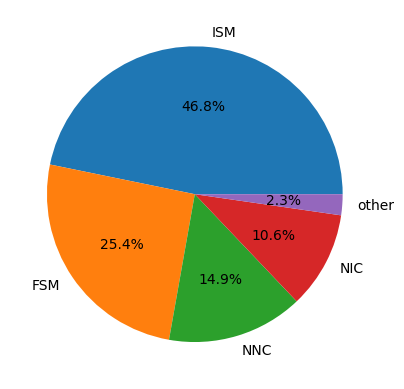

In [11]:
plot_data=pb_adata.var["SupportingStructCategory"].map(
    lambda x: {
        "full-splice_match":"FSM",
        "incomplete-splice_match":"ISM",
        "novel_in_catalog":"NIC",
        "novel_not_in_catalog":"NNC"
    }.get(x,"other")
).value_counts()
_=plt.pie(plot_data,labels=plot_data.index,autopct='%1.1f%%')

## Barcode overlap between samples

Plot the overlap of cell barcodes between two sequencing methods

In [5]:
%%space connecting_PB_and_IL_barcodes
PB_library_ids=pb_adata.obs["library_id_PB_short"].unique()
PB_barcodes_dict=dict()
IL_barcodes_dict=dict()
for library_id in PB_library_ids:
    PB_barcodes_dict[library_id]=pb_adata.obs.index[
        (pb_adata.obs["library_id_PB_short"]==library_id)&(pb_adata.obs["ClusterMidway"]!="_PB_CB_filtered")
    ]
    IL_barcodes_dict[library_id]=il_adata.obs.index[il_adata.obs["library_id_short"]==library_id]

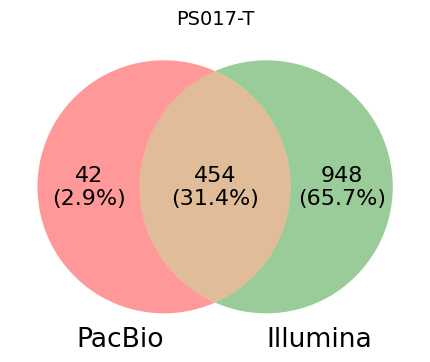

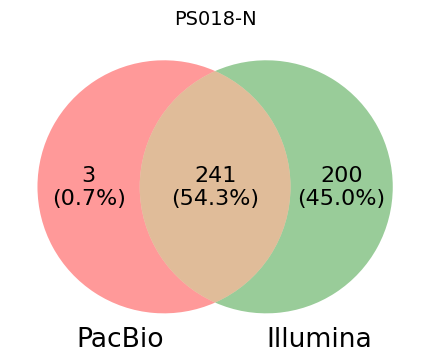

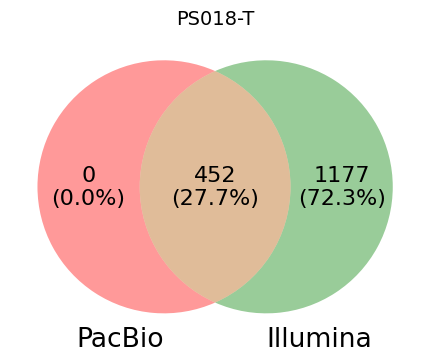

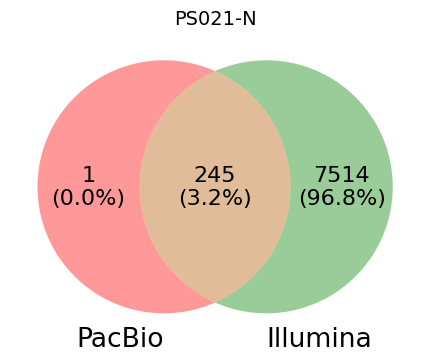

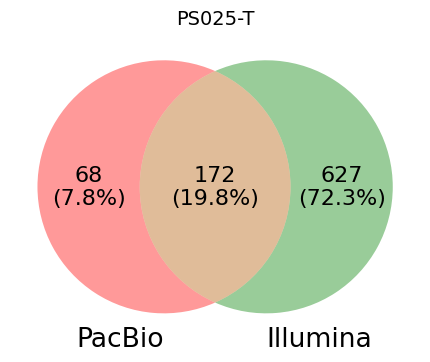

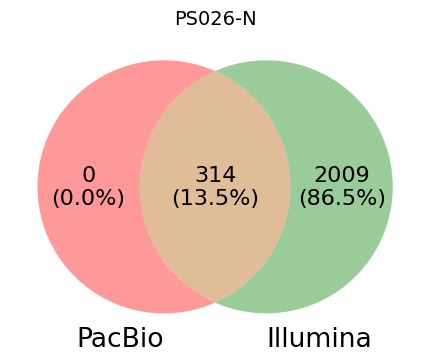

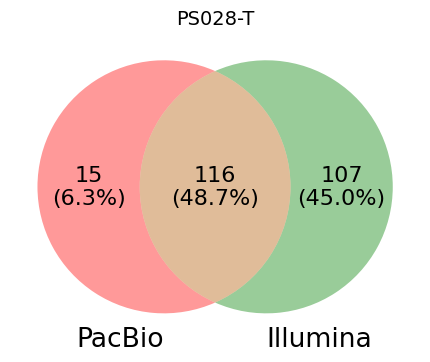

In [6]:
%%space connecting_PB_and_IL_barcodes
from matplotlib_venn import venn2_unweighted
def plot_venn(s1,s2,s1_label="s1",s2_label="s2"):
    s=s1.union(s2)
    v=venn2_unweighted(subsets = (s1,s2), 
                     set_labels = (s1_label, s2_label))
    
    n=int(v.get_label_by_id("01").get_text())
    v.get_label_by_id("01").set_text(f'{n}\n({n/len(s):.1%})')
    n=int(v.get_label_by_id("11").get_text())
    v.get_label_by_id("11").set_text(f'{n}\n({n/len(s):.1%})')
    n=int(v.get_label_by_id("10").get_text())
    v.get_label_by_id("10").set_text(f'{n}\n({n/len(s):.1%})')
    
with plt.rc_context({
    'axes.labelsize':14,
    'axes.titlesize':14,
    'figure.titlesize':14,
    'legend.fontsize':14,
    "xtick.labelsize":14,
    "ytick.labelsize":14,
    "text.usetex":False,
    "font.size":16,
    "pdf.fonttype":42,
    "ps.fonttype":42,
    "figure.figsize":(6,4)
}):
    for sample_name in sorted(PB_barcodes_dict):
        _=plt.figure()
        plot_venn(set(PB_barcodes_dict[sample_name]),set(IL_barcodes_dict[sample_name]),s1_label="PacBio",s2_label="Illumina")
        _=plt.title(sample_name)
        

## Correlation of Fold Change

In [7]:
%%space PB_IL_fc
plot_data_fp="./downloads/10X-PacBio-processed/PB_IL_fc.csv"
plot_data=pd.read_csv(plot_data_fp,index_col="GeneSymbol")

Plot the correlation of fold changes between EpiT and EpiN measured by the two sequencing methods

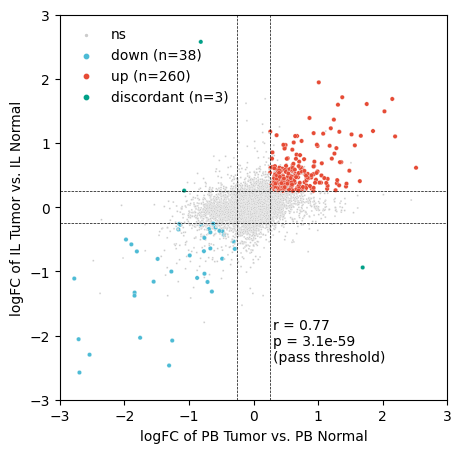

In [13]:
%%space PB_IL_fc
import seaborn as sns
from scipy.stats import pearsonr

def plot_fc_concordance(plot_data,IL_fc_th=0.25, PB_fc_th=0.25, IL_qval_th=1e-2, PB_qval_th=1e-2):
    plot_data=plot_data.copy()
    
    # categorize significance
    def apply_fn(row):
        if (abs(row["IL_logfc"]) > IL_fc_th and abs(row["PB_logfc"]) > PB_fc_th) and \
        ( (row["PB_or"]<1/2 and row["PB_logfc"]<0) or (row["PB_or"]>2 and row["PB_logfc"]>0)) and (row["PB_qval"] < PB_qval_th) and \
        ( (row["IL_or"]<1/2 and row["IL_logfc"]<0) or (row["IL_or"]>2 and row["IL_logfc"]>0)) and (row["IL_qval"] < IL_qval_th):
            
            if row["PB_logfc"]>0 and row["IL_logfc"]>0:
                return "up"
            elif row["PB_logfc"]<0 and row["IL_logfc"]<0:
                return "down"
            else:
                return "discordant"
        else:
            return "ns"
        
    plot_data["type"]=plot_data.apply(apply_fn,axis=1)
    
    # compute type stats
    type_stats=dict(plot_data["type"].value_counts())
    # compute pearsonr
    PB_logfc=plot_data["PB_logfc"]
    IL_logfc=plot_data["IL_logfc"]
    PB_logfc_s=plot_data.query("type!='ns'")["PB_logfc"]
    IL_logfc_s=plot_data.query("type!='ns'")["IL_logfc"]
    r,p=pearsonr(PB_logfc,IL_logfc)
    r_s,p_s=pearsonr(PB_logfc_s,IL_logfc_s)
    
    
    # make plot
    fig,ax=plt.subplots(figsize=(5,5))
    nature_red='#E64B35FF'
    nature_blue='#4DBBD5FF'
    nature_green='#00A087FF'
    nature_grey='#CCCCCC'
    hue_map={
        "up":nature_red,
        "down":nature_blue,
        "discordant":nature_green,
        "ns":nature_grey
    }
    size_map={
        "up":10,
        "down":10,
        "discordant":10,
        "ns":2
    }
    sns.scatterplot(
        data=plot_data, x="PB_logfc", y="IL_logfc", hue="type",
        size="type",sizes=size_map,
        palette=hue_map,
        alpha=1,
        s=15,
        linewidth=0.2,
        ax=ax,
        rasterized=True
    )
    
    
    ax.axhline(PB_fc_th,ls="--",lw=0.5,c="black")
    ax.axhline(-PB_fc_th,ls="--",lw=0.5,c="black")
    ax.axvline(IL_fc_th,ls="--",lw=0.5,c="black")
    ax.axvline(-IL_fc_th,ls="--",lw=0.5,c="black")
    
    handles, labels = ax.get_legend_handles_labels()
    for i in range(len(labels)):
        if labels[i]!="ns":
            labels[i]="%s (n=%d)"%(labels[i],type_stats[labels[i]])
    ax.legend(handles=handles,labels=labels, frameon=False,loc="upper left")
    
    ax.text(0.55,0.1,"r = {:.2f}\np = {:.2g}\n(pass threshold)".format(r_s,p_s),transform=ax.transAxes,bbox=None)
    ax.set_xlim([-3,3])
    ax.set_ylim([-3,3])
    ax.set_xlabel("logFC of PB Tumor vs. PB Normal")
    ax.set_ylabel("logFC of IL Tumor vs. IL Normal")

plot_fc_concordance(plot_data,IL_fc_th=0.25,PB_fc_th=0.25)

# Isoforms associated with lineages

Plot the isoform proportions associated with specific epithelial lineages (using KRT8 as example)

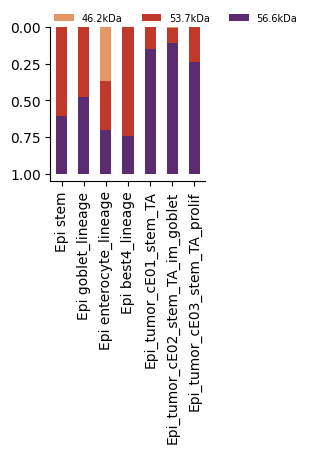

In [9]:
%%space isoform_proportion_plot
def KRT8_annotation():
    isoform_annotation_dict={
        'TCONS_00025513':"53.7kDa",
        'TCONS_00027357':"46.2kDa",
        'TCONS_00027360':"53.7kDa",
        'TCONS_00028559':"56.6kDa",
        'TCONS_00028560':"53.7kDa"
    }
    isoform_annotation_list=list(isoform_annotation_dict)
    hue_palette={
        "46.2kDa":"#E59866",
        "53.7kDa":"#C0392B",
        "56.6kDa":"#5B2C6F",
    }
    return isoform_annotation_dict, isoform_annotation_list, hue_palette

isoform_level_perc_table=pd.read_csv("./downloads/10X-PacBio-processed/isoform_perc.csv")

isoform_dict,isoform_list,hue_palette=KRT8_annotation()
normalize_within_known=True

cell_types=[
    "Epi stem","Epi goblet_lineage","Epi enterocyte_lineage","Epi best4_lineage",
    'Epi_tumor_cE01_stem_TA','Epi_tumor_cE02_stem_TA_im_goblet',
    'Epi_tumor_cE03_stem_TA_prolif'
]

identity_field_names=["GeneSymbol","Isoform"]
data_field_names=[f"Perc{ct}_UMI_data" for ct in cell_types]
df_sub=isoform_level_perc_table.query(f"Isoform in {isoform_list}")[identity_field_names+data_field_names]
df_sub["GroupedIsoform"]=df_sub["Isoform"].map(isoform_dict)
df_sub=df_sub.groupby("GroupedIsoform").agg({nm:"sum" for nm in data_field_names})

if normalize_within_known:
    df_sub=df_sub/df_sub.values.sum(axis=0,keepdims=True)
plot_data=df_sub.copy()
plot_data.columns=cell_types
fig,ax=plt.subplots(figsize=(2,2))
_=plot_data.T.plot(kind="bar",stacked=True,color=hue_palette,ax=ax,linewidth=0)
ax.legend(loc=(0,1.0),frameon=False,ncol=5,fontsize=7)
ax.tick_params(left=True,bottom=True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.invert_yaxis()